# Documentation for Hydra Multi-Asset Verification Test
ACTION_LIST = [['test_add', 'test_q_for_r', 'test_r_for_r','test_r_for_q', 'test_remove']]



## Model Description

The methodology for the tests is to create two universes - one for Hydra and one for Uniswap - to subsequently be able to represent sequences of actions on each side. As the Hydra system is unique in its design and has no counterpart yet for approprate comparisons the role of the benchmark will be fulfilled by assembling several Uniswaps together in a way that everything that can be done in Hydra can be accordingly reproduced. This allows next to compare the implications on both systems and ultimately assess the quantitative and qualitative differences of results and impacts on the Hydra system and its agents. 

This approach necessitates the definition and specification of two models:
   - 1 Hydra Omnipool model with one instance that is defined in line with the [Hydra Mathematical Specification](https://hackmd.io/M7OeWimITKGVxBDHGQa6gQ?view)
   - 1 Uniswap model with several instances that each are responsible for a particular mechanism
        - which of 1 instance is used for liquidity provision in asset $R_i$: this is modeled as a Uniswap of $R_i$ and $Q$
        - which of 1 instance is used for liquidity provision in asset $R_j$: this is modeled as a Uniswap of $R_j$ and $Q$
        - which of 1 instance is used for swaps between assets $R_i$ and $R_j$: this is modeled as a Uniswap of $R_i$ and $R_j$
        
![](https://i.imgur.com/yb6Zh3T.png)
        
## Test cases

A variety of testcases can be explored with this model resulting from a combination of the following parameters
   
   - Event: Add Liquidity, Remove Liquidity, Swap Asset, Swap Asset for Base
   - Asset: $R_i$, $R_j$, $R_k$, $Q$
   - Multiple Action Type: Alternating, $i$ only, $j$ only
   - Composite Action Type: Alternating, Trade Bias
   - Enable Symmetric Liquidity: True, False
    
In addition to these settings also a fee structure can be imposed:

   - Fixed Fee

## Test agents

The model specifies a number of eight agents that each have their local balances, can interact with the system and are modeled to be responsible for **one action only**. This allows to track for each testcase how the balances will develop and to show independently which events will trigger changes to local and global states. Most importantly directly and indirectly affected variables can be easily identified.

Two dataframes of agents are initialized identically for both the Uniswap and the Hydra world and then work their way through on each side according to the testcase. Afterwards the effects on both sides can be compared.

![](https://i.imgur.com/r9IAJMr.png)



## Composite Action Tests

Besides being able to test all mechanisms individually also compositions of actions can be performed. This means selecting and combining two from the above testcases and letting the respective agents take the actions repeadetly. A composition action test therefore is defined as two actions which each can be a combination of *event* and *asset* selected from the list of testcases above, for example:
- Add liquidity in $R_i$ and Add liquidity in $R_j$
- Add liquidity in $R_i$ and Swap $R_i$ for $Q$
- Remove liquidity in $R_j$ and Swap $R_i$ for $Q$
- ...

In total there would be 28 composit pairs which can be derived from this decision tree:
selecting any one of the four primitive mechanisms of: **trade in/out** or **add/remove liquidity** of some given asset and then the subsequent action could be the three remaining mechanisms of the same asset or doing anyone of the four mechanisms in another asset.  

These basic combinations can be explored before further proceeding with
- trade sizes,
- trade frequencies,
- randomization,...



## Introduction to Uniswap
>Uniswap is an automated market maker for exchanging ERC20 tokens. Anyone can become a liquidity provider, and invest in the liquidity pool of an ERC20 token. This allows other users to trade that token for other tokens at an exchange rate based on their relative availibility. When a token trade is executed, a small fee is paid to the liquidity providers that enabled the transaction.
https://uniswap.io/

There are basically eight ways (_mechanisms_) in which an agent can interact with an instance of Uniswap (https://github.com/Uniswap/uniswap-v1/blob/master/contracts/uniswap_exchange.vy):
1. `addLiquidity`: deposit ETH and tokens in the liquidity pool; mint UNI tokens - "shares" of that Uniswap instance - in exchange;
1. `removeLiquidity`: burn UNI tokens; withdraw a proportional amount of ETH and tokens in exchange;
1. `ethToTokenInput`: user specifies an exact amount of ETH they send; receives corresponding amount of tokens
1. `ethToTokenOutput`: user sends some ETH and specifies an exact amount of tokens they want to buy; Uniswap refunds ETH sent in excess
1. `tokenToEthInput`: user specifies an exact amount of tokens they send; receives corresponding amount of ETH
1. `tokenToEthOutput`: user specifies an exact amount of ETH they want to buy; Uniswap takes the corresponding amount of tokens from the user account
1. `tokenToTokenInput`: user specifies an exact amount of "token A" they send; receives corresponding amount of "token B" (effectively a `tokenToEthInput` in instance A combined with a `ethToTokenInput` in instance B)
1. `tokenToTokenOutput`: user specifies an exact amount of "token B˜ they want to buy; Uniswap takes the corresponding amount of "token A" from the user account (effectively a `ethToTokenOutput` in instance B combined with a `tokenToEthOutput` in instance A)

## Limitations and simplifications of this model
* When triggering mechanisms, Uniswap users may include conditions they would like to apply to the transaction. For example, they could define a minimum amount of UNI tokens they wish to receive as a result of adding liquidity to the pool; or the maximum number of tokens they are willing to pay for the amount of ETH requested in a `tokenToEthOutput` operation; or a deadline after which the transaction should not be processed. **This simplified model does not account for this kind conditioning.**

* The `ethToTokenOutput`, `tokenToEthOutput` mechanisms are not implemented. **All swaps are treated as of the "input defined" type.**

* The `tokenToToken` mechanism are not implemented, as they are merely a `tokenToEth` in the context of a single Uniswap instance.

* **User _behavior_ has not been modeled**. User _actions_ are derived from the history of events of the Uniswap instance being analyzed.

## Introduction to Hydra
>Hydra is an automated market maker that generalizes the concept of Uniswap and Balancer to a) an arbitrary number of dimensions and b) a variant weight distaribution of assets in the pool that changes in accordance with action sequences in the pool. Anyone can become a liquidity provider, and invest in the 'Omnipool'. This allows other users to trade that token for other tokens at an exchange rate based on their relative availibility. When a token trade is executed, a small fee is paid to the liquidity providers that enabled the transaction.
https://hydradx.io/

There is a predefined set of (_mechanisms_) in which an agent can interact with an the Hydra Protocol :
1. `addLiquidity`: deposit a risk asset in the omnipool; mint HDX tokens - "shares" of this risk asset - in exchange;
1. `removeLiquidity`: burn HDX tokens; withdraw a proportional amount of the risk asset in exchange;
1. `tokenToTokenInput`: user specifies an exact amount of "token A" they send; receives corresponding amount of "token B" 
1. `tokenToTokenOutput`: user specifies an exact amount of "token B˜ they want to buy; Hydra takes the corresponding amount of "token A" from the user account 



## Model File structure

The folder **model** contains:

 - a file config.py: 

    This file configures the simulation experiments by setting the number of monte carlo runs, the number of timesteps for the simulation and the simulation parameters. It also aggregates the partial states and the initial state variables.
    
    The purpose of this file is to *configure and initialize* the experiment.
    
    
 - a file partial_state_update_block.py

    This file defines each partial state update block individually. This feature allows cadCAD to divide each simulation timestep into several 'blocks' where different state variables are mutated conditioned upon the policy input.
    
    In the current setting 
    - the first block maps the user action to the appropriate mechanism in the uniswap world
    - the second block maps the user action to the appropriate mechanism in the hydra world
    - the third block resolves the quantities of HDX and weights in the hydra world
    - the forth block calculates the metrics: the swap prices in the uniswap world and the pool prices in the hydra world

    This file corresponds to the system specification diagram, where each column is one partial state update block 
    
    The purpose of this file is to *define* the sequence and details of state updates for each simulation timestep. The relevant mechanisms are imported from the files in the **parts** folder
    
    
 - a file plot_utils.py

    This file defines all plot functions that can be called in the jupyter notebook to visualize the results. In general there are three types of plots:
    - plots related to the uniswap world (do not contain the word 'hydra')
    - plots related to the hydra world (contain the word 'hydra')
    - general plots applicable to both worlds (f.e Impermanent Loss)

    It also can be distinguished between plots related to global system variables and local agent variables:
    - global variables (do not contain the word 'agent')
    - local variables (contain the word 'agent')

    The purpose of this file is to *define* the way how particular properties can be plotted over time.
    

 - a file run.py

    This file *defines* the run and postprocessing methods and is used to execute the simulation run:
    - run() is used to execute the simulation and create a dataframe
    - postprocessing is used to extract relevant metrics from the simulation output in the dataframe

     The purpose of this file is to *execute* the simulation and *create* metrics.
     
     
 - a file state_variables.py

    This file *sets* the number of agents and *defines* the local (agent-level) state variables, *sets* the number of assets and *defines* the global (system-state) variables of the system, *computes* the prices of the assets and *defines* the initial state object
    - the agent states describe their holdings of assets that agents have contributed to the pool or still hold outside as well as their quantities of shares they received for their contribution
    - the global states describe the quantities of assets in the system
    - price variables are computed from the states both in the uniswap and hydra world
    - the initial state object consists of 
        - two agent dataframes, one for each world respectively
        - two sets of global variables, one for each world respectively
        - prices for each world (? is pool = prices ?)

    The purpose of this file is to *define* the global and local states of the system.
    
    
 - a file sys_params.py

    This file *contains* the system parameters and allows to select items from a list for them. Following parameters can be defined:
    - trade action type
    - liquidity action type
    - multiple asset action type
    - composite action type
    - liquidity add type (symmetry)

    In addition the following is set
    - initial values for assets 
    - hard coded fee value
    - choice of the system parameters from the list above
    

 - a folder **parts** which itself contains general files relevant for both instances, files related specifically to Uniswap and files related specifically to Hydra 
      - [action.py](model/parts/action.py)
       This is an action dictionary which drives the model. As there are no behavioral assumptions in the model yet, currently actions are prescribed actions in testing mode derived from events. However, action schema respects https://www.kaggle.com/markusbkoch/uniswap-ethdai-exchange as much as possible, allowing for future analysis against uniswap transaction datasets.
        This file contains a function called 'actionDecoder' which takes its inputs from the file sys_params.py and maps those encoded events to agent actions. At first an arbitrary action dictionary is defined which then is adapted according to the choices of system parameters. In particular relevant are the parameter definitions of the asset, the composite and whether there is a trade or liquidity event defined.
        
    - [uniswap.py](model/parts/uniswap.py)
     Reads in action output and directs the action to the appropriate Uniswap mechanism for each corresponding Uniswap instance. Currently there are two instances in place, namely the R_i<>Q pair and the R_j<>Q pair. Both instances have their respective requisite state variables: UNI_Qx, UNI_Rx, and UNI_Sx.

    - [utils.py](model/parts/utils.py)
    Computes the state update for each Uniswap state variable and outputs the updated global state variables.
        
     - [agent_utils.py](model/parts/agent_utils.py)
     Computes the corresponding agent local state for each Uniswap agent resolving their action and outputs the updates local state variables.

      -  [hydra.py](model/prts/hydra.py)
     Reads in action output and directs the action to the appropriate Hydra mechanism for each state variable: Q, Sq, and pool.
    
      - [hydra_utils.py](model/parts/hydra_utils.py)
     Computes the state update for each Hydra state variable

    -  [asset_utils.py](model/parts/asset_utils.py)
     Computes the state update for each Reserve Asset in a Hydra Omnipool

    -  [hydra_agent_utils_class.py](model/parts/hydra_agent_utils_class.py)
     Computes the corresponding agent local state for each Hydra agent resolving their action and outputs the updates local state variables.
     
     #### The interrelations between the files are shown here:
     
    ![](https://i.imgur.com/mNhfQE4.png)



# Testcase Definition

#### Simulation Settings
- There are 100 timesteps for each simulation run
- Each testcase has 100 MC runs with different randomized variables
- Block 1 randomizes starting liquidity balances (explained below in section 'Block 1')



#### Agent Activities - Action Sequence

There are two agents acting during the simulation. The trading agent performs "R-for-R" trades of equal size but varying direction over most simulation timesteps. The liquidity agent provides liquidity to the pool at timestep 10 and removes the liquidity from the pool at timestep 90.

##### Trading agent

- One Agent performs random "R-for-R" trades during the simulation. 
- The direction of the trade is a random coin flip for each timestep.
- The size of the trade is fixed at $1000$ for each timestep.
- The agent does not act at timestep 10 nor timestep 90.

##### Liquidity agent

- One Agent provides liquidity in Asset "i" to the pool 
- He provides the liquidity at timestep 10
- He removes the liquidity at timestep 90
- He does not act at other timesteps

#### Block 1:

| #   |   Run   | a  | $\mu_i$ |          $\sigma_i$          | $\mu_j$ |          $\sigma_j$          | $\mu$ | $\sigma$ | Total runs         |
| --- |:-------:|:-------:|:-------:|:----------------------------:|:-------:|:----------------------------:| ----- | -------- | ------------------ |
| 1   | 001-100 |   0.5   |   $100.000$   | $\frac{\mu_i}{\sigma_i}= 2$  |   $100.000$   | $\frac{\mu_j}{\sigma_j}= 2$  | $1.000$ | $0$      | $100$ |
| 2   | 101-200 |   0.5   |   $100.000$   | $\frac{\mu_i}{\sigma_i}= 50$ |   $100.000$   | $\frac{\mu_j}{\sigma_j}= 50$ | $1.000$ | $0$      | $100$ |
| 3   | 201-300 |    1    |   $100.000$   | $\frac{\mu_i}{\sigma_i}= 2$  |   $100.000$   | $\frac{\mu_j}{\sigma_j}= 2$  | $1.000$ | $0$      | $100$ |
| 4   | 301-400 |    1    |   $100.000$   | $\frac{\mu_i}{\sigma_i}= 50$ |   $100.000$  | $\frac{\mu_j}{\sigma_j}= 50$ | $1.000$ | $0$      | $100$ |
| 5   | 401-500 |   1.5   |   $100.000$   | $\frac{\mu_i}{\sigma_i}= 2$  |   $100.000$   | $\frac{\mu_j}{\sigma_j}= 2$  | $1.000$ | $0$      | $100$ |
| 6   | 501-600 |   1.5   |   $100.000$   | $\frac{\mu_i}{\sigma_i}= 50$ |   $100.000$   | $\frac{\mu_j}{\sigma_j}= 50$ | $1.000$ | $0$      | $100$ |

All tests in block 1 are performed as 100 **MonteCarlo Experiments** with the following randomization:
- The initial balances of the liquidity pools are drawn randomly for each MC run from the same lognormal distribution with $\mu_i$ and $\mu_j$ fixed at $100000$
    - The underlying mean for the lognormal liquidity draw is $\log{100000}$
    - The underlying standard deviation for the lognormal liquidity draw is $\sqrt{\log{1 + \frac{2000^2}{100000^2}}}$
- The action sequence of the agents is randomized in that sense that:
    - For each individual MC run the sequence is identical for the Uniswap and Hydra side of the model. For each timestep of the simulation exactly the same event takes place on both sides.
    - For each individual MC run the trading directions are randomized for each timestep. Therefore the event sequence for each run will be different.
    - For all MC runs the trading amount is always equal to $1000$




# Testcase in this notebook


This notebook documents the results of the following experiment:
- Settings from Block 1 as outlined above
- Testcases **2**, **4** and **6**
- Sweep over three values for $a \in \{0.5, 1, 1.5 \}$ with a fixed $\mu$-to-$\sigma$-ratio of $50$.

The experiment result dataframe is saved into a pickle file and analyzed throughout this notebook.

## Run Model

The following command lines import all packages, experiments and run the model 

This is the execution of cadcad. This writes the config object, does the execution and returns the rdf - which is a data object that shows the rows and columns of results in a dataframe

Here is one additional option as well. The postprocessing causes the index of the results to be every forth because of the cadcad architecture where the partial state updates are the substeps. With this option selected we see only the end of each timestep - the last substep. Therefore only final results are shown. To get a line for each substep the postprocessing needs to be deactivated. 

In [1]:
from model.config_wrapper import ConfigWrapper

from model import run_wrapper
from cadCAD import configs

# parametric_experiment = ConfigWrapper()
# get_keys = parametric_experiment.get_config()
# get_keys[0]['M']
# parametric_experiment.get_config()

running file: config_wrapper.py
end of file: config_wrapper.py
running file: run_wrapper.py
end of file: run_wrapper.py


In [2]:
# import model as model


In [3]:
# parametric_experiment = ConfigWrapper(model)


In [4]:
# del configs[:]

# parametric_experiment.append()

In [5]:
# get_keys = parametric_experiment.get_config()
# get_keys[0]['M']

In [6]:
# Dependences
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Experiments
from model import run
from model.parts.utils import *
from model.plot_utils import *

pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

# df = run.run()
# rdf = run.postprocessing(df)
# rdf = df # debugging substeps
# pd.set_option("mode.chained_assignment", None)


running file: run.py
running file: state_variables.py
running file: initialize_liquidity.py
end of file: initialize_liquidity.py
running file: asset_utils.py
end of file: asset_utils.py
end of file: state_variables.py
running file: partial_state_update_block.py
end of file: action_list.py
end of file: partial_state_update_block.py
running file: sim_setup.py
end of file: sim_setup.py
[100998.27887305  99723.88095634 101303.67223198 103092.61280875
  99532.83469866  99532.86737755 103208.50728239 101546.55324918
  99065.53858503 101090.91919622  99077.5383033   99072.95740148
 100485.04873236  96246.09556884  96609.32594441  98881.83582563
  97994.91492509 100630.41060507  98200.52092999  97215.18620668
 102974.38116142  99549.51030708 100135.13413065  97190.99577765
  98917.24782412 100222.06920894  97724.53133637 100754.1504107
  98806.02781904  99418.36888778  98803.91770933 103773.6459511
  99973.01189183  97907.00331514 101658.52873405  97588.11897026
 100418.55894768  96156.8490052

config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 103208.50728238752, 'S': 10000, 'W': 10000, 'P': 0.09689123758605599, 'dP': 0}, 'j': {'R': 103844.03732595567, 'S': 10000, 'W': 10000, 'P': 0.09629825898054249}, 'k': {'R': 103844.03732595567, 'S': 10000, 'W': 10000, 'P': 0.09629825898054249}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 101546.55324918331, 'S': 10000, 'W': 10000, 'P': 0.09847700074527566, 'dP': 0}, 'j': {'R': 100349.73085387227, 'S': 10000, 'W': 10000, 'P': 0.09965148800012076}, 'k': {'R': 100349.73085387227, 'S': 10000, 'W': 10000, 'P': 0.09965148800012076}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 101546.55324918331, 'S': 10000, 'W': 10000, 'P': 0.09847700074527566, 'dP': 0}, 'j': {'R': 100349.73085387227, 'S': 10000, 'W': 10000, 'P': 0.09965148800012076}, 'k': {'R': 100349.73085387227, 'S': 10000, 'W': 10000, 'P': 0.09965148800012076}}}
config_init_state  <cl

config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 100135.13413065275, 'S': 10000, 'W': 10000, 'P': 0.09986504823524137, 'dP': 0}, 'j': {'R': 102845.02743861543, 'S': 10000, 'W': 10000, 'P': 0.09723367525929873}, 'k': {'R': 102845.02743861543, 'S': 10000, 'W': 10000, 'P': 0.09723367525929873}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 100135.13413065275, 'S': 10000, 'W': 10000, 'P': 0.09986504823524137, 'dP': 0}, 'j': {'R': 102845.02743861543, 'S': 10000, 'W': 10000, 'P': 0.09723367525929873}, 'k': {'R': 102845.02743861543, 'S': 10000, 'W': 10000, 'P': 0.09723367525929873}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 100135.13413065275, 'S': 10000, 'W': 10000, 'P': 0.09986504823524137, 'dP': 0}, 'j': {'R': 102845.02743861543, 'S': 10000, 'W': 10000, 'P': 0.09723367525929873}, 'k': {'R': 102845.02743861543, 'S': 10000, 'W': 10000, 'P': 0.09723367525929873}}}
config_init_state  <cl

config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 97907.0033151395, 'S': 10000, 'W': 10000, 'P': 0.10213773950176336, 'dP': 0}, 'j': {'R': 100951.58925445436, 'S': 10000, 'W': 10000, 'P': 0.09905738061036778}, 'k': {'R': 100951.58925445436, 'S': 10000, 'W': 10000, 'P': 0.09905738061036778}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 97907.0033151395, 'S': 10000, 'W': 10000, 'P': 0.10213773950176336, 'dP': 0}, 'j': {'R': 100951.58925445436, 'S': 10000, 'W': 10000, 'P': 0.09905738061036778}, 'k': {'R': 100951.58925445436, 'S': 10000, 'W': 10000, 'P': 0.09905738061036778}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 97907.0033151395, 'S': 10000, 'W': 10000, 'P': 0.10213773950176336, 'dP': 0}, 'j': {'R': 100951.58925445436, 'S': 10000, 'W': 10000, 'P': 0.09905738061036778}, 'k': {'R': 100951.58925445436, 'S': 10000, 'W': 10000, 'P': 0.09905738061036778}}}
config_init_state  <class 'm

config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 98570.76742163642, 'S': 10000, 'W': 10000, 'P': 0.10144995581930497, 'dP': 0}, 'j': {'R': 101575.77585747576, 'S': 10000, 'W': 10000, 'P': 0.09844866963193391}, 'k': {'R': 101575.77585747576, 'S': 10000, 'W': 10000, 'P': 0.09844866963193391}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 99083.0444804823, 'S': 10000, 'W': 10000, 'P': 0.10092544140556593, 'dP': 0}, 'j': {'R': 97556.6900198242, 'S': 10000, 'W': 10000, 'P': 0.10250450274571565}, 'k': {'R': 97556.6900198242, 'S': 10000, 'W': 10000, 'P': 0.10250450274571565}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 99083.0444804823, 'S': 10000, 'W': 10000, 'P': 0.10092544140556593, 'dP': 0}, 'j': {'R': 97556.6900198242, 'S': 10000, 'W': 10000, 'P': 0.10250450274571565}, 'k': {'R': 97556.6900198242, 'S': 10000, 'W': 10000, 'P': 0.10250450274571565}}}
config_init_state  <class 'model.pa

config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 97811.84641555347, 'S': 10000, 'W': 10000, 'P': 0.1022371048749557, 'dP': 0}, 'j': {'R': 102344.00950410115, 'S': 10000, 'W': 10000, 'P': 0.09770967591023759}, 'k': {'R': 102344.00950410115, 'S': 10000, 'W': 10000, 'P': 0.09770967591023759}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 97636.21162946118, 'S': 10000, 'W': 10000, 'P': 0.1024210160667741, 'dP': 0}, 'j': {'R': 98372.19378420936, 'S': 10000, 'W': 10000, 'P': 0.10165474221237905}, 'k': {'R': 98372.19378420936, 'S': 10000, 'W': 10000, 'P': 0.10165474221237905}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 97636.21162946118, 'S': 10000, 'W': 10000, 'P': 0.1024210160667741, 'dP': 0}, 'j': {'R': 98372.19378420936, 'S': 10000, 'W': 10000, 'P': 0.10165474221237905}, 'k': {'R': 98372.19378420936, 'S': 10000, 'W': 10000, 'P': 0.10165474221237905}}}
config_init_state  <class 'model

config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 101657.22274853483, 'S': 10000, 'W': 10000, 'P': 0.09836979340598924, 'dP': 0}, 'j': {'R': 101667.95875871566, 'S': 10000, 'W': 10000, 'P': 0.09835940567797358}, 'k': {'R': 101667.95875871566, 'S': 10000, 'W': 10000, 'P': 0.09835940567797358}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 101657.22274853483, 'S': 10000, 'W': 10000, 'P': 0.09836979340598924, 'dP': 0}, 'j': {'R': 101667.95875871566, 'S': 10000, 'W': 10000, 'P': 0.09835940567797358}, 'k': {'R': 101667.95875871566, 'S': 10000, 'W': 10000, 'P': 0.09835940567797358}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 100174.22833232975, 'S': 10000, 'W': 10000, 'P': 0.09982607469482896, 'dP': 0}, 'j': {'R': 100026.00456454151, 'S': 10000, 'W': 10000, 'P': 0.0999740021960742}, 'k': {'R': 100026.00456454151, 'S': 10000, 'W': 10000, 'P': 0.0999740021960742}}}
config_init_state  <clas

config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 98396.17492283059, 'S': 10000, 'W': 10000, 'P': 0.10162996689498066, 'dP': 0}, 'j': {'R': 99554.11613913682, 'S': 10000, 'W': 10000, 'P': 0.1004478808894652}, 'k': {'R': 99554.11613913682, 'S': 10000, 'W': 10000, 'P': 0.1004478808894652}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 98396.17492283059, 'S': 10000, 'W': 10000, 'P': 0.10162996689498066, 'dP': 0}, 'j': {'R': 99554.11613913682, 'S': 10000, 'W': 10000, 'P': 0.1004478808894652}, 'k': {'R': 99554.11613913682, 'S': 10000, 'W': 10000, 'P': 0.1004478808894652}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 99001.60364256243, 'S': 10000, 'W': 10000, 'P': 0.1010084648336023, 'dP': 0}, 'j': {'R': 101438.10080629803, 'S': 10000, 'W': 10000, 'P': 0.09858228733102549}, 'k': {'R': 101438.10080629803, 'S': 10000, 'W': 10000, 'P': 0.09858228733102549}}}
config_init_state  <class 'model.p

config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 99531.97132416411, 'S': 10000, 'W': 10000, 'P': 0.10047022948466636, 'dP': 0}, 'j': {'R': 97740.21245130735, 'S': 10000, 'W': 10000, 'P': 0.10231203461913739}, 'k': {'R': 97740.21245130735, 'S': 10000, 'W': 10000, 'P': 0.10231203461913739}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 99531.97132416411, 'S': 10000, 'W': 10000, 'P': 0.10047022948466636, 'dP': 0}, 'j': {'R': 97740.21245130735, 'S': 10000, 'W': 10000, 'P': 0.10231203461913739}, 'k': {'R': 97740.21245130735, 'S': 10000, 'W': 10000, 'P': 0.10231203461913739}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 99531.97132416411, 'S': 10000, 'W': 10000, 'P': 0.10047022948466636, 'dP': 0}, 'j': {'R': 97740.21245130735, 'S': 10000, 'W': 10000, 'P': 0.10231203461913739}, 'k': {'R': 97740.21245130735, 'S': 10000, 'W': 10000, 'P': 0.10231203461913739}}}
configs length  300
end of file

In [7]:
(data, tensor_field, sessions) = run_wrapper.run(drop_midsteps=True)

experiments = data



                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 100
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (100, 16, 3, 24)
Execution Method: local_simulations
SimIDs   : [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22, 22, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 26, 27, 27, 27, 28, 28, 28, 29, 29, 29, 30, 30, 30, 31, 31, 31, 32, 32, 32, 33, 33, 33, 34, 34, 34, 35, 35, 35, 36, 36, 36, 37, 37, 37, 38, 38, 38, 39, 39, 39, 40, 40, 40, 41, 41, 41, 42, 42, 42, 43, 43, 43, 44, 44, 44, 45, 45, 45, 46, 46, 46, 47, 47, 47, 48, 48, 48, 49, 49, 49, 50, 50, 50, 51, 51, 51, 52, 52, 52, 53, 

 R added to pool of  R to R swap called  R added to pool of  i j  =  1000
 R removed from pool of  i  =  935.6205916234653
 R to R swap called 
1000
 R removed from pool of  i  =  926.589621309535
  R added to pool of 
 i  =  1000
 R removed from pool of  j  =  899.6358151804716
 =  R to R swap called   R added to pool of j R to R swap called 
 i  =  1000
 R removed from pool of  j  =  976.6929002541559
 R added to pool of 
 R to R swap called 1000 i  =  1000
 R removed from pool of  j  =  958.5065190254155

 R removed from pool of  j  =  1169.9756158830266

 R added to pool of  R to R swap called  R to R swap called   R to R swap called 


 R added to pool of  i  =  1000
 R removed from pool of   R added to pool of j  =  1053.9760853225148
  =  1000
 R removed from pool of  i  =  1101.1569653423633
 R added to pool of  R to R swap called  R added to pool of  R added to pool of  R to R swap called 
 j R to R swap called 
 R added to pool of  
    j  =  1000
 R removed from pool of  i  


 R to R swap called j  =  1000
 R removed from pool of  i  =  935.3885149826549
 1000
 R removed from pool of  j  =  935.0934665426134
  R added to pool of 
  R added to pool of  R to R swap called  R added to pool of  R to R swap called 

 i  =  1000
 R removed from pool of  j  =  1024.5412173857862
  =  R to R swap called  1000
 R removed from pool of  i  =  979.2230979875982
 R added to pool of i
 R to R swap called   =  1000
 R removed from pool of  j  =  1315.1931710855968
j R added to pool of   =  1000
 R removed from pool of  i  =  1078.9241612729577
 
 R added to pool of i R to R swap called  R to R swap called  
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1007.6190400329211
  R added to pool of i 
 R to R swap called   R added to pool of i  =  1000
 R removed from pool of  j  =  1054.3389543743997

   =  =  1000
 R removed from pool of  j  =  1244.8148808790904
  R added to pool of  R to R swap called  R to R swap called j j  =  1000
 R removed from pool of

j
  R added to pool of 
 =  1000
 R removed from pool of  i  =  753.0594022942001
 =  R to R swap called    R to R swap called  =  R to R swap called i R added to pool of 


 1000
 R removed from pool of  i  =  907.7614723648453
  j  =  1000
 R removed from pool of  i  =  816.663458526271
869.4784690266363
 R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  905.2823071651578
   =  1000
 R removed from pool of  j  =  720.789265604179
j R added to pool of  i  =  1000
 R removed from pool of  j  =  1400.60181889081
 R to R swap called   R to R swap called  =  R to R swap called  R added to pool of  R to R swap called 

 R to R swap called 
 R added to pool of  

 R to R swap called  1000
 R removed from pool of  i  =  859.8716615925118
 R added to pool of 
 i  =  1000
 R removed from pool of  j  =  1086.2295531683235
j   =  1000
 R removed from pool of  i  =  1353.0418893834064
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1125.536704479947


 R added to pool of j R to R swap called  R to R swap called 
 j  =  1000
 R removed from pool of  i  =  643.9942573550543

  R added to pool of  R to R swap called 
 R to R swap called  =   R added to pool of 
 i  =  1000
 R removed from pool of  j  =  735.4163861119334
j R added to pool of  R added to pool of  
 j  =  1000
 R removed from pool of  i  =  929.2317307737385
 R added to pool of 1000  j  =  1000
 R removed from pool of  i  =  623.270523550919
 =   R added to pool of  R to R swap called 
 R removed from pool of  j R to R swap called   R to R swap called j  =  1000
 R removed from pool of  i  =  849.0141439335548
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1575.971276924649

1000
 R removed from pool of  i
  R added to pool of  i  =  R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  819.9139849491331
 R to R swap called  i  =  615.105750873124

  R to R swap called 

884.7802959499635
 R to R swap call

jj R to R swap called  R to R swap called 

  R to R swap called  R added to pool of  =  1000
 R removed from pool of  i  =   R to R swap called 
 R to R swap called  
 =  1000
 R removed from pool of  i  =  836.6445943615116
 R added to pool of 
 R added to pool of   j  =  1000
 R removed from pool of  i  =  765.3119957831664
j  =  1000
 R removed from pool of  i  =  530.2875481304638
 R to R swap called  R to R swap called 
  R added to pool of 
 R to R swap called 
 i  =  1000
 R removed from pool of  j  =  1021.9653684362429
 R to R swap called i628.602941359389
 R added to pool of  R added to pool of  R added to pool of  
 R added to pool of  i   
j  =  1000
 R removed from pool of  i  =  739.3949748972815
j  =  =  1000
 R removed from pool of  j  =  1177.837289586798
   R to R swap called 1000
 R removed from pool of  j  =  915.5697242952438
 R to R swap called i = 
 1000
 R removed from pool of  i  =  1178.3827842674937
 R to R swap called 
 R to R swap called  R added to pool o

 R added to pool of  = j  =  1000
 R removed from pool of  i  =  1031.6357612620918
 
  R added to pool of   j  =  1000
 R removed from pool of  i  =  1214.425127697773
i j R to R swap called   =  1000
 R removed from pool of  j  =  759.5425232447064
i R to R swap called 
 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  814.7821514816463
  R added to pool of 1000
 R removed from pool of  j  =  1723.7370671451117
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1506.679701226665
  R to R swap called  R to R swap called  =  =  R added to pool of 
 i  =  1000
 R removed from pool of  j  =  957.7428720775632
  R to R swap called i R to R swap called 
 R added to pool of  1000

 R removed from pool of  i  =  722.3708548755544
 R added to pool of   
 R to R swap called 1000 
 =  1000
 R removed from pool of  j  =  1289.1030151137684
 R added to pool of i R to R swap called  
j R added to pool of  =  1000
 R removed from pool of  j  =  1454.7648912841087
   R add

  i  =  1000
 R removed from pool of  j 

150000.0 R added to pool of 

 =  j  =  1000
 R removed from pool of  i  =  710.0769395269972
 R added to pool of  R added to pool of removing at timestep 90:   i  =  1000
 R removed from pool of  j  =  1850.6934764082005
1248.454630909458
155013.0
removing at timestep 90:  155013.0
 R added to pool of  j  =  1000
 R removed from pool of  i  =  918.2604889748798
 R to R swap called  155047.0
 150000.0150000.0 R to R swap called 
 R to R swap called  R to R swap called 
i
  =  1000
 R removed from pool of  j  =  1007.695335913569
removing at timestep 90: 
 R added to pool of 
 R to R swap called 
 j  =  1000
 R removed from pool of  i  =  685.7022399751324
 R added to pool of  R to R swap called  R added to pool of 
 j  =  1000
 R removed from pool of  i  =  1064.260236539046
  R added to pool of removing at timestep 90: 
  R to R swap called  150000.0
i  =  1000
 R removed from pool of  j  =  1358.986347880192
 R added to pool of  R to R swap c

1000  R added to pool of  R to R swap called j 

 R to R swap called 
 R added to pool of  R to R swap called  R removed from pool of  i  =  684.0015986604068
 
 i  =  1000
 R removed from pool of  j  =  997.9302237857048
 =  1000
 R removed from pool of  i  =  726.6573156455139
  R added to pool of  R to R swap called i  =  1000
 R removed from pool of  j  =  936.494375297482

i  R to R swap called   =  1000
 R removed from pool of  j  =  909.0524061096543
i
  =  1000
 R removed from pool of  j  =  
967.3562951112652 R added to pool of 
 i R to R swap called  R to R swap called 
 R added to pool of  
 =  1000
 R removed from pool of  j  =  1375.5776385534014
 R added to pool of  i  =  1000
 R removed from pool of  j  =  874.9221686174993
 R added to pool of  j  =  1000
 R removed from pool of  i  =  982.4728650508979
 R to R swap called  R added to pool of  j  =  1000
 R removed from pool of  i  =  1045.4078902595902
 R added to pool of  R to R swap called  R to R swap called  
 j  = 

 =   R to R swap called 
i  =  1000
 R removed from pool of  j  =  1126.7329679293414
 R added to pool of  
  =  1167.7583035975804
 R to R swap called 
 R to R swap called 1000 R to R swap called 
 R added to pool of  R to R swap called  R added to pool of  

 R added to pool of 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  871.305758094589
  R added to pool of j  R removed from pool of i R to R swap called  i  
  i  =  1018.0559781112717
 R added to pool of   j  =  1000
 R removed from pool of  i  =  841.450704747292
 =  R added to pool of  R to R swap called   = i 
i R to R swap called  = 1000i   
1000
 R removed from pool of  j  =  923.4684652340859
 =  1000
 R removed from pool of  j  =  958.7210231269025

 R removed from pool of  j  =  860.1026842106763
 R to R swap called  R added to pool of   =  j  =  1000
 R removed from pool of  i  =  812.9799211768501
 R to R swap called  R added to pool of  j  =  1000
 R removed from pool of  i  =  981.5858942603829
 
 100

 j  =   =  R added to pool of  =  R added to pool of  i  =  1000
 R removed from pool of  j  =  848.3640420625474
 i  =  1000
 R removed from pool of  j  =  1070.7948670908318
 1000  R added to pool of  R to R swap called 1000
 R removed from pool of  j  =  839.6639795376432

   R to R swap called 
1000
 R removed from pool of  i  =  951.6744857510108
 R to R swap called  R added to pool of j1000

 R removed from pool of  i  i  =  1000
 R removed from pool of  j  =  824.8181010930142
 R removed from pool of  i  =  1008.7691986975707
 R to R swap called 
 =  
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  802.1599186545187
 =  R to R swap called   R added to pool of  
 R to R swap called 
 R added to pool of  R added to pool of 1000  j  =  1000
 R removed from pool of  i  =  916.2380216696625
j  =   R added to pool of 
 R removed from pool of 1224.8594856256677  R to R swap called  R added to pool of j  =  1000
 R removed from pool of  i  =  751.1904

  R added to pool of 
 =  R to R swap called  R to R swap called  R added to pool of  1000
 R removed from pool of  j  =  727.5355102301406


  R added to pool of   R added to pool of  R to R swap called i  =  1000
 R removed from pool of  j  =  858.528703070411
 
 R added to pool of i j R added to pool of   =  1000
 R removed from pool of  j  =  1088.3680644019319
   R to R swap called  R added to pool of i j  =  1000
 R removed from pool of  i  =  860.0971495138857
j
  =   1000
 R removed from pool of  i  =  737.4860224524824
 = j R added to pool of    i  =  1000
 R removed from pool of  j  =  834.9222698452587
 R to R swap called  R to R swap called  = 
 
 R to R swap called  R added to pool of 1000
 R removed from pool of  j  =  1403.9306107732973
 R to R swap called  R added to pool of  R added to pool of  j  R to R swap called   =  1000
 R removed from pool of  i  =  713.6116608984906
 = 1000

  1000
 R removed from pool of  i  =  1217.6835243010264
 

ii R added to pool of  R ad

 R to R swap called  R added to pool of  R to R swap called 
 1000
 R removed from pool of  j  =  1270.2579346445702
 R to R swap called  R added to pool of  R added to pool of  R added to pool of 
 j  =  1000
 R removed from pool of  i  =  765.9016266616946

  R to R swap called  
j  =  1000
 R removed from pool of  i  =  1199.9986322664772
  R added to pool of  R added to pool of i R to R swap called  j  =  1000
 R removed from pool of  i  =  773.4685790121129
i R added to pool of  
j    =  1000
 R removed from pool of  i  =  1328.2731257481182
  =  1000
 R removed from pool of  j  =  1235.7333691098431
 R to R swap called  = 
 R to R swap called  R to R swap called j 
 R added to pool of 1000 R to R swap called  R added to pool of 
 R removed from pool of  j  =  1097.3726656720596

 R added to pool of    R to R swap called   =  1000
 R removed from pool of  i  =  508.9804315496487
i

 R to R swap called  i R added to pool of  i  =  1000
 R removed from pool of  j  =  1196.6374705609



  =  R added to pool of  1789.532460650395

  =   R to R swap called j1000
 R removed from pool of  i  =  757.2777185682933
 R to R swap called 
 R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  R to R swap called 
  975.6302673739126
  R to R swap called  =  R added to pool of  R added to pool of 

  j  R added to pool of i  =  1000
 R removed from pool of  j  =  1001.2786094921807
 R to R swap called  1000 =  1000
 R removed from pool of  i  =  1164.3118572512512
i 
 
j R removed from pool of  R added to pool of  =  1000
 R removed from pool of  j  =  1116.5029612100602
 i  =  943.9387758295144
 R to R swap called  R to R swap called  j  =  1000
 R removed from pool of  i  =  731.3418733892879
 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1724.6727058858287
 = 
 R added to pool of  R to R swap called   R to R swap called  R to R swap called 
 R to R swap called 
i

 R added to pool of  R added to pool of  R added to pool of     R 

j R to R swap called  621.3247938360554 R to R swap called  = 
 R added to pool of  R added to pool of 
 i  =   
 1000 R to R swap called  R added to pool of i  =  1000
 R removed from pool of  j  =  992.8268958883335
 1000
 R to R swap called 
 R added to pool of  j
 R removed from pool of  i  =  827.8773366617427

 R removed from pool of  R added to pool of   j  =  922.9358229947404
  R to R swap called i
 R added to pool of  R added to pool of  =  j  =  1000
 R removed from pool of  i  =  1059.649265761281
 R to R swap called    R to R swap called j 
1000
 R removed from pool of  i  =  664.1023304141056
 =  R to R swap called   R added to pool of   = 1000
 R removed from pool of  j  =  1094.2990867528092

 R added to pool of  R to R swap called  
j j  =  1000
 R removed from pool of  i  =  601.4317819577489
 j  =  1000
 R removed from pool of  i  =  985.4477721838205

 1000
 R removed from pool of  i  =  677.5802512925779
 =   R to R swap called  R to R swap called  R to R swap call

 R added to pool of  i  =  1000
 R removed from pool of  j  =  1049.1264965209382
removing at timestep 90:  155023.0
 R added to pool of  =  i  =  1000
 R removed from pool of  j  =  1114.4239991936236
  R to R swap called  R to R swap called  
787.8505280841513
 R added to pool of  = 
 j  =   150000.0
removing at timestep 90:  150000.0
1000617.6062047892434

 R to R swap called  R to R swap called 
 R added to pool of  R to R swap called  R added to pool of  R added to pool of 
 R removed from pool of  j  =  1000
 R removed from pool of  i  =  933.5992804931865
  R to R swap called  i  =  1000
 R removed from pool of  j  =  1434.0846975798195

 i
  =  751.5525734379414
 R to R swap called 
i R added to pool of  R to R swap called   R added to pool of  R to R swap called  j  =  1000
 R removed from pool of  i  =  761.0112418748655

 R to R swap called 
 i R added to pool of  =   1000
 R removed from pool of  j  =  1080.6185425794222
  R to R swap called i  =  1000
 R removed from pool 

 R added to pool of i
  =  728.5843889629862
 R added to pool of j  R added to pool of  R to R swap called i  =  1000
 R removed from pool of  j  =  901.7683876731932
 R added to pool of  
  R to R swap called   R added to pool of   j  =  1000
 R removed from pool of  i  =  602.3107687636809

 =  R to R swap called jj
  =  1000
 R removed from pool of  i  =  1044.183602811793
  R added to pool of  i  =  1000
 R removed from pool of  j  =  868.4347551187366
  R to R swap called  =  R added to pool of  R to R swap called i1000
 R removed from pool of  i  =  947.6574225296775

   1000
i =  R added to pool of  R to R swap called  i  =  1000
 R removed from pool of  j  =  909.8790412359617
 
  R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  876.8112496354051
 R added to pool of  R removed from pool of  i  =  779.4831838765564
  R to R swap called  = 
i R added to pool of   =  1000
 R removed from pool of    R to R swap called  i  =  1000
 R removed from po

  j  =  1000
 R removed from pool of  i  =  921.2953854801355
 i  =  1000
 R removed from pool of  j  =  1099.8957281091211
 R to R swap called  R to R swap called 
 R to R swap called  = 
 R to R swap called  1000
 R removed from pool of  j  =  919.175933638192

 R to R swap called 

 R added to pool of  i  =  1000
 R removed from pool of  j  =  822.4840780492616
 R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  902.0641682203219
 i  =  1000
 R removed from pool of  j  =  832.8152264850924
 R to R swap called  R added to pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  949.9084272104767
  R added to pool of  R added to pool of 
i  R to R swap called  i  =  1000
 R removed from pool of  j  =  909.9774004523971
 R to R swap called  R added to pool of 
 R to R swap called  
i  =  1000
 R removed from pool of  j  =  893.6963131670523

j  R to R swap called   =  1000
 R removed from pool of  i  =  892.3553332023887
 R added to pool of 

  R added to pool of 1000 R to R swap called  i  =  1000
 R removed from pool of  j  =  1114.1048214679674
 R to R swap called  
 =  1000
 R removed from pool of  j  =  1157.2676492133157
 R added to pool of 
 j  =  1000
 R removed from pool of  i  =  986.7551980728674

 R to R swap called 
 R removed from pool of  i  =  1047.889824804922
 R added to pool of  R to R swap called  j  =  1000
 R removed from pool of  i  =  883.423904988478

 R to R swap called 
 R to R swap called  R to R swap called  R added to pool of 

 R added to pool of  j  =  1000
 R removed from pool of  i  =  952.5865755934198

 R added to pool of   R added to pool of  R added to pool of  R to R swap called  i  =  1000
 R removed from pool of  j  =  920.8968166281688

 R added to pool of  R added to pool of  R added to pool of j i  =  1000
 R removed from pool of  j  =  1115.8261948637016
  =  1000
 R removed from pool of  i  =  1183.314314137875
  R to R swap called  R to R swap called   i  =  1000
 R removed fro

 1000 R added to pool of  R added to pool of  R to R swap called 
 R to R swap called  i  =  1000
 R removed from pool of  j 

 i  =  1000
 R removed from pool of  j  =  1163.2700879238646
 =  R added to pool of  R removed from pool of  R to R swap called   
  R added to pool of i R to R swap called 1044.1007649276567j  =  1000
 R removed from pool of  j  =  1025.913766112817
  R to R swap called 
  R added to pool of  R added to pool of 

 =   1037.7299621517889
i  =  1000
 R removed from pool of  j  =  899.1284904825573
 R to R swap called   R added to pool of 
 R to R swap called  R added to pool of  j  =  1000
 R removed from pool of  i  =  947.1709158277314
 R to R swap called ii
 R added to pool of   R to R swap called 
  R to R swap called 

  R added to pool of  =   R added to pool of jj  =  1000
 R removed from pool of  i  =  944.3131367772145
  R added to pool of   =   =  1000
 R removed from pool of  i  =  1187.733683034472
  j j  =  1000
 R removed from pool of  i  =  1088.

  i  =  1000
 R removed from pool of  j  =  1262.2386117634715
1000
 R to R swap called 

1000 R removed from pool of  j  =  1066.948130041363
 R to R swap called  R added to pool of 
 i  =  1000
 R removed from pool of  j  =  994.172113279129
 R to R swap called  R to R swap called 

 R added to pool of  R added to pool of  R added to pool of  j  =  1000
 R removed from pool of 
 R added to pool of  i  =  860.4942867294071
 i  =  1000
 R removed from pool of  j  =  1144.2672201868115
 j  =  1000
 R removed from pool of  i  =  954.1531869343845
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1221.8676377630482
 R removed from pool of  R to R swap called    R to R swap called  R added to pool of 
j R to R swap called i  =  1085.0453333037033
 R to R swap called   

 =  R to R swap called j
  R to R swap called 
  =  1000
 R removed from pool of  i  =  985.3568791965032
 R added to pool of  j  =  1000
 R removed from pool of  i  =  803.4240406387759
 R

 R removed from pool of  j  =  996.9209578485206
 R to R swap called  R added to pool of 
  R to R swap called  R added to pool of  R removed from pool of i j  =  1217.6738788253715
  =  1000
 R removed from pool of  j  =  970.2258854744074
 
 R added to pool of  R to R swap called  R to R swap called j R to R swap called 

 
 =  1000
 R removed from pool of  i  =  944.3095631341397
 R added to pool of  R added to pool of  R added to pool of   j  =  1000
 R removed from pool of  i  =  973.3974644013038
i  =  1000
 R removed from pool of  j  =  1061.0461150705455
  R to R swap called   R added to pool of i R to R swap called  R added to pool of  i R to R swap called 
 = 
 R to R swap called 
 
 =  1000
 R removed from pool of  j  =  942.0965548370756
 R added to pool of   R added to pool of  R added to pool of   j  =  1000
 R removed from pool of  i  =  923.1747630940063
j  =  1000
 R removed from pool of  i  =  910.7807303301336
 R to R swap called  R added to pool of    
j1000i j R ad

 R to R swap called  R removed from pool of 
 R to R swap called 
 R to R swap called  
j  =  1518.5913737693245
 R added to pool of j R added to pool of   =  1000
 R removed from pool of  i  =  782.6075324584125
 j  =  1000
 R removed from pool of  i  =  944.2847815289308
  R to R swap called i  =  1000
 R removed from pool of  j  =  972.3590645892245

 R added to pool of 
  R to R swap called  R added to pool of  j  =  1000
 R removed from pool of  i  =  782.5746908699792

i R added to pool of  R to R swap called  i  =  1000
 R removed from pool of  j  =  1089.9621590175755

 R to R swap called  R added to pool of  R to R swap called  R to R swap called 
 
 R added to pool of   j  =  1000
 R removed from pool of  i  =  909.5522048910522
j
 R added to pool of   =  1000
 R removed from pool of  i  =  724.8104690467355
  R added to pool of  = i  R to R swap called  R to R swap called  R to R swap called  1000 i  =  1000
 R removed from pool of  j  =  1466.4511191348545


 = 
 R removed 

  R added to pool of  R added to pool of  R to R swap called  i  =  1000
 R removed from pool of  j  =  877.8671928269764
j
  =  1000
 R removed from pool of  i  =  628.3425187817905
 R added to pool of   i  =  1000
 R removed from pool of  j  =  934.3108378670661

 R added to pool of  R to R swap called  R added to pool of j R added to pool of   
i  =  1000
 R removed from pool of  j  =  1119.8871727258675
 i R to R swap called  R to R swap called   =  1000
 R removed from pool of  i  =  792.3926863367938
i
 R to R swap called  R to R swap called 
   =  1000
 R removed from pool of  j  =  1235.5949544909981

 R added to pool of  R added to pool of 155047.0 i  =  1000
 R removed from pool of  j  =  853.3514043035385
 =  R added to pool of  
j  =  1000
 R removed from pool of  i  =  607.7163930198419
removing at timestep 90:  155047.0
 R to R swap called  R to R swap called 150000.0 R to R swap called 

 
 1000
 R removed from pool of  j  =  1337.336022706178
j R added to pool of 

 R t

 R added to pool of  R to R swap called  R added to pool of  R to R swap called 
 j  =  1000
 R removed from pool of  i  =  969.7574468636496
 

 R to R swap called  R added to pool of 
1000 R added to pool of  j 
 R removed from pool of  i  =  1042.573998211854

  =   R added to pool of  R added to pool of i  =  i  =  1000
 R removed from pool of  j  =  1577.8502822022717
  j R to R swap called 1000  =  1000
 R removed from pool of  i  =  1029.7218297982722
 R to R swap called 

1000 R to R swap called  R removed from pool of  i  =  959.6307542111891

 
 R removed from pool of  j  =  806.3721793213452
 R added to pool of  R added to pool of 
 R to R swap called  i  =  1000
 R removed from pool of  j  =  994.6509048459588
 i  =  1000
 R removed from pool of  j  =  1017.4474621127649
 R added to pool of  i  =  1000
 R removed from pool of  j  =  947.1066234999327
 R added to pool of 
 R to R swap called j R added to pool of  R to R swap called 
  j  =  1000
 R removed from pool of  i  =

 R added to pool of   R added to pool of 
 i   j  =  1000
 R removed from pool of  i  =  948.1256449070041
 R to R swap called  = i 1000
 R removed from pool of  j  =  1199.662334211969

  =  1000
 R removed from pool of  j  =  1032.6402317314612
 R to R swap called i R added to pool of 
 i  =  1000 R to R swap called 

 R removed from pool of  j  =  928.7832662735567
  R to R swap called  =  1000
 R removed from pool of  j  =  937.4981588262333
 R added to pool of 
  R to R swap called i  =  1000
 R removed from pool of  j  =  1108.8459613197774
 R to R swap called  R added to pool of  R added to pool of 
 j  =  1000
 R removed from pool of  i  =  1058.2731834149765
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  933.1166131719223
 R added to pool of   R to R swap called  R to R swap called  R to R swap called 

 R added to pool of  i  =  j 
1000 R added to pool of  i  =  1000
 R removed from pool of  j  =  1002.2393132171219
j
  R to R swap called 

 R to R swap called 
 R added to pool of  R added to pool of 
 R to R swap called 
  R added to pool of   R to R swap called  R removed from pool of i
i R to R swap called    R to R swap called   =  1000
 R removed from pool of  j  =  962.5072103219998
 
j  =  912.8838519794745
 =  1000
 R removed from pool of  j  =  1108.7279530367982
 R added to pool of i i  =  1000
 R removed from pool of  j  =  1079.4718912654344
  R added to pool of  R to R swap called  =   R to R swap called 


  R added to pool of  j  =  1000
 R added to pool of 1000 R to R swap called  R removed from pool of  i  =  884.9573540214816
  R to R swap called j  =  1000
 R removed from pool of  i  =  869.6763934029124



i R added to pool of  R removed from pool of  j  =  829.7797086555024
 R added to pool of   R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1113.965965059813
 R to R swap called   R to R swap called   R added to pool of  R to R swap called 
i  =  1000
 R removed fro

 R to R swap called  R added to pool of  i  =  1000
 R removed from pool of  j  =  961.8204040062482
 R to R swap called  R to R swap called  R to R swap called  R added to pool of 
 = 

 R to R swap called  1000
 R removed from pool of  j  =  1022.1578263878872

  R added to pool of  R to R swap called 
 R added to pool of  R added to pool of 
i i  =  1000
 R removed from pool of  j  =  1141.4976266958852
  =  1000
 R removed from pool of  j  =  710.1772944038296
  j  =  1000
 R removed from pool of  i  =  834.0340355058172
 R to R swap called i R added to pool of  R added to pool of 
 i  =  1000
 R removed from pool of  j  =  1349.146495796529
   R added to pool of   R to R swap called  =  R to R swap called i 1000
 R removed from pool of  j  =  1057.9804225322082


j R to R swap called   =  1000
 R removed from pool of  i  =  1018.2965252902827
 R added to pool of 
 j  =  1000
 R removed from pool of   i  =  958.2657338556814
 R to R swap called  =  R to R swap called 
 R added to p

 R added to pool of i  1000
 R removed from pool of  j  =  1175.3029344183037
  R to R swap called  =  1000
 R removed from pool of  j  =  686.5079499495259
 
j  =  1000
 R removed from pool of  i  =  1001.5088430207583
 R to R swap called   R added to pool of  R to R swap called 
 = i   =  1000
 R removed from pool of  j  =  1437.087362510391
 i
 R to R swap called  R to R swap called 
 
 R added to pool of 1000 R to R swap called  = 
 i  =  1000
 R removed from pool of  j  =  1389.4435737200147

 R added to pool of  j  =  1000
 R removed from pool of  i  =  963.6578846354527
 R removed from pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  978.8663799479775
  R added to pool of 1000
 R removed from pool of  j  =  963.8336217784631
 R added to pool of   R to R swap called   R to R swap called  R added to pool of j  =  1000
 R removed from pool of  i  =  1419.1140741028967
  i  =  1000
 R removed from pool of  j  =  1138.8873976483796

i R to R swap called  
 R to 

 R added to pool of  R added to pool of  R to R swap called     R to R swap called i R added to pool of 
 =  1000
 R removed from pool of  i  =  711.1911317616667
 R added to pool of  
  j  =  1000
 R removed from pool of  i  =  1208.9606787212401
ij  =  1000
 R removed from pool of  j  =  1034.9913640016005
  =  1000
 R removed from pool of  i  =  804.3548335254848
  R to R swap called 
 =  R to R swap called   R added to pool of j  =  i  =  1000
 R removed from pool of  j  =  1383.5516221095645

 R added to pool of  R added to pool of   j  =  1000
 R removed from pool of  i  =  691.7894772367864
1000 R to R swap called  R to R swap called  1000

 R removed from pool of  i  =  901.6287952607094
j
 R to R swap called  R to R swap called  R added to pool of  R added to pool of   j  =  1000
 R removed from pool of  i  =  946.3092889962279
 

 R removed from pool of  j  =  1145.3637633507321
 R added to pool of j =   R to R swap called   =  1000
 R removed from pool of  i  =  776.02481175

 R added to pool of i  R to R swap called   R to R swap called 
   R to R swap called j
1000

j  =  1000
 R removed from pool of  i  =  784.7693043401224
  =  R added to pool of  R to R swap called  R added to pool of  j  =  1000
 R removed from pool of  i  =  854.4529048894586
 
1000
 R removed from pool of  j  =  1302.235602259495  R added to pool of i  =  1000
 R removed from pool of  j  =  1173.8105960509681
 =  R to R swap called  R removed from pool of 

 R added to pool of 154844.0 1000
 R removed from pool of  i  =  962.495556890773

removing at timestep 90:  154844.0

   R added to pool of  R to R swap called j
 150000.0i  =  780.7991571501182
 j  =  1000
 R removed from pool of  i  =  756.8078134656498
 R to R swap called j R to R swap called  
removing at timestep 90:  150000.0
 =  R added to pool of  1000
 R removed from pool of  i  =  989.2973292224482
 R to R swap called 
 

 R added to pool of  =  1000
 R removed from pool of  i  =  654.8029895282269
  R to R swap called

 R added to pool of  i  =  1000
 R removed from pool of  j  =  841.9040843027259

i R to R swap called  R to R swap called 

 R to R swap called  R added to pool of  
  R added to pool of  R to R swap called  R added to pool of  j  =  1000
 R removed from pool of  i  =  934.5126222214586
 =  i  =  1000
 R removed from pool of  j  =  1286.5702900316157
  R to R swap called j R added to pool of 1000
  R to R swap called  
 R added to pool of 
 R removed from pool of  j  =  1252.8945064774293
 =  1000
 R removed from pool of  i  =  826.8352532572869

j  =  1000
 R removed from pool of  i  =  1160.6965689442034
 j  =  1000
 R removed from pool of  i  =  930.2186282935437
 R added to pool of  R to R swap called  R to R swap called  R added to pool of  R to R swap called 
 i  =  1000
 R removed from pool of  j  =  1392.1364026299589
 
i R to R swap called  R to R swap called  R added to pool of  R to R swap called 

 R added to pool of   i  =  1000
 R removed from pool of  j  =  1192.0277503

  R added to pool of  R to R swap called  =  R to R swap called   R added to pool of  R to R swap called 
 i  =  1000
 R removed from pool of  j  =  1046.04117182166
 R to R swap called  R to R swap called i
 

 R added to pool of 1008.5972593202966 
 i  =  1000
 R removed from pool of  j  =  1050.2267586954815
 R added to pool of  =  j  =  1000
 R removed from pool of  i  =  934.8740798450502
 
 R to R swap called  R added to pool of 1000 R added to pool of 
 R to R swap called  
i  =  1000
 R removed from pool of  j  =  968.2619077453411

  R added to pool of  R to R swap called j  =  1000
 R removed from pool of  i  =  937.5623108401277
 R to R swap called 
 R added to pool of  
j  =  1000
 R removed from pool of  i  =  983.3538762056653
 R added to pool of  R added to pool of  R removed from pool of  j  =  1000
 R removed from pool of  i  =  1011.7592727111802
   R to R swap called i R to R swap called   =  1000
 R removed from pool of  j  =  1018.9286369247347

 R added to pool of

  R added to pool of  R to R swap called j  =  1181.7424596589726

 R added to pool of  R added to pool of   i  =  1000
 R removed from pool of  j  =  949.5262382630087
j  R to R swap called  R added to pool of i  =  1000
 R removed from pool of  j  =  934.7731441017094

 =   =  1000
 R removed from pool of  i  =  1026.3152508404005
 R to R swap called 
 R to R swap called  
1000
 R removed from pool of  i  =  992.1206292533434
  R added to pool of i j R added to pool of  R to R swap called   R added to pool of  R to R swap called  R to R swap called    R to R swap called  = 
 = i 1000
 R removed from pool of  j  =  748.0097860394036
 R to R swap called    


j  = 1000
 R added to pool of   =  R added to pool of  R added to pool of  j  =   j  =  1000
 R removed from pool of  i  =  1047.9558335319148
1000  R added to pool of  
 R removed from pool of  i  =  1290.4499354106626

1000 R to R swap called  j  R removed from pool of 
j
 =  1000
 R removed from pool of  i  =  956.3251368552861



 R to R swap called  R added to pool of  R added to pool of 
 R to R swap called  R added to pool of  R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  1138.8581601325332
  j  =  1000
 R removed from pool of  i  =  789.8422261152423

i  R to R swap called  R added to pool of j  =  1000
 R removed from pool of  i  =  867.167594135271
 
j  =  1000
 R removed from pool of  i  =  1127.6581904902941
 R to R swap called  i  =  1000
 R removed from pool of  j  R added to pool of  R to R swap called 
 R added to pool of  i  i  =  1000
 R removed from pool of  j  =  977.4757952501063
 R to R swap called  =  = 
 1000
 R removed from pool of  j  =  876.3436578521121
 R to R swap called  R to R swap called   R to R swap called 


 =  838.6646598389096
 R added to pool of 
  R added to pool of  i  =  1000
 R removed from pool of  j  =  949.5976091778465
 R added to pool of  R added to pool of  R added to pool of 1000 R to R swap called  
j  =  1000
 R removed from 

j R to R swap called   i 

 R to R swap called i  =  1000
 R removed from pool of  j  =  1024.467534631891
j
  = 
 1000
 R removed from pool of  i  =  845.0195589587233
 R added to pool of   j  =  1000
 R removed from pool of  i  =  607.4407436766878
 =  1000
 R removed from pool of  i  =  827.6501466765612
 R to R swap called  =  R added to pool of   
 R to R swap called 1000 R added to pool of  R to R swap called  R to R swap called 

j R added to pool of  
j  =  1000
 R removed from pool of  i  =  984.3082583202859
 R added to pool of   R removed from pool of  i R added to pool of    j  =  1000
 R removed from pool of  i  =  588.7412400714421
 =  1000
 R removed from pool of  j  =  860.1130173349485
 R to R swap called j   =  1000
 R removed from pool of  i  =  799.1813288721214

j =  R added to pool of   j  =  1000
 R removed from pool of  i  =  955.5337224057721
 R added to pool of  R to R swap called   = 
 905.7374860433376
 R to R swap called 
i   =  1000
 R removed from pool of

 R added to pool of  R added to pool of 
  R to R swap called  j  =  1000
 R removed from pool of  i  =  979.2423620185037

 =  1000
 R removed from pool of  j  =  1300.9865847600652

 R to R swap called  
i R to R swap called 
  =  1000
 R removed from pool of  j  =  774.9670283489176
 R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  621.9376420457379
 R to R swap called  R added to pool of   R to R swap called  R added to pool of  R to R swap called   R added to pool of 
i
 R to R swap called   =  1000
 R removed from pool of  j  =  1002.9681726003708
 j  =  1000
 R removed from pool of  i  =  1069.3940124674566


 ji R to R swap called   =  1000
 R removed from pool of  i  =  736.8869763256021
  R added to pool of  R added to pool of  R added to pool of  =  1000
 R removed from pool of  j  =  951.8624675425586
 R to R swap called  
  R added to pool of i  R to R swap called j
  =  1000
 R removed from pool of  i  =  943.5384898426923
  R added to poo

i  R added to pool of  R to R swap called  R added to pool of   R to R swap called   =  1000
 R removed from pool of  i  =  811.7330553216461
 =  1000
 R removed from pool of  j  =  1516.7315091231358
 R added to pool of 

  =   R to R swap called    R added to pool of 
 R added to pool of j 1000j R to R swap called i i  =  1000
 R removed from pool of  j  =  845.843662056459
  =  1000
 R removed from pool of  j  =  953.0373750045276

 i
   =  =  R removed from pool of  =  1000
 R removed from pool of  j  =  1126.93291472411
   R added to pool of  R to R swap called   R to R swap called j1000 R added to pool of  R to R swap called 1000
 


 R removed from pool of  i  =  799.6614714949465
i  =  1000
 R removed from pool of  j  =  1213.39425839389
  R added to pool of  j  =  1000
 R removed from pool of  i  =  1155.64105280674

 R to R swap called  R removed from pool of  i  =  1018.5571376182221
 R added to pool of 
  =   R to R swap called  R added to pool of 
 R added to pool of j  R 

 R added to pool of  R added to pool of  R to R swap called   R added to pool of 
  R to R swap called  j  =  1000
 R removed from pool of  i  =  691.4170226880332

 R added to pool of   j  =  1000
 R removed from pool of  i  =  838.4961527765336
j   =  1000
 R removed from pool of  i  =  718.4390428990952
 R to R swap called j150000.0 R added to pool of j

 R added to pool of  j  =  1000
 R removed from pool of  i  =  843.2112498322676
  =  1000
 R removed from pool of  i  =  815.5488811992379
 R to R swap called   R to R swap called 

  R to R swap called  R to R swap called 

j R added to pool of  R added to pool of   =  1000
 R removed from pool of  i  =  797.1207723201
 R to R swap called  R added to pool of  =  R added to pool of  R to R swap called 
 R added to pool of  j  
  i  =  1000
 R removed from pool of  j  =  1168.5990870546825
1000 j  R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1132.6315534540154
  =  1000
 R removed from pool of  

j   = j R to R swap called 
 R to R swap called  1000
 R removed from pool of  i  =  901.3516874018325


  R to R swap called i 
 =  1000
 R removed from pool of  i  =  691.6818293380593
 R added to pool of  R to R swap called   R added to pool of  =  j  =  1000
 R removed from pool of  i  =  827.7561309444706

 =  R added to pool of  R added to pool of  R to R swap called  i  =  1000
 R removed from pool of  j  =  1498.632372902703
   R added to pool of   i  =  1000
 R removed from pool of  j  =  1086.0698094596794
j  =  1000
 R removed from pool of  i  =  818.7920615821375
 R to R swap called 155091.01000154968.0i
 R removed from pool of  j  =  957.6459514550779

removing at timestep 90:  154968.0
  =  1000
 R removed from pool of  j  =  1096.464340352523
 

1000 R to R swap called removing at timestep 90: 

 R removed from pool of  i  =  1167.9087793248555
 R to R swap called   R added to pool of 
 R to R swap called  R to R swap called 150000.0

 
155091.0
removing at timestep 90: 

 R added to pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  1519.5991360207265
 R to R swap called  = 
 
 R added to pool of  R to R swap called 
  j  =  1000
 R removed from pool of  i  =  721.0945307824387
1000
 R removed from pool of  i  =  984.3252091442745
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  996.2340816372376
 R to R swap called  R to R swap called 
i R to R swap called 

 R added to pool of   =  1000
 R removed from pool of  j  =  971.7104615182453
 R removed from pool of  i  =  R added to pool of  R added to pool of     R to R swap called i  =  1000
 R removed from pool of  j  =  819.1118081133033
1000i R added to pool of   j  =  
 R to R swap called  =  1000
 R removed from pool of  j  =  944.1463253149584
1000
 R removed from pool of  i  =  1068.3877810135918
 R removed from pool of 
 R to R swap called 
 
 R to R swap called  
 R to R swap called j  =  935.3596802930819
 R to R swap called j R added to poo

 R added to pool of  R added to pool of  R to R swap called  
  R to R swap called   = i R to R swap called j

 R to R swap called  

 R added to pool of  =  1000
 R removed from pool of  i  =  1041.2300293923781
 R added to pool of   j  =  1000
 R removed from pool of  i  =  1049.4302943846733
1000 R added to pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  867.7011955713383
   
j  =  1000
 R removed from pool of  i  =  822.6035592919612
 R to R swap called 
 R to R swap called  =  R to R swap called  R to R swap called  R added to pool of  

i   =  1000
 R removed from pool of  j  =  1037.4108305184943
 R added to pool of 
 R removed from pool of  j  =  1000
 R removed from pool of  i  =  1011.9726193392333
 i R added to pool of   i R added to pool of i  =  1000
 R removed from pool of  j  =  948.1258727145981
 R added to pool of 1000 i  =   R to R swap called  j  =  1000
 R removed from pool of  i  =  1127.5473506794824

  =  R added to pool of  R to R swap cal

 R added to pool of   R to R swap called  i  =  1000
 R removed from pool of  j  =  1033.1382603030295
 R to R swap called j

 R removed from pool of  j  =  877.4457827787934
  
 R added to pool of  = i i  =  1000
 R removed from pool of  j  =  1095.0530216747923
 R to R swap called  R added to pool of    =  1000
 R removed from pool of  j  =  1145.074903780542

 1000 R added to pool of  i  =  1000
 R removed from pool of  j  =  1072.8066379789582
j
 R to R swap called  R to R swap called 
 
 R to R swap called  R to R swap called  R removed from pool of  i  =  853.9110198901473


 R added to pool of  j  =  1000
 R removed from pool of  i  =  896.6138712713151
 =  R added to pool of  1000
 R removed from pool of  i  =  941.6317388214242
 R added to pool of  R added to pool of  R to R swap called  j  =  1000
 R removed from pool of  i  =  649.8408040836733
 R added to pool of 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1002.3352474909375
 R to R swap called 
 R added

 R added to pool of  R to R swap called  R added to pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  1806.177214031631
 j  =  1000
 R removed from pool of  i  =  1025.2618922623735


 R to R swap called   R to R swap called 
 
 R to R swap called i  =  1000
 R removed from pool of  j  =  1304.4495746641758

 R added to pool of   R to R swap called j R added to pool of  R added to pool of   =  1000
 R removed from pool of  i  =  762.3605240252459
 j  R added to pool of j = 
    R to R swap called  =  1000
 R removed from pool of  i  =  845.7465433030014
  R to R swap called ji  =  1000
 R removed from pool of  j  =  963.0837146969467
 R added to pool of 1000
 j  =  1000
 R removed from pool of  i  =  546.5337779564258

 R added to pool of   i  =  1000
 R removed from pool of  j  =  928.8394613666856
 =  1000
 R removed from pool of  i  =  844.0789869829458

 R removed from pool of  R added to pool of  R added to pool of  R to R swap called 
 R to R swap called  R t

 R added to pool of  R added to pool of  R to R swap called   R to R swap called 
 R added to pool of 
i R to R swap called   
 R to R swap called  R added to pool of ji  R to R swap called   =  1000
 R removed from pool of  i  =  879.2500753800845
  i  =  1000
 R removed from pool of  j  =  1169.8515681092924
 =  =   

 R added to pool of 1000
 R removed from pool of  j  =  977.6468400656368
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1176.535743100909
 R to R swap called 1000 
 R removed from pool of  j  =  1211.269303001771
 R to R swap called 

 R added to pool of  j  =  1000
 R removed from pool of  i  =  677.6686720995887
 R to R swap called  R added to pool of  R added to pool of  R to R swap called 
  i  =  1000
 R removed from pool of  j  =  1917.8737258405058

 R added to pool of  R to R swap called 
 i R added to pool of  R to R swap called  R added to pool of 
ji j  =  1000
 R removed from pool of  i  =  514.9324216761313
  =  1000
 R removed from pool of

 R added to pool of j
    R to R swap called i R removed from pool of  R added to pool of  =  1000
 R removed from pool of  i  =  730.5329393476873
  =  1000
 R removed from pool of  j  =  1609.9708219734382

 j  =   R added to pool of  1000
 R removed from pool of  i  =  815.1904043578878
 R to R swap called i i
 R to R swap called  =  953.5391396862483
  R to R swap called 
  =  1000
 R removed from pool of  j  =  1168.2310733256875
 R to R swap called i  =  1000
 R removed from pool of  j
 
 R added to pool of  =  R added to pool of   R added to pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  1311.1163210562938
 j  =  1000
 R removed from pool of  i  =  824.074715142628
1083.427075380051 R to R swap called  
i R added to pool of 
  i  =  1000
 R removed from pool of  j  =  1552.4968499925337
 =  1000
 R removed from pool of  j  =  1034.983028392573
 R to R swap called 
 R to R swap called  R to R swap called 
 i  =  1000
 R removed from pool of  j  =  1346.830

j   R added to pool of  R to R swap called  =  577.1926366451263
 j  =  1000
 R removed from pool of  i  =  772.7971532442613
 = 
j  =  1351.0409659742309
 R to R swap called 

  R added to pool of  =  R to R swap called  R added to pool of  1000
 R removed from pool of  i  =  880.4538078815796
 R to R swap called 

   1000
 R removed from pool of  i  =  851.8456855010828
 R added to pool of j  =  1000
 R removed from pool of  i  =  851.9674994047883
 R to R swap called  R to R swap called  R added to pool of 
 R added to pool of i i  =  1000
 R removed from pool of  j  =  1273.9983859503786
 j  =  1000
 R removed from pool of  i  =  962.1814649646487

   R added to pool of i  R to R swap called  =   =  1000
 R removed from pool of  j  =  1307.1319106793705
 R to R swap called   R to R swap called  R added to pool of 
i  =  1000
 R removed from pool of  j 

 R added to pool of  j  =  1000
 R removed from pool of  i  =  771.351512648776
1000  R to R swap called 

 R added to pool of  = 

 R added to pool of  R added to pool of  R to R swap called  R to R swap called  i  =  1000
 R removed from pool of  j  =  1876.4010768369328

j R added to pool of 
 R to R swap called   R added to pool of  j  =  1000
 R removed from pool of  i  =  1052.7511557529758
 R added to pool of   i  =  1000
 R removed from pool of  j  =  778.5434964172467
 R to R swap called i R added to pool of 
 R to R swap called 
 j   =  1000
 R removed from pool of  i  =  
i  =  1000
 R removed from pool of  j  =  1112.3388188629986
 R to R swap called  =  1000
 R removed from pool of  i  =  694.0208935233363
 R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  526.3636810060597
  R to R swap called  =  813.2384826055593

 R added to pool of  R added to pool of  j  =  1000
 R removed from pool of j i  =  1000
 R removed from pool of  j  =  1078.271824864195
 R to R swap called   

1000 
 R removed from pool of  j  =  1029.0777969272365
 R added to pool of  =  1000
 R removed 

 R to R swap called  R added to pool of  j  =  1000
 R removed from pool of  i  =  811.0234363622269
 R to R swap called 
 R to R swap called j R to R swap called   =  1000
 R removed from pool of  i  =  944.0351848666719


 R to R swap called 

 R to R swap called  R to R swap called 
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  992.1014025708802

 R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  970.2886940158222
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1007.2344909273004
 R added to pool of  R added to pool of  R to R swap called  R to R swap called   R added to pool of  
  R added to pool of i  =  1000
 R removed from pool of  j  =  947.975055396656
 
j   =  1000
 R removed from pool of  i  =  782.3371216176332
ji R to R swap called   R added to pool of 
 R to R swap called  i  =  1000
 R removed from pool of  j  =  978.1201531750397

 R to R swap called 
i R added to pool of  =  1000
 R r


 R removed from pool of  i  =  1010.6009585861193
 R to R swap called  R to R swap called 


 R to R swap called 
 R added to pool of  R to R swap called  R added to pool of  R added to pool of   j  =  1000
 R removed from pool of  i  =  1000.3379224348032
j R to R swap called  R added to pool of  R added to pool of  
 i  =  1000
 R removed from pool of  j  =  954.1129750470373
 R to R swap called  
i
 =  1000
 R removed from pool of  i  =  1215.038970536207
  =  1000
 R removed from pool of  j  =  993.452772240694
  R added to pool of  i  =  1000 R added to pool of 
 R to R swap called j R added to pool of  R removed from pool of  
   j  =  986.4791679300546
j  =  1000
 R removed from pool of  i  =  921.3495911473585
 R to R swap called j R added to pool of  =   R to R swap called 
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  889.0633438783337
i
 R to R swap called 
    R to R swap called  =  1000
 R removed from pool of  i  =  989.9429838618296

 R added to pool of  R to R swap called  R added to pool of   R added to pool of 
 i  =  1000
 R removed from pool of  j  =  1290.8033448856015
j R to R swap called   R added to pool of  j
 R to R swap called  R to R swap called  =  j  =  1000
 R removed from pool of  i  =  1071.251928139323
 1000
 R removed from pool of  i  =  963.4675671844776


 R added to pool of  i  =  1000
 R removed from pool of  j  =  901.8699988817083
 R to R swap called  R added to pool of    R to R swap called 
j  =  1000
 R removed from pool of  i  =  744.5290262032137
 R added to pool of  R added to pool of j R to R swap called   R to R swap called 
i  =  1000
 R removed from pool of  j  =  1023.9048533983633
 
 = 
   R to R swap called  R added to pool of  =   R to R swap called  R added to pool of  R added to pool of 
1000 i  =  1000
 R removed from pool of  j  =  956.3636067417359
ji
  =  1000
 R removed from pool of  j  =  1248.7821718544699
 
 R removed from pool of  i  =  974.6268168122011
j  =  1000

 R added to pool of  i   =  1007.8947115885231
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  796.2231945961217
 R added to pool of  R added to pool of     R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  978.1330081615921
 R to R swap called 
1000 =  R to R swap called 
j
i  R to R swap called 
 R removed from pool of  j  =  1182.8717643040643
 R added to pool of  1000 =  1000
 R removed from pool of  j  =   R to R swap called  R added to pool of 
 R to R swap called  1051.9380247699937

  =  
 R to R swap called j R added to pool of  R added to pool of i  =  1000
 R removed from pool of  j  =  1026.605893879964
  R removed from pool of  1000
 R removed from pool of  i  =  988.8041917141417
   i  =  1000 R added to pool of  =  R to R swap called   1000
 R removed from pool of  i  =  1001.4795166096194
j
j i R to R swap called  
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  965.

 R added to pool of   R to R swap called 
   R to R swap called  =  1000
 R removed from pool of  j  =  900.8425720109624
i  =  1000
 R removed from pool of  j  =  976.8255370911564
  R to R swap called 

i
 R added to pool of  R to R swap called  R added to pool of  i  =  1000
 R removed from pool of  j  =  1093.0870066052385
  R added to pool of  =  1000
 R removed from pool of   j  =  1000
 R removed from pool of  i  =  1085.9890621233055
 j
j  =  1001.2134471544401
j R to R swap called 
  =  1000
 R removed from pool of  i  =  844.8167695799121
 R to R swap called 
 R added to pool of  R added to pool of  R added to pool of  R to R swap called  j  =  1000
 R removed from pool of  i  =  1002.2851863086393

 R to R swap called 
 R to R swap called    R to R swap called  R added to pool of  = j

 j  =  1000
 R removed from pool of  i  =  1045.2173017505677
  i  =  1000
 R removed from pool of  j  =  1060.1249724639636
 R to R swap called 1000
 R added to pool of  j  =  1000
 R removed

 R to R swap called  R to R swap called  = 

 1000
 R removed from pool of  j  =  1037.8292933560294


 R added to pool of 
 R removed from pool of  j  =  1267.6742034806039
 R to R swap called  R to R swap called   R to R swap called  R to R swap called  R added to pool of  R added to pool of j  =  1000
 R removed from pool of  i  =  869.3139700051494

 


 i  =  i R added to pool of   =  1000
 R removed from pool of  j  =  1039.458074284914
1000 R added to pool of   R added to pool of  R added to pool of 
 R to R swap called  j  =  1000
 R removed from pool of  i  =  853.6328500045627

 R to R swap called  
i  =  1000
 R removed from pool of  j  =  1107.9898298686983
 R added to pool of  R removed from pool of j  =  1000
 R removed from pool of  i  =  775.0896685077988
   R added to pool of  R to R swap called jj  R to R swap called   =  994.0261975599179
 R to R swap called  
 =  1000
 R removed from pool of  i  =  941.8198028764339


j R added to pool of   R added to pool of   i  =

  R to R swap called  i  =  1000
 R removed from pool of  j  =  876.7684836543898
154975.0
j
removing at timestep 90:  154975.0
 R added to pool of  i  R to R swap called 
 =   R to R swap called i  =  1000
 R removed from pool of  j  =  1120.9169904329406

150000.0 R added to pool of  =  j  =  1000
 R removed from pool of  i  =  718.1494866182
  
1000 R added to pool of removing at timestep 90:  150000.0
 R added to pool of 
 R removed from pool of  i  =  830.883552759339
  R to R swap called j  =  1000
 R removed from pool of  i  =  885.0283920668332
 R to R swap called  R added to pool of  1000


 j  =  1000
 R removed from pool of  i  =  1114.1896262104601
 R to R swap called  R removed from pool of j R added to pool of  R added to pool of 
   R to R swap called  j =  R to R swap called 
i  =  1000
 R removed from pool of  j  =  1370.0793653533917
 R added to pool of   
1000
 R removed from pool of  i  =  788.4698152727449
  R to R swap called  =  1111.792775480847
  R to R swap ca

 R added to pool of i R added to pool of  i  =  1000
 R removed from pool of  j  =  1092.995585099277
   R to R swap called  =  R to R swap called i  1000
 R removed from pool of  j  =  1010.9241018001522
 R to R swap called j

 R to R swap called 
  =  1000
 R removed from pool of  j  =    R to R swap called 1246.6068084246638

 =  R added to pool of  R added to pool of   R added to pool of  R to R swap called  1000
 R removed from pool of  i  =  854.4143231650028
 R added to pool of  i  =  1000
 R removed from pool of  j  = 
 i  =  1000
 R removed from pool of  j  =  1402.060221507816

 R to R swap called  R added to pool of 
 i R added to pool of    =  1000
 R removed from pool of  j  =  1182.627657947733
ii  R added to pool of  R to R swap called   
 =  1000
 R removed from pool of  j  =  1185.9493545636994
  = j  =  1000
 R removed from pool of  i  =  787.3074965758864
  R to R swap called 1048.8810668820765 R to R swap called  R to R swap called 
 R added to pool of  i  =   R add

 R added to pool of   R to R swap called i  =  1000
 R removed from pool of  j  =  1011.6443279125648
 R to R swap called 
 R to R swap called  R to R swap called  R to R swap called 
  R added to pool of 
 R added to pool of 

 j  =  1000
 R removed from pool of  i  =  747.9230515161395
 R added to pool of  jj  =  1000
 R removed from pool of  i  =  946.2025868867967
 R to R swap called  
  R to R swap called i  =  1000
 R removed from pool of  j  =  1340.3823672566512
 R added to pool of 
 j  =  1000
 R removed from pool of  i  =  853.3335006482606
 =  R added to pool of  R added to pool of   R added to pool of   R to R swap called   R added to pool of 1000
 R removed from pool of  i  =  760.7614659092541
 j  =  1000
 R removed from pool of  i  =  955.0823008005464
 R added to pool of  R to R swap called i
 j  =  1000
 R removed from pool of  i  =  969.3145698871933
  j =  1000
 R removed from pool of  j  =  1010.7767047975328

 R to R swap called  R to R swap called   R to R swap ca

 j R to R swap called  R added to pool of  R added to pool of  
 R to R swap called  i  =  1000
 R removed from pool of  j  =  1065.2707399677302
 = 

i   =  1000
 R removed from pool of  j  =  1019.509658252065
 R to R swap called  1000
 R removed from pool of  i  =  688.8775935998452
j R to R swap called  R to R swap called  

 =  1000
 R removed from pool of  i  =  760.0385825932514
 R added to pool of  R added to pool of 
 R added to pool of    R added to pool of  R to R swap called  i  =  1000
 R removed from pool of  j  =  1165.4737987327783
j R added to pool of 
 i  =  1000
 R removed from pool of  j  =  880.1230864026186
  j R to R swap called  = i  =  1000
 R removed from pool of  j  =  1427.0345919054341

 R added to pool of    1000
 R removed from pool of  i  =  870.3362354174488
 = i 1000
 R removed from pool of  i  =  961.4929840383313
 R added to pool of  R to R swap called   R to R swap called  R to R swap called 

 = 
 R added to pool of  j  =  1000
 R removed from pool

j  =  1263.4937037282514
 R to R swap called 
 R to R swap called  R to R swap called 
 R to R swap called 

  R added to pool of  R to R swap called i  =  1000
 R removed from pool of  j  =  1503.4389288417044
 R added to pool of   R to R swap called 
  R added to pool of   R added to pool of  i  =  1000
 R removed from pool of  j  =  1318.6034275045913
j
   =  1000
 R removed from pool of  i  =  782.5060950329499
j R added to pool of ij R to R swap called  R to R swap called     =  1000
 R removed from pool of  i  =  904.35476374823

 =  1000
 R removed from pool of  i  =  774.7577069441816
 
 R added to pool of j  =  1000
 R removed from pool of  i  =  719.541329531875
  R to R swap called j =   =  1000
 R removed from pool of  i  =  655.5431318353168
 R to R swap called 

 R added to pool of   R to R swap called  R to R swap called 1000
 R removed from pool of  j  =  1223.2589653277357
  R added to pool of  i  =  1000
 R removed from pool of  j  =  1275.5781228939559
 R to R swap c

 R to R swap called  R removed from pool of  i  =  600.0169387616926
  =  1000
 R removed from pool of  i  =  651.320294011961

 R to R swap called 
 R to R swap called 
 R added to pool of  R to R swap called  j  =  1000
 R removed from pool of  i  =  821.7288846264534
 R to R swap called 

 R added to pool of  R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  738.334636668095

 R added to pool of  R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  999.5043856147677
 R to R swap called  R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  641.9477354646245

 R to R swap called   i  =  1000
 R removed from pool of  j  =  1508.7834854496984
  R added to pool of i  =  1000
 R removed from pool of  j  =  1163.3034878827284
 R to R swap called i R to R swap called 
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  987.6182177111759
  R to R swap called  
i  =  1000

 1000
 R removed from pool of  i  =  665.5839742738999
 R to R swap called  R added to pool of  R to R swap called  

 R to R swap called i  =  1000
 R removed from pool of  j  =  1218.0545802219128
 R added to pool of i
   =  1000
 R removed from pool of  j  =  877.1604901333877
 R to R swap called j R to R swap called 
  =  1000
 R removed from pool of  i  =   R added to pool of  R added to pool of  R to R swap called   R added to pool of 745.612165669185

 R added to pool of  
jj R added to pool of  R to R swap called   =  1000
 R removed from pool of  i  =  643.9001576591359
 R to R swap called 
     R added to pool of j  =  1000
 R removed from pool of  i  =  806.4477230103156

 = i  =  1000
 R removed from pool of  j  =  1300.25327303145
  i1000  =  1000
 R removed from pool of  j  =  1455.1658964229264
 R to R swap called  R added to pool of 
 i  =  1000
 R removed from pool of  j  =  1662.6531496515827

i R to R swap called  R to R swap called   R to R swap called  R removed fr

   R to R swap called  =  1000
 j  =  1000
 R removed from pool of  i  =  658.2188952494923
 R removed from pool of 
 R added to pool of  R to R swap called   R to R swap called  R added to pool of  
i R added to pool of i  =  1000
 R removed from pool of  j  =  1273.5593743670127
 j  =    =  1000
 R removed from pool of  j  =  1340.8655638559633
 1000
i R added to pool of   =  608.9196219465836
  R added to pool of 
 R to R swap called i R to R swap called j  =  1000
 R removed from pool of  i  =  799.0005732505791
 R removed from pool of 
  
 R to R swap called  R to R swap called i 
i  =  652.3520542810094

  R added to pool of  =  R to R swap called  R added to pool of  j  =  1000
 R removed from pool of  i  =  836.5606947995866
  R to R swap called 
1000 =  i  =  1000
 R removed from pool of  j  =  1612.8016579794278
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1296.2146661641254
 R to R swap called 

 R to R swap called 

 R removed from pool of   R added to poo

  =  R added to pool of  150000.0 
removing at timestep 90:  150000.0
i jj R to R swap called  R to R swap called   =  1000
 R removed from pool of  i  =  670.8480791287117

  1000
 R to R swap called 
 R to R swap called  =  R removed from pool of  j  =  1143.6462113759098

 1000
 R removed from pool of  j  =  1621.0138471064827
j R added to pool of  i  =  1000
 R removed from pool of  j  =  1348.6516901567038
  =  1000
 R removed from pool of  i  R added to pool of  R to R swap called   i  =  1000
 R removed from pool of  j  =  1465.7845293199325

 =  R added to pool of 
 =  j  =  1000
 R removed from pool of  i  =  1284.1268895881342
  R to R swap called   R to R swap called 669.920085558651
1000
 R added to pool of  R to R swap called 

 j  =  1000
 R removed from pool of  i  =  857.4174581520756
 R removed from pool of  i  =  777.8645674018493

 R added to pool of  j  =  1000
 R removed from pool of  i  =  768.8001722166207
 R added to pool of  R added to pool of  R to R swap call

jj R to R swap called    =  1000
 R removed from pool of  i  =  1296.3970064438925
 R to R swap called  R added to pool of   R to R swap called  R to R swap called  = 
 1000
 R removed from pool of  i  =  736.259363089617


 R to R swap called 

 R added to pool of  R added to pool of  R added to pool of  R to R swap called 
   585.9129690664537j  = i  =  1000
 R removed from pool of  j  =  763.9244183616271
 1000
 R removed from pool of  i 155143.0
 = 
j R added to pool of  696.2240837993028
 R added to pool of   i  =  1000
 R removed from pool of  j  =  1336.7416060333505
 j removing at timestep 90:  155143.0
 j = 150000.0 R to R swap called  R to R swap called 
 R added to pool of 
 R to R swap called  =   j  =  1000
 R removed from pool of  i  =  566.8701713999463
 =  1000
 R removed from pool of  i  =  945.8802844127082

154968.0 R added to pool of removing at timestep 90: 
  1000
 R removed from pool of  i  =  942.976861122706
   R to R swap called 150000.01000
 R removed from po

 R to R swap called  =  R added to pool of  R added to pool of 
 1000
 R removed from pool of  i  =  661.0502522690183
 i  =  1000
 R removed from pool of  j  =  870.2734518964613

 R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  821.5781004877782
  R to R swap called  R added to pool of 
 i  R to R swap called i R to R swap called  R added to pool of   =  1000
 R removed from pool of  j  =  956.3682246969313
j
 
 R to R swap called  =  1000
 R removed from pool of  j  =  1506.7488899039733
 R added to pool of 
    R to R swap called j  =  1000
 R removed from pool of  i  =  861.0580171433127
 R added to pool of 
 j  =  1000
 R removed from pool of  i  =  791.9204910931994
 R added to pool of  R to R swap called  R to R swap called i   =  1000
 R removed from pool of  j  =  1006.6488759180065
 =  R to R swap called  1000
 R removed from pool of  i  =  650.4952090435106

 R to R swap called  R to R swap called i R added to pool of 



 R added to pool o

 R added to pool of  R to R swap called i  =  1000
 R removed from pool of  j  =  999.8308797194172

 R added to pool of  
 R to R swap called 
i  =  1000
 R removed from pool of  j  =  878.5887325976369
 j  =  1000
 R removed from pool of  i  =  1047.0286233701434
 R added to pool of  R added to pool of 
 j  =  1000
 R removed from pool of  i  =  1017.9083981319627
 j  =  1000
 R removed from pool of  i  =  R added to pool of  j  =  1000
 R removed from pool of  i  =  996.2207123342156
 R to R swap called   R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1113.384733520552
 R added to pool of  R added to pool of  R to R swap called 
 R added to pool of  R to R swap called 
 R to R swap called  R to R swap called  864.9762080273338

  
j R added to pool of j   =  1000
 R removed from pool of  i  =  980.2696396756002
j 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1009.8856683863751
 =  R to R swap called 
j  =  1000
 R removed from po


j  =  1000
 R removed from pool of  i  =  982.5835503270551
 R added to pool of  R added to pool of   R added to pool of 
 R to R swap called  1000  j  =  1000
 R removed from pool of  i  =  866.2972819526478
j  =  1000
 R removed from pool of  i  =  982.7757023167785

 R to R swap called 
j R added to pool of  R to R swap called  i  =  1000
 R removed from pool of  j  =  901.0936757618945
 R added to pool of  R to R swap called 
 j  =  1000
 R removed from pool of  i  =  886.1662719515714
 R removed from pool of  R added to pool of 

 R to R swap called  R to R swap called  R added to pool of   R added to pool of  j 
 =  1000
 R removed from pool of  i  =  831.4897485633095
   i =  R added to pool of  1000
 R removed from pool of  i  =  836.6734607217685
j R to R swap called    R to R swap called 
j R added to pool of   =  1000
 R removed from pool of  i  =  947.3517781640969
i
    R added to pool of  =  1000
 R removed from pool of  j  =  909.0828874878243
 i  R to R swap called  = 

i   =  1000
 R removed from pool of  i  =  965.4502762143385
 R added to pool of  =  1000
 R removed from pool of  i  =  981.6781526188597
 =  R to R swap called j j  =  1000
 R removed from pool of  i  =  897.0844351422879
  =  1000
 R removed from pool of  i  =  773.0502633826767
  
 R added to pool of  R to R swap called  R to R swap called 1000  = 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1005.463253962126
 
 R added to pool of 
1000 R added to pool of   R removed from pool of j i  =  1000
 R removed from pool of  j  =  1098.923576012351
j 
 R to R swap called   =  1000
 R removed from pool of  i  =  1064.2960943094276
  = i  R to R swap called  R to R swap called 1000 R removed from pool of 
 R to R swap called  R to R swap called  
 j  =  1008.9919217707098
 = 


 R to R swap called 
 R removed from pool of  i  =  739.9650736707149

 R added to pool of   R added to pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  976.4962541184775
 i  =

 R to R swap called 
 =  R added to pool of  R added to pool of  R added to pool of  R added to pool of  R to R swap called  R to R swap called     R added to pool of  

j  =  1000
 R removed from pool of  i  =  544.8758136035794
 R to R swap called 1000j
  R added to pool of   =  1000
 R removed from pool of  i  =  999.0831058533208
i  =  1000
 R removed from pool of  j  =  1558.1234159063265

j  =  1000
 R removed from pool of  i  =  1131.758947262353
 R removed from pool of  i  =  947.4505756860733
  R added to pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  1800.461244561229
 i  R to R swap called i  =  1000
 R removed from pool of  j  =  1105.3323886758558
  R to R swap called 
 R to R swap called i = 
 R to R swap called 
 R to R swap called  1000
 R removed from pool of  j  =  1085.815709728153


  R added to pool of  R added to pool of  R to R swap called  j  =  1000
 R removed from pool of  i  =  632.0850150849508

 R added to pool of  R to R swap called

 R to R swap called  R added to pool of  i  =  1000
 R removed from pool of  j  =  1115.2236013942345
 

 R added to pool of  R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  899.5286377035796
 j  =  R to R swap called  R to R swap called  1000
 R removed from pool of  i 
 =  544.9434934113942
 j  =  1000
 R removed from pool of  i  =  1005.3517729939301
 R added to pool of  =  R added to pool of 
 j  =  1000
 R removed from pool of  i  =  1087.3244631494977
 R added to pool of  R to R swap called 
  R to R swap called 
   R added to pool of  R added to pool of 1000
 R removed from pool of  i  =  1030.6273415863645
i i i  R added to pool of  R to R swap called   R to R swap called  =   =  R to R swap called 
 1000
 R removed from pool of  j  =  860.2304377482195
 j  R added to pool of i  =  1000
 R removed from pool of  j  =  908.9212736085794

 
 =   = i  =  1000
 R removed from pool of  j  =  958.4233488742956
1000
 R removed from pool of  j  =  1527.

j i 
 1000 R to R swap called  R to R swap called 
 R added to pool of  =  1000
 R removed from pool of  i  =  823.3066915734094


  = i  =  1000
 R removed from pool of  j  =  928.4235143828892
 R added to pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  941.9647933954009
  R removed from pool of   R added to pool of j 1000
 R removed from pool of  j  =  986.465675003222
 R to R swap called  R to R swap called  i  =  1000
 R removed from pool of  j  =  1629.0993635832056

  R to R swap called  R added to pool of  =  1000
 R removed from pool of  i  =  813.5679706586512
 R to R swap called 
 R added to pool of 
i  R to R swap called   =  663.103479411417
i  =  1000
 R removed from pool of  j  =  819.6883897854988
 R to R swap called 

 R to R swap called 
 R to R swap called 

  R added to pool of  R added to pool of  i R added to pool of  R added to pool of j  =  1000
 R removed from pool of  i  =  1039.008186779747
 R added to pool of  R added to pool of    j  =

 R added to pool of 

 R added to pool of  R to R swap called   R removed from pool of  R removed from pool of  i  =  952.9756157315727
 R to R swap called   
i  =  1000
 R removed from pool of  j  =  965.5891497685184
j
j  R added to pool of  R to R swap called   =  1000
 R removed from pool of  i  =  894.8752452650372
i
  R added to pool of   R added to pool of j =   =  1000
 R removed from pool of  i  =  1100.1411032726269
 R to R swap called   R to R swap called  R to R swap called  =  987.6917795375286


 R to R swap called  
 1000
 R removed from pool of  i  =  973.0716325187624
 R to R swap called  i  =  1000
 R removed from pool of  j  =  1055.9496138494771


 R added to pool of i  =  1000
 R removed from pool of  j  =  978.4785039305505
 j  =  1000
 R removed from pool of  i  =  917.2128534147075
 R to R swap called  R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1013.6027686929149
 R to R swap called 

 R added to pool of  j  =  1000
 R rem



 R to R swap called 
   R added to pool of 1000 R added to pool of 1000i
 R removed from pool of  j  =  904.5760334565725

 R added to pool of  R to R swap called   =  1000
 R removed from pool of  j  =  1103.9643519653698
 j  =  1000
 R removed from pool of  i  =  982.0836649636371
  i  =  1000
 R removed from pool of  j  =  841.0035304926995
j R added to pool of  R to R swap called  R to R swap called   R removed from pool of  
 R to R swap called 
 R added to pool of j R added to pool of    =  1000
 R removed from pool of  i  =  1072.6378757128928
 =  i
  R to R swap called i  =  1000
 R removed from pool of  j  =  1070.0459224022848
 1000
 R removed from pool of  i  =  1140.3821601404984

 j =  1035.7089372404807
 R added to pool of 
 R to R swap called  j  =  1000
 R removed from pool of  i  =  944.2586812305619
  R to R swap called 
 R added to pool of  =  R added to pool of  R to R swap called  
   R to R swap called i  =  1000
 R removed from pool of  j  =  787.3482446786176


 R added to pool of  R to R swap called    R to R swap called 
1000
 R removed from pool of  i  =  1238.7328676194848
 R to R swap called 
 1000 R added to pool of i  =  1000
 R removed from pool of  j  =  701.4786421195745
 R added to pool of 
 i  =  1000
 R removed from pool of  j  =  1018.5262748868007

 R removed from pool of  j  =  873.8949786300467
  R to R swap called  R to R swap called  R added to pool of 
 R added to pool of   i  =  1000
 R removed from pool of  j  =  683.3885778395612
j  =  1000
 R removed from pool of  i  =  1051.6480883150678

 R to R swap called  R to R swap called 
 R added to pool of j j  =  1000
 R removed from pool of  i  =  1021.5844218987185
  =  1000
 R removed from pool of  i  =  966.5761637865356

 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  739.5694211052393
 R added to pool of  i  =   R to R swap called 1000
 R removed from pool of  j  =  988.3461283872325
 R added to pool of  i  =  1000
 R removed from po

  R to R swap called  =  R added to pool of 
 R removed from pool of  R added to pool of  R to R swap called  j  =  1000
 R removed from pool of  i  =  925.4249933546619

   R added to pool of i  =  1028.391330902426
i R added to pool of  R added to pool of     R to R swap called j  =  1000
 R removed from pool of  i  =  1008.4037534019304
  = 1000 R to R swap called  

j
j  =    R removed from pool of  i  =  927.0190900044782
 1000 R to R swap called 1000 R to R swap called  = 
 R to R swap called 

 1000
 R removed from pool of  i  =  1277.8140231167129
 R removed from pool of 
 R added to pool of 
 j  =  1000
 R removed from pool of  i  =  979.1064078170048
  R removed from pool of  R added to pool of  R added to pool of  R to R swap called  R to R swap called j  R added to pool of  

  i  =  1000
 R removed from pool of  j  =  978.7451132082024
i  =  1000
 R removed from pool of  j  =  960.012922927311
 ij R to R swap called  =   =  1021.241392397023
 
  R to R swap called  =  1000

 R to R swap called  R added to pool of 

  R added to pool of  R added to pool of  j  R added to pool of  i R added to pool of   R to R swap called  j  =  1000
 R removed from pool of  i  =  737.4024797924282

 i  =  1000
 R removed from pool of  j  =  1074.1200755110847
 =   =  1000
 R removed from pool of  j  =  1242.2061369788296
j i R to R swap called   =  1000
 R removed from pool of  j  =  855.7066839726201
 =  
 R to R swap called 1000
 R removed from pool of  i  =  831.6685249999892

 R added to pool of  i  =  1000
 R removed from pool of  j  =  991.9412982851303
 R to R swap called   R added to pool of  j  =  1000
 R removed from pool of  i  =  1284.3698869438238
1000 R to R swap called 

 R to R swap called  R to R swap called 
 R added to pool of 
 R added to pool of  R removed from pool of  R to R swap called  i  =  1000
 R removed from pool of  j  =  831.976157682419


 R to R swap called   R added to pool of  j  =  1000
 R removed from pool of  i  =  802.4998147940378
 R

  R added to pool of  =  R to R swap called  R to R swap called   R added to pool of  R to R swap called   R added to pool of 
1000
 R removed from pool of  j  =  1058.5709732298285
j  R added to pool of  i  =  1000  =  1000
 R removed from pool of  i  =  574.9789862047479

 R removed from pool of  j  =  1374.5588399963997
  R to R swap called jj  =  1000
 R removed from pool of  i  =  864.8249928423024
  =  1000
 R removed from pool of  i  =  1015.389706756219



 R to R swap called  R to R swap called 

 R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  834.8290167377781
 R added to pool of   R to R swap called  R to R swap called  i
 R added to pool of  R to R swap called i  =  1000
 R removed from pool of  j  =  1246.1015163604409


  R to R swap called   R added to pool of ii R added to pool of   R to R swap called 
 R added to pool of    j 
 =  811.0928015922896
  =  =  j =  1000
 R removed fr

 R to R swap called i R to R swap called  R to R swap called 
  =  1000
 R removed from pool of  j  =  1122.5654269935055


  R to R swap called 
 R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  776.6244231278691
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1560.7172226418065
  R added to pool of ji  =  1000
 R removed from pool of  j  =  972.8657060566374
 j  =  1000
 R removed from pool of  i  =  868.9321760658718
  R to R swap called  R to R swap called  =  R to R swap called 


 R to R swap called  1000
 R removed from pool of  i  =  988.0577212453708

 R added to pool of  i  =  1000
 R removed from pool of  j  =  1267.7019339824153
 R added to pool of  R to R swap called  R added to pool of  R added to pool of  R to R swap called  R added to pool of   R to R swap called   R to R swap called  

 i  =  1000
 R removed from pool of 
 j  =  1868.8258953443594
 R to R swap called j

 R added to pool of   =  1000
 R removed from pool o

 R to R swap called j1000 R added to pool of  R to R swap called 
 

 

 R removed from pool of  j  =  865.344298749555
 R added to pool of  R removed from pool of  R added to pool of  R added to pool of  =  j  =  1000
 R removed from pool of  i  =  834.9033178797413
 1000
 R removed from pool of  i  =  632.3645988600484
  R added to pool of i  =  1000
 R removed from pool of  j  =  978.6633200827129
  R to R swap called  j i  =  1000
 R removed from pool of  j  =  1002.9112614162293
  =  1000
 R removed from pool of  i  =  472.2616989075444
jj R to R swap called   R to R swap called   R to R swap called  R to R swap called 
 = 
 R to R swap called 


 =  R added to pool of  1000
 R removed from pool of  i  =  653.2136590540874
 R added to pool of   R added to pool of  R added to pool of i
 R added to pool of     j  =  1000
 R removed from pool of  i  =  1001.3340994340074
 R added to pool of   i  =  1000
 R removed from pool of  j  =  1553.9429994121128
1090.6137217487737 R to R swap 


 R added to pool of  R to R swap called  
  R to R swap called   R added to pool of i  =  1000
 R removed from pool of  j  =  992.5741387966997
 R added to pool of  = ji R added to pool of 
 j  =  1000
 R removed from pool of  i  =  478.4253674232154
  =  1000
 R removed from pool of  i  =  j  =  1000
 R removed from pool of  i  =  938.4661648211173
 1006.2662351252515
 R added to pool of  1000  
 R removed from pool of  j  =  1123.5602423918788
 = j  R to R swap called  1000
 R removed from pool of  j  =  954.7419408080181
 R to R swap called 
i
  R to R swap called  R to R swap called 
  =  R to R swap called 

 =  1000
 R removed from pool of  j  =  948.0989180276061
  R added to pool of  R to R swap called 1000 R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  970.2089676935663
 
 R added to pool of  R added to pool of 
  j R to R swap called i  =  1000
 R removed from pool of  i  =  872.0159420009398
 R added to pool of  R to R swap called 
  R rem

 R to R swap called  R added to pool of  R to R swap called   R to R swap called  j  =  1000
 R removed from pool of  i  =  929.0996451037955
 R added to pool of 
1000
 R added to pool of  R to R swap called  j  =  1000
 R removed from pool of  i  =  1115.9769208202422


  R added to pool of  R removed from pool of  j  =  1230.5617280022848
154962.0  R added to pool of 
 R to R swap called j j  =  1000
 R removed from pool of  i  =  484.1694991377213
  =  1000
 R removed from pool of  i  =  898.95548719519
 R to R swap called 

154818.0

removing at timestep 90:  154818.0
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1037.9020076049283
i R to R swap called 150000.0 R added to pool of 
removing at timestep 90:   R added to pool of  R to R swap called   j  =  1000
 R removed from pool of  i  =  867.9807114176558
 =  1000
 R removed from pool of  j  =  948.0601252224263
154962.0 R added to pool of  R added to pool of 

  
 R to R swap called i  =  1000
 R removed from poo

 R added to pool of   =  
 1000
 R removed from pool of  i  =  876.1321959150217
ii R to R swap called  R added to pool of 
  R added to pool of  i  =  1000
 R removed from pool of  j  =  982.9520064727864
 =  R to R swap called   R added to pool of  R to R swap called   R to R swap called 
  i  =  1000
 R removed from pool of  j  =  1124.9829083066
 =  i1000

1000 R to R swap called  

 R to R swap called  =  1000
 R removed from pool of  j  =  937.6763248360771
 R removed from pool of  R added to pool of 

 j  =  952.7809431291474
 R removed from pool of  i  =  1000
 R removed from pool of  j  =  1002.6487852353238
  R to R swap called j  =  1098.9572421307664
 R to R swap called  R added to pool of  R to R swap called 

  R added to pool of i  =  1000
 R removed from pool of  j  =  990.3434888178762
 R to R swap called 

 R to R swap called  R added to pool of  R added to pool of  
j  =  1000
 R removed from pool of  i  =  R added to pool of   R added to pool of  i  =  1000 R added 

j R to R swap called  R to R swap called  R to R swap called  
 R to R swap called  R to R swap called 
 =  1000
 R removed from pool of  i  =  737.2380711741797


 R to R swap called 
 R added to pool of  R added to pool of 
 R to R swap called  R added to pool of  i  =  1000
 R removed from pool of  j  =  1465.7071023013934
 R added to pool of 

 R to R swap called    R added to pool of 
 R added to pool of   R added to pool of   j  =  1000
 R removed from pool of  i  =  713.0111541837421
 R to R swap called  i R added to pool of ijj  =  1000
 R removed from pool of  i  =  1013.8953296009142

 i    =  =  1000
 R removed from pool of  j  =  961.1779750032503
i =  R added to pool of    =  1000
 R removed from pool of  j  =  1417.015232165522
 =    R to R swap called  1000
 R removed from pool of  i  =  851.4005015835771

1000 R to R swap called   R added to pool of 
 R removed from pool of  j  =  913.7622123618172

1000 ji R to R swap called  R to R swap called  R to R swap called 
 R 

 R to R swap called  R to R swap called  
 R removed from pool of 

 j  =  1000
 R removed from pool of  i  =  771.6710861878108
j R removed from pool of   R added to pool of   =  1000
 R removed from pool of  i  =  903.2396280830465
i  =  878.6054346725745
  R added to pool of   R to R swap called i  =  1000
 R removed from pool of  j  =  1005.8208504620874
 R to R swap called  R to R swap called i 
j  =  1000
 R removed from pool of  i  =  785.0067428254414
 R added to pool of  

  =  R to R swap called i R to R swap called  R to R swap called   =  1000
 R removed from pool of  j  =  1116.195826163119
 R added to pool of 
 R added to pool of 
 850.7124455938425
 R to R swap called   R to R swap called 
  R added to pool of 
 j  =  1000
 R removed from pool of  i  =  829.4614521210544
 R added to pool of  R added to pool of 
 R added to pool of i j  =  1000
 R removed from pool of  i  =  879.1275053458845
  =  1000
 R removed from pool of  j  =  1091.5444449403296
  j  =  1000
 R remo

 R added to pool of  R added to pool of j  =  1000
 R removed from pool of  j  =  1001.4017035011753

  =  1000
 R removed from pool of  i  =  733.9331704380645
  ij  R to R swap called j  =  1000
 R removed from pool of  i  =  960.0463393805079
 R to R swap called  
 =  1000
 R removed from pool of  j  =  1469.225868727963
 R added to pool of  R added to pool of   R added to pool of 
 R to R swap called  R added to pool of    =  R to R swap called  i  =  1000
 R removed from pool of  j  =  1195.3505640683281
j  =  1000
 R removed from pool of  i  =  689.7244791745209
  j

i  =  1000
 R removed from pool of  j  =  818.9042447453528
1000 R to R swap called   R added to pool of  R added to pool of  =  1000
 R removed from pool of  i  =  978.0269290884474
 R added to pool of  j  =  1000
 R removed from pool of  i  =  709.4154339815541
 j  =  1000
 R removed from pool of  i  =  923.8048754360018
 

j R to R swap called   =   R removed from pool of 1000 i  =  820.5716735655144

 R removed f

 R added to pool of  R to R swap called  R to R swap called  R added to pool of 
 
 R to R swap called  j  =  1000
 R removed from pool of  i  =  712.3528480188558
 R added to pool of 
  R added to pool of  i  =  1000
 R removed from pool of  j  =  1386.9837647402255
 i R to R swap called i R to R swap called   R added to pool of  j  =  1000
 R removed from pool of 

i R added to pool of    =  R added to pool of   =  1000
 R removed from pool of  j  =  1258.2110607468862
 R added to pool of   j  =  1000
 R removed from pool of  i  =  688.1364719224795
i  =  1000
 R removed from pool of  j  =  940.0213673425342
 1000
 R removed from pool of  j  =  1221.317202400306
 =  1000
 R removed from pool of  j  =  1467.9592250024714
 i R to R swap called i  =  1000
 R removed from pool of  j  =  1548.833151838584
  R to R swap called  =  954.4362973000997


 R to R swap called 
 R added to pool of  R to R swap called  j  =  1000
 R removed from pool of  i  =  670.6717035139175
 R to R swap called

i R removed from pool of  R to R swap called  R to R swap called 
 R added to pool of 
 R to R swap called 
 j  =  1000
 R removed from pool of  i  =  1018.8286726272981
 R to R swap called 
 R added to pool of 
 R added to pool of  R added to pool of   j  =  1000
 R removed from pool of  i  =  926.6039707286156
 =   R added to pool of  j  =  1000
 R removed from pool of  i  =  657.301823447174
 R to R swap called j R added to pool of  
1000
 R removed from pool of  j  =  1117.9940310468241
   j =   R to R swap called i  R to R swap called  1370.9653976450575

  =  1000
 R removed from pool of  j  =  1474.2292634987703

155054.0 R to R swap called  R to R swap called  =  R added to pool of j
removing at timestep 90:  155054.0
  =  1000
 R removed from pool of  i  =  843.9910985894562


 R added to pool of   R added to pool of  j  =  1000
 R removed from pool of  i  =  890.836596557249
 150000.0 R added to pool of j  =  1000
 R removed from pool of  i  =  877.4244179950966
 j  =  1000
 


 R added to pool of  R added to pool of   R added to pool of   R to R swap called j i  =  1000
 R removed from pool of  j  =  899.2065324670033
  =  1000
 R removed from pool of  i  =  879.9517083226664

  R added to pool of  j  =  1000
 R removed from pool of  i  =  897.9480894063338
 R to R swap called  =  i
 R added to pool of  R added to pool of j  R added to pool of    =   1000
 R removed from pool of  j  =  1391.694923092647
  R to R swap called 
j =   1000i
 R added to pool of i R removed from pool of  j  =  1649.5281979230751
   =  1000
 R removed from pool of  j  =  1120.9807267082492
 R to R swap called  R to R swap called   =  = 1000 R to R swap called  1000
 R removed from pool of  i  =  947.7036935705247
 
 


1000
 R removed from pool of  j  =  1162.9356685872026
i R to R swap called  R added to pool of  R added to pool of  j  =  1000
   R to R swap called 
 R removed from pool of  R to R swap called  R added to pool of  i  =  710.4073310706509
 i  =  1000
 R removed fro

 R added to pool of  R added to pool of 150000.0 R added to pool of 
 i  =  1000
 R removed from pool of  j  =  841.0647563650365
  R added to pool of j
 R to R swap called 
 R to R swap called    R to R swap called  R to R swap called  =  1000
 R removed from pool of  i  =  554.3792916435565
j 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  903.8397256152729
 R added to pool of 
 j R to R swap called  R added to pool of  =  1000
 R removed from pool of  i  =  728.1026035101839

   R to R swap called  R to R swap called 
i
 R added to pool of   R added to pool of 
 j  =  1000
 R removed from pool of  i  =  725.5179708389609
 =  R added to pool of   i  =  1000
 R removed from pool of  j  =  966.4159290723439
 j  R added to pool of  =  j  =  1000
 R removed from pool of  i R added to pool of j   =  1000
 R removed from pool of  i  =  901.8329031976946
 R to R swap called  = 
1000 1000
 R removed from pool of  i  =  1161.8575083923793
 
i  =  1000
 R removed from pool of  

 R to R swap called  R to R swap called 
 R to R swap called  R to R swap called  R to R swap called 


 R to R swap called   R added to pool of 
i R to R swap called  j  =  1000
 R removed from pool of  i  =  858.499845326532

 R added to pool of  R added to pool of  R added to pool of  R added to pool of 
 j  =  1000
 R removed from pool of  i  =  782.5415009954464
  R added to pool of  j  =  1000
 R removed from pool of  i  =  1028.057500957051
 R to R swap called  ji  =  1000
 R removed from pool of  j  =  992.8929560230487

  R to R swap called   =  1000  R added to pool of  R to R swap called  R added to pool of 
 R to R swap called  i  =  1000
 R removed from pool of  j  =  1147.443499878958


  R removed from pool of  = 
 R added to pool of  j  =  849.1543724105974
 i  =  1000
 R removed from pool of  j  =  1258.2835647630307
 i R to R swap called  R to R swap called i R added to pool of 
 i  =  1000
 R removed from pool of  j  =  954.0333739029346

 R added to pool of   j  =  

 =  R to R swap called  R to R swap called 
 
 R to R swap called 
 R added to pool of 1000 R added to pool of  R added to pool of  R added to pool of 
 R to R swap called 
 i  =  1000
 R removed from pool of  j  =  1079.2585487590293

 R removed from pool of  i  =  1000
 R removed from pool of  j  =  1387.0890084069604
 R added to pool of    R to R swap called   R added to pool of j
j  =  1000
 R removed from pool of  i  =  1028.731774578628
j   i  =  1000
 R removed from pool of  j  =  1005.6394569971278
 R added to pool of   =   =  1025.3099072037317
 R to R swap called  i =  R to R swap called 
 R to R swap called i
  =  1000
 R removed from pool of  j  =  1341.8663706791367

1000   =  1000
 R removed from pool of  j  =  1279.930579205517
 R to R swap called  R added to pool of 
 R to R swap called  R added to pool of  R added to pool of 
 R added to pool of  i  =  1000
 R removed from pool of   i  =  1000
 R removed from pool of  j  =  994.5032185803495
 R to R swap called 
j R re

  1000
 R removed from pool of  i  =  936.0483426815102
 =  =  R to R swap called 
 R added to pool of  1000
 R removed from pool of  i  =  741.1215856958354
  j  =  1000
 R removed from pool of  i  =  861.3374949590935
i
 R to R swap called  R added to pool of   R added to pool of 
 1000  R added to pool of  R to R swap called  i  =  1000
 R removed from pool of  j  =  1398.4424343949931

 R to R swap called 

 R removed from pool of  j  =  1167.1192024897264
 =   R to R swap called j R to R swap called 
 R added to pool of 
 R added to pool of i i  =  1000
 R removed from pool of  j  =  1053.7568053330215
  =  1000
 R removed from pool of  j  =  1031.7837213533833
 R added to pool of      R added to pool of  =  1000
 R removed from pool of  i  =  1173.2076113414919
1000 R added to pool of   R to R swap called jj  =  1000
 R removed from pool of  i  =  832.4131143142196
j
 R removed from pool of  j  =  950.8225707783766
   R to R swap called  R to R swap called  = 

  R to R swap call

 R added to pool of  R to R swap called j  
 =  1000
 R removed from pool of  i  =  741.5499583219695
 R added to pool of  R to R swap called i 
  R to R swap called  R to R swap called 
 =  R added to pool of 
j 1000
 R removed from pool of  j  =  1120.234722896409
 R to R swap called  R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  919.4598108731484
 R added to pool of 
   =  1000
 R removed from pool of  i  =  811.0792055200606
 R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  1001.1187911646713
  ij  =  1000
 R removed from pool of  i  =  716.9620055726056
 R added to pool of  j  =  1000
 R removed from pool of  i  =  875.727620271275
 R to R swap called 
 R to R swap called i
 R to R swap called  R to R swap called  
 R added to pool of  =  1000
 R removed from pool of  j  =  1244.2771349388356
 R to R swap called    R to R swap called  R added to pool of 

 R added to pool of  =  i  =  1000
 R removed from pool o

 R to R swap called  R added to pool of   
 i  =  1000
 R removed from pool of  j  =  964.6811260694897
 R added to pool of  R added to pool of  jj  =  1000
 R removed from pool of  i  =  918.3185260959345
 
i  R removed from pool of  j  =  1404.9393557535905
  R added to pool of  =  =  i  =  1000
 R removed from pool of  j  =  961.0173716220125
 R to R swap called j   R to R swap called 1000
 R removed from pool of  i  =  907.2595105601915
 R to R swap called 1000 R to R swap called 

 
 =  1000
 R removed from pool of  i  =  841.0415179827562


 R removed from pool of  j  =  1289.6366797908454
 R added to pool of  j  =  1000
 R removed from pool of  i  =  883.962484276491
 R to R swap called  R to R swap called  R added to pool of  R to R swap called  R to R swap called 
 R added to pool of  R added to pool of 
  i  =  1000
 R removed from pool of  j  =  933.2879289132064

 R added to pool of 
  j  =  1000
 R removed from pool of  i  =  761.8414527273636
ii R added to pool of  R adde

 =  i R to R swap called  R to R swap called  j  R to R swap called 1000
 R removed from pool of  j  =  1011.9985241607831
 R added to pool of 
 R added to pool of  = 

 j  =  1000
 R removed from pool of  i  =  694.2706220549384
 R to R swap called 
  R added to pool of   j R added to pool of   j  =  1000
 R removed from pool of  i  =  671.196980363842
 R added to pool of  = 1000 R to R swap called  =   1000
 R removed from pool of  i  =  949.5415329179672
 

 R to R swap called 1000 i
 R removed from pool of  j  =  1190.3853520080168
  R to R swap called  R added to pool of  =  1000
 R removed from pool of  j  =  1224.04961260058
i j  =  1000
 R removed from pool of  i  =  939.8241923591465

 R added to pool of 
 j  R to R swap called   =  1000
 R removed from pool of   R removed from pool of  i  =  799.0274045175397
 =  1000
 R removed from pool of  j  =  1056.2750821443067
i R to R swap called  
 R to R swap called  R to R swap called  = 
 R added to pool of 
 i  =  1000
 R removed

j R added to pool of  R added to pool of  R added to pool of  R to R swap called   j  =  1000
 R removed from pool of  i  =  774.0322593169748
 j  =  1000
 R removed from pool of  i  =  785.0385097056165

 R added to pool of  j  =  1000
 R removed from pool of  i  =  896.7711814071076
  =  R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  747.6120522187651
 R to R swap called j 1000
 R removed from pool of  i  =  1071.087559038384

 R to R swap called  R added to pool of 
 i  =  R added to pool of   i  =  1000
 R removed from pool of  j  =  1254.6511581579657
  R to R swap called 1000
 R removed from pool of  j  =  998.3897493336593
 = 
 R added to pool of   R to R swap called  j  =  1000
 R removed from pool of  i  =  863.0387606954581

 R to R swap called 1000 R added to pool of  i  =  1000
 R removed from pool of  j  =  1317.1369413530172
 R added to pool of  R to R swap called  R to R swap called 

 
 R added to pool of j  =  1000
 R removed from po

i  =  1000
 R removed from pool of  j  =  1331.7718224772054
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  812.6458566654716
 R to R swap called 
 R added to pool of  R to R swap called  
i  =  1000
 R removed from pool of  j  =  1065.845317489699
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1199.6162931842882
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1033.6765160693985
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1002.8217137672472
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  976.7428401845694
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  941.0087319317144
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  907.0424099235299
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  874.7338819227614
 R to R swap calle

 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1013.7888470099584
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  975.9361781848739
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1011.2365309985624
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  968.4745412667861
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1018.9640942283678
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  988.7817439541725
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  959.8093471235644
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  931.9863192138716
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1049.4113878578341
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  

 R removed from pool of  j  =  1365.4806161581782
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1320.5220326752228
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  744.3035999695046
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1322.2329569156293
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1279.1813053127048
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  767.9096588433667
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  741.583964600994
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  716.4771245667621
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  692.5181451778687
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1420.0804418638263
 R to R swap called 
 R added

 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  548.0388025182555
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1789.7658025336934
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1723.8575234481234
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  571.9235573661982
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1715.8868590699008
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  574.4886091922464
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  556.0779312441026
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1764.2657336964207
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1699.4250203001043
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of 

 R added to pool of  j  =  1000
 R removed from pool of  i  =  1108.0952308056526
 R to R swap called  R added to pool of  j  =  1000
 R removed from pool of  i  =  1059.6100166949511
 R added to pool of 
 i R to R swap called  R added to pool of  R to R swap called   =  1000
 R removed from pool of  j  =  1225.7510547140632
 R to R swap called  R added to pool of  R to R swap called  R added to pool of  i  =  1000
 R removed from pool of  j  =  925.3498849814588
 j  =  1000
 R removed from pool of  i  =   1006.1042170339784



 R to R swap called i
  R to R swap called 
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1174.6745282841598
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1058.384092460152
 R added to pool of  R added to pool of 
 =  R added to pool of  j  =  1000
 R removed from pool of  i  =  1145.9335349332164
 i  =  1000
 R removed from pool of  j  =  886.0415815361164  R added to pool of  i  =  1000
 R removed from poo

 R added to pool of  i  =  1000
1000
 R removed from pool of  i  =  j  =  1000
 R removed from pool of  i  =  1068.2844480516533
 R to R swap called 
  R added to pool of  j  R removed from pool of  R removed from pool of  R removed from pool of  i  =  917.1216764062153
 j  =  819.401762287672
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1193.612852989552
  R to R swap called 
 =  1000
 R removed from pool of  ijj =   =  966.6772184828008
  R added to pool of  i  =  1000
 R removed from pool of  j  =  828.4196336417214
 975.0075615381932
 R added to pool of  i  =  1000
 R removed from pool of  j  =  924.4017621995749
 =   =  1057.421344233745
 R to R swap called  R to R swap called  R to R swap called  R to R swap called  R to R swap called  R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1025.6180244609318 


 
 R added to pool of 
987.8537390219483
830.6649780200097
 j  =  1000
 R removed from pool of  i  =  10

 R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  892.1426365619759
 R added to pool of  R to R swap called  R added to pool of  R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  982.4762452753132
 R to R swap called  R to R swap called  
 
i  =  1000
 R removed from pool of  j  =  977.1039321624693
 R added to pool of i R added to pool of  i  =  1000
 R removed from pool of  j  =  1027.2018154746984
 i  =  1000
 R removed from pool of  j  =  1104.7802784706219
  
 R to R swap called  = 
j R to R swap called  R to R swap called   R added to pool of  R added to pool of   i  =  1000
 R removed from pool of  j  =  1322.5457108576877
j 
 =  R added to pool of 
 i  =  1000
 R removed from pool of  j  =  1004.5501273005824
  =  1000 R to R swap called  R to R swap called 
 R removed from pool of  j  =  1064.9277644836568

 1000 R added to pool of  R added to pool of 1000
 R removed from pool of  i  =  1046.7238048603365


  j 


 R added to pool of  j  =  1317.1486232965342
  =   R added to pool of i  =  1000
 R removed from pool of  j  =  1074.2562377043344
i  R added to pool of   R to R swap called 1367.0366625329932
 R added to pool of  j R to R swap called   R to R swap called  i  =  1000
 R removed from pool of  j  =  1004.1590333395052


 R added to pool of 
 = i R added to pool of  i  =  1000
 R removed from pool of  j  =  1041.4398118757208
    R to R swap called i  =  1000
 R removed from pool of  j  =  1065.385513565544
 = 1000 R to R swap called 
 
 =  1000
 R removed from pool of  i  =  778.9431492270636
 R added to pool of 
  R removed from pool of  R to R swap called  R added to pool of 1000
 R removed from pool of  j  =  916.2306992094166
 R to R swap called   R to R swap called 
  R to R swap called j R added to pool of  j  =  1000
 R removed from pool of  i  =  753.1390317401972


 j =  951.8533491951259
   =  1000
 R removed from pool of  i  =  719.3704213078811
 R added to pool of j R to R 

 R added to pool of j i  =  1000
 R removed from pool of  j  =  1001.2526570186261
  R to R swap called    =  1000
 R removed from pool of  i  =  678.3320536543328
1000
914.8179512658807

 R removed from pool of   R to R swap called  R to R swap called i  =  1026.8308851685422
 R to R swap called  R to R swap called 


 R to R swap called  R added to pool of  R to R swap called 
  R added to pool of  R added to pool of j  =  1000
 R removed from pool of  i  =  795.1057250731583
 R added to pool of  R to R swap called 

  i  =  1000
 R removed from pool of  j  =  888.4613470951293
i  =  1000
 R removed from pool of  j  =  971.8661400463241
 R added to pool of  R to R swap called 

  R to R swap called j  =   R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  961.6698332137191
 R added to pool of i 
 i  =  1000
 R removed from pool of  j  =  1449.0099234488453
 R to R swap called  R added to pool of  j  =  1000
 R removed from pool of  i  =  768.1392966174

 R added to pool of  =  R to R swap called  i  =  1000
 R removed from pool of  j  =  989.1954057386913
 
 R added to pool of  R to R swap called  R to R swap called 
 R added to pool of 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  587.8933788317187
  R added to pool of i  =  1000
 R removed from pool of  j  =  1118.68199592344
 R to R swap called  R added to pool of  R added to pool of   R to R swap called 
j  =  1000
 R removed from pool of  i  =  1024.5828312577985
1000   
 R removed from pool of  j  =  1130.088939359862
j
i R added to pool of i  i  =  1000
 R removed from pool of  j  =  1669.543207404324
  R to R swap called  =  =  1000
 R removed from pool of  j  =  1065.858850547613
  
 =  1000
 R removed from pool of  i  =  786.5556373583019
 R to R swap called 1000 R to R swap called 
 R removed from pool of  j  =  1492.484743919589
 R added to pool of 
 R to R swap called  R to R swap called   R added to pool of 


 R added to pool of  R to R swap called  R 

 R added to pool of  R to R swap called 
 j  =  1000
 R removed from pool of  i  =  836.8312062052225

 R to R swap called  R added to pool of  j  =  1000
 R removed from pool of  i  =  935.2601137988046
 R added to pool of  R to R swap called 
 i  =  1000
 R removed from pool of  j  =  1011.2184386922238

 R to R swap called  R added to pool of 
 R to R swap called 
 R added to pool of  R added to pool of   i  =  1000 i  =  1000
 R removed from pool of  j  =  1567.7561267486522
 R added to pool of  R to R swap called i
  R added to pool of   R added to pool of 
 j  =  1000
 R removed from pool of  i  =  900.2558558445211
 R removed from pool of  j  =  1389.7701906089214

 R added to pool of  R to R swap called j   =  1000
 R removed from pool of  i  =  970.4723487458114

j  R to R swap called  = i R to R swap called  R to R swap called 
  
 R added to pool of 
 i  =  1000
 R removed from pool of  j  =  981.9740713314577
 1000 =  1000
 R removed from pool of  i  =  806.7436734237074
 R

 R added to pool of   R added to pool of 1000
 R removed from pool of  j  =  1822.8319923104257
 j R added to pool of  =   R to R swap called i  =  1000
 R removed from pool of  j  =  1229.9244899959613
  i   R to R swap called  = 

 =  1000
 R removed from pool of  j  =  812.4354301424876
 R to R swap called  R to R swap called  1055.5700596552383

j1000  =  1000
 R removed from pool of  i  =  743.763172510848

 R to R swap called  R added to pool of 
 R removed from pool of  R added to pool of 
  R to R swap called  j  =  935.7658925382688

 j R added to pool of  R to R swap called i   R to R swap called   =  1000
 R removed from pool of  j  =  1190.357811669501
 R to R swap called 
 = j

 R added to pool of  R added to pool of    R added to pool of  i  =  1000
 R removed from pool of  j  = 1000 =  1152.4968681162131
  
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1200.6792132816413
 1000 R added to pool of ii  =  1000
 R removed from pool of  j  =  909.477572690343

j R added to pool of  R to R swap called 
  R to R swap called  = 
  R added to pool of  j  =  1000
 R removed from pool of  i  =  949.9064166244499
 R to R swap called 
 R added to pool of j   R to R swap called  R to R swap called  R to R swap called  1000 R added to pool of 
 = 
 R removed from pool of  i  =  1040.5806446442198
 
jj  =  1000
 R removed from pool of  i  =  930.140491425969
 R to R swap called  
 R added to pool of 
 j  =  1000
 R removed from pool of  i  =  914.2812367329802
 R added to pool of 1000   R added to pool of  =  R added to pool of  1000
 R removed from pool of  i  =  1188.7932051313305
 R to R swap called i i  =  1000
 R removed from pool of  j  =  794.2079604569172

   R to R swap called  R to R swap called 
 R removed from pool of  i  =  1029.0857817049332
 =  1000
 R removed from pool of  j  =  1099.1676570275936


 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  893.1668449164383
i R added to pool of   =  1000
 R rem

 R added to pool of  R to R swap called  R to R swap called j i  =  1000
 R removed from pool of  j  =  993.7007800600296
  =  1000
 R removed from pool of  i  =  866.3585985707697

 R added to pool of  i  =  1000
 R removed from pool of  j  =  1120.9174044672143

 R to R swap called  R added to pool of  R to R swap called  R added to pool of  i  =  1000
 R removed from pool of  j  =  1079.5345914201705
 R to R swap called 
 R added to pool of 
 R to R swap called  j  =  1000
 R removed from pool of  i  =  876.0921967180609

 R added to pool of 
 R to R swap called  R added to pool of   R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  986.8284554163338
i   i  =  1000
 R removed from pool of  j  =  1137.3928985998173
i  =  1000
 R removed from pool of  j  =  1187.761175600011
 R to R swap called  j
  R to R swap called  R to R swap called 
 R to R swap called  = 
 R added to pool of 

 =  R added to pool of  1000
 R removed from pool of  i  =  1130.67072

 R added to pool of   i R to R swap called  i  =  1000
 R removed from pool of  j  =  1140.0142774501448

 i R added to pool of  R to R swap called  R to R swap called  = i
  R to R swap called  1000
 R removed from pool of  j  =  1195.8113367737078

 R to R swap called  

j R added to pool of  =  R added to pool of   1000
 R removed from pool of  j  =  1165.0805630816246
  j R to R swap called   = i  =  1000
 R removed from pool of  j  =  1262.2759135545516
 R added to pool of   i  =  1000
 R removed from pool of  j  =  1038.9725251406462
 =  R added to pool of  =  1000
 R removed from pool of  j  =  973.882727750016

 j  =  1000
 R removed from pool of  i  =  927.0205995130402
 1000 R to R swap called   R to R swap called 
 R to R swap called 1000

 R added to pool of 
 R removed from pool of  i  =  1134.3858736253399
 R to R swap called  i  =  1000
 R removed from pool of  j  =  1158.3950939024546


 R added to pool of  R removed from pool of  i  =  1000
 R removed from pool of  j  

 R added to pool of  R added to pool of 
  R added to pool of i R to R swap called   =  1000
 R removed from pool of  j  =  1215.8636307925126

 R added to pool of    R to R swap called  j  =  1000
 R removed from pool of  i  =  913.5349940417861

 R added to pool of  R to R swap called  R added to pool of  i  =  1000
 R removed from pool of  j  =  872.1242938513498
 i  =  1000
 R removed from pool of  j  =  977.7063543554378
j R to R swap called   R added to pool of  R added to pool of  R to R swap called  =  1000
 R removed from pool of  i  =  897.000641332609
i

    =  1000
 R removed from pool of  j  =  942.0397831983615

j  R to R swap called  R added to pool of 
 =  j  =  1000
 R removed from pool of  i  =  880.6100114921193
 R added to pool of  R added to pool of   R to R swap called  R added to pool of  j  =  1000j i  = 
 R removed from pool of  i  =  865.826074135383  =  1000
1000

 R to R swap called 
  R to R swap called 

 R to R swap called 
1000
 R removed from pool of  j

 R to R swap called  R added to pool of  R added to pool of  R added to pool of  R added to pool of 
   R to R swap called  j  = 
 R added to pool of  1000
 R removed from pool of  i  =  794.9173706609514
i j  R added to pool of   R to R swap called   =  1000
 R removed from pool of  i  =  786.0651616500115
ii  =  1000
 R to R swap called  R removed from pool of 
 R added to pool of i  R to R swap called  j  =  862.6189522904571
 R added to pool of   =  1000
 R removed from pool of  j  =  1117.4936847022473
   = 

 j  =   = 1000
 R removed from pool of  i  =  972.9990777709496
 R to R swap called j   R added to pool of  R to R swap called 
10001000 R added to pool of  
 R removed from pool of  j  =  963.7104616342398
  R to R swap called  R added to pool of  =  1000
 R removed from pool of  i  =  585.9988550017376

i 
  R to R swap called j  =  1000
 R removed from pool of  i  =  767.8295541661203

 R added to pool of  R removed from pool of  j  =  1421.594049544548

  R to R swap call

 R to R swap called  =   R to R swap called   R to R swap called 
 R added to pool of 

 R added to pool of  R added to pool of 1000   R to R swap called 
 R removed from pool of  j  =  1346.2777960238118
 R added to pool of  R added to pool of  
ii j R to R swap called   =  1000
 R removed from pool of  j  =  1250.1974884612462
 
 = j  R added to pool of  = j    R to R swap called    =  1000
 R removed from pool of  i  =  965.9874038339532
 R added to pool of i =  1000  =  1000
 R removed from pool of  j  =  =  
 1000
 R removed from pool of  i  =  705.4611503426397
  R to R swap called 

i1000 R added to pool of   R removed from pool of  1000 
 R added to pool of i  =  1000
 R removed from pool of  j  =  1210.557728002088
 
 =  R removed from pool of 1302.8979581694578 R to R swap called  R removed from pool of  i  =  933.1994509844752
 j  =  1304.212632058498


 j R to R swap called  i 1000 =  1691.958068802083

 R to R swap called 
 R added to pool of  i  =  1000
 R to R swap calle

 R to R swap called  R added to pool of  1000
 R removed from pool of  j  =  711.6985730233945
  
 j  =  1000
 R removed from pool of  i  =  815.4237281579021
i1000
 R removed from pool of  j  =  1257.7898537327853
j R to R swap called   R to R swap called  R to R swap called   =  1000
 R removed from pool of  i  =  596.8349034168805

 R to R swap called 

 = 
 R added to pool of   R to R swap called  1000i  =  1000
 R removed from pool of  j  =  1311.9686172420397
 R to R swap called  R added to pool of  R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  830.6561789538645
 i  =  1000
 R removed from pool of  j  =  1356.8164468902312

 R to R swap called   R added to pool of  
j R to R swap called  R added to pool of 
 i  =  1000
 R removed from pool of  j  =  693.0316552587042


 R removed from pool of  j  =  1397.4002692402291
 R to R swap called j  =  1000
 R removed from pool of  i  =  781.0648972203635
 R added to pool of 
 R to R swap called  R adde

 =  =  R to R swap called  R added to pool of  i  =  1000
 R removed from pool of  j  =  1290.6267792730982

 R to R swap called  R to R swap called  
  R to R swap called j  =  1000
 R removed from pool of  i  =  768.6292770188004

1000 R to R swap called   R to R swap called 1000
 R removed from pool of  j  =  1739.7541360708312
 R added to pool of  R added to pool of 

 
  R to R swap called  R removed from pool of  i  =  788.1663508976003
ii R added to pool of 
 R added to pool of  R to R swap called  j  =  1000
 R removed from pool of  i  =  808.3495619140768

 R added to pool of  j  =  1000
 R removed from pool of  i  =  741.454720938779
 
   =  1000
 R removed from pool of  j  =  1590.5926480545124
 R added to pool of j i  =  1000
 R removed from pool of  j  =  1249.9621932654
  =  1000
 R removed from pool of  i  =  760.7504948577904
 R to R swap called  R added to pool of  R to R swap called  R to R swap called  =  R added to pool of 


 R added to pool of  i  =  1000
 R remov

 R added to pool of  R added to pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  1102.7304085404255
  R added to pool of   R to R swap called i  =  1000
 R removed from pool of  j  =  976.8738915646516
 R to R swap called 
   = j  =  1000
 R removed from pool of  i  =  1402.5123662541966
 R to R swap called 
j 
1000 R to R swap called  R added to pool of   R to R swap called 
 R removed from pool of  j  =  799.0009630773591

 j  =  1000
 R removed from pool of  i  =  610.7958140152921
 = 
 R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  1064.9849177678902
  R to R swap called j  =  1000
 R removed from pool of  i  =  890.5887673995971

 1000
 R removed from pool of  i  =  885.4357528907626
 R to R swap called  R added to pool of  i  =  1000
 R removed from pool of  j  =  706.4786826906275
 R added to pool of 
 R added to pool of   R to R swap called  i  =  1000
 R removed from pool of  j  =  770.6831937928752
 R to R swap called 


 =  1000
 R removed from pool of  j  =  1211.7461881736056
 j R removed from pool of  R to R swap called  =  1000
 R removed from pool of  j  =  780.1314345674639


 R to R swap called  R added to pool of   R to R swap called 
 
 =  R added to pool of  R added to pool of i  =  864.437695449762
   R to R swap called   j  =  1000
 R removed from pool of  i  =  1252.5479396457424
ii  =  1000
 R removed from pool of  j  =  1080.1479591981042
 R to R swap called 1000 R added to pool of 
 R added to pool of 
 i  =  1000
 R removed from pool of  j  =  1173.4192906386115
 R removed from pool of  i  =  796.8210211525325
  
 =  1000
 R removed from pool of  j  =  1065.0165926082298
 R to R swap called 
 R added to pool of i R to R swap called   =  1000
 R removed from pool of  j  =  914.1396541621244
 R to R swap called 
  R added to pool of 
 R added to pool of  j R to R swap called  R added to pool of   =  1000
 R removed from pool of  i  =  889.3067517144243
 R to R swap called  R added to po

 R added to pool of 
 R added to pool of    R to R swap called  i  =  1000
 R removed from pool of  j  =  1180.475156868664

ji R added to pool of   =  1000
 R removed from pool of  i  =  955.6511332116305
  =  1000
 R removed from pool of  j  =  1305.8302867689267
  R added to pool of  R added to pool of j  =  j  =  1000
 R removed from pool of  i  =  1136.4679865834455
   R to R swap called  R to R swap called   R to R swap called 
j
i1000 R to R swap called 

  =  1000
 R removed from pool of  j  =  1025.8990944789903

 R added to pool of  R added to pool of  R added to pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  1263.4973936191889
  R removed from pool of   R to R swap called  R added to pool of  j  =  1000
 R removed from pool of  i  =  921.9765450842116
 i  =  1000
 R removed from pool of  j  =  1143.7645247375747
ij 
  =  1000
 R removed from pool of  i  =  946.7284062162306
 =  1000
 R removed from pool of  i  =  935.2146591717428
 R to R swap called 

822.6829717398123
 R added to pool of  R added to pool of   i  =  1000
 R removed from pool of  j  =  1036.5340766962258
i  =  1000
 R removed from pool of  j  =  1166.0170501275543

 R to R swap called j R added to pool of 
 R to R swap called  R to R swap called 
 
 R to R swap called  R added to pool of 
i i  =  1000
 R removed from pool of  j  =  1258.4076168432687
  =  1000
 R removed from pool of  i  =  860.8378046587603
 R to R swap called 
 R added to pool of  R to R swap called  R to R swap called  i  =  1000
 R removed from pool of  j  =  1005.8069192238291

 R added to pool of   R added to pool of  =  i  =  1000 
 1000
 R removed from pool of  j  =  993.0120259789294

i  =  1000
 R removed from pool of  j  =  1129.9137746685885
 R to R swap called 
 R added to pool of  R removed from pool of   R to R swap called  R added to pool of j R added to pool of   R added to pool of   =  1016.8863272624262
 i R to R swap called  

  R to R swap called j  =  1000
 R removed from pool o

  R to R swap called  R to R swap called   =  1000
 R removed from pool of  j  =  1164.3114892675399
 =  R to R swap called 
 R added to pool of  R added to pool of  
 R added to pool of  j  =  1000
 R removed from pool of  i  =  771.7416287936549

 j  =  1000
 R removed from pool of  i  =  878.2447560036438
 R to R swap called  j  =  1000
 R removed from pool of  i  =  854.3746019658826
 R to R swap called  R added to pool of 
 R to R swap called 1000 j  =  1000
 R removed from pool of  i  =  817.6781904517622


 R added to pool of  R removed from pool of   R added to pool of  R added to pool of  j  =  1049.3619423029438
i  =  1000
 R removed from pool of  j  =  1419.5006142462785
 
  R added to pool of i  =  1000
 R removed from pool of  j  =  1564.5987873970396
 R to R swap called  R to R swap called 
 R to R swap called  R to R swap called j R added to pool of  R added to pool of   =  1000
 R removed from pool of  i  =  745.442474122582
 j  =  1000
 R removed from pool of  i  =  82

1000  R added to pool of  1000 i  =  1000
 R removed from pool of  j  =  1257.534686399707

 R removed from pool of  j  =  1351.3303968837217
 =  R to R swap called j
 R to R swap called  

  R to R swap called  R removed from pool of  i  =  955.4435139534243
 R to R swap called  R added to pool of  = 

 1000
 R removed from pool of  i  =  708.5820135626444
1000 i  =  1000
 R removed from pool of  j  =  1079.2608908555942
 R added to pool of 
  R to R swap called  R added to pool of  R to R swap called 

 R removed from pool of  R to R swap called j j  =  1000.1302105036576
   R added to pool of 
 j  =  1000
 R removed from pool of  i  =  703.5519936345192
 R added to pool of  =  R added to pool of  R to R swap called i j  =  1000
 R removed from pool of  i  =  727.5228645490699
  =  1000
 R removed from pool of  j  =  1217.5725663053804

 R to R swap called 
 R added to pool of  R to R swap called  i  =  1000
 R removed from pool of  j  =  1388.4441554235402

 R added to pool of   R a

 R added to pool of  R to R swap called   i  =  1000
 R removed from pool of  j  =  1057.8277232970015
 R added to pool of 
 = i  =  1000
 R removed from pool of  j  =  1488.807927114351
  j  =  1000
 R removed from pool of  i  =  819.1102322670617
j  =  1000
 R removed from pool of  i  =  923.2524611398956
154926.0 R added to pool of 
 R to R swap called  R to R swap called removing at timestep 90:  R to R swap called 


 R to R swap called   i  =  1000
 R removed from pool of  j  =  1186.3999643340999

 R added to pool of  154926.0  R added to pool of  R to R swap called  R added to pool of 
 R to R swap called  R added to pool of i
 
j  =  1000
 R removed from pool of  i  =  661.0099541058219
 R added to pool of  R to R swap called  j  =  1000
 R removed from pool of  i  =  767.9931999709557

 1000 R added to pool of  150000.0
removing at timestep 90:  150000.0

   = i R removed from pool of  i  =  848.5424622961878
j  R added to pool of  R to R swap called 
  R to R swap called   R

 R removed from pool of   R added to pool of  R to R swap called   i
j  R to R swap called i  =  1000
 R removed from pool of  j  =  1113.2163963605326
i  =  1000
 R removed from pool of  j  =  1196.493372333348
  =  1000
 R removed from pool of  i  =  831.7217162811628
j   =  1181.8182054665024
 = 
 R added to pool of  R to R swap called  j  =  1000
 R removed from pool of  i  =  801.7630534039363

 R to R swap called   R to R swap called 

 R added to pool of  R added to pool of  R added to pool of 1000 R added to pool of    R to R swap called  R to R swap called i  =  1000
 R removed from pool of  j  =  1159.0083900017437

j  154918.0 R removed from pool of  j  =  1382.520170645031
 i R added to pool of j =  1000
 R removed from pool of  i  =  681.4340077538435

  
removing at timestep 90: 
 = j  154918.0
 R added to pool of  R to R swap called  =    R to R swap called 150000.0 1000
 R removed from pool of  i  =  949.6091548014384


 =  1000
 R removed from pool of  i  =  919.190129

 R to R swap called   R to R swap called j R to R swap called  R to R swap called   =  1000
 R removed from pool of  i  =  819.5587731287251


 R added to pool of 
 R added to pool of 
 i  =  1000
 R removed from pool of  j  =  808.1962327304997
  R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  792.5953657576277
 R to R swap called i R to R swap called 
 R added to pool of 
   R to R swap called  R to R swap called  R added to pool of 
 R added to pool of  j  =  1000
 R removed from pool of  R added to pool of 
 R added to pool of  R added to pool of  i   i  =  1000
 R removed from pool of  j  =  778.7443047138132
i  =  1000
 R removed from pool of  j  =  1030.6963387495912
 i R added to pool of   j  =  1000
 R removed from pool of  i  =  766.8326211726885
  =  R to R swap called  = ii 1000
 =  1000
 R removed from pool of  j  =  991.8032171066536
  R removed from pool of  1000
 R removed from pool of  j  =  1609.9171654815093

 =  R to R swap called 

 R added to pool of 

 R added to pool of  i  =  1000
 R removed from pool of  j  =  1009.0784516740131
 R added to pool of   R to R swap called  R to R swap called  R added to pool of  i R added to pool of  j  =  1000
 R removed from pool of  i  =  925.4382411131589


 j j  =  1000
 R removed from pool of  i  =  700.0606797687084
 R to R swap called  R to R swap called  
 =  1000
 R removed from pool of  i  =  941.1582819711598

 R added to pool of  R added to pool of  R added to pool of  =  R added to pool of   R to R swap called    R to R swap called  j 
1000 R to R swap called 
 R removed from pool of  j  =  1210.8125775589247
jj i =  1000
 R removed from pool of  i  =  810.3104749840581
  =   1000
 R removed from pool of  i  =  1219.91253420784

 R to R swap called  R to R swap called  = 
  R to R swap called  1000
 R removed from pool of  j  =  979.1824360254587
 R added to pool of 

 R to R swap called  R added to pool of  
 =  R added to pool of j  =  1000
 R removed from pool 

 R removed from pool of   R to R swap called j  =  1081.354984451098

 =  R to R swap called   =  1260.3753806255945

j
 1000
 R removed from pool of  j  =  1193.7560050610953
 R added to pool of  R added to pool of   R added to pool of   i R to R swap called j  =  1000
 R removed from pool of  i  =  945.5766628524408
 R to R swap called  = 
   =  R to R swap called  
j  =  1000
 R to R swap called 
  R removed from pool of  R added to pool of 1000

 R removed from pool of  i  =  1048.7272181129483
 R to R swap called 
1000  R added to pool of   R added to pool of  R added to pool of j  =  1000
 R removed from pool of  i  =  906.8400647585756

i  R removed from pool of  j  =  1092.7217708777982
  R added to pool of j  i  =  1000
 R removed from pool of  j  =  1043.1742640583211
 R to R swap called  j  =  1000
 R removed from pool of  i  =  822.7036500385457
j
  R to R swap called   =  =  1000
 R removed from pool of  i  =  780.0453320425097

 =  R to R swap called  R to R swap called  

 R removed from pool of  1000
 R removed from pool of  i  =  975.3181635940839
 R to R swap called   R to R swap called   i  =  1000
 R removed from pool of  j  =  1349.8597688935713
 R to R swap called 
 = i

 R added to pool of   =  1000
 R removed from pool of  j  =  1032.622128772737
 R to R swap called  R added to pool of   j  =  1000
 R removed from pool of  i  =  940.3960299497488
j  =  1000
 R removed from pool of  i  =  878.8056168999561
 R to R swap called 

 R added to pool of  R added to pool of   R added to pool of   i  =  1000
 R removed from pool of  j  =  1305.5918909731483
j  =  1000
 R removed from pool of  i  =  876.3745910901127
  R to R swap called   R to R swap called 1000

 R to R swap called 
 R added to pool of  R added to pool of  R to R swap called jj R removed from pool of  j  =  1144.2998726577382

  
   R added to pool of  =  =  1000
 R removed from pool of  i  =  1092.6238838455527
 R added to pool of   ij j  =  1000
 R removed from pool of  i  =  753.186

 R added to pool of  R added to pool of 
    R to R swap called j  =  1000
 R removed from pool of  i  =  752.4572567793634
1000

 R removed from pool of  i  =  810.077270224191
 R to R swap called i R to R swap called  
 R added to pool of 
 =  R added to pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  845.1883932437047
   R to R swap called 1000
 R removed from pool of  j  =  1050.6634787901226
 R added to pool of  R to R swap called  ji  =  1000
 R removed from pool of  j  =  1282.9416305465772
 R to R swap called 

  =  R added to pool of   R to R swap called  1000j  =  1000
 R removed from pool of  i  =  878.3800983126654

 R added to pool of 
 R to R swap called   R to R swap called 


 R removed from pool of  R added to pool of  R added to pool of  R added to pool of   j  =  1000
 R removed from pool of  i  =  847.1444740693773
 R added to pool of  j  =  1000
 R removed from pool of  i  =  i   =  1000
 R removed from pool of  j  =  1216.8414413868995
 R to

 R added to pool of  j  =  1000
 R removed from pool of  i  =  814.5004451335719
  R to R swap called 
 =  R to R swap called 
 R to R swap called  R added to pool of   R to R swap called 

 i  =  1000
 R removed from pool of  j  =  1011.8912589023944
1000 R added to pool of 
 R to R swap called  R added to pool of  R to R swap called 
 R added to pool of  R removed from pool of 
 i  =  690.625203576644

  i  =  1000
 R removed from pool of  j  =  1394.6468546722779
 R added to pool of  j R added to pool of  R added to pool of i  =  1000
 R removed from pool of  j  =  905.2504036754195
    R to R swap called  =  1000
 R removed from pool of  i  =  656.9916798787825
  R added to pool of 
jj j R to R swap called   =  1000
 R removed from pool of  i  =  967.9339637956917
 j 
 R to R swap called  R added to pool of  =  1000
 R removed from pool of  i  =  786.0104891602032
 R to R swap called  i  =  1000
 R removed from pool of 
 = 
  j  =  1424.0988248618141
 R added to pool of  R added to

j  =  1000
 R removed from pool of  i  =  605.6527409178601
 R removed from pool of 514.4483116468763j R to R swap called   =   
1000

j R to R swap called  R to R swap called   R added to pool of  =  988.9686402631311
 R added to pool of  i  =  1000
 R removed from pool of  j 

 R to R swap called  =  1310.3222924088518
 

 R removed from pool of  i  =  761.515724426526
j  =  1000
 R removed from pool of  i  =  899.4755846391741
 R to R swap called  R added to pool of  R to R swap called  R to R swap called 
 R to R swap called  R added to pool of 
 R added to pool of  R added to pool of 
 R to R swap called   i  =  1000
 R removed from pool of  j  =  1267.2944472938104
  R added to pool of  R added to pool of i  =  1000j j  =  1000
 R removed from pool of  i  =  866.9678015719836
  

i  =  1000
 R removed from pool of  j  =  960.1908963819963
 =  R removed from pool of   R to R swap called 
 i
  =  1000
 R removed from pool of  j  =  1357.1170028201786
1000 R to R swap called   R to 

 R added to pool of  j  R removed from pool of  i  =  1000
 R removed from pool of  j  =  1004.1346939549642
 i  =  495.93386971128837
ij  =  1000
 R removed from pool of  j  =  1420.9797964503734
    R to R swap called  =  = j 1000
 R removed from pool of  j  =  926.4604604904446
 R to R swap called  R to R swap called    =  1000
 R removed from pool of  i  =  1145.4751662037618


 
 R added to pool of 1000 j  =  1000
 R removed from pool of  i  =  480.94232801431525
 R added to pool of 
  R removed from pool of  i  =  751.0979349244124
 R added to pool of  =  R to R swap called   j  =  1000
 R removed from pool of  i  =  1021.6905171810319
 R to R swap called  R to R swap called 

1000 R to R swap called 

155134.0 R removed from pool of  i  =  637.1769584732137
j R added to pool of  j  =  1000
 R removed from pool of  i  =  1054.5420659260571
 R to R swap called   R added to pool of 

 =  1000
 R removed from pool of  i  =  976.3047100982735
 R to R swap called 
 R added to pool of 

  R added to pool of  i  =  1000
 R removed from pool of  j  =  835.1937983341737
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1513.0616285424578
 i R added to pool of 150000.01727.596876562806 i  =  1000
 R removed from pool of  j  =  1033.7720041889843

 R to R swap called  R to R swap called 
 R added to pool of   j  =  1000
 R removed from pool of  i  =  1113.4820946213622
 =  1000
 R removed from pool of  j  =  1014.8632220761334

 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  975.5171675292104

 R added to pool of  R added to pool of  R to R swap called  R to R swap called  R to R swap called 

 R to R swap called  
 R added to pool of 
 i  =  1000
 R removed from pool of   R added to pool of removing at timestep 90:  150000.0j
  R to R swap called   R added to pool of jj  =  1000
 R removed from pool of  i  =  1071.879074221153
 
 j j  =  1000
 R removed from pool of  i  =  1171.1994286531383
 =  R to R swap called  R added 

 R added to pool of  R to R swap called  R to R swap called  i  =  1000
 R removed from pool of  j  =  940.7329077723437
 R added to pool of 
 j  =  1000
 R removed from pool of  i  =  1022.718773820955

 R added to pool of  R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  902.379750619626
 j  =  1000
 R removed from pool of  i  =  644.1847755709105
 R to R swap called 
  R added to pool of i  =  1000
 R removed from pool of  j  =  1104.3741192345894
 R to R swap called  
 R to R swap called  R added to pool of 
 j  =  1000
 R removed from pool of  i  =  872.8961812781303
 R to R swap called  R to R swap called  R to R swap called  R added to pool of  
 R to R swap called 
i R to R swap called 
i
  R added to pool of  R added to pool of  =  1000
 R removed from pool of  j  =  965.1184528592861
 
 j  =  1000
 R removed from pool of  i  =  888.9504168863562
 R added to pool of   =  R added to pool of j  =  1000
 R removed from pool of  i  =  622.081239489

i R added to pool of  R to R swap called  R to R swap called  

 R added to pool of  =  1000
 R removed from pool of  j  =  1135.1171525156633
 R added to pool of  R to R swap called  R to R swap called  
j  =  1000
 R removed from pool of  i  =  825.9900505350147

 i  =  1000
 R removed from pool of  j  =  816.4959193871053

 R added to pool of  R removed from pool of   j  =  834.9014506755411
 R to R swap called  R added to pool of  R to R swap called i 
j  =  1000
 R removed from pool of  i  =  864.6616621745994
  R added to pool of  
 j  =  1000
 R removed from pool of  i  =  1094.7986460537834
 R added to pool of  j  =  1000 = i R to R swap called   R to R swap called   R added to pool of 


1000 R to R swap called  =  j  =  1000
 R removed from pool of  i  =  798.2626254449285
  R removed from pool of 1000
 R removed from pool of  j  =  1201.3255884354116
 R to R swap called  


 R added to pool of  R added to pool of    R added to pool of ij  =  1000
 R removed from pool of  i  

j  R to R swap called 
  =  1000
 R removed from pool of  i  =  836.473573441821
 R to R swap called  =  R added to pool of  R to R swap called   i  =  1000
 R removed from pool of  j  =  984.7098530468537
1000
 R removed from pool of  i  =  1149.5547310732845

 R added to pool of 
 j  =  1000
 R removed from pool of  i  =  799.836115290024
 R to R swap called  R to R swap called  R to R swap called  R to R swap called 

 R added to pool of j i  =  1000
 R removed from pool of  j  =  1287.028140535348

 R added to pool of 
  R added to pool of  R added to pool of  =  1000
 R removed from pool of  i  =  914.2117877709916
 R added to pool of  R added to pool of  R added to pool of   R to R swap called    R to R swap called  

j  =  1000
 R removed from pool of  i  =  1105.5586598977
  i  =  1000
 R removed from pool of  j  =  1202.1682244336043
 R added to pool of i j  =  1000
 R removed from pool of  i  =  763.7879197222253
j R added to pool of jj  =  1000
 R removed from pool of  i  = 

 R added to pool of  R to R swap called  R added to pool of  R removed from pool of  R to R swap called   R added to pool of  i  =  1000
 R removed from pool of  j  =  971.3168362749627
  R added to pool of j
 i  =  1000
 R removed from pool of  i  =  890.6058225980626
  =  990.4303720467822
  R to R swap called i
i  =  1000
 R removed from pool of  j  =  1412.0715345573572
  =  1000
 R removed from pool of  j  =  1004.5327035085339

 R added to pool of j R to R swap called  R added to pool of   R to R swap called  R added to pool of  
 j  =  1000
 R removed from pool of  i  =  630.1423655981372
 =  j
 R to R swap called  R to R swap called 
 i  R added to pool of  R added to pool of 1000  = 

 R removed from pool of  i  =  798.313608320084
  R to R swap called   
j  =  1000
 R removed from pool of  i  =  955.1749447307977
 R added to pool of 1000j R added to pool of  R added to pool of   R to R swap called   j  =  1000
 R removed from pool of  i  =  696.9882912438444
 = 

i  =  R to R

 R to R swap called  =  R added to pool of  R added to pool of  j  =  1000 R added to pool of  j  =   R to R swap called  1000
 R removed from pool of  i  =  636.4501166010813
1000
 R removed from pool of  i  =  712.9181160897971
 i


 R added to pool of   R removed from pool of  R to R swap called  R to R swap called  =  1000
 R removed from pool of  j  =  1090.9022090773449
  i  =  723.3680302219085
j

  R added to pool of  R to R swap called  =  1000
 R removed from pool of  i  =  1131.5975034951232
 R added to pool of  R to R swap called  R added to pool of  R to R swap called  j  =  1000
 R removed from pool of  i  =  678.9346724414718

  R to R swap called 
  R added to pool of 
jj  R added to pool of j  =  1000  R to R swap called  i  =  1000
 R removed from pool of  j  =  1058.2013743173754

  R added to pool of 
 =  1000
 R removed from pool of  i  =  633.2206036369855
 R added to pool of  R removed from pool of  i  =  689.7622295117748
 =  R to R swap called 
  R added to poo

ij 
  = j  =  1000
 R removed from pool of  i  =  632.237403643295

  R to R swap called 
 =  R added to pool of    R to R swap called  R added to pool of   R to R swap called 1000
 R removed from pool of  i  =  1078.2363085559841

  R added to pool of i R added to pool of  R added to pool of j  =  1000
 R removed from pool of  i  =  1043.672737795546
1000
   i  =  1000
 R removed from pool of  j  =  880.0644426508696
 i  =  1000
 R removed from pool of  j  =  1736.525896920918
j =  R to R swap called   R added to pool of  R to R swap called  

 =  
 R to R swap called  1000
 R removed from pool of  i  =  631.5501393164511

 R removed from pool of 1000 R added to pool of  R to R swap called  j 
 R to R swap called  R added to pool of   =  1000
 R removed from pool of  i  =  611.0494013235826

 j  =  1000
 R removed from pool of  i  =  1036.9981024712217
 R added to pool of 
ji R removed from pool of   =  1640.0254138527218
   R added to pool of  R added to pool of  i  =  1000
 R remove

  R added to pool of 1000 R added to pool of  
 R removed from pool of  j  = j
 R removed from pool of  i  =  873.4027742455808
  j R to R swap called   R to R swap called  R to R swap called 1434.8425615671288  = j 
j  =  1000
 R removed from pool of  i  =  646.0628829420358
 = 


  R added to pool of  1000
 R removed from pool of  i  =  678.9583722963906
 R added to pool of   R to R swap called 
 = 1000 R to R swap called 
 R removed from pool of  i  =  617.3130959046989
    R added to pool of j  =  1000
 R removed from pool of  i  =  634.9706996799807
 R to R swap called 
  R to R swap called 

1000
 R added to pool of  R added to pool of j R to R swap called  R added to pool of  j
 R removed from pool of  R added to pool of   =  1000
 R removed from pool of  i  =  842.8383863226617
     =  1000
 R removed from pool of  i  =  943.7131660641079
ijj  =  1000
 R removed from pool of  i =   =  1000
 R removed from pool of  i  =  685.5038529302014
   R to R swap called  i  =  1017.149649

 R added to pool of   R to R swap called i R added to pool of   R to R swap called  R added to pool of  1000
 R removed from pool of  j  =  1156.7249081783373
 R to R swap called     = 
i  =  1000
 R removed from pool of  j  =  1036.8102669426587

i  R to R swap called 
 R added to pool of   i  =  1000
 R removed from pool of  j  =  966.6495818353292
 R added to pool of  =  = 1000
 R added to pool of    1000
 R removed from pool of  j  =  1182.6203543232427
 j R to R swap called 1000 R to R swap called 
 R removed from pool of  

 =  1000
 R removed from pool of  i  =  815.0713990028064
i 
 R added to pool of  R removed from pool of   j  =  932.3935795095516
 =   1000
 R removed from pool of  j  =  1005.9156389034858
i R added to pool of  R to R swap called  R added to pool of 
 i  =  1000
 R removed from pool of  j  =  1146.2031912741631
  R to R swap called j
 R added to pool of  R to R swap called    R to R swap called  j  =  1000
 R removed from pool of  i  =  850.7524992998482
 = 

i  R to R swap called 1000 
 =  1000
 R removed from pool of  R to R swap called  R to R swap called  R removed from pool of  i  =  969.7804333879113


  R to R swap called 
 =  1000
 R removed from pool of  j  =  933.5896124238772

 R to R swap called  
i  =  856.7797258915385
 R added to pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  1176.625461309647
  R added to pool of  i  =  1000
 R removed from pool of  j  =  1012.0808920914579
j R to R swap called  R to R swap called  R to R swap called 

  R to R swap called  =  1000
 R removed from pool of  i  =  946.890807869979
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  834.8077547678018
 R added to pool of 
 i  =  1000
 R removed from pool of  j  =  1567.5534054392072
 R to R swap called 
 R to R swap called  R added to pool of  R added to pool of   R added to pool of 

 R added to pool of  R to R swap called  R added to pool of j R added to pool of  
 i  j  =  1000
 R remove

    R added to pool of  =  1000
 R removed from pool of  i  =  683.305159146631
 R added to pool of  j  =  1000
 R removed from pool of  i  =  R to R swap called  i  =  1000
 R removed from pool of  j  =  1184.7009363866086

i R to R swap called j  =  1000
 R removed from pool of  j  =  1007.0507851255362

  R to R swap called  R to R swap called 
 =  R to R swap called  
 946.0595197711699
 R to R swap called  R added to pool of  
1081.0498664810057 R added to pool of 
 R added to pool of  R added to pool of i
  i  =  1000
 R removed from pool of  j  =  966.9428291136932
 j R added to pool of j R to R swap called     =  1000
 R removed from pool of  i  =  661.7443520389194
 R added to pool of  =  j  =  1000
 R removed from pool of  i  =  973.0012034887274
 1000
 R removed from pool of  j  =  1148.9034613940662

 R to R swap called  
j  =  1000
 R removed from pool of  i  =  829.6174870152303
 R to R swap called 
 R to R swap called  R added to pool of  i  =  1000
 R removed from pool 

 R added to pool of   R added to pool of  R added to pool of i R added to pool of  j  =  1000
 R removed from pool of  i  =  882.6347227102856
  =   R to R swap called   i  =  1000
 R removed from pool of  j  =  939.1508856410867
j  =  1000
 R removed from pool of  i  =  1268.8323606900412
 j
 R to R swap called 987.2291124390624
  = 
i  1000
 R removed from pool of  j  =  1316.9644413511544
 R to R swap called  
 R to R swap called 
 =  1000
 R removed from pool of  i  =  R to R swap called  R added to pool of 
  =  1000
 R removed from pool of  j  =  1558.4284327085925
 1155.9953491743242 R added to pool of  R added to pool of  R to R swap called  i  =  1000
 R removed from pool of  j  =  1116.7182216118647

 R added to pool of  R added to pool of   R to R swap called i

 j  =  1000
 R removed from pool of  i  =  1217.2020733142817
j R to R swap called   =  1000
 R removed from pool of  i  =  1042.2709020585971
  
i =   =  1000
 R removed from pool of  j  =  1274.3237403857634
  R to

 j  =  1000
 R removed from pool of  i  =  1135.5338066134395
 =  
j  =  1000
 R removed from pool of  i  =  894.1722668113459
 R to R swap called  
 R added to pool of 10001000 R added to pool of 
  R to R swap called  
 R removed from pool of  i  =  892.8118126914902
 R added to pool of 
 R removed from pool of  j  =  1000
 R removed from pool of  i  =  1015.1228380588793
 i  =  720.9459765687337
 R added to pool of  R to R swap called   R to R swap called j  =  1000
 R removed from pool of  i  =  1041.2236675430793


j R to R swap called i  =   =  1000
 R removed from pool of  i  =  1023.6258559064117
 R to R swap called  R added to pool of  

 i  =  1000
 R removed from pool of  j  =  870.686494797821
 R to R swap called 
 R added to pool of  R added to pool of   R added to pool of  i  =  1000
 R removed from pool of  j  =  1104.2482082071645
 R added to pool of 1000 R to R swap called  R to R swap called  
 
 R added to pool of 
 i  =  1000
 R removed from pool of  j  =  972.92177

 R added to pool of   =  1000
 R removed from pool of  j  =  920.8373289023884
 1000 =  1000
 R removed from pool of  i  =  566.4205566006526
 R to R swap called  
 
 R to R swap called  R added to pool of 
 R added to pool of  R to R swap called   R removed from pool of i i  =  1000
 R removed from pool of  j  =  1019.2909163823826
 R added to pool of    =  i  =  1000
 R removed from pool of  j  =  956.0783487578176
j  R added to pool of 
i j  =  1000
 R removed from pool of  i  =  1062.0601052651987
  R to R swap called  1000 =  1000
 R removed from pool of  j  =  916.0859995781485

 =  1000
 R removed from pool of  j  =  1071.8476202772208
 R to R swap called  R to R swap called  R to R swap called 
 R added to pool of  R added to pool of 
 j  =  1000
 R removed from pool of  i  =  960.1827221389129
 =  R added to pool of 
 1167.2682549684378

   R to R swap called  R added to pool of  R to R swap called j
  =  1000
 R removed from pool of  i  =  1023.1882382961527
 
i R to R swap c

 R added to pool of   R to R swap called  R to R swap called  R to R swap called 
  R to R swap called 
j R to R swap called  = 
j R added to pool of  R added to pool of  1000
 R removed from pool of  j  =  1317.600444438531
  
 j  =  1000
 R removed from pool of  i  =  958.034515912027
  =  R to R swap called 
 R to R swap called   R added to pool of  R added to pool of 
1000
 R removed from pool of  i  =  1083.3771533861288
 = i  R added to pool of 
  i  =  1000
 R removed from pool of  j  =  j =  1000
 R removed from pool of  j  =  1034.1911709178812
  R added to pool of  R to R swap called j
1000
 R removed from pool of  i  =  898.3888497755363
    =  1000
 R removed from pool of  i  =  514.0501311616081
 R added to pool of 1030.4242569276073i
  R to R swap called   =  R to R swap called  R to R swap called 

j R added to pool of  
 R to R swap called  R added to pool of   =  1000
 R removed from pool of  i  =  1042.4906047387583

 =   j  =  1000
 R removed from pool of  i  =  745.

  R added to pool of  i  =  1000
 R removed from pool of  j  =  1840.8797662786315
 R added to pool of  R added to pool of i  =  1000
 R removed from pool of  j  =  1132.2209790440509
 R added to pool of  j  =  1000
 R removed from pool of  i  =  887.4444271663638
 R to R swap called  j  =  1000
 R removed from pool of  i  =  626.6275571965832
 R to R swap called   R added to pool of  i  =  1000
 R removed from pool of  j  =  1014.1752573375085
j R to R swap called 
  =  1000
 R removed from pool of  i  = 

 R added to pool of  R added to pool of   R to R swap called  R to R swap called  900.9231923895453

j
 R to R swap called  R added to pool of  i  =  1000
 R removed from pool of  R to R swap called  j  =  1000
 R removed from pool of  i 
  R to R swap called 

 R added to pool of  j  =  1000
 R removed from pool of  R added to pool of   =  ij  =  883.7997292447014
 i  =  1000
 R removed from pool of  j  =  1111.0222150368259
 =  1000
 R removed from pool of  i  =  536.1921648303968

 =  1000
 R removed from pool of  j  =  1168.4494723785313
 i  =  1000
 R removed from pool of  j  =  1134.5524963171072
 R to R swap called 

 R added to pool of  j  =  1000
 R removed from pool of  i  =  1064.393644484995
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1005.5354155114152
  R added to pool of  R to R swap called 
j R to R swap called   =  1000
 R removed from pool of  
 R added to pool of  R to R swap called   R to R swap called i  =  831.6007735493181
 R to R swap called  R to R swap called 

i
  =  1000
 R removed from pool of  j  =  1111.87083586147

 R added to pool of  R to R swap called    R added to pool of 
 R to R swap called j  =  1000
 R removed from pool of  i  =  838.7043020000768
j R added to pool of 155068.0  =  1000
 R removed from pool of  i  =  472.50126865574146
   R added to pool of 
i  =  1000
 R removed from pool of  j  =  967.4976868833787
i R added to pool of 
removing at timestep 90:  i  =  1000
 R removed from pool of  j  =  97

 R added to pool of 150000.0   =  1000
 R removed from pool of  j  =  1140.3847791406622
 R added to pool of 

  R to R swap called i R to R swap called  =   R added to pool of removing at timestep 90: 
 1000
 R removed from pool of  i  =  969.7804333879113
  =  1000
 R removed from pool of   j  R added to pool of 150000.0
j  =  1000
 R removed from pool of  i  =  1033.2273023839773
j R to R swap called 

   R to R swap called j  =  1000
 R removed from pool of  i  =  930.2558157479324
 =   =  1000
 R removed from pool of  i  =  447.8762319188335

 R to R swap called 
 R added to pool of  R added to pool of   R added to pool of  i  =  1000
 R removed from pool of  j  =  914.1925926811937
 i  =  1000
 R removed from pool of  j  =  1010.1602909544692
  R added to pool of  R to R swap called j
 R to R swap called  j  =  1000
 R removed from pool of  i  =  995.3682120668141

  R to R swap called  R added to pool of  =  R to R swap called 
 R to R swap called  967.3875530393109 R added to p

  R added to pool of  jj =   =  1000
 R removed from pool of  i  =  1083.3971979917878
  R to R swap called  =  1000
 R removed from pool of  i  =  1156.3795442174328

  R to R swap called 
 R added to pool of  R added to pool of i  =  1000
 R removed from pool of  j  =  941.5795498609261
   1000
 R removed from pool of  j  =  921.9664221128248
 R to R swap called i R added to pool of  R to R swap called   =  1000
 R removed from pool of  j  =  1001.1057807934333
 j  =  1000
 R removed from pool of  i  =  954.1009098373189

 R to R swap called  R to R swap called j R added to pool of   =  1000
 R removed from pool of  i  =  R to R swap called 
   R to R swap called 
 R added to pool of 
 j  =  1000
 R removed from pool of  i  =  1042.5125820356916
1034.8713231429301
i R to R swap called 


 R added to pool of  R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  1040.1605785140764
   =  1000
 R removed from pool of  j  =  1078.3839760197066
 R added to pool

i
  R added to pool of  =  1000
 R removed from pool of  j  =  1018.7238533200651
  R to R swap called   R added to pool of  R added to pool of i   =   ii R to R swap called 
 R to R swap called   
 = i R to R swap called  R added to pool of 
 =  R added to pool of  j  =  1000
 R removed from pool of  i  =  962.662792098869
 j  =  1000
 R removed from pool of  i  =  836.2286759751056
 1000
 =  1000
 R removed from pool of  j  =  872.9924150305261
 
  R to R swap called 10001000
 R to R swap called 
 R removed from pool of  j  =  1034.4679161566874
 R to R swap called  R added to pool of  R added to pool of 
 R removed from pool of  j  =  1000
 R removed from pool of  i  =  874.1945765355938
 R to R swap called 
 j  =  1000

 
 R added to pool of  R removed from pool of  j  =  1122.5467108390244
j R removed from pool of  j  =  1000
 R removed from pool of  i  =  869.8374695636328
 i  =  928.9942154881371
  R added to pool of  R to R swap called  R added to pool of  R to R swap called  R

 R to R swap called  R to R swap called 
ii  R to R swap called   =  1000
 R removed from pool of  j  =  988.5236805538933
j  =  1000
 R removed from pool of  i  =  854.5156816172369

  R to R swap called  R added to pool of   R added to pool of 

 =  R to R swap called  =  1000
 R removed from pool of  j  =  1135.2690342113494
  j  =  1000
 R removed from pool of  i  =  744.1366635447964
i
 R added to pool of  R to R swap called  1000
 R removed from pool of  i  =   R added to pool of  
  j  =  1000
 R removed from pool of  i  =  712.1151510000518
i  =  1000
 R removed from pool of  j  =  1153.4134521720064
 R added to pool of  R to R swap called 1203.9238955875276 =  R to R swap called 

   R added to pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  959.9931422869666
 i  =  1000
 R removed from pool of  j  =  1118.0606013716356
1000
 R to R swap called 

 R added to pool of  R removed from pool of  R added to pool of i i  =  1000
 R removed from pool of  j  =  1

j  =  1000
 R removed from pool of  i  =  678.4892838747268
 R added to pool of j   R to R swap called  R to R swap called j R added to pool of 
  R to R swap called i  
j  =  1000
 R removed from pool of  i  =  1045.8636493830072

 R added to pool of  =  R added to pool of    =  1000
 R removed from pool of  i  =  684.2147096582396
 R to R swap called j  =  1000
 R removed from pool of  i  =  748.9368924852613

  1000 R added to pool of  =  1000
 R removed from pool of  j  =  1293.450545904711
j
 R removed from pool of  R to R swap called  R to R swap called  
 R added to pool of  i  =  1000
 R removed from pool of  j  =  971.5797166366523

 R added to pool of  i i =  1000
 R removed from pool of  i  =  656.3211703962502
 R added to pool of   =  797.7571847699825
 R to R swap called   j  =  1000
 R removed from pool of  i  =  723.435349526066
 R added to pool of  R to R swap called 

 R to R swap called   R to R swap called j  =  1000

 R to R swap called 
 =  
 R removed from pool of

 j R to R swap called 
  R to R swap called ji  =  1000
 R removed from pool of  i  =  1201.2808532609351
 R to R swap called  R to R swap called  R added to pool of 
 i  =  1000
 R removed from pool of  j  =  1470.3740248422266

 R to R swap called  = 
 R added to pool of   =  1000
 R removed from pool of  j  =  1435.7282349379707
  
 R added to pool of  R added to pool of i i  =  1000
 R removed from pool of  j  =  1584.1776260255833
  =  1000
 R removed from pool of  j  =  1062.2176795424411
  R to R swap called  R to R swap called  R added to pool of 1000

 R removed from pool of  i  =  852.9335031151525
  R added to pool of  j  =  1000
 R removed from pool of  i  =  621.7050039848291
j R added to pool of   j  =  1000
 R removed from pool of  i  =  1154.5769258422722
 =   R to R swap called 
1000 R to R swap called 

 R added to pool of  j  =  1000
 R removed from pool of  i  =  922.6986551446979
 R removed from pool of  i  =  744.6445280178405
 R to R swap called 
 R to R swap cal

 R to R swap called  R removed from pool of  i  =  1224.0846543170635

 R added to pool of 
i R to R swap called    =  1000
 R removed from pool of  j  =  1010.6607076047303
 =   R added to pool of  R added to pool of 
i  R to R swap called  i  =  1000
 R removed from pool of  j  =  1211.4420839402064

 R added to pool of  R to R swap called   i  =  1000
 R removed from pool of  j  =  980.8806290670856
 =  
j R added to pool of  1000
 R removed from pool of  j  R to R swap called 1000  =  

 1112.4230909562496
i R added to pool of  R added to pool of   R removed from pool of  R to R swap called  R to R swap called    =  1000
 R removed from pool of  j  =  1900.0613145791644

j j
 =  R added to pool of  j  =  1000
 R removed from pool of  i  =  809.8936812069277
j R to R swap called   R added to pool of   R to R swap called  R added to pool of  i 
  =  =  1000
 R removed from pool of  j  =  1078.6986477749379
 R added to pool of 1000  
 i  =  1000
 R removed from pool of  j  =  1828.589

 R to R swap called  = 
 R added to pool of  
  R to R swap called 1000
 R removed from pool of  j  =  1016.6906531762128
 R added to pool of i  =  1000
 R removed from pool of  j  =  1010.438694021041 i  =  1000
 R removed from pool of  j  =  884.912381619259
 R added to pool of   R added to pool of i  =  894.5362464677994

 R to R swap called 
  
 R added to pool of i R to R swap called  R added to pool of  R to R swap called 
  R added to pool of j  
i  =  1000
 R removed from pool of  j  =  980.7904143064261
 =  1000
 R removed from pool of  j  =  964.491516952628
  ji  =  1000
 R removed from pool of  j  =  986.6756680621298
 R added to pool of  i  =  1000
 R removed from pool of  j  =  970.2393777480377
 R to R swap called 
 =  1000
 R removed from pool of  i  =  791.8373819959306
 R to R swap called  R added to pool of   R added to pool of  R to R swap called  =   R to R swap called  R to R swap called 
 R to R swap called  

 1000
i  =  1000
 R removed from pool of  j  =  860.1

jj  =  1000
 R removed from pool of  i  =  755.0042885632051
j
 R to R swap called  R to R swap called   
 = j
 R added to pool of  1000
 R removed from pool of  i  =  836.1924875037133
 R added to pool of   R added to pool of   i  =  1000
 R removed from pool of  j  =  925.9125071802871
 R to R swap called  i =  = j  =  1000
 R removed from pool of  i  =  1118.2269845846497
 1000
 R removed from pool of  i  =  1111.2861040833113
 R added to pool of    R to R swap called 1000  R to R swap called 

 R removed from pool of  i  =  906.4560656828758

 R to R swap called  = 
 R added to pool of  R to R swap called  R added to pool of  i  =  1000
 R removed from pool of  j  =  1304.0674150996115

  i  =  1000
 R removed from pool of  j  =  963.6934697080561
 R to R swap called 
j R added to pool of   1000
 R to R swap called  =  1000
 R removed from pool of  i  =  923.6910286384528
 R added to pool of 
 R to R swap called  R added to pool of i

 j  =  1000
 R removed from pool of  i  =  1069

 R to R swap called  R to R swap called jj  =  1000
 R removed from pool of  i  =  1143.4873668131213


 R added to pool of  j  =  1000
 R removed from pool of  i  =  766.8918424234625
  R added to pool of  R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  903.3038118845886
j R added to pool of  R to R swap called  R added to pool of    R to R swap called  =  1000
 R removed from pool of  i  =  1047.5664038175248

  
 R to R swap called  
j  =  1000
 R removed from pool of  i  =  829.2333951110267
i =   =  1000
 R removed from pool of  j  =  761.1828306900874
 R added to pool of   R added to pool of j i  =  1000
 R removed from pool of  j  =  864.471648748991
1000 R to R swap called   

 R to R swap called  R removed from pool of  i  =  610.641566113095
j R to R swap called 

  =  1000
 R removed from pool of  i  =  741.6319905258066
 R added to pool of  R added to pool of  R to R swap called  =  1000
 R removed from pool of  i  R to R swap called 
 i  

 R added to pool of i i  =  1000
 R removed from pool of  j  =  1320.8192219256111
 =   R to R swap called    =  1000
 R removed from pool of  j  =  1171.9085687819193
 R to R swap called j1000  R to R swap called 

j  =  905.8454653713425
 R to R swap called  R to R swap called 

 R added to pool of  R added to pool of  
 R removed from pool of  i
   =  925.7747170029985
 R added to pool of  =  R to R swap called   i  =  1000
 R removed from pool of  j  =  850.2536061581048
j  =  1000
 R removed from pool of  i  =  922.7207212476364
j R added to pool of  R to R swap called 
 i  =  1000
 R removed from pool of  j  =  1203.6814261479142
 R added to pool of 
 R added to pool of   R to R swap called 1000
 R removed from pool of  i  =  1128.1507108773328
 R to R swap called  R to R swap called   

 R added to pool of   R to R swap called  R added to pool of  j  =  1000
 R removed from pool of  i  =  1149.4397442666561

 = j i  =  1000
 R removed from pool of  j  =  1069.3428173293996
i
  R

 =  1000
 R removed from pool of  j  =  1387.521220870003

  =  1000
 R removed from pool of  i  =  937.6851258651743
 =  R added to pool of  R to R swap called  R added to pool of  
i  =  1000
 R removed from pool of  j  =  1036.4757286193665
  R added to pool of  R to R swap called i  =  1000
 R removed from pool of  j  =  1063.3154195852244
   R to R swap called 
 R to R swap called j R added to pool of 
 j  =  1000
 R removed from pool of  i  =  1219.956557306828

1000 
 R removed from pool of  i  =  731.9991579274667
 R to R swap called  =  R added to pool of 
 R to R swap called 
 R to R swap called  R added to pool of   R to R swap called 
 R added to pool of 
j  =  1000
 R removed from pool of  i  =  709.1200612107606
    R added to pool of 1000
 R removed from pool of  i  =  902.5438465217359
 R added to pool of ij  =  1000
 R removed from pool of  j  =  1369.8330649141426
 R to R swap called   j  =  1000
 R removed from pool of  i  =  945.9857709756025
 =  R added to pool of 

ij  = i R to R swap called   R added to pool of  j  =  1000
 R removed from pool of  i  =  820.1653929371184
 R added to pool of   =   =  1000
 R removed from pool of  i  =  1095.452934004443
 
  j1000
 R removed from pool of  j  =  1430.1671788237231
 1000 R added to pool of  R to R swap called  =  1000
 R removed from pool of  i  =  982.3157654795848
j  R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1126.7715706296356

i R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  688.0332262891006
 
  =  R to R swap called  R to R swap called  R added to pool of  =  
 R to R swap called 
 1000
 R removed from pool of  j  =  1204.2198529163034
 R removed from pool of  R added to pool of  j  =  1342.1523215170694
 R added to pool of   i  =  1000
 R removed from pool of  j  =  1004.6731372437076
j  =  1000
 R removed from pool of  i  = 
1000 R to R swap called  R added to pool of 
 R removed from pool of  i  =  896.4111450776421

 R to R swap called   =  1000
 R removed from pool of  j  =  1444.9753493994963

 R added to pool of    R to R swap called   R to R swap called j
 R added to pool of 
 R to R swap called  j =  R added to pool of   R added to pool of  R added to pool of  =   j  =  1000
 R removed from pool of  i  =  920.5660974389683
1000  
   = j  =  1000
 R removed from pool of  i  =  983.165398151497
ji1000   =  1000
 R removed from pool of  j  =  1000.4084050649669
1000

 R to R swap called 
 R removed from pool of  j  =  960.0361375791057
 R to R swap called 
 R removed from pool of  R added to pool of   R to R swap called  R removed from pool of 
 i  =  822.6683653376737
i
 R added to pool of   i  =  730.2735591996196
  = j  =  1000
 R removed from pool of  i  =  886.4104426600331
  R to R swap called   R to R swap called 
 R to R swap called 1000 R added to pool of  =  i  =  1000
 R removed from pool of  j  =  932.3831310480197
 R to R swap called 
 1000
 R removed from pool of  
 R added to pool

 R to R swap called   R added to pool of  R added to pool of  =  1000
 R removed from pool of  j  =  926.7313258210396
 =  R to R swap called   
 R to R swap called  R added to pool of 

  i  =  1000
 R removed from pool of  j  =  1001.877129348358
 R added to pool of j1000i R to R swap called  R to R swap called 
  R added to pool of  R to R swap called  
 j  =  1000
 R removed from pool of  i  =  959.1819212946025
 =  R added to pool of 
 1000
 R removed from pool of  j  =  1548.375558953158

 R removed from pool of   j  =  1059.3597643732435
i =  R added to pool of   =  1000
 R removed from pool of  j  =  900.2844949803329
 R to R swap called  R added to pool of 
 i  =  1000
 R removed from pool of  j  =  972.8014261683405
 R to R swap called  R added to pool of  R to R swap called 
 R to R swap called    
1000
 R removed from pool of  i  =  683.3408674239898
i  =  1000
 R removed from pool of  j  =  1048.840419696845

 R to R swap called i R added to pool of  R to R swap called   R

 R to R swap called  R added to pool of  R added to pool of  R removed from pool of 
i  =  1000
 R removed from pool of  j  =  1254.997161085151

  R added to pool of  R added to pool of   i R to R swap called j j
  R added to pool of   =  1000
 R removed from pool of  i  =  708.842580185294
 j  =  1000
 R removed from pool of  i  =  961.3947970936345
 R to R swap called   R added to pool of  jj  =  1000
 R removed from pool of  i  =  1163.9944843841904

  =  R to R swap called  =   =  1072.0953628213279

1000  R to R swap called 1000
 R removed from pool of  i  =  921.3196050039363

 R to R swap called  R removed from pool of  j  =  951.2134720779603
 R to R swap called  R to R swap called  R added to pool of 
 R added to pool of  j 
 R added to pool of  R to R swap called  =  i  =  1000
 R removed from pool of  j  =  1070.229781790399

 1000
 R removed from pool of  i  =  888.1061780212927
 R added to pool of   R to R swap called  i

 R to R swap called  R added to pool of  j  =  100

 R added to pool of  j  =  1000
 R removed from pool of  i  =  941.7125382500343
   R added to pool of  =  R to R swap called  1000
 R removed from pool of  j  =  1277.1551276226908
 R to R swap called j
 R to R swap called  R added to pool of 
 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1236.408121705731
 R to R swap called   =  
 i R added to pool of i R added to pool of   =  1000
 R removed from pool of  j  =  1435.0864277989344
 R to R swap called    R to R swap called 1000j  =  1000
 R removed from pool of  i  =  936.2184637536074
 R to R swap called 

 
 R removed from pool of  R added to pool of 
i  =  1000
 R removed from pool of  j  =  952.4931134207712
 j  =  1000
 R removed from pool of  i  =  908.2658638227831
 =  R to R swap called  1000
 R removed from pool of  j  =  824.3535409600493
 R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  937.3925186676229
 R to R swap called   R added to pool of  

 R to R swap called  i  

  j R added to pool of  R to R swap called  i  =  1000
 R removed from pool of  j R to R swap called 
 
 1000
 R removed from pool of  i  =  992.3876855302001
 R added to pool of  1019.1408914301077 R added to pool of  i  =  1000
 R removed from pool of  j  =  1422.6499985634
 i  =  1000
 R removed from pool of  j  =  852.5267193768655

 =  =  R to R swap called  R to R swap called 
 R to R swap called  R added to pool of   

 R added to pool of  R to R swap called 
 i  =  1000
 R removed from pool of  j  =  1053.2001642275357
 R added to pool of  R added to pool of   1000 R to R swap called 
 i
ji  =  1000
 R removed from pool of  j  =  1375.9238904194262
  =  1000
 R removed from pool of  i  =  875.4926107171328
 R added to pool of  R removed from pool of 1051.427959218658  R to R swap called 
 j 
i  =  845.5407582766877
 R added to pool of  R to R swap called  =   1000
 R removed from pool of  j  =  828.8083051249502
 R to R swap called  
i  =  1000
 R removed from pool of  j  =  98

 R added to pool of  R to R swap called 
 j  =  1000
 R removed from pool of  i  =  922.9507177735596  R added to pool of  j  =  1000
 R removed from pool of  i  =  780.7503998950259
 = 

 R added to pool of  j  =  1000
 R removed from pool of  i  =  1097.6150685456853
 R to R swap called   R to R swap called 
  R to R swap called 

 R removed from pool of  j  =  1126.4974815469259
1000
 =  R to R swap called  
 R to R swap called  R removed from pool of  i  =  1056.1946336402557

 R added to pool of 
1000 R added to pool of   j  =  1000
 R removed from pool of  i  =  871.71458627716
j R added to pool of   =  1000
 R removed from pool of  i  =  754.9300097408411

 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  935.0531623505611
  R to R swap called 
 R added to pool of  R removed from pool of  j  =  798.5074196170485
 R to R swap called 
 R added to pool of  R to R swap called   ji  =  1000
 R removed from pool of  j  =  1068.3853262053685
j R to R s

  =  1000
 R removed from pool of  j  =  722.1736856289132
 R added to pool of  j  =  1000
 R removed from pool of  i  =  766.7848022583705
 R added to pool of  R to R swap called  

 j  =  1000
 R removed from pool of  i  =  827.2807413165406
 R removed from pool of  R to R swap called i R to R swap called  
  =  1000
 R removed from pool of  j  =  R added to pool of  i  =  1000
 R removed from pool of  jj  =  1284.0662481606187
 R added to pool of  
 R added to pool of   R added to pool of  R to R swap called   R to R swap called j  =  1000
 j  =  1000
 R removed from pool of  i  =  994.6324141608694
 R added to pool of  j  =   = 1066.9291573405712

 R removed from pool of 1000
 R removed from pool of  i  =  679.7220604183682

  R added to pool of  1151.4108222569137
 j R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j R to R swap called i  R to R swap called   R added to pool of  j  =  1000
 R removed from pool of  i  =  765.1286055388287

  = 
i  =  100

 R to R swap called  R to R swap called 


 =  R to R swap called  R added to pool of 
 j  =  1000
 R removed from pool of  i  =  858.5143683717697
 R added to pool of 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1394.020967755792
 R added to pool of    R added to pool of 1000 R added to pool of  R to R swap called  R added to pool of 
   j  =  1000
 R removed from pool of  i  =  783.2188986155151
j  =  1000
 R removed from pool of  i  =  1019.0006815088017
  R to R swap called 
ji R to R swap called  R removed from pool of i R to R swap called 

  =  1000
 R removed from pool of  j  =  940.8316583452645

  R added to pool of    =  1000
 R removed from pool of  j  =  1395.930144718955
 R added to pool of j =    R to R swap called   j  =  1000
 R removed from pool of  i  =  828.3687398236832
j R added to pool of  =   =  1000
 R removed from pool of  i  =  980.3694599568953
1000 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  914.1227

 R removed from pool of  R to R swap called   R to R swap called  R added to pool of 
 R to R swap called 
 j  =  1000
 R removed from pool of  i  =  1039.9784595769463
 R to R swap called   R added to pool of  R to R swap called  R added to pool of j  =  1050.2879062645336

 R added to pool of 
j
  i  =  1000
 R removed from pool of  j  =  911.5447358234962
  R added to pool of j R added to pool of  R to R swap called  i  =  1000
 R removed from pool of  j  =  911.2057461621712

 R added to pool of    R added to pool of  R to R swap called  R to R swap called  i  = 
i
  =  1000
 R removed from pool of  j  =  1197.989169241401
i j =  1000
 R removed from pool of  i  =  848.8311526516463
   1000
 R removed from pool of  i  =  821.3318483085558
  R to R swap called  R added to pool of  =  = 
 =  R added to pool of  R added to pool of    i  =  1000
 R removed from pool of  j  =  877.2728924819407
1000
 R removed from pool of  j  =  1285.9833704446464
  ji  =  1000
 R removed from pool of 

  R added to pool of  R to R swap called j 
 R added to pool of   =  1000
 R removed from pool of  i  =  682.1669337374595

 R to R swap called  = i  R to R swap called j
  R added to pool of  R to R swap called  R added to pool of   =  1000
 R removed from pool of  i  =  1141.9913458779727

 1000  =  1000
 R removed from pool of  j  =  902.7120954071496
i 
j  =  1000
 R removed from pool of  i  =  896.0763816228244

 R removed from pool of  i  =  935.0155177428156
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  834.1922946159043
 R added to pool of    R added to pool of  R to R swap called  R added to pool of  R to R swap called  i  =  1000
 R removed from pool of  j  =  865.5135644066792
 R to R swap called 

i =    R added to pool of 1000
i
 R added to pool of   j  =   R removed from pool of  R to R swap called  =  1000
 R removed from pool of  j  =  1177.847948578947
1000
 R removed from pool of  i  =  902.436490852088

 R to R swap called 
 R to

 R removed from pool of  i  =  R to R swap called  R added to pool of  983.483880221837
 R to R swap called    
 R added to pool of  j  =  1000
 R removed from pool of  i  =  734.937762855048
i  =  1000
 R removed from pool of  j  =  1245.45217336557

 =  1000
 R removed from pool of  i  =  776.2907675042856
j R added to pool of   R to R swap called 
 i  =  1000
 R removed from pool of  j  =  945.3550536689518
 R added to pool of  R added to pool of  R to R swap called  =  R to R swap called  R to R swap called  j  =  1000
 R removed from pool of  i  =  698.6710339545737



 R to R swap called 
  R added to pool of  R added to pool of  R to R swap called  R added to pool of    R added to pool of  
1000 R to R swap called i  =  1000
 R removed from pool of  j  =  1003.2423092374938

i
 i R added to pool of   =  1000
 R removed from pool of  j  =  1339.3158626311845
 j R to R swap called   =  1000
 R removed from pool of  i  =  801.5703579611035

 R added to pool of  R removed from pool 

 R to R swap called  =  R to R swap called i
 R added to pool of   R to R swap called   R to R swap called  j

 =  1000
 R removed from pool of  j  =  1398.5195175359422
1000 R added to pool of j
  =  1000
 R removed from pool of  i  =  943.0840453154171
 R to R swap called  

  R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  1004.2068294701531
 R added to pool of  R added to pool of  =  R to R swap called  i  =  1000
 R removed from pool of  j  =  1163.5734993464007
j  
j  =  1000
 R removed from pool of  i  =  704.0930504666253
 R to R swap called  R removed from pool of  j   R to R swap called   = 1000
 R removed from pool of  i  =  1018.6573962076102
j =   R to R swap called  R to R swap called   R added to pool of  =  1000
 R removed from pool of  i  =  1136.8372440916469
1021.2268010775142


 

 R to R swap called   R to R swap called j R added to pool of 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  962.4331374905388
 i  =  100

 R added to pool of  R added to pool of 1000
 R removed from pool of  i  =  916.344873312218
 R added to pool of  i    =  1000
 R removed from pool of  j  =  1028.1380855031634
i  =  1000
 R removed from pool of  j  =  1030.5920879947896
 R added to pool of i R to R swap called  i  =  1000
 R removed from pool of  j  =  1472.5987442459293
 
 R added to pool of  R to R swap called  R to R swap called  R to R swap called  

 R to R swap called i  =  1000
 R removed from pool of  j  =  966.9301711788402


 R to R swap called  =  R added to pool of  R added to pool of 
 j  =  1000
 R removed from pool of  i  =  951.249431957397
   R added to pool of  j  =  1000
 R removed from pool of  i  =  953.7522856792591
 R added to pool of 1000j  =  i  =  1000
 R removed from pool of  j  =  857.7115890094806
 R to R swap called  R to R swap called  
1000
 R removed from pool of  i  =  858.519467934701
 R added to pool of 
 R to R swap called  R added to pool of  R removed from pool of 

 R to R swap 


  =  R added to pool of  i  =  1000
 R removed from pool of  j  =  1204.1119513377735
 i  =  1000
 R removed from pool of  j  =  937.2373789749369
  R added to pool of  R to R swap called 1000
 R removed from pool of  j  =  971.7370385721703
1000 R added to pool of 
 i  =  1000 R to R swap called  
 R removed from pool of  j  =  886.7656321335335

 R added to pool of i i  =  1000
 R removed from pool of  j  =  1369.1245029609222

 R to R swap called 
 R added to pool of  R added to pool of   R added to pool of  R to R swap called 
  R removed from pool of  j  =  745.2435059148321
   =  R added to pool of  R to R swap called i  =  1000
 R removed from pool of  j  =  1165.8021550472386
 R to R swap called   i
i R to R swap called 1000 j
 R to R swap called   =  1000
 R removed from pool of  j  =  934.9867843898426

 R removed from pool of  j  =  1133.4542373886052
  R added to pool of 

 =   R added to pool of j  =  1000
 R removed from pool of  i  =  1045.0959859152365
 R to R swap cal

 j R to R swap called  R added to pool of  R to R swap called 1000 =  R added to pool of  j  =  1000
 R removed from pool of  i  =  1223.8798937429453
 j  =  1000
 R removed from pool of  i  =  922.7419618547596



   R added to pool of  R removed from pool of 1000 = 
 R removed from pool of  j  =  1562.8529723519882
 R to R swap called    R added to pool of 
 R to R swap called  j  =  1000
 R removed from pool of  i  =  857.9486429986686
1000
 R removed from pool of  i  =  1297.7825563086183

  R to R swap called i  =  1000
 R removed from pool of  j  =  762.3314289731844
i R added to pool of  R to R swap called   =  851.0790951409575
 j  =  1000
 R removed from pool of  i  =  1175.3128942792314
 R to R swap called 
 R to R swap called 

 R added to pool of 

 R to R swap called 
 R to R swap called  R added to pool of   i R added to pool of  R added to pool of i  =  1000
 R removed from pool of  j  =  1158.0376837972037
   j  =  1000
 R removed from pool of  i  =  1279.0814100781563


  j = j =   R to R swap called  1000
 R removed from pool of  i  =  616.9227332342383
  =  1000
 R removed from pool of  i  =  1177.9304713880774
 j R to R swap called 

 1000

 R removed from pool of  i  =  1154.985035613226
 =    =  R to R swap called 1000
 R removed from pool of  i  =  1274.59830533089
 R added to pool of  R added to pool of  R added to pool of   R to R swap called   i  =  1000
 R removed from pool of  j  =  1223.8338210295242
1000
 R removed from pool of  i  =  775.9341623554573
 R to R swap called 

 i  =  1000
 R removed from pool of  j  =  1137.0755879702722
 R to R swap called i R to R swap called  R to R swap called 


  R added to pool of  =  1000
 R removed from pool of  j  =  1085.7312957623906

 R added to pool of  R added to pool of  R to R swap called  i  =  1000
 R removed from pool of  j  =  839.8919991951745
 
 i  =  1000
 R removed from pool of  j  =  776.7580493351651
 R added to pool of i R added to pool of  R to R swap called 
 R to R swap called 

 R added to pool of   R added to pool of  R to R swap called  j  =  1000
 R removed from pool of  i  =  1174.965997122439

 R added to pool of   j  =  1000
 R removed from pool of  i  =  954.3400031906764
 R added to pool of j R to R swap called i 1436.737548300148  =  1000
 R removed from pool of  j  =  1160.563309488166

i
 R to R swap called   =  1000
 R removed from pool of  j  =  870.5881396726777
 R to R swap called  
 R added to pool of  R to R swap called 

 R added to pool of  R to R swap called  =  R added to pool of  R to R swap called  R added to pool of  
  j  =  1000
 R removed from pool of  i  =  642.8762404957082
1000
 R removed from pool of  i  =  698.3356514492724
 
  R to R swap called ii
 R added to pool of  R to R swap called   i  =  1000
 R removed from pool of  j  =  1389.4267628125408
 R to R swap called  = 
 1000
 R removed from pool of  j  =  841.6370926060016

 R added to pool of  j R added to pool of   j  =  1000
 R removed from pool of  i  =  621.6561999731

 1000
 R removed from pool of  j  =  1519.5389513236848
 R to R swap called 

i R added to pool of  R to R swap called  R to R swap called    R added to pool of 
 R added to pool of  R to R swap called  =  i  =  1000
 R removed from pool of  j  =  1386.7872654712426


j R added to pool of  R added to pool of    =  1000
 R removed from pool of  i  =  998.7885989380867
  1000i  =  1000
 R removed from pool of  j  =  1449.902727058843
 R to R swap called  R added to pool of 

i j  =  1000
 R removed from pool of  i  =  920.5660974389683
   R added to pool of  =  1000
 R removed from pool of  j  =  981.1917046307923
 R to R swap called   R to R swap called 
 R added to pool of i  =  1000
 R removed from pool of  j  =  960.4049367561349

 R removed from pool of  R added to pool of  R to R swap called  j  =  899.3919167103844

  R to R swap called jj
  =  1000
 R removed from pool of  i  =  709.647628948883
  R added to pool of   j  =  1000
 R removed from pool of  i  =  961.3899781486748
 R

 R added to pool of i  R to R swap called  R to R swap called 
 R added to pool of  R added to pool of 
 =  R to R swap called   i  =  1000
 R removed from pool of  j  =  956.9471778977795
i  =  1000
 R removed from pool of  j  =  1294.1617095904155

   R added to pool of i  =  1000
 R removed from pool of  j  =  890.5650947041283
 R added to pool of   R to R swap called  j1000 R to R swap called  R to R swap called  R added to pool of   =  1000
 R removed from pool of  i  =  895.3357561771037


 R to R swap called j


 R added to pool of   R added to pool of  R removed from pool of  j  =  1000
 R removed from pool of  i  =  677.070332662717
   R added to pool of  =  1000
 R removed from pool of  i  =  894.2793989428454
 j  =  1000
 R removed from pool of  i  =  1022.0113569438435
j jj  =  1000
 R removed from pool of  i  =  1097.3104281374456
 R to R swap called  R added to pool of  R to R swap called  R to R swap called   R to R swap called  i  =  1000
 R removed from pool of  j  =  

i   R to R swap called  =  1000
 R removed from pool of  j  =  1098.2101902066217
i R to R swap called  R to R swap called  
 R to R swap called   R added to pool of 
 j  =  1000
 R removed from pool of  i  =  974.5473168322255
 = 

 R added to pool of   R added to pool of  R to R swap called  R to R swap called  i  =  1000
 R removed from pool of  j  =  1401.3610843035342

 = 1000 R added to pool of  1000
 R removed from pool of  j  =  1170.3996792237608
 i  =  

 R added to pool of  i  =  1000
 R removed from pool of  j  =  1184.8979986182194
1000 R added to pool of   R removed from pool of  R to R swap called 
 R added to pool of  i R to R swap called  i  R added to pool of 
  =  1000
 R removed from pool of  j  =  1355.4488901271143

j i R to R swap called  R removed from pool of   =  
  R to R swap called  j  =  1357.945230646042
 = 
 =   R added to pool of 1000
 R removed from pool of  j  =  1025.942061633387
  R added to pool of j  j  =  1000
 R removed from pool of  i  =  829.4

j R added to pool of   =  1000
 R removed from pool of  i  =  923.0204369869966
1000 R to R swap called 
1000
  R to R swap called i
 R to R swap called  R added to pool of  R removed from pool of  i  =  1088.3442574688215
  R added to pool of 
 R removed from pool of  i  =  R to R swap called 
 R to R swap called 
  =  1000
 R removed from pool of  j  =  989.7968271257337
 R to R swap called  891.8385524794586
 R to R swap called j

 R added to pool of  i  =  1000
 R removed from pool of  j  =  1409.365831729176
  R to R swap called  =   R to R swap called  1000
 R removed from pool of  i  =  802.0564781945885

j R to R swap called  R added to pool of 


 R added to pool of  R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  773.9186653825035
 R added to pool of   j  =  1000
 R removed from pool of  i  =  889.55504680122
  R added to pool of ii  =  1000
 R removed from pool of  j  =  1105.4364974419075
 i  =  1000
 R removed from pool of  j   R added to 

 =  R to R swap called  R to R swap called  =  1000
 R removed from pool of  i  =  873.2438431147615
 
 R to R swap called 
 R to R swap called 
i 
 R to R swap called 1000 R added to pool of  R added to pool of 
 R removed from pool of  j  =  1018.3733753732101
 R added to pool of  
  i  =  1000
 R removed from pool of  j  =  1093.260986361552
j  =  1000
 R removed from pool of  i  =  931.6028671006745
 ii =   =  1000
 R removed from pool of  j  =  973.4303300679722
   R added to pool of  =  1000
 R removed from pool of  j  =  1044.0798780191308
 R added to pool of  j  =  1000
 R removed from pool of  i  =  843.2804545697995
 R to R swap called 
 R to R swap called  R to R swap called  R to R swap called 1000
 R removed from pool of  j  =  1093.9396969710788


 R to R swap called   R added to pool of 
 i  =  1000
 R removed from pool of  j  =  987.9851780161526
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1013.2866906926614

 R added to pool of  j  =  1000
 R removed

 R added to pool of   R to R swap called j  R added to pool of 
  R added to pool of  =  1000
 R removed from pool of  i  = ji R to R swap called   =  1251.9639048016425
 1039.0996025255536
  
j  =  1000
 R removed from pool of  i  =  987.4871418204452
i j  =  1000
 R removed from pool of  i  =  864.5980511467368
 =  R to R swap called   R added to pool of  1000
 R removed from pool of  j  =  961.19279464361
 = 
  R to R swap called 
  R to R swap called 
 R added to pool of i  =  1000
 R removed from pool of  j  =  958.777170692891
 i  =  1000
 R removed from pool of  j  =  927.49263054505
1000 R added to pool of  R to R swap called 
  R to R swap called 
j  =  1000
 R removed from pool of  i  =  951.3240107900295
 R to R swap called 
 R added to pool of  R removed from pool of 
  R added to pool of  R to R swap called  j  =  1000
 R removed from pool of  i  =  834.193270106025

 R added to pool of  i  =  1000
 R removed from pool of  j  =  1212.0087664918676
  R added to pool of  R t

 =  R to R swap called  R added to pool of  
1000 1000
 R removed from pool of  j  =  1190.9500512304462
 i =  R to R swap called i  =  1000
 R removed from pool of  j  =  903.4059070542668
 R added to pool of  
 i  =  1000
 R removed from pool of  j  =  828.6530503178019

 R to R swap called  R to R swap called 
1000 R to R swap called 
 R removed from pool of  
 R removed from pool of  i  =  699.0513675860761
 R added to pool of 
  =  R to R swap called  R to R swap called 
 i R added to pool of  R added to pool of   =  686.3174921461248

 R added to pool of    j  =  1000
 R removed from pool of  i  =  1000 R added to pool of  R to R swap called 
 R removed from pool of  j  =  1004.5122792844261
 ij  R to R swap called i
 824.278875792026

 =  R added to pool of    1000
 R removed from pool of  j  =  1100.372778430222
 =  1000
 R removed from pool of  j  =  878.2265111709492
i R added to pool of  R to R swap called    R to R swap called  = 

 =  i  R added to pool of  R to R swap cal

 = i
 R added to pool of  R added to pool of   j  =  1000
 R removed from pool of  i  =  887.6554951013615
 =  833.4463709603859
  R to R swap called 10001000 R to R swap called 
 R added to pool of 
 R to R swap called 

  R to R swap called  R removed from pool of  i  =  541.1709113872394
 R removed from pool of j  =  1000
 R removed from pool of  i  =  964.7093141274511
 
 R added to pool of 
 R added to pool of j R to R swap called     
 R added to pool of jij =  R to R swap called   =  1067.1429113486117
  =  1000
 R removed from pool of  i  =  695.6333706986932
 R added to pool of  R added to pool of   1000
 R removed from pool of  i  =  956.6723381191592
i 
 =  R to R swap called    1000
 R removed from pool of  i  =  1102.3771951755623
 R to R swap called i  =  1000
 R removed from pool of  j  =  1811.8970666703653
 =  
 R to R swap called  1000
 R removed from pool of  j  =  1182.7159259791651


 R added to pool of i  =  1000
 R removed from pool of  j  =  1111.3277138396925
 

 R to R swap called  R to R swap called   =  878.4477596853926


 R added to pool of  j  =  1000
 R removed from pool of  i  =  829.6495890567928
  R added to pool of  R added to pool of i  =  1000
 R removed from pool of  j  =  1216.8244948474883
 R added to pool of   i  =  1000
 i  =  R removed from pool of  j R to R swap called  R added to pool of  R to R swap called 1000
 R removed from pool of  j  =  945.067023035706

  R added to pool of 
j  =  1387.7216962245784
 i  =  1000
 R removed from pool of  j  =  985.8246166845047
  =  1000
 R removed from pool of  i1000  R to R swap called 
 R removed from pool of  j  =  1061.6391115415
i R added to pool of  
 R to R swap called    R to R swap called  R to R swap called  =  1000
 R removed from pool of  j  =  985.2017671323285


 R to R swap called j
 R to R swap called   =  1000
 R removed from pool of  i  =  800.2956423327815
 = 
 R added to pool of   R added to pool of  R added to pool of  R to R swap called  R added to pool of 981.4

 R added to pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  1066.2435219406998
 R added to pool of   R added to pool of   R to R swap called  j  =  1000
 R removed from pool of  i  =  823.6847104312112
  R added to pool of i j  =  1000
 R removed from pool of  i  =  1028.9182236355914
  =  R added to pool of  = j   R to R swap called  1000
 R removed from pool of  j  =  839.620344513104

1000
 R removed from pool of  j  =  1091.5787187811063
 R to R swap called  R to R swap called  i


 =  1000
 R removed from pool of  i  =  788.8555667413932
 R added to pool of   R to R swap called  =  R to R swap called  R added to pool of 
 
1000
 R removed from pool of  j  =  1012.9317450714162
 R added to pool of  R added to pool of   j  =  1000
 R removed from pool of  i  =  707.317951691738
i  =  1000
 R removed from pool of  j  =  1196.366166701176
 R to R swap called  
 R added to pool of  R added to pool of j R to R swap called  R to R swap called  i  =  1000
 R removed

  R to R swap called  = 

 R to R swap called  R added to pool of 

 j  =  1000
 R removed from pool of  i  =  1013.6708572140726
j R to R swap called  R added to pool of  
1078.0160635416435
155121.0 R to R swap called   R added to pool of  
removing at timestep 90:  155121.0
i  =  1000
 R removed from pool of  j  =  1445.1763501460182
155111.0
removing at timestep 90:  =  R added to pool of 
 R added to pool of    i  =  1000 j  =  1000
 R removed from pool of  i  =  767.0782222408056

 R removed from pool of  j  =  855.7131287355576
 R added to pool of 1000 i  =  1000
 R removed from pool of  j  =  1140.1915933535236
 150000.0j R added to pool of   i  =  1000
 R removed from pool of  j  =  967.6526615982114
 =  1000
 R removed from pool of  i  =  844.4119161501059
 R to R swap called 
 R to R swap called 155111.0removing at timestep 90: 
 150000.0



 R to R swap called  R to R swap called  R added to pool of  R added to pool of  R to R swap called 
 R added to pool of  i  =  1000
 R

 R added to pool of  R to R swap called  1000  R to R swap called 
 =  1000
 R removed from pool of  j  =  1097.7223786292104

 R removed from pool of  j  =  1371.8197292062137
 R added to pool of 154919.0

removing at timestep 90:  154919.0
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1255.8101577698512
 R to R swap called   R to R swap called i150000.0
 
i R added to pool of  i  =  1000
 R removed from pool of  j  =  925.6002476743886
 R to R swap called  = 
 R to R swap called 
  
 R added to pool of  = removing at timestep 90:  R added to pool of   1000 i  =  1000
 R removed from pool of  j  =  1216.0434829067344

 R removed from pool of  R added to pool of  R to R swap called   R added to pool of 
1000j 150000.0  R added to pool of i  =  1000
 R removed from pool of  j  =  1326.8297102639156
 
i   =  1000
 R to R swap called  R to R swap called  =  1000
 R removed from pool of  i  =  893.4113538030879


 R to R swap called j  =  1054.048814330471
 R removed from 

 R removed from pool of 1000 i R to R swap called  

j  =  1000
 R removed from pool of  i  =  758.5366899493768
  R removed from pool of  =  1000
 R removed from pool of  j  =  866.4018940686996
j  =  1208.5975339390327
 R added to pool of  R to R swap called  
j  =  746.906572237067
 R to R swap called  R added to pool of  i  =  1000
 R removed from pool of  j  =  901.6209290464241
 R added to pool of  R to R swap called  
 
 R to R swap called  R added to pool of  R added to pool of  R added to pool of i R to R swap called 
 i  =  1000
 R removed from pool of  j   =  1000
 R removed from pool of  j  =  1194.3016337877175
  
 =  R added to pool of i R added to pool of j j  =  1000
 R removed from pool of  i  =  813.2843309156949
    R to R swap called j  R to R swap called  R added to pool of  =  j  =  1000
 R removed from pool of  i  =  1085.8107481252684
 1000
 R removed from pool of  j  =  727.16185316576021297.6175270099038j
  =  1000
 R removed from pool of  i  =  962.9441283094

 R to R swap called  R to R swap called j R added to pool of  

j  R to R swap called  j
j R to R swap called    =  1000
 R removed from pool of  i  =  666.3735187533782
 =   R added to pool of  j  =  1000
 R removed from pool of  i  =  1112.1086835161257
  R added to pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  659.7781008352463
1000 =  R to R swap called  1000
 R removed from pool of  = 

 R removed from pool of  i  =  686.4268519624538
 R to R swap called    
i  =  953.1182845006296
 R added to pool of 
1000 R to R swap called  R to R swap called  

 R to R swap called i  =  1000
 R removed from pool of  j  =  929.1316187374194

 R removed from pool of  R added to pool of 
 R added to pool of  R to R swap called    j R added to pool of i  =  1000
 R removed from pool of  j  =  1432.576250678347

 R added to pool of j  R added to pool of i  =  1000
 R removed from pool of  i  =  1070.7777955734184
 =    j  =  1000
 R removed from pool of  i  =  644.432261693

 R to R swap called  = 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1171.0795703166295
 j  =  1000
 R removed from pool of  i  =  932.7580072492988
  R added to pool of 1000  R to R swap called 
 R to R swap called  R added to pool of j


 R added to pool of    R to R swap called  R removed from pool of   =  1000
 R removed from pool of  i  =  606.3200976243172
 i  =  1002.4360924513824
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1125.0801437643504
 R added to pool of j R to R swap called 

 i  =  1000
 R removed from pool of  j  = i   R added to pool of   =  R added to pool of 838.8968338351834 R to R swap called  R to R swap called   =  

 R added to pool of i 1000  i  =  1000
 R removed from pool of  j  =  1057.4537564689256

 1000
i
 R removed from pool of  j  =  =  1004.814124804877
 R to R swap called 
 R to R swap called 
  R added to pool of  j  =  1000
 R removed from pool of  i  =  1164.0515959308516
 R to R swap called  R added to pool o

 R to R swap called  =  884.0597359018178

 R added to pool of    R to R swap called  j  =  1000
 R removed from pool of  i  =  877.9746384484909

 R added to pool of j =   R to R swap called    R added to pool of 1094.0694559505603
 R added to pool of  =  1000
 R removed from pool of  i  =  991.0001162832541

   R added to pool of i j  =  1000
 R removed from pool of  i  =  849.6271319436219
  =  1000
 R removed from pool of  j  =  983.5633563416154
j R to R swap called i R to R swap called   =  1000
 R removed from pool of  j  =  871.4099298729451
 R added to pool of  R to R swap called   R to R swap called  R to R swap called 




 =  R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  896.6161425676656
    R added to pool of  R to R swap called i1000
 R removed from pool of  i  =  560.5760235161226

i  R to R swap called  =  1000
 R removed from pool of  j  =  1123.1389699570816
 R to R swap called    R added to pool of  R added to pool of  i  =  1000


 R to R swap called  R added to pool of 

  i  =  1000
 R removed from pool of  j  =  1190.4360345856464
j R added to pool of  R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  1073.549126793458
   i  =  1000
 R removed from pool of  j  =  1017.6654622685326
 R to R swap called  = 
 R added to pool of  i  =  1000
 1000 R to R swap called  R to R swap called  R removed from pool of i


 R added to pool of   =  1000
 R removed from pool of  j  =  1010.1949646617313
 i  =  1000
 R removed from pool of  j  =  1106.5996140100558
  R removed from pool of  i  =  736.3259923545623
 R added to pool of  j  =  1000
 R removed from pool of  i  =  824.9833833152351
 R added to pool of j R to R swap called   R to R swap called   R to R swap called 

 =  R added to pool of  R to R swap called 
 R added to pool of  920.2698918597644
j   R added to pool of i  =  1000
 R removed from pool of  j  =  980.7541818631001

 R to R swap called 
j  R added to pool of  j  =  1000


 R to R swap called j R to R swap called 
  =  1000
 R removed from pool of  i  =  915.943023171743

  R added to pool of i R added to pool of  R to R swap called  i  =  1000
 R removed from pool of  j  =  1153.4410502269493
 
 R to R swap called  i R added to pool of  =  1000
 R removed from pool of  j  =  1150.9356684797438
 
  = j R to R swap called   R to R swap called 
 R added to pool of  
 i  =  1000
 R removed from pool of  j  =  1076.902214141628
 =  R added to pool of  R added to pool of   1000j 1000 R added to pool of   =  1000
 R removed from pool of  i  =  733.7681766455145
 R to R swap called 

 R to R swap called 
  R removed from pool of  j  =  1204.9193646824906
j R removed from pool of  i  =  818.8684474152948
i
 R added to pool of   R added to pool of   =  1000
 R removed from pool of  i  =  850.1543121184661
 R to R swap called  =  1000
 R removed from pool of  j  =  1116.0672101406942

  R added to pool of j  =  1000
 R removed from pool of  i  =  909.6006320913929

 R added to pool of  R to R swap called  R added to pool of  j  =  1000
 R removed from pool of  i  =  781.8120165302773
 
j  =  1000
 R removed from pool of  i  =  809.6202174232162
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1225.1688788753224
 R to R swap called 
 R to R swap called 
 R to R swap called  R added to pool of 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  755.0829758876728
 R added to pool of  j  =  1000
 R removed from pool of  i  =  800.5621086755967
 R to R swap called 
 R to R swap called  i  =  1000
 R removed from pool of  j  =  1217.3774924416084

 R added to pool of  i  =  1000
 R removed from pool of  j  =  1304.0156806546186
 R to R swap called 
 R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  806.0541323807523
  R to R swap called i  =  1000
 R removed from pool of  j  =  1230.611090655

 R added to pool of  j  =  1000
 R removed from pool of  i  =  753.5301374907364
 R to R swap called 
 

 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1069.6904913904114
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1038.0867169034736
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1007.7467577234792
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  972.4441267140944
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1015.0342373657545
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  965.5166287738409
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  931.0115009879831
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1059.746066071214
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  925.2871274528787
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  

 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1087.561909965844
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1046.4044654397524
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1007.352998232894
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  980.2027652600149
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  998.9475789106566
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  988.3815213037948
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  990.7522474195536
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  996.4894627391444
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  982.7585073382841
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  

 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  710.0790991033584
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  687.2733668952844
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  665.4577268569105
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  644.5780584694916
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1524.5220157274518
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  646.3850644015745
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  626.2531683190635
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  606.9685189321383
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  588.4862185371487
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  

 i  =  1000
 R removed from pool of  j  =  1101.6136745786187
 R to R swap called  R to R swap called 

 R added to pool of  R to R swap called  R removed from pool of  R to R swap called 
 R to R swap called   R to R swap called  i  =  1000
 R removed from pool of  j  =  1129.1766346351164


 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1087.570975083715
 R added to pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  878.0902759678731
i
 R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  892.7049599022495
   i  =  1000
 R removed from pool of  j  =  1113.995111733232
 =  927.2467042715216
 R added to pool of   R to R swap called  R to R swap called 

j R to R swap called  R to R swap called  R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  902.5442376660686
 R added to pool of   R to R swap called  i  =  1000
 R removed from pool of  j  =  1056.1773219208815

 R ad

j =  R to R swap called 
  
1000
 R removed from pool of  i  =  753.3111506327663
 R to R swap called  R added to pool of 
 j  =  1000
 R removed from pool of  i  =  749.2689259539429
  R to R swap called  =  1000
 R removed from pool of  i  =  782.4915389488448
 =  R added to pool of 
 R added to pool of  R added to pool of   R to R swap called  R to R swap called   R to R swap called  j  =  1000
 R removed from pool of  i  =  993.048257357647


1000 R added to pool of  R added to pool of 
  i  =  1000
 R removed from pool of  j  =  1257.5718485546165
 
 R to R swap called  R added to pool of jj i  =  1000
 R removed from pool of  j  =  1306.1850089767083
  R removed from pool of  R added to pool of  R to R swap called   =  1000
 R removed from pool of  i  =  905.6639154042145
 i  =  1000
 R removed from pool of  j  =  1313.2458764749165
 = j
 1000
 R removed from pool of  i  =  952.827854309532

  R to R swap called   R to R swap called 
 R added to pool of  R to R swap called  = i i

 R to R swap called i R added to pool of  R added to pool of       R to R swap called 
j  =  1000
 R removed from pool of  i  =  1178.0378195470637

ii
 =  R added to pool of  1000
 R removed from pool of  j  =  1166.9737070555325
i    =  1000
 R removed from pool of  j  =  1341.6933954812835
  =  =  R to R swap called  R added to pool of 
  j R to R swap called  1000
 R removed from pool of  j  =  1199.8319398542562
 R added to pool of 
i  R to R swap called 1000 R to R swap called  = 
  
 R removed from pool of  j  =  1361.0886482822325

  R added to pool of  =  R to R swap called  
 R added to pool of   i  =  1000
 R removed from pool of  j  =  1298.071321323821
1000 R added to pool of jj R added to pool of  i  =  1000
 R removed from pool of  j  =  1161.9098951836147
   R added to pool of 1000
 R to R swap called   
 R removed from pool of 
 j  =  1131.3914493497766
 =  R to R swap called  j R removed from pool of  R added to pool of j
1000
 R removed from pool of  i  =  741.905390

j  =  1000
 R removed from pool of  i  =  778.0444723215415
 R to R swap called  R to R swap called 

  R to R swap called  R to R swap called j  =  1000
 R removed from pool of  i  =  950.2527543970813
 R added to pool of 
 R to R swap called  R to R swap called 
 
 R to R swap called  R added to pool of 

 R added to pool of  R added to pool of  R added to pool of j j  =  1000
 R removed from pool of  i  =  764.2584295869652
  =  1000
 R removed from pool of  i  =  865.8336388307687
 R added to pool of   R to R swap called  R added to pool of 

 j  R to R swap called  i  =  1000
 R removed from pool of  j  =  1265.811548082047
 
 R added to pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  1287.6733144802472
jj =   =  1000
 R removed from pool of  i  =  916.6041331990529
  1000  i  =  1000
 R removed from pool of  j  =  864.2381930577484
 R to R swap called 
j
 R added to pool of  =  R removed from pool of  R to R swap called  i  =  1000
 R removed from pool of  

 R added to pool of j  R to R swap called 1008.3429029737551
  R added to pool of  R added to pool of j  =  1000
 R removed from pool of  i  =  772.7021289990291

j R to R swap called     
j  =  1000
 R removed from pool of  i  = j  =  1000
 R removed from pool of  i  =  944.482080513081
 =  =  R to R swap called  R added to pool of   R added to pool of  1000
 R removed from pool of  i  =  791.1788816733019
 i  =  1000
 R removed from pool of  j  =  1201.2339602805796
712.1762034995375
 R to R swap called  R to R swap called 

  
 R to R swap called  R added to pool of  R to R swap called i  =  1000
 R removed from pool of  j  =  979.3575256564352
 R added to pool of   j  =  1000
 R removed from pool of  i  =  909.5420082066215
j1000

 R removed from pool of  i  =  1152.6318158270235

 R added to pool of  R added to pool of   R added to pool of  R to R swap called  R to R swap called  i  =  1000
 R removed from pool of  j  =  1381.3671990610571

 R to R swap called  j  =  1000
 R remov

  R added to pool of i R to R swap called  i  
 R to R swap called  =  1000
 R removed from pool of  j  =  1296.637360779471


 R added to pool of  R to R swap called   j  =  1000
 R removed from pool of  i  =  909.0333368038774
 = j R to R swap called 

 R added to pool of  R added to pool of    R added to pool of  R added to pool of   j  =  1000
 R removed from pool of  i  =  685.7161578038724
 R to R swap called 1000 =  
 R added to pool of   j R added to pool of i
 R to R swap called 1000j i  =  1000
 R removed from pool of  j  =  1033.4692809990818
  =  1000
 R removed from pool of  i  =  757.5337673726126
 R to R swap called 
  R removed from pool of 

 j  =  1108.7642950914392
  = j  =  1000
 R removed from pool of  i  =  875.8056851781157
 R added to pool of     R to R swap called 1000
 R removed from pool of  i  =  1078.776960184915
j R added to pool of  R removed from pool of  = 
 j  =  1000
 R removed from pool of  i  =  663.062786269607
   1000 R to R swap called  R to R sw

 R added to pool of 782.9008613439756 j  =  1000
 R removed from pool of  i  =  933.75114531424
 
  R to R swap called 1000 R added to pool of  
 i  =  j  =  1000
 R removed from pool of  i  =  826.5944350942277
1000 R added to pool of 


j R to R swap called 
 R removed from pool of  j  =  1282.048644463551
 R removed from pool of  j  =  1313.6446378555172
   R added to pool of i  =  1000
 R removed from pool of  j  =  997.0842949993006
 R to R swap called  =  R to R swap called   R added to pool of   R to R swap called  j  =  
1000
j R to R swap called 
 R added to pool of 
 R to R swap called 
 R added to pool of    R removed from pool of  j  =  1000
 R removed from pool of  i  =  797.1096083684237
 i  =  887.6582994081041
 = 1000 1000
 R removed from pool of  i  =  897.4819145752499


 R removed from pool of  i  =  909.6558123459381
i R added to pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  1271.6012950029965
154845.0 R to R swap called 
 R to R swap called

 i R to R swap called   R added to pool of  R to R swap called  j  =  1000
 R removed from pool of  i  =  860.0655533329418
 R to R swap called 
 =  = 
 1000
 R removed from pool of  j  =  1122.2278077720089
 R to R swap called 
 R added to pool of  R to R swap called 
   R to R swap called i  =  1000
 R removed from pool of  j  =  1088.487323581191

1000 R added to pool of  R added to pool of 154963.0 j  =  1000
 R removed from pool of  i  =  781.6603957526635

 R added to pool of  R added to pool of 

 R to R swap called removing at timestep 90:  154963.0
 R removed from pool of    R added to pool of  i  =  753.3050642833388
 j  =  1000
 R removed from pool of  i  =  873.3547855702664
i  =  1000
 R removed from pool of  j  =  1218.3676101876154
i R to R swap called  
 R to R swap called 
150000.0
 R added to pool of  j R to R swap called   = 
 1000
 R removed from pool of  j  =  1475.5658186257715
 j R added to pool of   =  1000
 R removed from pool of  i  =  827.9475967832859
 = rem

 R to R swap called j R to R swap called  
 R added to pool of 
 =  R to R swap called   R added to pool of  R to R swap called j  =  1000
 R removed from pool of  i  =  1014.4829958028132
 1000
 R removed from pool of  i  =  892.0517823556439
  
i  =  1000
 R removed from pool of  j  =  1145.2091610112184
 R to R swap called 
 =  R added to pool of  
1000
 R removed from pool of  i  =  844.3085081399507
  R to R swap called  R to R swap called j  =  1000
 R removed from pool of  i  =  936.3101541911607
 R to R swap called  R to R swap called  R added to pool of 
 R added to pool of 


 R to R swap called  R added to pool of  R added to pool of 
 j  =  1000
 R removed from pool of  i  =  974.891230487044
 R added to pool of   R added to pool of  j  =  1000
 R removed from pool of  i  =  861.8398790240891
  i R to R swap called j  =  1000
 R removed from pool of  i  =  812.6911381994588
  R added to pool of  i  =  1000
 R removed from pool of  j  =  921.5055887003697
 i  =  1000
 R remo

 R to R swap called   R to R swap called  R to R swap called j  =  1000
 R removed from pool of  i  =  707.7341176754569



 R to R swap called  R removed from pool of  R added to pool of  R added to pool of  
 j  =  1000
 R removed from pool of  i  =  904.4235643087042

 R to R swap called  R added to pool of i
  =  939.4829038733965
  R to R swap called  
i  =  1000
 R removed from pool of  j  =  1102.5282228125934
 R added to pool of j R to R swap called   =  1000
 R removed from pool of  i  =  806.7652424566095
  R to R swap called  R added to pool of  R to R swap called 
 j  =  1000
 R removed from pool of  i  =  901.1606677673101

 R added to pool of 
 i  =  1000
 R removed from pool of  j  =  1389.4376454542125
 R to R swap called  R added to pool of  R added to pool of i R added to pool of  
  R added to pool of i  R to R swap called j  =  1000
 R removed from pool of  i  =  906.6632548474211
 R to R swap called  i  =  1000
 R removed from pool of  j  =  1069.277081664079

  
 

 R to R swap called  
  R to R swap called  R added to pool of  =  1000
 R removed from pool of  j  =  1298.4236255586793
 
 1000 R to R swap called  1000
 R added to pool of 
ij j  =  1000
 R removed from pool of  i  =  644.1486578901128
  =  1000
 R removed from pool of  i  =  894.6447958268867
  =  1000
 R removed from pool of  j  =  1094.894143511471
 R added to pool of  R to R swap called  i  =  1000
 R removed from pool of  j  =  1042.6730191129434

 R removed from pool of 
 R added to pool of   R to R swap called  R to R swap called j  =  1000
 R removed from pool of  i  =  789.3987848950218
 
 R removed from pool of  R to R swap called j  =  1146.7771544172567

 j  =  1081.2524349920443
 R added to pool of 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1012.3366692044164
 R to R swap called   R added to pool of 
 R to R swap called 
i  R to R swap called  R added to pool of i R added to pool of  
  R to R swap called   =  1000
 R removed from pool of  j  =  110

 R added to pool of j
j i  =  1000
 R removed from pool of  j  =  1123.533403367243
  =   =  1000
 R removed from pool of  i  =  882.2632359485918
 R to R swap called   R added to pool of 1000
 R removed from pool of  i  =  776.2546782741597
 R added to pool of 
 R to R swap called   R added to pool of j  =  1000
 R removed from pool of  i  =  675.3239283039175
 i  =  1000
 R removed from pool of  j  =  1229.1400353599495
 R added to pool of  R to R swap called  R to R swap called  j  =  1000
 R removed from pool of  i  =  923.7810074264131

 
 R added to pool of 
 R added to pool of  j i  =  1000
 R removed from pool of  j  =  1117.6072876099893
j  =  1000
 R removed from pool of  i  =  810.0735613120019
 R to R swap called  R to R swap called   =  R to R swap called  
 R to R swap called  R added to pool of 1000
 R removed from pool of  i  =  865.3274547363371

 R to R swap called  R added to pool of 
  i  =  1000
 R removed from pool of  j  =  1089.460467904978
i  =  1000
 R removed

j R added to pool of  R removed from pool of   =  R added to pool of   i R added to pool of 1000
 R removed from pool of  i  =  812.27790912679
i   j  =  1000
 R removed from pool of  i  =  825.8003849017067
i j  =  1000
 R removed from pool of  i  =   =  R to R swap called 
 R to R swap called  813.1952765684426 R added to pool of 
   R added to pool of  =  847.105429294126
1000   
 R added to pool of j = 
 i  i  =  1000
 R removed from pool of  j  =  1117.7336851557475
i 1000
 R removed from pool of  j  =  1327.1995524853558
 R to R swap called  R removed from pool of   =  R to R swap called 
 R to R swap called  
 = 
  =  R to R swap called 
 R added to pool of j1000 R added to pool of  i  =  1000
 R removed from pool of  j  =  1163.7411712497092
  =  1064.387942985452

 1000
 R removed from pool of  j  =  1154.4418842680227
 R added to pool of  R removed from pool of  j  =  1212.7966521270862
 i  R to R swap called 
 R added to pool of  j  R added to pool of  R to R swap called  = 

 =  1000
 R removed from pool of  i  =  800.9359336499269
 R added to pool of  R to R swap called  R to R swap called  R to R swap called  R added to pool of  R to R swap called 
 i  =  1000
 R removed from pool of  j  =  1049.310277821784
 
 R to R swap called  R added to pool of j

 R added to pool of  R added to pool of  R added to pool of    j  =  1000
 R removed from pool of  i  =  1027.0997597689143

i   R added to pool of  R to R swap called   =  1000
 R removed from pool of  j  =  1039.2113784776284
 j  =  1000
 R removed from pool of  
jij R added to pool of   =  1000
 R removed from pool of  i  =  793.2903930648985
 R to R swap called  =  R added to pool of   
772.7418073781221 =    R to R swap called   = j  =  1000
 R removed from pool of  i  =  679.6346153541741

  R to R swap called  R added to pool of 
 i  =  1000
 R removed from pool of  j  =  961.817688908613
1000 
 R removed from pool of  i  =  634.0012845561362
 R added to pool of  R to R swap called j  =  1000
 R rem

  R to R swap called i
 R to R swap called   =  901.0618982014415
  R to R swap called  R to R swap called i



 R added to pool of  j  =  1000
 R removed from pool of  i  =  956.0710539274156
 R added to pool of  R to R swap called   i  =  1000
 R removed from pool of  j  =  1253.1277920054981
 =  1000
 R removed from pool of  j  =  1577.359808910348
  R added to pool of  R added to pool of 
 R added to pool of i   R to R swap called j R added to pool of i  R to R swap called  
 =  1000
 R removed from pool of  j  =  1041.3144447583513

   j R added to pool of  R added to pool of  =  1000
 R removed from pool of  i  =  783.750728182111
 =  1000
 R removed from pool of  j  =  1641.6820916434465
 R added to pool of    R to R swap called  i  =  1000
 R removed from pool of  j  =  1521.975128786369

 =  1000
 R removed from pool of  i  =  868.0951178986958
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  600.497332869772
i   =  1000
 R removed from pool 

 
 i R added to pool of  R to R swap called  
 i  =  1000
 R removed from pool of  j  =  988.7603393102212
 =  =  R to R swap called  R added to pool of  1000
 R removed from pool of  i  =  672.5755252903383
  R removed from pool of 
 j  =  1453.1359625493126
 i  =  1000
 R removed from pool of  j  =  1725.5575631263262
 R to R swap called  R added to pool of 
 R to R swap called 
 R added to pool of  R added to pool of   R to R swap called  R to R swap called  R to R swap called  i  =  1000
 R removed from pool of  j  =  1116.5399097518548

1000 

 R added to pool of i
i R removed from pool of  j  =  1071.8818970564544
 i  =  1000
 R removed from pool of  j  =  1295.17730992502
 R added to pool of   R added to pool of   =  =  R to R swap called  1000
 R removed from pool of  j  =  1404.6419628774865
 R to R swap called     R added to pool of 

 i  =  1000
 R removed from pool of  j  =  1462.6508228704984
i  R added to pool of  R to R swap called  j  =  1000
 R removed from pool of  i 

 R added to pool of  R to R swap called  R added to pool of  R to R swap called 

 R added to pool of   R added to pool of  i  =  1000
 R removed from pool of  j  =  1117.920167435543
 jj  =  1000
 R removed from pool of  i  =  1104.1089170321277
 R added to pool of   i  =  1000
 R removed from pool of  j  =  1145.8442751703005
 =  1000
 R removed from pool of  i  =  973.1614627018936
  R to R swap called 
 R added to pool of i R added to pool of  R to R swap called   j  =  1000
 R removed from pool of  i  =  878.9557141573656
  R to R swap called 
j
 R to R swap called  R to R swap called  
 =  1000
 R removed from pool of  i  =  575.8205945645718
 R to R swap called 
 R added to pool of  = 
 i  =  1000
 R removed from pool of  j  =  1109.878644682638
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1295.924246054738
 R added to pool of  R added to pool of   R to R swap called 
  R added to pool of  R to R swap called 1000 R to R swap called j  =  1000
 R removed from po

  =  R added to pool of  1000
 R removed from pool of  i  =  1091.4204258092334
 

 i R to R swap called   R added to pool of  =  1000
 R removed from pool of j
 R added to pool of   =  1000
 R removed from pool of  i  =  889.9925161648727
i    =  1000
 R removed from pool of  j  =  948.3845412154154
jj R to R swap called  R added to pool of  R to R swap called   =  1000
 R removed from pool of  i  =  871.8633745042248
 i  =  1000
 R removed from pool of  j  =  930.2695685881689
 R added to pool of  R to R swap called 
   R to R swap called 

j R to R swap called  

 R added to pool of   R added to pool of  R added to pool of i i  =  1000
 R removed from pool of  j  =  912.1453387737815
 =   i  =  1000
 R removed from pool of  j  =  899.4098841626566
 1000
 R removed from pool of  i  =  958.590494749957
 =   897.7858331720967
 =   R added to pool of i1000  =  1000
 R removed from pool of  j  =  895.5019429799834

 R to R swap called   R to R swap called  R removed from pool of j  =  10

 R added to pool of  R added to pool of   j  =  1000
 R removed from pool of  i  =  888.6979042158439
 R to R swap called  
j  =  1000
 R removed from pool of  i  =  1002.8096220649028
 R to R swap called   R added to pool of  R added to pool of 1000 R to R swap called  

 R removed from pool of  i  =  1103.7486297596124
i R to R swap called j 
 R added to pool of   =  1000
 R removed from pool of  j  =  1306.0936200589435
 R to R swap called  j

  R added to pool of  =   R to R swap called  i  =  1000
 R removed from pool of  j  =  1109.1168460394504

 R to R swap called  R added to pool of   = 
 1000
 R removed from pool of  i  =  1275.4504148730502
i  =  1000
 R removed from pool of  j  R to R swap called  R added to pool of  R added to pool of   = i
 i  =  1000
 R removed from pool of  j  =  984.3548107259334
  R added to pool of   R added to pool of  1000 j  =  1000
 R removed from pool of  i  =  885.0182033934087
i895.182907947569  = 
 R to R swap called   R to R swap called  
10

   R to R swap called  R added to pool of 
 R added to pool of j =  1000 i  =  1000
 R removed from pool of  j  =  1088.7265462496514
 i
 R to R swap called  R added to pool of   =  1000
 R removed from pool of  i  =  1085.5156093810358

 R removed from pool of   j  =  1000
 R removed from pool of  i  =  983.1647400306842
1000 =  R added to pool of  R added to pool of   j  =  1000
 R removed from pool of  i  =  1294.9229874323855

j R to R swap called  R to R swap called  R removed from pool of 

    R to R swap called i R to R swap called 
j  =  1111.1185560734655
 1000 R added to pool of  =  1000
 R removed from pool of  j R added to pool of 
   R added to pool of  
j  =  1000
 R removed from pool of  i  =  947.2493263883918
 R to R swap called   =  R removed from pool of   1265.1787898551604
 R added to pool of i i  =  1000
 R removed from pool of  j  =  1055.2715450937892
 R to R swap called j  =  
 R to R swap called  =  1000
 R removed from pool of  j  =  910.1435919718656

j
  R

   =  1000
 R removed from pool of  i  =  1146.391531138637
 R to R swap called   R to R swap called 

 R to R swap called 
 =  R added to pool of  R added to pool of   
 R to R swap called i  =  1000
 R removed from pool of  j  =  896.9234825475604
j  =  1000
 R removed from pool of  i  =  1088.1811575497607
 R added to pool of  
1000
 R removed from pool of  i  =  1056.1525785355284
 R to R swap called i i  =  1000
 R removed from pool of  j  =  1319.766165237511
 R added to pool of   i  =  1000
 R removed from pool of  j  =  862.3722438538742
 R to R swap called  R to R swap called  R to R swap called 

 = 

 R added to pool of  1000
 R removed from pool of  j  =  767.1732477586645
 i  =  1000
 R removed from pool of  j  =  1180.6888084376972
 R added to pool of  R added to pool of  R to R swap called  j  =  1000
 R removed from pool of  i  =  1132.2628802071238

 R to R swap called 
 R to R swap called  R added to pool of  i  =  1000
 R removed from pool of  j  =  1277.981362389864

  j = j  =  1000
 R removed from pool of  i  =  972.2485533935819
   =  1000
 R removed from pool of  j  =  833.1894452738102
 R to R swap called  R added to pool of   =  j  =  1000
 R removed from pool of  i  =  688.1322106090739
 R to R swap called 
 R to R swap called 1000j
 R removed from pool of  j  =  1378.0216526723373
 R to R swap called 
   R to R swap called 
1000 R added to pool of 
 j  =  1000
 R removed from pool of  i  =  963.849982328639
 R to R swap called 


 R removed from pool of  i  =  1219.2739918264792
 R added to pool of  =  R added to pool of   R to R swap called  1000
 R removed from pool of  i  =  1120.3512066437415
 R added to pool of   R added to pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  1015.4761489406245
 j  =  1000
 R removed from pool of  i  =  938.4558391844231
i j  =  1000
 R removed from pool of  
 =  1000
 R removed from pool of  i  =  714.0711497473626
 R to R swap called  j  =  1428.9654367647006 R to R swap called j




 R added to pool of  =  R to R swap called 
  R added to pool of     i  =  1000
 R removed from pool of  j  =  1049.8173441653528
i  =  1000
 R removed from pool of  j  =  1342.7751180565606
 =  R to R swap called  R added to pool of 1000 1000
 R removed from pool of  j  =  1022.6530108898975

  R added to pool of  R removed from pool of  i  =  857.964255526828
  R to R swap called 
1000
 R removed from pool of  j  =  1059.8415357182985
 R to R swap called 
j
 R to R swap called i R to R swap called  R to R swap called 
 R added to pool of 
 
 i  =  1000
 R removed from pool of  j  =  1298.8345321709178
 R added to pool of  =   i  =  1000
 R removed from pool of  j  =  1018.7049699364213
 1000 R added to pool of  =  R added to pool of  j  =  1000
 R removed from pool of  i  =  924.2717432961632
 R to R swap called 
 R added to pool of  
 R removed from pool of  R added to pool of  1000 
 R removed from pool of  i  =  779.1748112515023
  i R to R swap called j   =  1000
 R removed from 

1000  i R added to pool of  R to R swap called   =  1000
 R removed from pool of  j  =  1026.9397901876214
j  =  1000
 R removed from pool of  i  =  865.2397333498947

 =  1000
 R removed from pool of  j  =  1373.0430709726813

 R to R swap called  R removed from pool of  j  =  1004.3600827012672
  R to R swap called i
 R to R swap called   =  1000
 R removed from pool of  j  =  1066.0637895374907
 R to R swap called 
 R added to pool of 
 R to R swap called 

 R to R swap called  i  =  1000
 R removed from pool of  j  =  1038.1662731676931
 R added to pool of  R added to pool of 
 i  =  1000
 R removed from pool of  j  =  975.3001718408384
 R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  833.8728978905409
 R to R swap called 
 R to R swap called 
  R added to pool of   R added to pool of i j  =  1000
 R removed from pool of  i  =  804.0408935169141
 j  R added to pool of  R to R swap called  R to R swap called  R added to pool of   =  1000
 R removed 


 j R added to pool of  R added to pool of  =  1000
 R removed from pool of  j  =  1334.6868196294745
 154963.0  j  =  1000
 R removed from pool of  i  =  1033.7358414095404
 =  1000
 R removed from pool of  i  =  1092.9195188453657
 j
i  =  1000
 R removed from pool of  j  =  1094.7704238772515
  =  1000
 R removed from pool of  i  =  770.0346705248418
 R added to pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  981.1553364327758
  R to R swap called i R to R swap called removing at timestep 90:  R to R swap called  R to R swap called 
 R to R swap called 

 

 R added to pool of   R to R swap called 154963.0 j  =  1000
 R removed from pool of  i  =  744.6464681024013

 = 
 R added to pool of  R added to pool of   R added to pool of  i  =  1000
 R removed from pool of  j  =  955.7953145873408
 R added to pool of  R added to pool of  R to R swap called  j  =  1000
 R removed from pool of  i  =  996.7827896840922

 1000 
 R removed from pool of  j  =  992.683061196

 1000
 R removed from pool of  i  =  1082.256138850748

 = i1000
 1000
 R removed from pool of  j  =  1089.183302089705
  R to R swap called 
 = 
 R to R swap called  R removed from pool of  i  =  695.1239665347165
 R to R swap called 
 R added to pool of 
 R added to pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  1056.6923248873773
  R added to pool of    R added to pool of 1000 j R to R swap called j  =  1000
 R removed from pool of  i  =  1042.0539283445785
  R added to pool of 
 R removed from pool of  j  =  965.7652567526187
 R to R swap called i R to R swap called j   R to R swap called 

j =  1000
 R removed from pool of  i  =  994.746876421304

  =  1000
 R removed from pool of  j  =  910.081067125759
 R added to pool of  R added to pool of      R to R swap called  R added to pool of  = 
 =  1000
 R removed from pool of  i  =  994.5544888455712

  R to R swap called  ii  =  1000
 R removed from pool of  
 i =  1000
 R removed from pool of  j  =  929.1694

  R to R swap called j R to R swap called i  =  1000
 R removed from pool of  j  =  971.1027250315742
 

 R to R swap called  =  1000
 R removed from pool of  i  =  938.8287507033501
 R to R swap called 
 R added to pool of  R added to pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  1047.1928348010981
 j  =  1000
 R removed from pool of  i  =  992.4309151145278
 R to R swap called  R added to pool of  R to R swap called 
 R added to pool of   
j  =  1000
 R removed from pool of  i  =  596.2161337863415
 R added to pool of  R to R swap called 
 j  =  1000
 R removed from pool of  i  =  751.3291404165185
 jj R to R swap called    R added to pool of  =  1000
 R removed from pool of  i  =  1084.2312016174683
 =  R added to pool of  1000
 R removed from pool of  i  =  827.8962179545533
   R to R swap called 
j  =  1000
 R removed from pool of  i  =  1009.2856022730807

 R to R swap called  R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i 

 R to R swap called 1000 R to R swap called 
  

 R removed from pool of ji R added to pool of     R to R swap called  R added to pool of i  =  758.3320397174564
  =  =  j  =  1000
 R removed from pool of  i  =  939.6337176391789
j  = 
 R added to pool of   1000
 R removed from pool of  i  =  623.2093705714901
1000 R added to pool of  1000   R to R swap called j  =  1000
 R removed from pool of  i  =  784.2555958796299
 R to R swap called  R added to pool of 

j
 R removed from pool of  i  =  747.7719160523919
 R to R swap called  R removed from pool of  R to R swap called  R to R swap called 
 R added to pool of 
   j 
j  =  1124.1544618062858
 R added to pool of  =  j  =  1000
 R removed from pool of  i  =  758.077051582457
 
 R added to pool of  R added to pool of 1000 R to R swap called    j  =  1000
 R removed from pool of  i  =  723.6836289223799


ij R added to pool of  R removed from pool of    =  R to R swap called  R to R swap called  R added to pool of i  =  1047.28220583775

i  R to R swap called  R to R swap called   =  1000
 R removed from pool of  j  =  1041.3577314289805


 R added to pool of  i  =  1000
 R removed from pool of  j  =  1721.2268864284042
j  =  1000
 R removed from pool of  i  =  660.0761991490554
 R added to pool of  R to R swap called  j  =  1000
 R removed from pool of  i  =  855.0665681061441
 R to R swap called  R to R swap called 
 R to R swap called 


 R added to pool of  R added to pool of  R to R swap called  i  =  1000
 R removed from pool of  j  =  1598.1186620196281

 R added to pool of  j  =  1000
 R removed from pool of  i  =  707.8670565145162 
 R added to pool of  R to R swap called  R added to pool of  i R added to pool of  R to R swap called  R added to pool of i  =  1000
 R removed from pool of  j  =  1488.9871779843404
   R to R swap called 

 =  1000
 R removed from pool of  j  =  1337.3968521637694
j  =  1000
 R removed from pool of  i  =  941.737538417404
 R added to pool of 
  ij   =  1000
 R removed from pool of

 R to R swap called   =  =  1000
 R removed from pool of  j  =  1424.243334053825
 R added to pool of   
 R to R swap called  R added to pool of  R added to pool of j  =  1000
 R removed from pool of  i  =  770.3582047485804
938.1113671237752
  R to R swap called 
 i
i R added to pool of   R to R swap called    R added to pool of  R to R swap called j  =   =  1000
 R removed from pool of  j  =  1607.1925196313487
 R added to pool of  R added to pool of  = 
 i  =  1000
 R removed from pool of  j  =  1376.0974779234803
  1000
 R removed from pool of  j  =  1628.5318932743098
i 1000 R to R swap called  R added to pool of j

 R removed from pool of 
  R to R swap called  R to R swap called     R added to pool of i  =  761.9921306326778


 = j R added to pool of  =  j  =  1000
 R removed from pool of  i  =  613.5219070643717
 1000
 R removed from pool of  i  =  732.5546168914127
  1000
 R removed from pool of  j  =  1477.1000958045838
  =  R to R swap called j  =  1000
 R removed from pool 

 
 R removed from pool of  i  =  704.5625142424526
 755.9785354352082 R added to pool of  =  R to R swap called 
 ii  R added to pool of   =  1000
 R removed from pool of  j  =  1334.6718119852794
 R to R swap called  1000
 
j  =  1000
 R removed from pool of  i  =  695.4379497484325
 = 
 R to R swap called  R to R swap called  R added to pool of   R removed from pool of 
 j  =  1000
 R removed from pool of  i  =  680.9375965616945
 R to R swap called   R to R swap called 
1000j  =  1256.4970847085144

 R added to pool of  R to R swap called 
 R added to pool of 

 R added to pool of   R to R swap called  R removed from pool of 
 j  =  1000
 R removed from pool of  i  =  705.0686436765742
 R added to pool of  R added to pool of   R added to pool of i i  =  1000
 R removed from pool of  j  =  1444.0505891538528
i    = j  =  1361.817614862125
 R added to pool of   j R to R swap called  j  =  1000
 R removed from pool of  i  1000j =   = 
 R to R swap called 
 R removed from pool of  j  = 

j  =  1000
 R removed from pool of  i  =  825.1458188328822
 R added to pool of  R to R swap called  
 R to R swap called j  =  1000
 R removed from pool of  i  =  759.3778629743327

  R to R swap called j
 R to R swap called  R to R swap called  R added to pool of  i  =  1000
 R removed from pool of  j  =  1465.7621493801105


 R added to pool of  R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  776.8293122004842
 j  =  1000
 R removed from pool of  i  =  686.1840919503258
 R added to pool of  
 R to R swap called  R to R swap called  =   R added to pool of   1000
 R removed from pool of  i  =  584.1525764726744

j 
 R added to pool of  j R to R swap called  j  =  1000
 R removed from pool of  i  =  795.4962196359753

i R added to pool of  R added to pool of   =  j  =  1000
 R removed from pool of  i  =  671.7300069601868
 1000
 R removed from pool of  i  =  633.1421996455432
 R to R swap called  
j  =  1000
 R removed from pool of  i  =  664.110592000

 R to R swap called  
 R removed from pool of 150000.0i R added to pool of 
 i  =  657.7479328270341
  R added to pool of 
 =  830.8515757259556

removing at timestep 90:  150000.0
  R added to pool of  j  =  1000
 R removed from pool of  i  =  779.6249315141273
  R added to pool of  R added to pool of ii  =  1000
 R removed from pool of  j  =  1139.918776153966
 R to R swap called   R to R swap called j  R to R swap called    = 
 R to R swap called j =  

 R added to pool of 1000 R to R swap called 
 
 R removed from pool of  j  =  1033.3834713600818
1000 R added to pool of  R added to pool of  R added to pool of  
 R removed from pool of  i  i  =  1000
 R removed from pool of  j  =  1263.8004103428934
j    =  =  1000
 R removed from pool of  i  =  859.2857387583744

 R to R swap called  =  538.0398914469237
  R to R swap called i  =  1000
 R removed from pool of  j  =  1384.3276582987903
  R added to pool of 
 i  =  1000
 R removed from pool of  j  =  1186.4704394274136
 R to R swap 

 R to R swap called  R to R swap called 

 R added to pool of 
 j  =  1000
 R removed from pool of  i  =  1010.927911694682
 R added to pool of   R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  893.2768674263119
 i  =  1000
 R removed from pool of  j  =  806.231987367985
 R to R swap called  R added to pool of  = 
 i  =  1000
 R removed from pool of  j  =  824.8432231266128
 1000
 R removed from pool of  j  =  881.648891050479
1000  R to R swap called  R added to pool of i
 R added to pool of  j  =  1000
 R removed from pool of  i  =  970.9345274482934
 R to R swap called   
i R to R swap called  

 R to R swap called  R removed from pool of  R to R swap called  =  1000
 R removed from pool of  j  =  1271.6194930111888

 
 R added to pool of  R added to pool of j  =  1258.853919149311
 =  R to R swap called    R added to pool of  
1000
 R removed from pool of  j  =  1105.5230740484894
ij  =  1000
 R removed from pool of  j  =  784.5219022432763
 R to R

 R to R swap called  R added to pool of 
 j  =  1000
 R removed from pool of  i  =  1000.3784515982
 R added to pool of i i  =  1000
 R removed from pool of  j  =  1028.8478218723124
  R to R swap called  R added to pool of 
 j  =  1000
 R removed from pool of  i  =  796.2073517486674
 =  R added to pool of  R to R swap called   R to R swap called  
 R to R swap called 

1000
 R removed from pool of  j  =  891.5840167232321
 R added to pool of  R to R swap called 
 R added to pool of 
 j  =  1000
 R removed from pool of  i  =  964.9818333071172
 R to R swap called i   =  1000
 R removed from pool of  j  =  970.7515583586379

i  =  1000
 R removed from pool of  j  =  1236.5688019954355
 R to R swap called  R added to pool of 
 i  =  1000
 R removed from pool of  j  =  998.3867678919994
 R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  860.0344668360658
 R added to pool of  R to R swap called  R added to pool of 
   j R to R swap called  R to R swap calle

 =  R added to pool of  R to R swap called  R to R swap called  R to R swap called 

j R added to pool of   R to R swap called   
 =  1000
 R removed from pool of  i  =  936.0353358099283

 R added to pool of  R added to pool of  R added to pool of  R to R swap called    R added to pool of  j  =  1000
 R removed from pool of  i  =  908.2049108057503
975.9495885947917
 i  =  1000
 R removed from pool of  j  =  1292.914489382792

jjj  =  1000
 R removed from pool of   =  1000
 R removed from pool of  i  =  1009.6053117757295
 R to R swap called  R to R swap called 
 
 R to R swap called i   R to R swap called  = 
i  =  1135.2560255977005
 R added to pool of    R added to pool of  i =  1000 j  =  1000
 R removed from pool of  i  =  1003.7910082417508
  R to R swap called 

 = 
 R to R swap called  R added to pool of  R removed from pool of 1000
 R added to pool of 
 R removed from pool of  i  =  821.4073058757868
   R added to pool of j  =  1000
 R removed from pool of  i  =  1093.2217543

 i  =  1000
 R removed from pool of  j  =  1059.7487128969021
 R to R swap called 

 R removed from pool of i R added to pool of 
 R to R swap called   =  1000
 R removed from pool of   R added to pool of  j  =  1000
 R removed from pool of  i  =  956.3693768643832
 j  =  1000
 R removed from pool of  i  =  779.5856431457471
 ji  =  915.1786223932795
 R to R swap called 
 R to R swap called  
 R to R swap called  =  R to R swap called  R to R swap called 

 R added to pool of  

 R added to pool of   i  =  1000
 R removed from pool of  j  =  1028.1331292249629
i  =  1000
 R removed from pool of  j  =  1221.4063603931982
 R added to pool of  R added to pool of 867.3855407167965 i  =  1000
 R removed from pool of  j  =  1020.8319758977838

  R added to pool of  i  =  1000
 R removed from pool of  j  =  854.0099932474939
i R to R swap called  R added to pool of  R to R swap called  R to R swap called  
 R to R swap called  R to R swap called  = 
 1000
 R removed from pool of  j  =  1077.7

 R to R swap called  R added to pool of  R to R swap called  R added to pool of 
 
i i  =  1000
 R removed from pool of  j  =  1331.6827776176785
  =  1000
 R removed from pool of  j  =  1287.3023946025735
 R added to pool of  R to R swap called j
   =  1000
 R removed from pool of  i  =  987.5059555239902
 R added to pool of  R to R swap called   R added to pool of  R to R swap called i R added to pool of  R to R swap called i 
 j  =  1000
 R removed from pool of  i  =  792.2614374017495

  =  1000
 R removed from pool of  j  =  993.4161463020308
 R to R swap called j 
 R to R swap called  R added to pool of   = 
 R added to pool of  =  1000
 R removed from pool of  i  =  1047.9170140110652

 R added to pool of  i  =  1000
 R removed from pool of  j  =  999.9107294117136
 R to R swap called   
 R added to pool of   R to R swap called 1000ij
 R removed from pool of  j  =  925.5593266178035
 R added to pool of   
 R added to pool of  i  =  1000
 R removed from pool of  j  =  964.5260352

 R to R swap called  R added to pool of j  =  1000
 R removed from pool of  i  =  1041.0221097996723
1000
 R added to pool of  

 R to R swap called  R to R swap called j R added to pool of  
j  =  1000
 R removed from pool of  i  =  759.1595225225218
  R added to pool of  R removed from pool of   R to R swap called  i
i  R added to pool of  = 
  R added to pool of  j  i  =  1000
 R removed from pool of  j  =  R to R swap called 1000
 R removed from pool of  i  =  933.0326846916029
 =   R added to pool of  R to R swap called 1000
  
 R removed from pool of  j  =  1116.3184297225787
 =  1000
 R removed from pool of  i  =  817.7178352942573
 
 =   1000 R to R swap called j
 R removed from pool of  j  =  833.0476417584479
 R added to pool of  j  =  1000
 R removed from pool of  i  =  900.2295663557832
1163.0449897837384 
 R added to pool of  R to R swap called 

j R added to pool of   R to R swap called   =  925.9221069561185
j  =  1000
 R removed from pool of  i  =  733.1389505817799
 = 

j1000 R to R swap called  R to R swap called  R to R swap called 


  i  =  1000
 R removed from pool of  j  =  1114.9997604325401
 =  1000
 R removed from pool of  i  =  856.7215688754839
 R removed from pool of  R to R swap called  i  =  706.9101403123839
 R added to pool of 

 R to R swap called  i  =  1000
 R removed from pool of  j  =  1033.4103096309195

 R added to pool of  R added to pool of  R to R swap called  R added to pool of  R to R swap called 
 R added to pool of  
j  R to R swap called  i  =  1000
 R removed from pool of  j  =  1164.4450713939573
 R added to pool of i R to R swap called 
  R added to pool of i  =  1000
 R removed from pool of  j  =  1004.2342086392133
  R to R swap called   j  =  1000
 R removed from pool of  i  =  878.6881026814954


 R added to pool of   i  =  1000
 R removed from pool of  j  =  1391.4573436119701
 = i =  1000
 R removed from pool of  j  =  1185.8814622581174
 R added to pool of  R to R swap called   R to R swap called  =  1000
 R re

 R added to pool of  R added to pool of   R to R swap called  R to R swap called  i  =  1000
 R removed from pool of  j  =  915.4945045441858

 R to R swap called  
i  =  1000
 R removed from pool of  j  =  896.2658013517743
 R added to pool of  R to R swap called   = 
 R added to pool of j  =  1000
 R removed from pool of  i  =  960.3331739178818


  R added to pool of   j  =  1000
 R removed from pool of  i  =  883.4838060077212
j1172.703035503089 R to R swap called  R added to pool of  
 =  1000
 R removed from pool of  i  =  796.1509881079461

  R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  721.0775939295922
 R to R swap called j R added to pool of   R to R swap called  R added to pool of  =  1000
 R removed from pool of  i  

  R to R swap called  R to R swap called  = i  =  1000
 R removed from pool of  j  =  1107.6442011924253
 R added to pool of 
 i  =  1000
 R removed from pool of  j  =  871.4570839668723
i R to R swap called  

  =  R adde

  R to R swap called 
  
j1000
 R removed from pool of i
 R added to pool of    R added to pool of  R removed from pool of  j  =  880.984589082944
 R added to pool of    i  =  1000
 R removed from pool of  j j R added to pool of  =  1000
 R removed from pool of  j  =  1031.9310744880954
i =  =     R to R swap called     = ji
767.8666344366725
  = 1000  =  R added to pool of 1333.6899337154107  R to R swap called  1000
 R removed from pool of  i  =  887.113576591666

 
 R to R swap called  j  =  1000
 R removed from pool of  i  =  1109.1910413461003
1000
 R removed from pool of  j  =  1389.6200527104875
 R added to pool of 

 j  =  1000
 R removed from pool of  i  =  950.6047476957275
 R removed from pool of  =   1000 R added to pool of  R to R swap called   R to R swap called i R to R swap called  R to R swap called 
  =  940.5945900917616




 R added to pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  1290.5482888074546i  R to R swap called  i
 R added to pool o

 R to R swap called    = 
 R removed from pool of  i  =  886.8216984923351

  R to R swap called j1000
 R removed from pool of  i  =  742.9980138127761
  R added to pool of  R to R swap called 
 R added to pool of  =  1000
 R removed from pool of  i  =  837.7469237975607

   R added to pool of j  =  1000
 R removed from pool of  i  =  999.072699947859
 ji   R added to pool of  R added to pool of  R to R swap called  
i =  R added to pool of   =  1000
 R removed from pool of  j  =  886.365514204651
 =  j  =  1000
 R removed from pool of  i  =  809.5115074461953
  i R to R swap called  j
 R to R swap called   10001000 = 

 R removed from pool of  j  =  1081.6882432843286
 =  R to R swap called  
 R added to pool of 1000
 R removed from pool of  j  =  1191.3992050285854

  R added to pool of  j  =  1000
 R removed from pool of  i  =  782.563583038827
  R added to pool of  j j  =  1000
 R removed from pool of  i  =  963.4718784644657
 R removed from pool of  i R to R swap called   =   =  R

 R added to pool of  R added to pool of   R added to pool of i  =  1000
 R removed from pool of  j  =  1102.3812120053503
   R to R swap called  j  =  1000
 R removed from pool of  i  =  733.683985815135

j  =  1000
 R removed from pool of  i  =  765.7153814471367
j R added to pool of   R to R swap called   R added to pool of  R added to pool of  =  1000
 R removed from pool of  i  =  936.033796751446
 i  =  1000
 R removed from pool of  j  =  1044.0331300417038
 j R added to pool of   =  1000
 R removed from pool of  i  =  859.2082110064814

  R to R swap called  R to R swap called  R to R swap called  R added to pool of 
 j  =  1000
 R removed from pool of  i  =  709.8829946342247

 R added to pool of 
ii i  =  1000
 R removed from pool of  j  =  1012.9062772452588
 R added to pool of  R to R swap called    i  =  1000
 R removed from pool of  j  =  1285.4675942132353
 =   R to R swap called 
 =  R to R swap called  1000
 R removed from pool of  j  =  1045.3270900467298

1000 R added 

 j  =  1000
 R removed from pool of  i  =  963.5300135452366
  R to R swap called  R to R swap called  R added to pool of  =  R to R swap called  R to R swap called 

 R to R swap called   1000
 R removed from pool of  i  =  809.5694459967457

 R added to pool of j R added to pool of  i  =  1000
  =  1000
 R removed from pool of  R added to pool of 
 
 R added to pool of  R to R swap called   i  =  1000
 R removed from pool of  j  =  1023.9705572878058
 R removed from pool of 
j R added to pool of j    j  =  1000
 R removed from pool of  i  =  715.2942832294575
 R added to pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  1202.4978896576883
j R to R swap called    R to R swap called i =  1142.003616883867
 R to R swap called  
 i
 =  =  893.3150515314995

 =   1000
 R removed from pool of  i  =  716.9978614083564
1000 R added to pool of   i  =  1000
 R removed from pool of  j  =  1375.3428504563085
 R added to pool of  R to R swap called  j  =  1000
 R removed from

 R added to pool of  R added to pool of  R to R swap called  R added to pool of   R to R swap called  i  =  1000
 R removed from pool of  j  =  989.288735065439
 R to R swap called 

 R to R swap called  =  j

 i  =  1000
 R removed from pool of  j  =  1011.2507145011392
  R added to pool of  R to R swap called  R added to pool of 1000 R added to pool of  j  =  1000
 R removed from pool of  i  =  699.8096980167311
 

 =  R added to pool of  R to R swap called  R removed from pool of  j R to R swap called  R added to pool of  
 1000   j  =  1000
 R removed from pool of  i  =  798.2727364283957
j  =  1000
 R removed from pool of  i  =  739.5934247175381


 =  R removed from pool of  i  =  733.2874119331939
 R to R swap called  
1000
 R removed from pool of  i  =  880.9759640238385
j  =  1259.5833295947511
 R added to pool of  R added to pool of j  R to R swap called  R to R swap called  
 R to R swap called j i

 R added to pool of  =  1000
 R removed from pool of  i  =  1000
 R removed 

 =  R to R swap called  R to R swap called  1000
 R removed from pool of  j  =  926.9280114502097

 R added to pool of j
1000
 R removed from pool of  j  =  1149.7714641043626
 R added to pool of    =  R to R swap called j  =  1000
 R removed from pool of  i  =  746.3181392957508

  1000
 R removed from pool of  i  =  606.0441047257699
 R to R swap called i
  =  1000
 R removed from pool of  j  =  1479.7392384838438
 R to R swap called  R added to pool of 

  R added to pool of  R to R swap called  R added to pool of 
 i R to R swap called  R to R swap called   =  1000
 R removed from pool of  j  =  1206.2874026603047

 R added to pool of   i  =  1000
 R removed from pool of  j  =  1114.3952874389397
jj R added to pool of  R to R swap called  
 R added to pool of  R to R swap called   j  =  1000
 R removed from pool of  i  =  587.0488259221117
j
  =  R added to pool of  j  =  1000
 R removed from pool of  i  R added to pool of    =  940.2003587720249
 =  =  1000
 R removed from pool of

  R to R swap called   R to R swap called ii  =  1000
 R removed from pool of  j  =  1170.5619255823399

 
150000.0
 R to R swap called  = 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  731.2199769478844
 R added to pool of 
 i  =  1000
 R removed from pool of  j  =  1134.1279388145072
 removing at timestep 90:  150000.0
 R added to pool of  R added to pool of  R to R swap called  j  =  1000
 R removed from pool of  i  =  895.2703682969243
 R added to pool of 1000  R to R swap called  R to R swap called 
i
   =  1000
 R removed from pool of  j  =  1143.2363104707804
 R added to pool of  R added to pool of 

 j  =  1000
 R removed from pool of  i  =  706.706976262546
 R added to pool of  R to R swap called   
 R to R swap called 
ii R added to pool of  R removed from pool of j R to R swap called   =  1000
 R removed from pool of  j  =  1099.2203254123508
    i  =  1000
 R removed from pool of  j  =  1108.322611769119
j
  =  1749.2623809017753
 R to R swap called  = 
 10


 R added to pool of  j  =  1000
 R removed from pool of  i  =  835.7322755329214
i  =  1000
 R removed from pool of  j  =  1940.6718674937597
 R to R swap called  R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  963.2319947021202
 R to R swap called 
 R added to pool of  R to R swap called  j  =  1000
 R removed from pool of  i  =  836.9594406838405
 R added to pool of 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  963.3945843572938

 R added to pool of  R to R swap called   R added to pool of  R to R swap called  
 R added to pool of i R to R swap called 
   =  1000
 R removed from pool of  j  =  894.2191521246096

i R added to pool of  j  j R added to pool of  R added to pool of  R added to pool of  =  1000
 R removed from pool of  j  =  1867.1947416671658
    j  R to R swap called i  =  1000
 R removed from pool of  j  =  926.8250574661292
i =  =    1000
i R added to pool of  j  =  1000
 R removed from pool of  i  =  1094.440746255


 R removed from pool of  i  =  961.3398846445937
 R added to pool of i150000.0
 i  =  1000
 R removed from pool of  j  =  930.6828270603031
 
 R to R swap called  R added to pool of  =  1000
 R removed from pool of  jremoving at timestep 90: 
  R to R swap called  150000.0
 
j R added to pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =   =  1000
 R removed from pool of  i  =  848.8973863154216
 j  =  1000
 R removed from pool of  i  =  1006.8333093834257
 R to R swap called   R to R swap called 
 =  1392.015610545816
 R added to pool of 1110.4830290717384 R to R swap called  R added to pool of  

i  =  1000
 R removed from pool of  j  =  1395.2901342726464
 R to R swap called   R to R swap called 

 R to R swap called  R to R swap called 
i  =  1000
 R removed from pool of  j  =  904.2444668135506
 R added to pool of  R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  704.3397252744866
 j  =  1000
 R removed from pool of  i  =  820.3

 i  =  1000
 R removed from pool of  j  =  893.08643715152
 R added to pool of  R to R swap called 

 R to R swap called 
 R removed from pool of   R added to pool of  j  =  1350.181821692084
 j  =  1000
 R removed from pool of  i  =  830.5345393181004
 R to R swap called j
  =  1000
 R removed from pool of  i  =  922.2167541930991

 R to R swap called  R added to pool of  R added to pool of  R added to pool of 
 R to R swap called  R to R swap called  j  =  1000
 R removed from pool of  i  R added to pool of   R to R swap called 

 i  =  1000
 R removed from pool of  j  =  1158.4082759347891

 =  R added to pool of j R added to pool of   j  =  1000
 R removed from pool of  i  =  802.4560387167002
j  =    1000
 R removed from pool of  i  =  995.5443659456065
j  R added to pool of  R added to pool of  =  R to R swap called   =  1000
 R removed from pool of  i  =  727.7623081764592
 R to R swap called   j  =  1000
 R removed from pool of  i  =  1098.0197392947703

 i902.6705209659951 R t

i R to R swap called  R to R swap called 
 R added to pool of 
 R added to pool of   i  =  1000
 R removed from pool of  j  =  1266.9814166021026
 R added to pool of    R to R swap called  R added to pool of  j  =  1000
 R removed from pool of  i  =  741.5744094260447
 j  =  1000
 R removed from pool of i  =  1000
 R removed from pool of  j  =  1054.7855556499655

  = i  =   =  R to R swap called  R added to pool of   R to R swap called  
 j  =  1000
 R removed from pool of  i  =  951.2656413274805
i  =  1055.228283386359
1000 1000
 R removed from pool of  j  =  894.2038721185129
 R to R swap called 
1000 R added to pool of  R added to pool of 


  R to R swap called  R removed from pool of  j  =  932.9024316360362
 R removed from pool of  
 R added to pool of  j  =  1010.9175061577808
 i  =  1000
 R removed from pool of  j  =  1226.5516573533782
ij  R to R swap called 
 R added to pool of   =  R to R swap called   R added to pool of  =  R to R swap called 1000
 R removed from pool of 

 =  1000
 R removed from pool of  j  =  976.6564507100042
 R added to pool of   R added to pool of 
 i  =  1000
 R removed from pool of  j  =  1170.5818635328963
 R to R swap called  R added to pool of  R removed from pool of   i  =  1000
 R removed from pool of  j  =  876.8605490899537
  R added to pool of 
 R to R swap called j  =  1000
 R removed from pool of  i  =  1111.0288267682952
 1000
 R removed from pool of  i  =  931.6842383259185
j
i  R added to pool of  =  i  =  1000
 R removed from pool of  j  =  972.422199582862
 R to R swap called  R to R swap called    R added to pool of  R added to pool of 
847.5901264562381 = 

  R to R swap called  R to R swap called    R to R swap called 

1000
 R removed from pool of  i  =  788.0177937037205
j  =  1000
 R removed from pool of  i  =  1002.732180366717

j R added to pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  1162.6263234599687
 R to R swap called  R added to pool of  R to R swap called 

 R added to pool 

 R removed from pool of   i  =  1327.434705451012
1000 R to R swap called 
 R removed from pool of  i  =  820.9221873421149
i 
 =  1000
 R removed from pool of  j  =  1430.5933578770396
 R to R swap called  R added to pool of  
 R added to pool of  R added to pool of   =  R to R swap called  R added to pool of  i  R to R swap called   R to R swap called 
i  =  1000
 R removed from pool of  j  =  982.7265187127236
 R added to pool of 

i  j  =  1000
 R removed from pool of  i  =  981.9961854107061
  j =   =  1000
 R removed from pool of  i  =  774.1061159004823
 =  R to R swap called  R added to pool of   1000
 R removed from pool of  j  =  1054.7275345476617
 
1000
 R removed from pool of  j  =  1199.7599989885264
 R to R swap called 1000 R added to pool of j R to R swap called 

   R to R swap called 
i  =  1000
 R removed from pool of  j  =  745.9516163377411
 R removed from pool of  j  =  1147.0906115632351
 = 
 R to R swap called  R to R swap called 

  R added to pool of  R added 

 R to R swap called  R added to pool of  R added to pool of  j  = 

 j  =  1000
 R removed from pool of  i  =  1155.900825657194
 R added to pool of j j  =  1000
 R removed from pool of  i  =  734.4294716850885
   R added to pool of  R to R swap called  R added to pool of  = 1000 i  =  1000
 R removed from pool of  j  =  1515.4368103664744
 
  R to R swap called 
1000 R added to pool of i  =  1000
 R removed from pool of  j  =  752.4098624723267
 R removed from pool of  R to R swap called   R added to pool of  R to R swap called  i  =  1000
 R removed from pool of  j  =  1202.3036131943836


 
j  =  1000
 R removed from pool of  i  =  972.6870973865867
 R removed from pool of  i  =  959.2247706238866
i  =  1031.153657010366

 R to R swap called 
 R to R swap called 
 R to R swap called  R added to pool of  R to R swap called 
 R added to pool of  i  =  1000 R added to pool of 
 R removed from pool of  j
 R to R swap called   R added to pool of  R added to pool of i  =  1000
 R removed 

 R to R swap called  R added to pool of 
  R added to pool of i  =  1000
 R removed from pool of  j  =  751.1773868295769
 R to R swap called  R to R swap called 


 R added to pool of  R added to pool of   R to R swap called   R added to pool of   R to R swap called i
 i  =  1000
 R removed from pool of  j  =  1388.0018737858074
 R to R swap called  j   =  1000
 R removed from pool of  i  =  921.7112525781142

j
 = j R added to pool of   =  1000
 R removed from pool of  i  =  1231.7637762819359
  R added to pool of 1000  R added to pool of  R to R swap called 
i  R added to pool of   j  =  1000
 R removed from pool of  i  =  651.4443904958275
 R to R swap called   =  =  1000
 R removed from pool of  j  =  1010.8965755327858


  R to R swap called  j  =  1000
 R removed from pool of  i  =  1298.96254630429
1000 R to R swap called i R removed from pool of  R added to pool of  j  =  1154.5629578670937
  
 =  1000
 R removed from pool of  j  =  1342.3495487321393

i R added to pool of  R 

 R added to pool of  j  =  1000
 R removed from pool of  i  =  1036.4038079147804
j
 R added to pool of   =  1000
 R removed from pool of  i  =  1094.6254517202642
150000.0 R to R swap called  R added to pool of  R to R swap called  
 R to R swap called 

removing at timestep 90:  150000.0
 R added to pool of 
j  =  1000
 R removed from pool of  i  =  699.3706893790242
  R added to pool of  R added to pool of  
 j  =  1000
 R removed from pool of  i  =  j  =  1000
 R removed from pool of  i  =  1051.5911526578445
 R added to pool of 1089.2218744309812 R added to pool of  ij  =  1000
 R removed from pool of  j  =  966.9477419042851
 R to R swap called  R to R swap called   

 i R to R swap called 
 R added to pool of  
 =  1000
 R removed from pool of  j  =  953.1973740387865
 i  =  1000
 R removed from pool of  j  =  1406.856593300157
 R added to pool of  R to R swap called  =  j R added to pool of 
   j R to R swap called  R to R swap called  =  1000
 R removed from pool of  i  =  991

j R added to pool of  R added to pool of     R to R swap called  j  =  1000
 R removed from pool of  i  =  926.0836299096823
 =  = 
 1000
 R removed from pool of  i  =  1028.6027804387218
jj   =  1000
 R removed from pool of  i  =  951.2890247470602
 R to R swap called  R to R swap called  

 R added to pool of  =  1000
 R removed from pool of  i  j  =  1000
 R removed from pool of  i  =  1086.078342271131
 =  R added to pool of  R added to pool of  1106.6421335012415
   R to R swap called 1018.6234767542286i  =  1000
 R removed from pool of  j  =  960.4029642675085
 R to R swap called 

i R added to pool of 
 R added to pool of   R to R swap called  R to R swap called  R added to pool of  = 
 1000
 R removed from pool of  j  =  952.4602291092265

 j  =  1000
 R removed from pool of  i  =  893.5601309133922
  R to R swap called i 
i  =  1000
 R removed from pool of  j  =  1029.8111865028086
 R added to pool of   j  =  1000
 R removed from pool of  i  =  1044.0061484831972
 =  R to R sw

 R added to pool of  R added to pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  1068.1259781509852
 j  =  1000
 R removed from pool of  i  =  963.42654019899
 R added to pool of   R added to pool of j  =  1000
 R removed from pool of  i  =  864.8236629279045
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1013.735625054364
 R to R swap called   R to R swap called  ij  =  1000
 R removed from pool of  i  =  889.7746274576963

 R to R swap called 
 R to R swap called  
 =  1000
 R removed from pool of  j  =  928.5973963393787
 R added to pool of 
 i  =  1000
 R removed from pool of  j  =  961.0218004828362
 R added to pool of  i  =  1000
 R removed from pool of   R to R swap called  R to R swap called  R to R swap called 

 R added to pool of  R added to pool of 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1024.052737515004
  R added to pool of   R to R swap called  R to R swap called jj
   =  1000
 R removed from pool of  i  =  97


   R to R swap called  R to R swap called  R to R swap called j  =  1000
 R removed from pool of  i  =  884.3204588811873
 R added to pool of  R to R swap called 
 R added to pool of  =  i  =  1000
 R removed from pool of  j  =  996.5477054617323
 1000
 R removed from pool of  i  =  1000.2911630372532

 R to R swap called 

  R to R swap called i  =  1000
 R removed from pool of  j  =  1165.6576523989042
 R added to pool of 

 R to R swap called  R added to pool of  R added to pool of 
 R to R swap called  j  =  1000
 R removed from pool of  i  =  1016.4601715566216
  R added to pool of  j  =  1000
 R removed from pool of  i  =  889.6243871645923
 j  =  1000
 R removed from pool of  i  =  983.3131976391085
i R added to pool of   =  1000
 R removed from pool of  j  =  1046.6408905462736

 R to R swap called  R added to pool of  R to R swap called 

 R to R swap called  R added to pool of   j  =  1000
 R removed from pool of  i  =  948.0265216294125
j
 R added to pool of  R added to poo

 R added to pool of  R added to pool of j R added to pool of  i  =  1000
 R removed from pool of  j  =  971.6062288903538
 R to R swap called  R to R swap called  R to R swap called  
 

 = j R added to pool of   R added to pool of 
 j  =  1000
 R removed from pool of  i  =  941.7065576129731
  R to R swap called j R added to pool of   =  1000
 R removed from pool of  i  =  815.9224641218676
j  =  1000
 R removed from pool of  i  =  765.9610207438957
   1052.185430314249
 R added to pool of  =  1000
 R removed from pool of  i  =  835.0978060186952
 R added to pool of   i  =  1000
 R removed from pool of  j  =  943.4777661711444
i  =  1000
 R removed from pool of  j  =  1231.873308927634

 R to R swap called j R to R swap called  R to R swap called 
 R to R swap called   =  1000


 R added to pool of 
 R to R swap called  i  =  1000
 R removed from pool of  j  =  1207.150078545481
 R removed from pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  1285.257489754699
 R

 R removed from pool of  R added to pool of    R added to pool of i  =  1000
 R removed from pool of  j  =  1130.1995757731966
 
  R to R swap called  ij  =  1000
 R removed from pool of  i  =  848.2432112359375
 R added to pool of 
i  R to R swap called  i  =  1000
 R removed from pool of  j  =  1426.9327970228082

j R to R swap called  R added to pool of  =  R to R swap called   1000
 R removed from pool of  j  =  1228.7429602360514
   R added to pool of 

 R to R swap called  
 =  R to R swap called  R added to pool of  = 
j R added to pool of  R added to pool of  896.7887344448566
  R added to pool of   j    =  1000
 R removed from pool of  i  =  901.4462601182929
 =  1000
 R removed from pool of  i  =  846.4194213691943
  R to R swap called jjj
i1000
 R removed from pool of  j  =  1146.6854443621671
  =  1000
 R removed from pool of  i  =  798.9719311272247
 R to R swap called   =  1000
 R removed from pool of  i  =  868.4190710264348
   R to R swap called 
 = 
 R added to pool of

i  R added to pool of  R to R swap called 
  R to R swap called 
 R added to pool of  R added to pool of j  =  j  =  1000
 R removed from pool of  i  =  850.1552218197612

 i   =  1000
 R removed from pool of  i  =  726.0028606301025
j   R to R swap called 1000 =  R added to pool of  R added to pool of  R to R swap called 

j  =  1000
 R removed from pool of  i  =  837.1334893947816
 
    R added to pool of 1000
 R removed from pool of  j  =  1095.1919046565085
 R added to pool of  R removed from pool of    = jj  =  1000
 R removed from pool of  i  =  820.1489231975959
 i  1000
 R removed from pool of  i  =  962.3847521166451
j  =  R to R swap called  =  1000
 R removed from pool of  j  =  1355.1648029979808
j R to R swap called  
 =  1000
 R removed from pool of  i  =  789.4793406811997
   R to R swap called  R to R swap called  R added to pool of 1000

 j  =  1000
 R removed from pool of  i  =  791.5733977015018
 R to R swap called  R to R swap called  R added to pool of  R to R swap

i R to R swap called 
 R to R swap called   =  1000
 R removed from pool of  j  =  1001.9513549966975
 R to R swap called  R added to pool of 

  R to R swap called i  =  1000
 R removed from pool of  j  =  1082.7395620392306

 R added to pool of  R added to pool of  R added to pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  1155.9912846201723
 i  =  1000
 R removed from pool of  j  =  1201.5618201654
 R to R swap called  R to R swap called   R added to pool of j   =  1000
 R removed from pool of  i  =  660.209893798703
 j  =  1000
 R removed from pool of  i  =  691.4289515343036
 R to R swap called j R added to pool of  R to R swap called 
  =  1000
 R removed from pool of  i  =  857.1026522739124
 R to R swap called  R to R swap called 


  R added to pool of 
 R added to pool of i R added to pool of   i  =  1000
 R removed from pool of  j  =  1423.0344344620423
i  =  1000
 R removed from pool of  j  =  1489.2912791927004
 R to R swap called   
 = i
  =  1000
 

 R to R swap called  R to R swap called  j  =  1000
 R removed from pool of  i  =  1088.3192717516495
 R to R swap called 150000.0

  R to R swap called 
i  =  1000
 R removed from pool of  j  =  1442.6376582896319
 R added to pool of  R to R swap called  i  =  1000
 R removed from pool of  j  =  940.2388441800995

 R to R swap called 

removing at timestep 90:  R added to pool of   R added to pool of  150000.0 R added to pool of  R added to pool of 

i  j  =  1000
 R removed from pool of  i  =  808.2708851950744
 R to R swap called   j  =  1000
 R removed from pool of  i  =  736.423738046043
i R added to pool of  =   =  1000
 R removed from pool of  j  =  908.1558768350184
 R to R swap called  
 R to R swap called 
 R to R swap called  R to R swap called j
 R to R swap called 
 
1000 R added to pool of  i  =   R added to pool of  i  =  1000
 R removed from pool of  j  =  911.5821444109014
 R added to pool of 1000

 i  =  1000
 R removed from pool of  j  =  1394.3737137936832
 R remove

ij R to R swap called    R to R swap called  R to R swap called 
 =  R to R swap called  = 1000


  1000
 R removed from pool of  j  =  1012.6935185687719
 R added to pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  1081.9379924768812

 i  =  1000
 R removed from pool of  j  =  937.1859022270361
1000 R added to pool of  R removed from pool of  R added to pool of  R added to pool of  R to R swap called  i  =  1000
 R removed from pool of  j  =  1089.5418732779
 

 R removed from pool of  i  =  921.1724107482244
  R to R swap called i
 R to R swap called   ii  =  1000
 R removed from pool of  j  =  1236.653776643182
 R to R swap called  R to R swap called 


  R added to pool of  R added to pool of  =  =  918.9182681893154
 R added to pool of  1000
 R removed from pool of  j  =  952.8414038646005
  R added to pool of   R to R swap called   j  =  1000
 R removed from pool of  i  =  900.0535242852715
i R added to pool of 
 R to R swap called  R to R swap called   i
 =

 R to R swap called  R added to pool of  R to R swap called  R to R swap called  i  =  1000
 R removed from pool of  j  =  760.2975972236148
 R to R swap called  R added to pool of 



 j  =  1000
 R removed from pool of  i  =  843.4058356264421
 R added to pool of  j  =  1000
 R removed from pool of  i  =  999.8340015336821
 R added to pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  1078.3097214152133
 R added to pool of  i  =  1000
 R removed from pool of  j  =  934.7788160430023
 R to R swap called  
j R added to pool of  R to R swap called   i  =  1000
 R removed from pool of  j  =  1168.1334319458008
 =  1000
 R removed from pool of  i  =  928.3820320311277
 R to R swap called  R to R swap called 154967.0

removing at timestep 90:  154967.0

 R added to pool of 
 j  =   R to R swap called 1000150000.0
 R removed from pool of  i  =  761.4766464360606
 R added to pool of 
 
 R to R swap called  R to R swap called  R added to pool of removing at timestep 90:   

 R to R swap called  =  R added to pool of   R added to pool of  R to R swap called   R to R swap called i10001000
  R to R swap called 

j  =  1000
 R removed from pool of  i  =  874.6545459436456
 
 R added to pool of 
 R added to pool of  R added to pool of  =  R removed from pool of  
    R to R swap called j  =  1000
 R removed from pool of  i  =  1112.868261277982
i  =  1000
 R removed from pool of  j  =  1064.7765693453657
 R removed from pool of j j  =  1125.2983594851958
1000  =   1014.6823563662006
 R to R swap called j R to R swap called 
  =  1000
 R removed from pool of  i  =  935.5542329574068
 R added to pool of 

 i  =  1000
 R removed from pool of  j  =  986.4451946994855
 R to R swap called  R removed from pool of  R to R swap called  R added to pool of  R to R swap called 

 
 j R added to pool of  R added to pool of   =  1467.2620693780345
  j  =  1000
 R removed from pool of  i  =  843.2674237966719
i  =  1000
 R removed from pool of  j  =  1032.5135780306255

 R a


 R removed from pool of  j  =  986.7319995762842
 R added to pool of  
 R to R swap called  i  =  1000
 R removed from pool of  j  =  1241.3819017391295
i
 R to R swap called  R to R swap called 
  R added to pool of 
  = j R to R swap called 
 R added to pool of j  =  1000
 R removed from pool of  i  =  1030.8203335265782
 R added to pool of    =  1000
 R removed from pool of  i  =  841.783487127316
  1000
 R removed from pool of  j  =  918.7289745590198
j
 R added to pool of i R to R swap called   =  1000
 R removed from pool of  i  =  848.3243554294289
 R to R swap called 
  R added to pool of  R added to pool of  =  1000
 R removed from pool of  j  =  957.9130833691003
 R to R swap called    R to R swap called 
 R added to pool of 

j  =  1000
 R removed from pool of  i  =  1069.4471604014213
 j  =  1000
 R removed from pool of  i  =  991.5988828122603
i R added to pool of     R to R swap called  =  1000
 R removed from pool of  j  =  1125.2424360819523
ij  R to R swap called 
 R 

  R added to pool of  j R to R swap called  R to R swap called  R to R swap called   = j
 1000
 R removed from pool of  j  =  777.0417364193482

 =  1000
 R removed from pool of  i  =  977.9896567134107

  R to R swap called 
 R added to pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  954.0475620108931
  =  1000
 R removed from pool of  i  =  723.2019315916789
  R added to pool of  R to R swap called i  =  1000
 R removed from pool of  j  =  835.1830882308489
 R added to pool of  i R to R swap called  i  =  1000
 R removed from pool of  j  =  1304.5290974778836
 R to R swap called 
 R to R swap called 

 j = 
 R to R swap called  R added to pool of 
 j  =  1000
 R removed from pool of  i  =  942.9534325475979
   R to R swap called  R added to pool of 
 =  R to R swap called  R added to pool of 1000 R added to pool of 
 i  =  1000
 R removed from pool of  j  =  926.5527750313805
 
1000
 R removed from pool of  i  =  859.7781728873056
 R added to pool of  R added t

i R added to pool of  R to R swap called   =  1000
 R removed from pool of  j  =  801.44021013132
 R to R swap called 
i R added to pool of   i  =  1000
 R removed from pool of  j  =  1595.6344694658833
  R added to pool of 
 =  1000
 R removed from pool of  j  =  1035.1457999875843
 R added to pool of j R to R swap called  i  =  1000
 R removed from pool of  j  =  978.7392991946427
 R added to pool of   R to R swap called  =  1000
 R removed from pool of  i  =  1183.6832576584152

 R added to pool of  R to R swap called  
j  =  1000
 R removed from pool of  i  =  970.3585068833868
 R added to pool of   R to R swap called 
  R to R swap called i
 j R added to pool of   R to R swap called  
 =  1000
 R removed from pool of  j  =  1395.1803614968148
j  = 
 R added to pool of  R added to pool of   i j  =  1000
 R removed from pool of  i  =  1218.1064555956852
  =  1000
 R removed from pool of  j  =  1539.7066035898647
 = j R to R swap called  R to R swap called 
 R added to pool of  i  = 

 R to R swap called 1262.5835272078682

 R added to pool of   j  =  1000
 R removed from pool of  i  =  974.1142443333353
 R removed from pool of j 
 =  1000
 R removed from pool of  i    R to R swap called  R to R swap called j R added to pool of 
 =  687.4263708022173
 R added to pool of  i  =  1000
 R removed from pool of  j  =  884.7193061332746

 R to R swap called   R to R swap called  =  
 = 
 912.7741486212067
  R added to pool of  R added to pool of  R added to pool of 1000 i  R to R swap called 
 
 R added to pool of  R to R swap called  =  1000
 R removed from pool of  j  =  1160.7642394214288
ji
 R removed from pool of    =  1000
 R removed from pool of  i  =  777.0535839174156
 R added to pool of  R added to pool of  i   =  1000
 R removed from pool of  j  =  1446.0569345441172
 R to R swap called  j j  =  1000
 R removed from pool of  i  =  1071.2580275048751

 i   =  1000
 R removed from pool of  j  =  1430.4016708512295
 = i R to R swap called   =  R to R swap called   

 R to R swap called 
 R added to pool of  R added to pool of  R to R swap called  j  =  1000
 R removed from pool of  i  =  1045.1379640318871
 

 R added to pool of j R to R swap called  R to R swap called  i  =  1000
 R removed from pool of  j  =  1000
 R removed from pool of  i  =  732.4233203923076
 R to R swap called   R added to pool of 
 R to R swap called  =  R added to pool of  926.7838301469108
   R to R swap called 
 R to R swap called i

 R added to pool of  

j =  R added to pool of    =  1000
 R removed from pool of  i  =  994.353361868674
 R added to pool of  1000i  =  1000
 R removed from pool of  j  =  1399.5726142832611
 R to R swap called  j R added to pool of 
 R to R swap called 

    R removed from pool of j  =  1000
 R removed from pool of  i  =  706.3109816938683
 R added to pool of  R added to pool of  =   j 1000
 R removed from pool of  i  =  932.8745646486823
j R added to pool of   i R added to pool of j  =  1000
 R removed from pool of  i  =  1005.5082015481

  R to R swap called  R added to pool of  R to R swap called  i  =  1000
 R removed from pool of  j  =  1182.1026936514245

 R added to pool of i1000
  =  1000
 R removed from pool of  j  =  933.6468480859952
 R to R swap called 
 
 R added to pool of j R removed from pool of  R to R swap called  R added to pool of  R to R swap called   =  1000
 R removed from pool of  i  =  897.1302387519432
 j  =  1000
 R removed from pool of  i  =  930.8655035782443

 R to R swap called  i  =  820.9277990775445
 R to R swap called 

  R to R swap called  R added to pool of 
i
  =  1000
 R removed from pool of  j  =  846.0606020129346
 R to R swap called   R to R swap called 

 R added to pool of  i  =  1000
 R removed from pool of  j  =  1060.0839193175966
154970.0
removing at timestep 90:  154970.0
 R added to pool of j R added to pool of   i  =  1000
 R removed from pool of  j  =  1144.6657087325116
j  =  1000
 R removed from pool of  i  =  1153.013920480466
  =  1000
 R removed from pool of  i  =

  j  =  1000
 R removed from pool of  i  =  1159.1885376406024
 R added to pool of  R added to pool of  R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  918.9198244155201
 i  =  1000
 R removed from pool of  j  =  746.1763057800708
 R added to pool of j    =  1000
 R removed from pool of  i  =  872.0512062532033
 R to R swap called j R to R swap called  
j R to R swap called  
 =  1000
 R removed from pool of  i  =  1159.415013284326
 j =  R to R swap called 
 R to R swap called  R added to pool of  R added to pool of 
 R added to pool of  
   i  =  1000
 R removed from pool of  j  =  1065.312098127443
j  =  1000
 R removed from pool of  i  =  954.48283947877
 R to R swap called 1000
 R removed from pool of  i  =  1108.7714896987977
  R to R swap called 

 R added to pool of  R to R swap called  R added to pool of  = j 
j  =  1000
 R removed from pool of  i  =  842.272396774236
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1305.43438254

1000j 

 R to R swap called i R removed from pool of  j  =  809.1582683355099
   =  1000
 R removed from pool of  j  =  887.2235765980755
 R to R swap called 
 R to R swap called  R to R swap called 
 = 
 R added to pool of  R to R swap called 
 R added to pool of  R added to pool of  R added to pool of 
  j  =  1000
 R removed from pool of  i  =  910.6686458071321
  i  =  1000
 R removed from pool of  j  =  787.3992450365755
1000
 R removed from pool of  i  =  1082.8351272239672
 jj R to R swap called   =  1000
 R removed from pool of  i  =  850.9442212618413
  R added to pool of  R added to pool of 
  R added to pool of  R to R swap called  R added to pool of 
 R to R swap called  j  =   =  1000
 R removed from pool of  i  =  1092.6394887483707
 
 R added to pool of i  i  =  1000
 R removed from pool of  j  =  766.4333525528853
i  =  1000
 R removed from pool of  j  =  912.1851813285385
  R to R swap called  R to R swap called  = 1000

 R removed from pool of  i  =  931.7873717522746

 R to R swap called   R added to pool of   R added to pool of j j  =  1000
 R removed from pool of  i  =  918.8764054301666
  =  1000
 R removed from pool of  i  =  829.5505638280786
 i
 R to R swap called    R to R swap called 
i R to R swap called 
i R added to pool of  R added to pool of  = 
 R to R swap called  j  =  1000
 R removed from pool of  i  =  1068.987143930467

    =  1000
 R removed from pool of  j  =  901.6714099378813
 R added to pool of j   R to R swap called 
 R added to pool of i  =  1000
 R removed from pool of  j  =  867.8403132204759
1000
 R removed from pool of  j  =  1129.9752137864275
 =  R to R swap called  j  =  1000
 R removed from pool of  i  =  1009.5843601338163
 R added to pool of 
 R added to pool of   1000
 R removed from pool of  j  =  982.5264104248057
  R to R swap called i
  =  R to R swap called   =  1000
 R removed from pool of  j  =  924.1542942361923
j
  =  1000
 R removed from pool of  i  =  801.2781224844488
  R to R swap called 
 R added to

 =    R to R swap called  j  =  1000
 R removed from pool of  i  =  915.1572890983348
1000 R added to pool of 
 R removed from pool of  i  =  839.2360252143318

 R to R swap called  
 = j
 R to R swap called  R added to pool of  1000
 R removed from pool of  j  =  1046.0556097197689
 i  =  1000
 R removed from pool of  j  =  1123.8060624855843
 R added to pool of   R added to pool of 
 R to R swap called  
 =  R to R swap called j  =  1000
 R removed from pool of  i  =  1277.2037879656414
  R to R swap called   R added to pool of  R added to pool of 
 i  =  1000
 R removed from pool of  j  =  1234.883915332961
j1000 R added to pool of   j  =  1000
 R removed from pool of  i  =  883.4855814198928
i
 R to R swap called   R added to pool of  R removed from pool of  =    
 1000
 R removed from pool of  i  =  785.6335878862371
j =  R to R swap called i  =  1000
 R removed from pool of  i  =  872.8481577179436
  R to R swap called 
1000
 R removed from pool of  j  =  1173.9189733374458

 R a

  950.0724872314436
 R added to pool of 
  =  1000
 R removed from pool of  i  =  1059.6492532885047
 R to R swap called  R to R swap called j R added to pool of   R added to pool of   i  =  1000
 R removed from pool of  j  =  1177.5420430513623
 R to R swap called ij
 

 R added to pool of  i  =  1000
 R removed from pool of  j  =   R to R swap called  R added to pool of 1121.6121795657903
 =  
  R added to pool of i  =  1000
 R removed from pool of  j  =  922.5441192291872
 =   R to R swap called   
  = j  =  1000
 R removed from pool of  i  =  1019.3705356100181
 R to R swap called 1000
 R to R swap called  R added to pool of 
   R added to pool of 
j  =  1000
 R removed from pool of  i  =  837.2135451402148
 i  =  1000
 R added to pool of 1000 R to R swap called  R removed from pool of 1000 R to R swap called 

 R removed from pool of 
 R removed from pool of  j R added to pool of  R added to pool of  i  =  1004.6514406801437
     R added to pool of 
  R removed from pool of  i  = 

j  R added to pool of  i  =  1000
 R removed from pool of  j  =  854.8913195541959

  R to R swap called  R to R swap called i R removed from pool of 
 i  =  746.361773574637
  R added to pool of  R added to pool of  =  1000
 R removed from pool of  j  =  1129.4635100728028
 R added to pool of  j  =  1000
 R removed from pool of  i  =  898.7197625804731
 i  =  1000
 R removed from pool of  j  =  1352.8876148651625
 R to R swap called  = 
 R to R swap called  
 
 R to R swap called j  =  1000
 R removed from pool of  i  =  938.1711525034751
 R added to pool of  R to R swap called  R to R swap called 
 i  =  1000
 R removed from pool of  j  =  1148.0275353311656

 R added to pool of 1000
 R added to pool of  j  = 
 R removed from pool of  i  =  917.6444631368705
  j  =  1000
 R removed from pool of  i  =  1142.0101697293328
 R to R swap called  R to R swap called  R added to pool of  R to R swap called 

 R added to pool of  
1000 R added to pool of 
 R removed from pool of  i  =  721.98

j R to R swap called  R to R swap called i  R added to pool of 
 =  1120.3991387062908
150000.0   R added to pool of  j  =  1000
 R removed from pool of  i  =  855.594960212607
 R to R swap called 

 R added to pool of removing at timestep 90:  150000.0
 = 
 1000
 R removed from pool of  j  =  1234.0468845655498
 j R to R swap called  R added to pool of i 
 =  1000
 R removed from pool of  i  =  719.6718371802715
  R added to pool of  =    R added to pool of  R to R swap called   R to R swap called  R to R swap called 1000
 R removed from pool of  j  =  1033.4787054757112
i 
i  =  1000
 R removed from pool of  j  =  1152.0974583254651
 R added to pool of 
i  
 R to R swap called i  =  1000
 R removed from pool of  j  =  1367.3638363554678
 R added to pool of   i  =  1000
 R removed from pool of  j  =  1195.8084065408266
 R to R swap called  R to R swap called  =  = 
 1000
 R removed from pool of  j  =  1233.6225973708918
 R to R swap called 
 R added to pool of  R to R swap called 

 R

 =  R added to pool of  R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  866.0736942583496
 i  =  1000
 R removed from pool of  j  =  1284.0886636645857
  R to R swap called 
 
 R removed from pool of 849.6713085704195 R to R swap called j j  =  1043.6767552424349
  =  1000
 R removed from pool of  i  =  775.2564645381765


 R to R swap called  R to R swap called 

 R to R swap called  R added to pool of   R added to pool of 
 R to R swap called i R added to pool of  R added to pool of  R to R swap called   =  1000
 R removed from pool of  j  =  1141.5121250058437
 i  =  1000
 R removed from pool of  j  =  1007.3422262456914
 R to R swap called   
 R added to pool of j R to R swap called 
 i  =  1000
 R removed from pool of  j  =  1129.0569508169988

 
i R added to pool of  =  1000
 R removed from pool of  i  =  908.1060846790342
  R to R swap called j R added to pool of   R to R swap called  j  =  1000
 R removed from pool of  i  =  818.8111163098471
 

 R added to pool of   =  1000
 R removed from pool of  j  =  988.2207322629583
  R added to pool of 
 R added to pool of  R to R swap called 
 =   R to R swap called  1000
 R removed from pool of  j  =  953.4337193227925
 R added to pool of  R added to pool of i R added to pool of  i  =  1000
 R removed from pool of  j  =  1175.4223992407976

     R to R swap called  R to R swap called j
  =  1000
 R removed from pool of  i  =  891.3091790766524
i
 j = i R to R swap called   =  1000
 R removed from pool of  i  =  786.0267667305708
 R added to pool of    R added to pool of  R added to pool of 
 i  =  1000
 R removed from pool of  j  =  949.6984397378695
 j  =  1000
 R removed from pool of  i  =  835.4689261532218
 = 1000  R to R swap called 
 R to R swap called  =   R added to pool of 

 1000
 R removed from pool of  j  =  1232.3264131368778
 R removed from pool of i   R added to pool of  R added to pool of j  =  1000
 R removed from pool of  i  =  860.3910450467665
 j   = j  R to R swa

 R removed from pool of  i R added to pool of  R to R swap called i R added to pool of    

 R added to pool of   =  =  = i R to R swap called  i  =  1000
 R removed from pool of  j  =  833.0124469077716
    R added to pool of 1000 = 
 j  =  1000
 R removed from pool of  i  =  687.1372643368471
 719.1270073215451
 i R to R swap called  R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  751.8065736105415
1000
 R removed from pool of  j  =  851.2088151472921
 
 R added to pool of  R removed from pool of  1000 R to R swap called 
 = 
i R added to pool of   R to R swap called   R to R swap called   i  =  1000
 R removed from pool of  j  =  827.5713220075596
 =  1000
 R removed from pool of  j  =  1367.6177007950118


 R to R swap called 
1000j R to R swap called  R removed from pool of  R added to pool of   =  1240.44971680858

 R to R swap called 
 
  R added to pool of i R removed from pool of 
 R added to pool of  j  =  1128.2554610157626
 R added to pool

1000 1000   =  R added to pool of  R to R swap called  1000
 R removed from pool of  j  =  1407.7504408699422
 i  =  1000
 R removed from pool of  j  =  745.3128386793982


j R removed from pool of  i  =  1243.9837613715622
 j
 =  1000
 R removed from pool of  i  =  1059.6487714642853
 R to R swap called  R removed from pool of 
  R to R swap called  R to R swap called  R added to pool of 
 =  R added to pool of  i  =  1000
 R removed from pool of  j  =  1251.2785126929457

 R added to pool of  R to R swap called     R added to pool of  R to R swap called 1000j R to R swap called j  =  1000
 R removed from pool of  i  =  698.148599192643


 R removed from pool of  i  =  793.2916914496652
 
i  =  1000
 R removed from pool of  j  =  795.1793112187078
 R to R swap called    R added to pool of  R to R swap called  =  1067.7651462478677
 
ii  =  1000
 R removed from pool of  j  =  1211.0447190543716
 R added to pool of 
 i  =  1000
 R removed from pool of  j  =  1506.9763418821947
 R added 

  R to R swap called j  =  1000
 R removed from pool of  i  =  965.5084528490826
 R added to pool of  

 i  =  1000
 R removed from pool of  j  =  1244.7300008482225
j  =  1000
 R removed from pool of  i  =  551.0673427121933
 R to R swap called   R to R swap called 
 =  R added to pool of  1000
 R removed from pool of  i  =  711.2891756078598
 R added to pool of  R to R swap called 
 j  =  1000
 R removed from pool of  i  =  1106.380507941819

 R added to pool of   j  =  1000
 R removed from pool of  i  =  1109.090383164711
i R to R swap called 
 R to R swap called  R to R swap called  R to R swap called  R to R swap called 
 

 R added to pool of  R added to pool of 
 i  =  1000
 R removed from pool of  j  =  1021.752455212799
 R added to pool of  R added to pool of   =  j  =  1000
 R removed from pool of  i  =  1067.556748072074
 1000
 R removed from pool of  j  =  831.6522863523312
 R to R swap called   R added to pool of  R added to pool of ij i  =  1000
 R removed from pool of  j

 R to R swap called  R added to pool of  R to R swap called 
 R added to pool of  
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1162.2469516966846
1000 R to R swap called   R added to pool of 
 R removed from pool of  j  =  724.7823513864696

i   =  1000
 R removed from pool of  j  =  995.3203526905784
j R to R swap called   R to R swap called   R added to pool of i  =  1000
 R removed from pool of  j  =  1071.56729729649
 j  =  1000
 R removed from pool of  i  =  569.3800832914343

 R to R swap called 
 =  R to R swap called 
 R added to pool of  R added to pool of  R added to pool of   R to R swap called   i  =  1000
 R removed from pool of  j  =  1066.2720929660275
j  =  1000
 R removed from pool of  i  =  1343.4036994256237
1000

 R added to pool of   R to R swap called 
 R removed from pool of  i  =  732.2537404161313

  R to R swap called j  =  1000
 R removed from pool of  i  =  984.4705915723828
i R added to pool of  R to R swap called    R added to pool of i 

 R added to pool of 
 
  R added to pool of  =  R to R swap called  R added to pool of  R added to pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  1303.342926091942
 i  =  1000
 R removed from pool of  j  =  1147.2920769759141
 
  R added to pool of j  =  1000
 R removed from pool of  i  =  882.446368723269
  R to R swap called  j1000
 R removed from pool of  j  =  1284.3368353118296
 
 =  1000
 R removed from pool of  i  =  1033.1719325369957
 R to R swap called i R added to pool of j R to R swap called   =  1000
 R removed from pool of  j  =  1624.2182497562828

 R added to pool of   j  =  1000
 R removed from pool of  i  =  853.2811462807896
 R added to pool of   i  =  1000
 R removed from pool of  j  =  1117.6742859292258
i = 
 R to R swap called  R to R swap called 
 R added to pool of  R to R swap called   R to R swap called 
 
i  =  1000
 R removed from pool of  j  =  1261.3302978430768
 R added to pool of  j  =  1000
 R removed from pool of  i  =  820.754

 R to R swap called j1000  =  1000
 R removed from pool of  i  =  845.5066128756692

  i  =  1000
 R removed from pool of  j  =  815.9659405078211
j  =  1000
 R removed from pool of  i  =  1011.5372327827906

 R added to pool of  R to R swap called 
 R to R swap called 
 j  =  1000
 R removed from pool of  i  =  760.0272084605036
 R added to pool of  R to R swap called  R to R swap called  


 R removed from pool of  i  =  620.9819672280936
 R added to pool of j j  =  1000
 R removed from pool of  i  =  578.6006236233206
  R added to pool of  R added to pool of  R to R swap called 155148.0 =  1000
 R removed from pool of  i  =  742.6956405613452
 
 R to R swap called   R added to pool of j  =  1000
 R removed from pool of  i  =  972.7331127961831
154990.0
 R added to pool of 
removing at timestep 90:  154990.0
removing at timestep 90:  155148.0
 j  =  1000
 R removed from pool of  i  =  1196.073474856743j 

 R to R swap called 150000.0j

  =  1000
 R removed from pool of  i  =  734.592

 =   1000
 R removed from pool of  j  =  1255.0119549714104
 R added to pool of  R added to pool of  
j  =  1006.3637790188071
 j R removed from pool of  R to R swap called i  =  1000
 R removed from pool of  j  =  1050.0991525713625
   R to R swap called  = 
i
 R to R swap called  
 R to R swap called 
  R added to pool of  R added to pool of  =  1000
 R removed from pool of  j  =  960.2451594187604
 R added to pool of  R added to pool of j  1000
 R removed from pool of  i  =  1081.2057920402244
  jij R to R swap called      
 =  1667.3552298325794
 =  =  =  1000
 R removed from pool of  i  =  782.5519207366848
  i1000
 R removed from pool of  i  =  622.9029747230832
1000 R to R swap called 
  R to R swap called  R to R swap called 
 =  R added to pool of  i  =  1000
 R removed from pool of  j  =  923.3839795883349
 R removed from pool of  
 R added to pool of 1000
  R to R swap called 
 R removed from pool of  j  =  966.556190145531
 R to R swap called  
j R added to pool of  R to R 

 =   R added to pool of i1000
 R removed from pool of  i  =  927.6533085789735
  R to R swap called  R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  938.2252060711575
 i   =  1000
 R removed from pool of  j  =  1355.3569496151013
j
  R to R swap called  R to R swap called 1000  =  1000
 R removed from pool of  i  =  1048.9528679183827


 R added to pool of  R added to pool of 
 R to R swap called  R added to pool of  R to R swap called  j  =  1000
 R removed from pool of  i  =  894.4016746213364

  R to R swap called i  =  1000
 R removed from pool of  j  =  1051.6827123243436
 R removed from pool of  = 
 j  =  1589.1339026406426
  R added to pool of 
 i  =  1000
 R removed from pool of  j  =  1050.9351263381632
  R to R swap called i R added to pool of 
  =  1000
 R removed from pool of  j  =  1042.0453124034211
 R added to pool of  R to R swap called  1000
 R to R swap called  R added to pool of  j
 R added to pool of j
 i  =  1000
 R removed from po

j   R to R swap called  =  1000
 R removed from pool of  i  =  1175.9129656478651
 R added to pool of  R added to pool of   R added to pool of   i  =  1000
 R removed from pool of  j  =  872.4188498482646
j  =  1000
 R removed from pool of  i  =  882.4468117304378

j =   1181.2266886275222
 i R added to pool of   =  1000
 R removed from pool of  j  =  1070.643121590953
j R to R swap called    R to R swap called  R to R swap called  
 = 
i R to R swap called  1000
 R removed from pool of  i  =  834.4316682082401


 =   R added to pool of  R added to pool of   R to R swap called  =  1000
 R removed from pool of  j  =  904.8887237477151
1000
 R removed from pool of  i  =  618.7864086287777
   R to R swap called i  =  1000
 R removed from pool of  j  =  1116.7296303108715
i

 R added to pool of  j  =  1000
 R removed from pool of  i  =  806.4164946644215
  =  1000
 R removed from pool of  j  =  840.0396539208513
 R added to pool of  R to R swap called  R to R swap called 
 R added to pool 

 R removed from pool of  j  =  800.225771387835
 R to R swap called 
 R added to pool of 
  R added to pool of  R added to pool of j  =  1000
 R removed from pool of  i  =  833.010340381871
 R to R swap called  R to R swap called    R added to pool of 
 = i  R to R swap called  R added to pool of   =  1000
 R removed from pool of  j  =  1175.3787521972708
 1008.520682995396
 
jj R to R swap called 
  =  1000
 R removed from pool of  i  =  678.039460734573
  
 =  1000
 R removed from pool of  i  =  962.7866872159375
 R to R swap called  R to R swap called 

 R to R swap called i R added to pool of  R added to pool of  R added to pool of  R added to pool of 
  i  =  1000
 R removed from pool of  j  =  1125.2021349524348
 =  1000
 R removed from pool of  j  =  893.4038249907525
  R added to pool of    R added to pool of  R to R swap called ii j  =  1000
 R removed from pool of  i  =  656.8014391172178
   R added to pool of  i i  =  1000
 R removed from pool of  j  =  1024.6898022657454
  

 R added to pool of   =  1000
 R removed from pool of  i  =  1137.125126768834
 =  1000
 R removed from pool of  i  =  850.9578740771236

 1000
 R removed from pool of  i  =  832.2325965339705
  R to R swap called  R added to pool of j  =  1000
 R removed from pool of  i  =  835.0996574644071
 R to R swap called  R to R swap called  R added to pool of  R to R swap called  R added to pool of 
 


 j R added to pool of  i  =  1000
 R removed from pool of  j  =  1306.4264820111637
  R added to pool of  j j  =  1000
 R removed from pool of  i  =  1091.53423457041
 R added to pool of  R added to pool of  =  R to R swap called    R to R swap called  i
 R added to pool of 
 = j  R to R swap called    =  1000
 R removed from pool of  i  =  821.5264066761521
1000 =  j

 R removed from pool of  i  =  570.8957654601952
i  R to R swap called  
1000
 R removed from pool of  j  =  923.9783009567157
  R added to pool of  R added to pool of  =  1000
 R removed from pool of  i  =  846.7030675702778
 R 

 =   1000
 R removed from pool of  j  =  1644.7261821915677
 
j   R to R swap called i  =  1000
 R removed from pool of  j  =  1051.3578828781556
 R to R swap called  = j
  =  1000
 R removed from pool of  i  =  752.6401413450059
  R added to pool of  R to R swap called  j  =  1000
 R removed from pool of  i  =  974.9327785658687
1000
 R to R swap called 
 R removed from pool of  

 R to R swap called  R added to pool of  R to R swap called  R added to pool of  i  =  1000
 R removed from pool of  j  =  1131.1859653797428
 j  =  1000
 R removed from pool of  i  =  711.75420271405
i

 R to R swap called  R added to pool of 
  R to R swap called  R added to pool of  =  749.3626609093947
  R to R swap called  R added to pool of  
 j  =  1000
 R removed from pool of  i  =  932.7613549968862
 R to R swap called 
 R to R swap called jj  =  1000
 R removed from pool of  i  =  1088.9062193478535


 R added to pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  1382.6287055765

 R added to pool of  i  =  1000 R added to pool of  =  R added to pool of 
 R to R swap called  i   =  1000
 R removed from pool of  j  =  1544.477661494246
1000 =  R removed from pool of  
 1260.9778248917578
  j
j R to R swap called 
 R removed from pool of  i  =  657.2854597569059
i   R to R swap called  R added to pool of  =  1443.4788232766452
  R added to pool of  =  1000
 R removed from pool of  j  =  1126.5189607684447  R to R swap called  =  i  =  1000
 R removed from pool of  j  =  1208.142606746452
 1000
 R removed from pool of  i  =  555.7310180226941
i
  R to R swap called 

 R to R swap called 

 R added to pool of  R to R swap called 
 R added to pool of  R to R swap called  R added to pool of  R added to pool of   =  i  =  1000
 R removed from pool of  j  =  1395.1837784257934
 
  j  =  1000
 R removed from pool of  i  =  637.6131455084229
 R added to pool of  R to R swap called i R to R swap called 
1000i
 R removed from pool of   R to R swap called  R added to pool of

j
 R to R swap called   =  1000
 R removed from pool of  i  =  879.9920936057431

 R added to pool of   R added to pool of  i  =  1000
 R removed from pool of  j   R to R swap called i
 = j  =  1000
 R removed from pool of  j  =  972.2408742523771
  R to R swap called  R added to pool of  R added to pool of  R to R swap called  1490.336042804964
  R added to pool of  = 

 R to R swap called  i R added to pool of  
 R added to pool of   j  =  1000
 R removed from pool of  i  =  1007.9387245232933
  R to R swap called j  =  1000
 R removed from pool of  i  =  710.9785721330811
 R added to pool of  R to R swap called  =  j
1000 
i  =  1000
 R removed from pool of  j  =  1719.330485955756

 j  R to R swap called 1000
 R removed from pool of  j  =  1273.3045885786848
  R removed from pool of  R added to pool of  R to R swap called  i  =  704.9867155833595

  =  1000
 R removed from pool of  i  =  720.8092726095213
 R added to pool of  i  =  1000
 R removed from pool of  j  =  972.7455578701

  R to R swap called i R added to pool of   R added to pool of i  i  =  1000
 R removed from pool of  j  =  1294.43734847915
 =    =  1000
 R removed from pool of  j  =  1317.0278171625835
 = 
 i  =  1000
 R removed from pool of  j  =  1197.77874580547
 1000
 R removed from pool of  j  =  1579.8026915649
 R to R swap called  R to R swap called  R to R swap called 913.4110126636483

 R added to pool of 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1160.288228501228
 R to R swap called 
 R to R swap called 
 
 R added to pool of  R added to pool of    R added to pool of ji  =  1000
 R removed from pool of  j  =  1273.5178982331413
j  =  1000
 R removed from pool of  i  =  759.948946069215
  R to R swap called 
  R to R swap called  R added to pool of 
i  =  1000
 R removed from pool of  j  =  1524.9281020264702
 i  =  1000
 R removed from pool of  j  =  1124.3805458203335
 R added to pool of  j  =  1000
 R removed from pool of  i  =  879.822180066274
 R to R swap called

 R to R swap called  
j  =  1000
 R removed from pool of  i  =  524.9104220451767
 R to R swap called 
 R added to pool of  R added to pool of  i  =  j  =  1000
 R removed from pool of  i  =  692.9485508790312
 1000
 R removed from pool of  j  =  1868.3691001100374
 R to R swap called 
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  670.6383776345039
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  528.1595637376344
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1465.6995817280037
 R to R swap called 
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  511.5993513192188
 R added to pool of  j  =  1000
 R removed from pool of  i  =  671.8333558038892
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1916.4572688854512
154999.0
removing at timestep 90:  154999.0
 R to R swap called 
150000.0
removing at timestep 90:  150000.0
 R added to

 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1004.2045858626348
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  974.3933098465684
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1005.3197496273457
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  968.7239973817414
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1018.3020975933956
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  987.9373447595316
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  958.7995435734116
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1021.3235216152725
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  983.790453941328
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j

 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1017.003165552099
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  986.6878296268446
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  957.5970259172727
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  929.6688823412404
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1052.8261896584565
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1013.6503874752198
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  973.7106271868851
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  945.1584056259733
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1035.732761379395
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i 

 R removed from pool of  j  =  1049.7781362234018
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  934.0934562395088
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1055.6442860244956
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1023.7635710889417
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  957.41891446601
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1030.2355335848647
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  999.4034009567577
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  980.3487572844236
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1006.4301397993356
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  973.5598274586298
 R to R swap called 
 R added 

Total execution time: 138.75s


In [8]:
#import pickle
#filename = 'experiment' + '_block1_RforR_sigma50_' + '20210520' + '.pkl'
#with open(filename, 'wb') as f:
#  pickle.dump(experiments, f)

# Results dataframe analysis

### Excerpt from the results (head & tail)

In [9]:
experiments.head()

index    UNI_Qi    UNI_Ri   UNI_Si    UNI_Qj   UNI_Rj  UNI_Sj    UNI_ij  \
0      0 201996.56 100998.28 10000.00 194418.45 97209.22   10000 100998.28   
1      5 201996.56 100998.28 10000.00 194418.45 97209.22   10000  99970.28   
2     10 201996.56 100998.28 10000.00 194418.45 97209.22   10000  98963.28   
3     15 201996.56 100998.28 10000.00 194418.45 97209.22   10000  99963.28   
4     20 201996.56 100998.28 10000.00 194418.45 97209.22   10000  98956.28   

    UNI_ji       UNI_Sij  ...                C  asset_random_choice  \
0 97209.22 9817964287.02  ... 1000000000000.00                    i   
1 98209.22 9817964287.02  ... 1000000000000.00                    i   
2 99209.22 9817964287.02  ... 1000000000000.00                    i   
3 98217.22 9817964287.02  ... 1000000000000.00                    i   
4 99217.22 9817964287.02  ... 1000000000000.00                    j   

   trade_random_size  trade_random_direction purchased_asset_id  simulation  \
0               1000            test_q_for_r                N/A           0   
1               1000            test_r_for_r                  i           0   
2               1000            test_r_for_r                  i           0   
3               1000            test_r_for_r                  j           0   
4               1000            test_r_for_r                  i           0   

   subset  run  substep timestep  
0       0    1        0        0  
1       0    1        5        1  
2       0    1        5        2  
3       0    1        5        3  
4       0    1        5        4  

[5 rows x 30 columns]

In [10]:
experiments.tail()

index    UNI_Qi   UNI_Ri   UNI_Si    UNI_Qj   UNI_Rj  UNI_Sj  \
30295  150279 199071.94 99535.97 10000.00 195480.42 97740.21   10000   
30296  150284 199071.94 99535.97 10000.00 195480.42 97740.21   10000   
30297  150289 199071.94 99535.97 10000.00 195480.42 97740.21   10000   
30298  150294 199071.94 99535.97 10000.00 195480.42 97740.21   10000   
30299  150299 199071.94 99535.97 10000.00 195480.42 97740.21   10000   

         UNI_ij   UNI_ji       UNI_Sij  ...                C  \
30295 105272.97 92453.21 9728276022.92  ... 1473903603414.49   
30296 106272.97 91584.21 9728276022.92  ... 1473903603414.49   
30297 105125.97 92584.21 9728276022.92  ... 1473903603414.49   
30298 104002.97 93584.21 9728276022.92  ... 1473903603414.49   
30299 105002.97 92693.21 9728276022.92  ... 1473903603414.49   

       asset_random_choice  trade_random_size  trade_random_direction  \
30295                    i               1000            test_r_for_r   
30296                    i               1000            test_r_for_r   
30297                    i               1000            test_r_for_r   
30298                    j               1000            test_r_for_r   
30299                    j               1000            test_r_for_r   

      purchased_asset_id  simulation  subset  run  substep timestep  
30295                  j          99       2    3        5       96  
30296                  j          99       2    3        5       97  
30297                  i          99       2    3        5       98  
30298                  i          99       2    3        5       99  
30299                  j          99       2    3        5      100  

[5 rows x 30 columns]

### How many rows has the dataframe? 
There should be:
- number of Montecarlos runs (=100), times
- number of parameter values for `a` (=3), times
- number of simulation timesteps for each run (=100)

In [11]:
len(experiments)

30300

In [12]:
experiments = experiments.sort_values(by =['subset']).reset_index(drop=True)
len(experiments)

30300

### Which columns does the dataframe have?

In [13]:
experiments.columns

Index(['index', 'UNI_Qi', 'UNI_Ri', 'UNI_Si', 'UNI_Qj', 'UNI_Rj', 'UNI_Sj',
       'UNI_ij', 'UNI_ji', 'UNI_Sij', 'uni_agents', 'UNI_P_RQi', 'UNI_P_RQj',
       'UNI_P_ij', 'pool', 'Q', 'H', 'Wq', 'Sq', 'hydra_agents', 'C',
       'asset_random_choice', 'trade_random_size', 'trade_random_direction',
       'purchased_asset_id', 'simulation', 'subset', 'run', 'substep',
       'timestep'],
      dtype='object')

### What are the entries for...?
- simulation
- subset
- run
- substep
- timestep

In [14]:
uniquesim = experiments.simulation.unique()
uniquesim.sort()
uniquesim

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int64)

In [15]:
experiments.subset.unique()

array([0, 1, 2], dtype=int64)

In [16]:
experiments.run.unique()

array([1, 2, 3], dtype=int64)

In [17]:
experiments.substep.unique()

array([0, 5], dtype=int64)

In [18]:
uniquetimestep = experiments.timestep.unique()
uniquetimestep.sort()
uniquetimestep

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

### How to access results for individual MonteCarlo runs?

- Choose the subset from $\{0,1,2\}$ ... for different values for `a`
- Choose the simulation from $\{0,\dots,99\}$ ... for the distinct simulation run

In [19]:
experiment1 = experiments[experiments.subset == 2]
experiment1 = experiment1[experiment1.simulation == 99]
experiment2 = experiment1.sort_values(by=['timestep'], ascending=True)
experiment2

index    UNI_Qi   UNI_Ri   UNI_Si    UNI_Qj   UNI_Rj  UNI_Sj  \
20426  149799 199063.94 99531.97 10000.00 195480.42 97740.21   10000   
20416  149804 199063.94 99531.97 10000.00 195480.42 97740.21   10000   
20404  149809 199063.94 99531.97 10000.00 195480.42 97740.21   10000   
20396  149814 199063.94 99531.97 10000.00 195480.42 97740.21   10000   
20397  149819 199063.94 99531.97 10000.00 195480.42 97740.21   10000   
...       ...       ...      ...      ...       ...      ...     ...   
20664  150279 199071.94 99535.97 10000.00 195480.42 97740.21   10000   
20665  150284 199071.94 99535.97 10000.00 195480.42 97740.21   10000   
20666  150289 199071.94 99535.97 10000.00 195480.42 97740.21   10000   
30290  150294 199071.94 99535.97 10000.00 195480.42 97740.21   10000   
30299  150299 199071.94 99535.97 10000.00 195480.42 97740.21   10000   

         UNI_ij   UNI_ji       UNI_Sij  ...                C  \
20426  99531.97 97740.21 9728276022.92  ... 1000000000000.00   
20416  98523.97 98740.21 9728276022.92  ... 1000000000000.00   
20404  99523.97 97748.21 9728276022.92  ... 1000000000000.00   
20396  98516.97 98748.21 9728276022.92  ... 1000000000000.00   
20397  99516.97 97756.21 9728276022.92  ... 1000000000000.00   
...         ...      ...           ...  ...              ...   
20664 105272.97 92453.21 9728276022.92  ... 1473903603414.49   
20665 106272.97 91584.21 9728276022.92  ... 1473903603414.49   
20666 105125.97 92584.21 9728276022.92  ... 1473903603414.49   
30290 104002.97 93584.21 9728276022.92  ... 1473903603414.49   
30299 105002.97 92693.21 9728276022.92  ... 1473903603414.49   

       asset_random_choice  trade_random_size  trade_random_direction  \
20426                    i               1000            test_q_for_r   
20416                    j               1000            test_r_for_r   
20404                    j               1000            test_r_for_r   
20396                    i               1000            test_r_for_r   
20397                    j               1000            test_r_for_r   
...                    ...                ...                     ...   
20664                    i               1000            test_r_for_r   
20665                    i               1000            test_r_for_r   
20666                    i               1000            test_r_for_r   
30290                    j               1000            test_r_for_r   
30299                    j               1000            test_r_for_r   

      purchased_asset_id  simulation  subset  run  substep timestep  
20426                N/A          99       2    3        0        0  
20416                  i          99       2    3        5        1  
20404                  j          99       2    3        5        2  
20396                  i          99       2    3        5        3  
20397                  j          99       2    3        5        4  
...                  ...         ...     ...  ...      ...      ...  
20664                  j          99       2    3        5       96  
20665                  j          99       2    3        5       97  
20666                  i          99       2    3        5       98  
30290                  i          99       2    3        5       99  
30299                  j          99       2    3        5      100  

[101 rows x 30 columns]

### What are the entries for the variables?
- UNI_Ri
- 'UNI_Qi'
- 'UNI_Ri',
- 'UNI_Si',
- 'UNI_Qj',
- 'UNI_Rj',
- 'UNI_Sj',
- 'UNI_ij',
- 'UNI_ji',
- 'UNI_Sij'

In [20]:
experiments.UNI_Ri.unique()

array([100998.27887305, 149383.54500623,  99384.54500623,  99383.54500623,
       148806.02781904,  98809.02781904, 149418.36888778,  99418.36888778,
       150716.70989512, 100719.70989512, 100197.32425272, 100716.70989512,
       151955.97973737, 100754.1504107 , 150754.1504107 , 101955.97973737,
       100671.65974829, 147724.53133637,  97727.53133637, 101956.97973737,
       150664.65974829, 100664.65974829,  98806.02781904, 100758.1504107 ,
       151879.82436946, 101879.82436946, 101038.7181205 ,  99973.01189183,
       149973.01189183, 153773.6459511 , 101885.82436946, 103775.6459511 ,
       151031.7181205 , 101031.7181205 ,  99976.01189183, 100194.32425272,
        98340.73721185,  98803.91770933, 150194.32425272, 148803.91770933,
        99420.36888778, 148335.73721185,  98335.73721185, 103773.6459511 ,
        98807.91770933, 149549.51030708,  99554.51030708,  99633.40756547,
       150135.13413065, 100135.13413065, 149346.88336395,  99346.88336395,
        96108.21613609,  

In [21]:
starting_Ri = experiments[experiments.timestep == 0]
starting_Ri = starting_Ri['UNI_Ri']
starting_Ri.reset_index(drop=True)
starting_Ri.unique()

array([100998.27887305,  99418.36888778,  99383.54500623, 100716.70989512,
       101955.97973737, 100754.1504107 , 100664.65974829,  98806.02781904,
       101879.82436946,  99973.01189183, 100194.32425272,  98803.91770933,
        98335.73721185, 103773.6459511 , 100135.13413065,  99346.88336395,
        99549.51030708,  99629.40756547,  97190.99577765, 102974.38116142,
        97811.84641555, 100222.06920894, 101970.0495051 ,  97724.53133637,
        99561.66365956,  98917.24782412,  99046.32394905, 101031.7181205 ,
        98605.84383074,  96535.70193842, 101847.47977958,  99768.99379084,
       100650.2078689 , 101487.74385306, 100343.29019185,  98570.76742164,
        99001.60364256, 102136.53705374,  99083.04448048,  98396.17492283,
        99399.66208935, 100689.53428609,  97086.53581314, 101230.74232906,
        97588.11897026,  98946.17755173, 100418.55894768, 101658.52873405,
       102083.1946731 , 102999.60072183,  98968.91569358,  99232.87001635,
        97378.85774439, 1

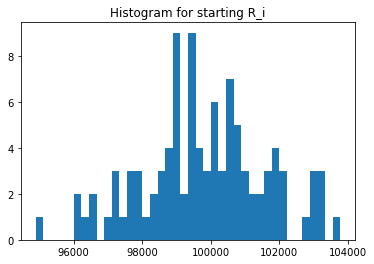

In [22]:
import matplotlib.pyplot as plt
a = starting_Ri.unique()
_ = plt.hist(a, bins=40)  # arguments are passed to np.histogram
plt.title("Histogram for starting R_i")
plt.show()

In [23]:
experiments.UNI_Qi.unique()

array([201996.5577461 , 298767.09001246, 198768.09001246, 198767.09001246,
       297612.05563807, 197618.05563807, 298836.73777557, 198836.73777557,
       301434.41979024, 201440.41979024, 200393.64850544, 201433.41979024,
       303911.95947475, 201508.3008214 , 301508.3008214 , 203911.95947475,
       201343.31949659, 295450.06267274, 195456.06267274, 203913.95947475,
       301330.31949659, 201329.31949659, 197612.05563807, 201516.3008214 ,
       303759.64873892, 203759.64873892, 202076.43624101, 199946.02378366,
       299946.02378366, 307548.2919022 , 203770.64873892, 207551.2919022 ,
       302063.43624101, 202063.43624101, 199951.02378366, 200388.64850544,
       196680.4744237 , 197607.83541865, 300389.64850544, 297607.83541865,
       198840.73777557, 296672.4744237 , 196671.4744237 , 207547.2919022 ,
       197614.83541865, 299099.02061417, 199108.02061417, 199266.81513095,
       300271.26826131, 200270.26826131, 298693.76672789, 198693.76672789,
       192216.43227218, 1

In [24]:
experiments.UNI_Si.unique()

array([10000., 15031., 15060., 15029., 14964., 14904., 14962., 15116.,
       14966., 14907., 15001., 14818., 14948., 14990., 15084., 15022.,
       14993., 15032., 15018., 15144., 14855., 15202., 15111., 14988.,
       14903., 15054., 15048., 15070., 14909., 15179., 14965., 15011.,
       14967., 14926., 14980., 14982., 15050., 15072., 14895., 15046.,
       15030., 15081., 15150., 14939., 15123., 14918., 15053., 14979.,
       14897., 15106., 14854., 15052., 15134., 15038., 15068., 15199.,
       14973., 15047., 15064., 14946., 14848., 14923., 14844., 14963.,
       14970., 14975., 14900., 14935., 15023., 15268., 14850., 14950.,
       15013., 14991., 14999., 14845., 15003., 14866., 15056., 15102.,
       14968., 15148., 15175., 15121., 15091., 15143., 14919., 15039.,
       15007., 15195.])

In [25]:
experiments.UNI_Qj.unique()

array([194418.4474541 , 201904.14952918, 200398.96300874, 197996.40227455,
       196600.92827866, 198222.06850876, 203454.75174422, 197747.81243404,
       195291.57119252, 196077.231658  , 197163.19100989, 194032.06930399,
       195796.0226227 , 200274.41256359, 207603.31638219, 193893.14310625,
       196395.68708622, 203172.92928252, 205690.05487723, 195079.09308881,
       211180.94193703, 194471.01880576, 200858.12505511, 203188.96817795,
       204688.0190082 , 208955.66475475, 202518.13993079, 202643.26662457,
       202361.02101812, 196139.41003538, 195113.38003965, 201175.61438211,
       201903.17850891, 201901.7459278 , 201191.35420859, 202098.49027696,
       193672.9508536 , 201004.38478618, 200911.82102208, 201939.03604997,
       195137.12985027, 205296.97880476, 202876.2016126 , 199108.23227827,
       203151.55171495, 194787.8221507 , 200739.82658988, 201042.13295417,
       200931.08249079, 195762.39587696, 196641.67923206, 206296.19078279,
       196356.27137964, 1

In [26]:
experiments.UNI_Rj.unique()

array([ 97209.22372705, 100952.07476459, 100199.48150437,  98998.20113728,
        98300.46413933,  99111.03425438, 101727.37587211,  98873.90621702,
        97645.78559626,  98038.615829  ,  98581.59550495,  97016.03465199,
        97898.01131135, 100137.2062818 , 103801.6581911 ,  96946.57155313,
        98197.84354311, 101586.46464126, 102845.02743862,  97539.54654441,
       105590.47096851,  97235.50940288, 100429.06252756, 101594.48408897,
       102344.0095041 , 104477.83237737, 101259.0699654 , 101321.63331229,
       101180.51050906,  98069.70501769,  97556.69001982, 100587.80719106,
       100951.58925445, 100950.8729639 , 100595.67710429, 101049.24513848,
        96836.4754268 , 100502.19239309, 100455.91051104, 100969.51802499,
        97568.56492513, 102648.48940238, 101438.1008063 ,  99554.11613914,
       101575.77585748,  97393.91107535, 100369.91329494, 100521.06647709,
       100465.5412454 ,  97881.19793848,  98320.83961603, 103148.09539139,
        98178.13568982,  

In [27]:
starting_Rj = experiments[experiments.timestep == 0]
starting_Rj = starting_Rj['UNI_Rj']
starting_Rj.reset_index(drop=True)
starting_Rj.unique()

array([ 97209.22372705,  98998.20113728, 100952.07476459,  98300.46413933,
       101727.37587211,  98873.90621702,  97645.78559626, 100199.48150437,
        98581.59550495,  97898.01131135,  99111.03425438,  96946.57155313,
       103801.6581911 , 100137.2062818 , 102845.02743862,  97539.54654441,
        98197.84354311, 101586.46464126,  97235.50940288, 101594.48408897,
       102344.0095041 , 104477.83237737, 101321.63331229,  98038.615829  ,
       101259.0699654 , 101180.51050906,  98069.70501769,  97016.03465199,
       100429.06252756, 100595.67710429, 100950.8729639 ,  96836.4754268 ,
       100502.19239309, 100455.91051104, 102648.48940238, 101575.77585748,
       101438.1008063 ,  97393.91107535,  97556.69001982,  99554.11613914,
       100369.91329494, 101049.24513848, 100521.06647709, 100465.5412454 ,
       103148.09539139,  98320.83961603,  98445.85349378,  98178.13568982,
       100587.80719106,  97881.19793848, 100969.51802499, 100695.23274396,
       101640.17738244,  

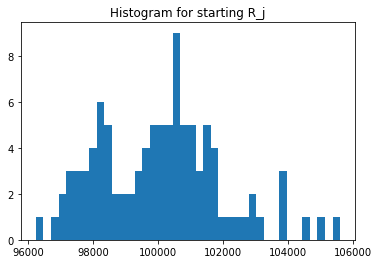

In [28]:
a = starting_Rj.unique()
_ = plt.hist(a, bins=40)  # arguments are passed to np.histogram
plt.title("Histogram for starting R_j")
plt.show()

In [29]:
experiments.UNI_Sj.unique()

array([10000], dtype=int64)

In [30]:
experiments.UNI_ij.unique()

array([100998.27887305,  93662.54500623,  92662.54500623, ...,
        96863.2078689 ,  98678.70193842, 105002.97132416])

In [31]:
experiments.UNI_ji.unique()

array([ 97209.22372705, 107149.07476459, 108305.07476459, ...,
       104434.19239309,  98456.67710429,  92693.21245131])

In [32]:
experiments.UNI_Sij.unique()

array([9.81796429e+09, 1.00329751e+10, 9.90031276e+09, 9.84223968e+09,
       9.90049933e+09, 9.93036310e+09, 1.03717143e+10, 9.96195642e+09,
       9.82947978e+09, 9.58077778e+09, 1.00434756e+10, 9.80169667e+09,
       9.78715905e+09, 1.03916030e+10, 1.02074126e+10, 9.57870108e+09,
       9.77554724e+09, 1.01209993e+10, 1.02984006e+10, 9.69024995e+09,
       1.01475839e+10, 9.45041598e+09, 9.90289246e+09, 1.04616291e+10,
       1.00104565e+10, 1.04709845e+10, 1.00815215e+10, 1.03317720e+10,
       1.00084976e+10, 9.71344377e+09, 9.66621386e+09, 1.02683247e+10,
       9.88386758e+09, 1.02815920e+10, 9.71107430e+09, 1.01746014e+10,
       9.66127772e+09, 1.01155666e+10, 1.01950437e+10, 9.99284372e+09,
       9.79534330e+09, 1.03000872e+10, 1.00425347e+10, 9.79574423e+09,
       1.00124022e+10, 9.94747681e+09, 9.97673547e+09, 9.75924212e+09,
       1.01702013e+10, 1.00817243e+10, 9.72847125e+09, 1.00660286e+10,
       9.98064483e+09, 9.88579074e+09, 9.99227694e+09, 9.89760437e+09,
      

In [33]:
def get_M(k, v):
    if k == 'sim_config':
        k, v = 'M', v['M']
    return k, v

config_ids = [
    dict(
        get_M(k, v) for k, v in config.__dict__.items() if k in ['simulation_id', 'run_id', 'sim_config', 'subset_id']
    ) for config in configs
]

# Agent sequences

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4459: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


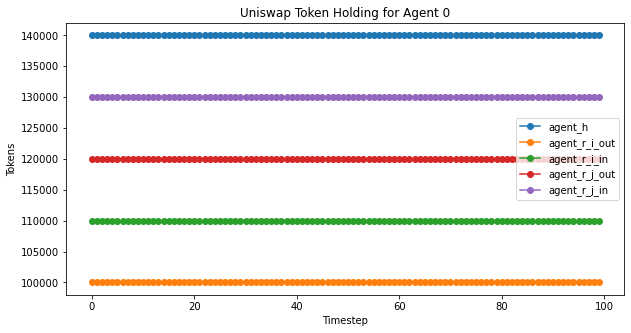

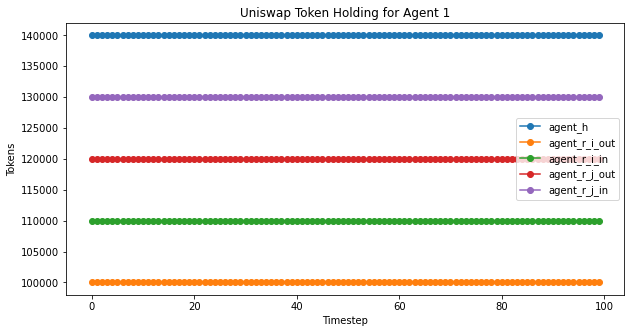

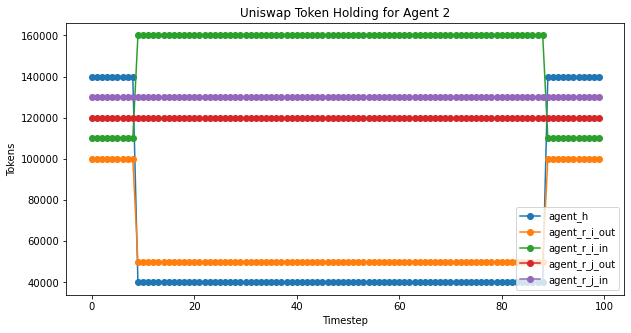

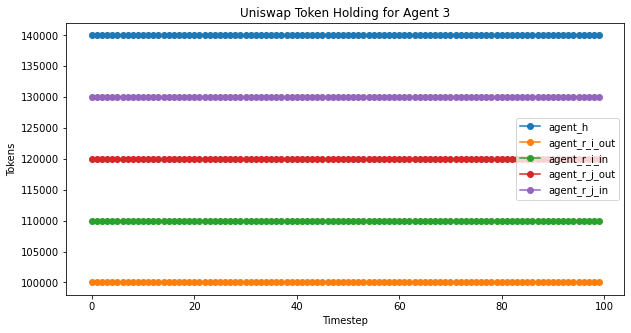

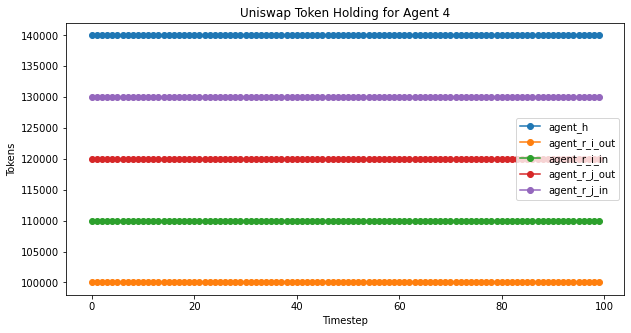

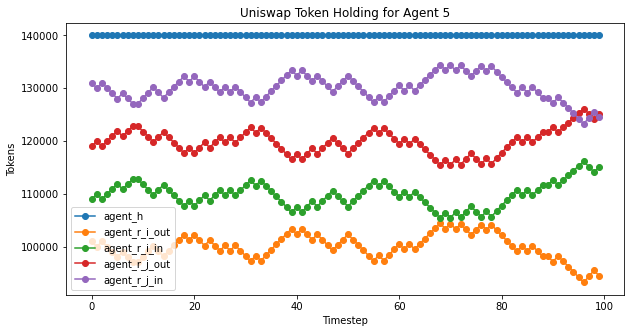

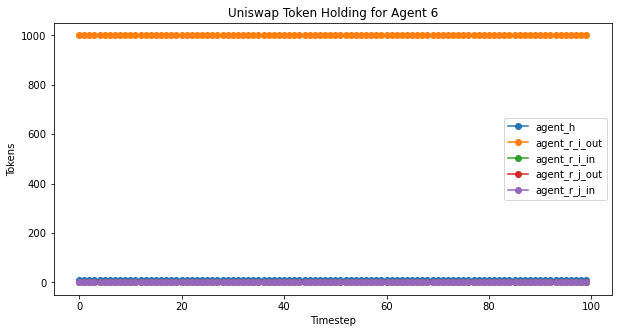

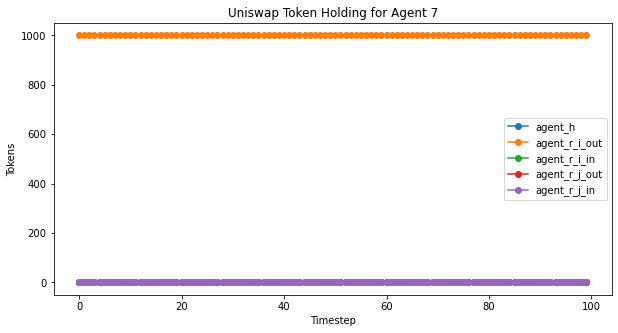

In [34]:
agent_plot(experiment2,'Uniswap Token Holding for Agent ', 100) #,4,'j')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4459: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


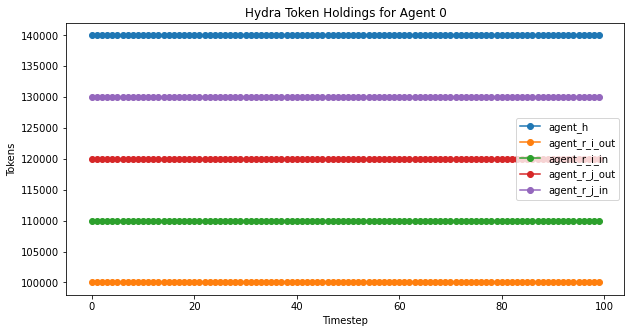

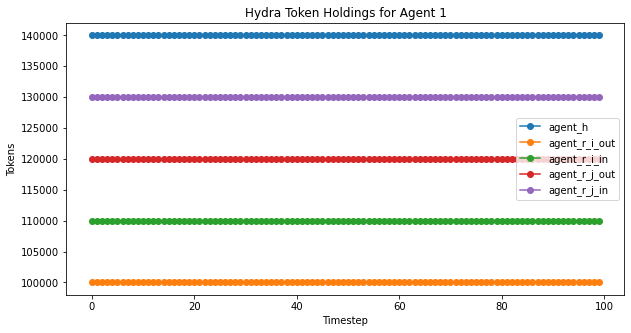

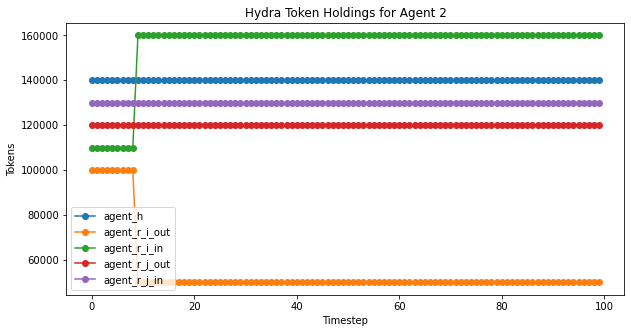

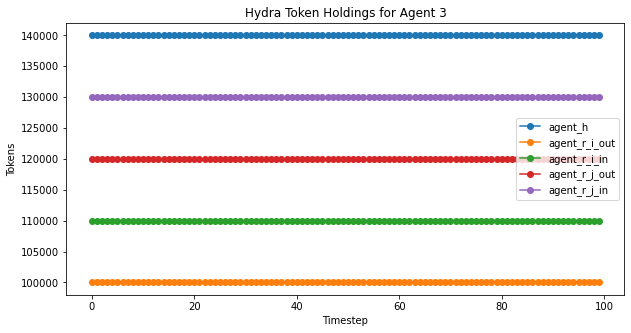

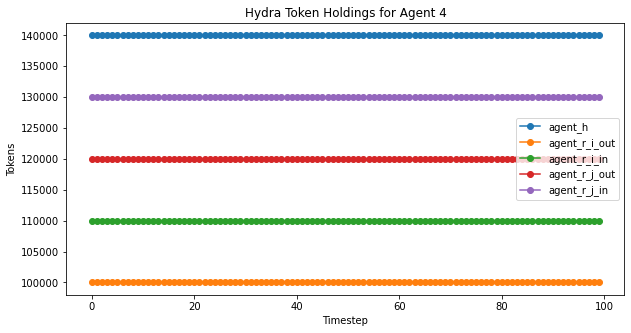

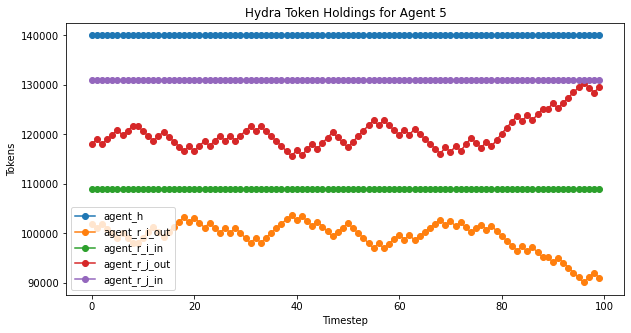

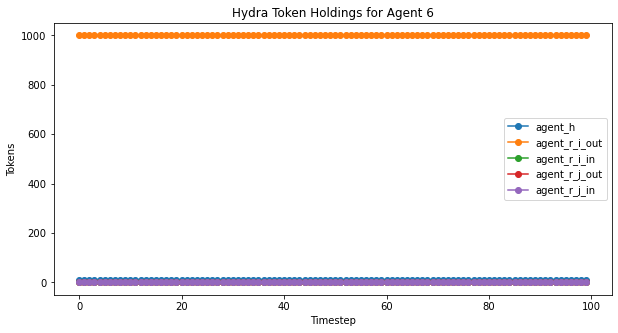

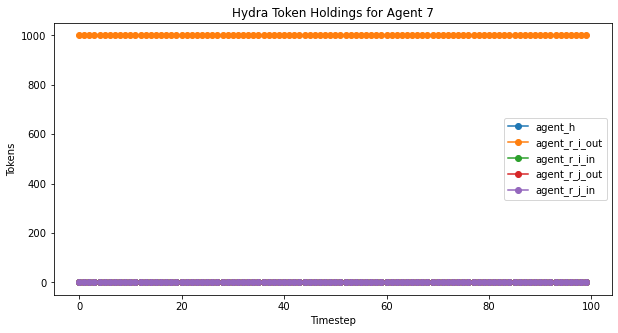

In [35]:
hydra_agent_plot(experiment2,'Hydra Token Holdings for Agent ', 100)

# Liquidity dynamics

Movement of the Uniswap variables

- 'UNI_Ri', 'UNI_Qi', 'UNI_Si'
- 'UNI_Rj', 'UNI_Qj', 'UNI_Sj'
- 'UNI_ij', 'UNI_ji', 'UNI_Sij'

## Uniswap -- Ri-Q instance

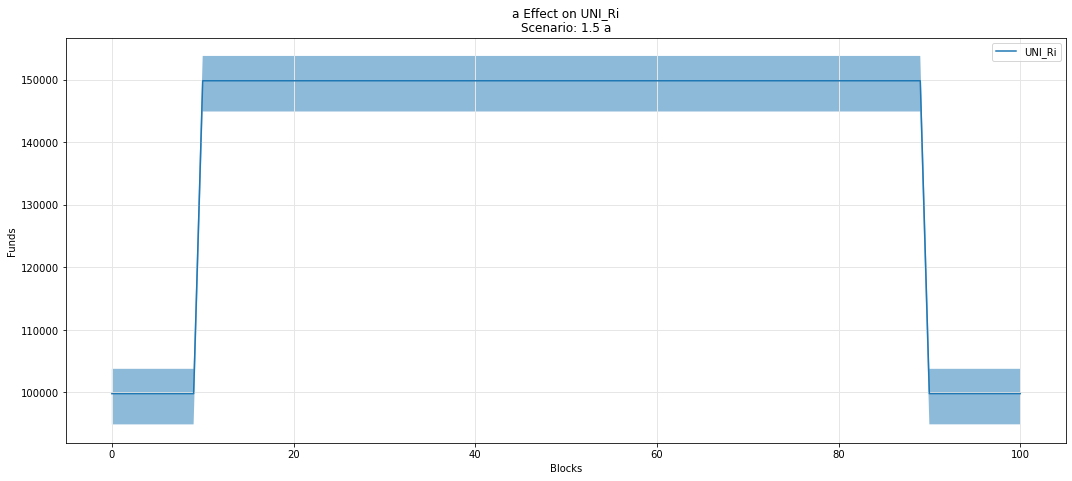

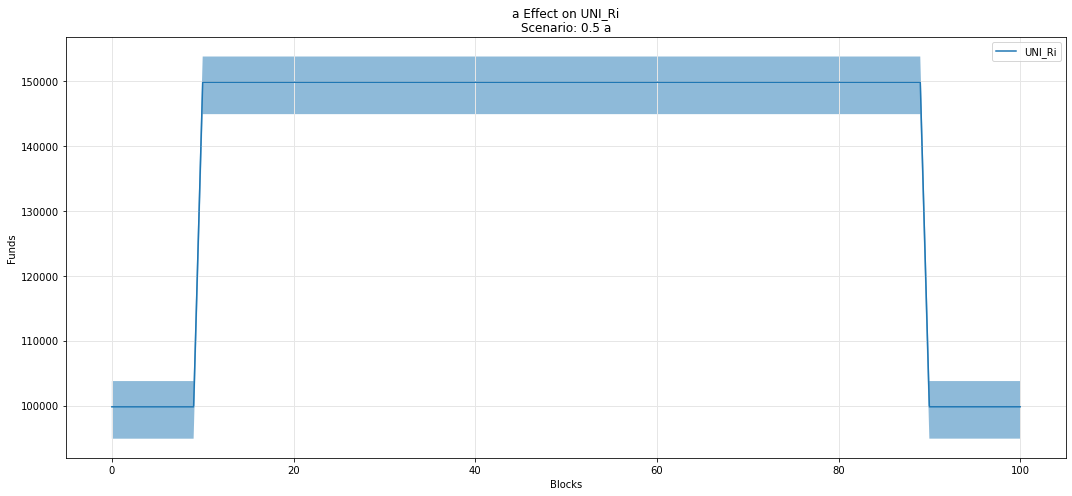

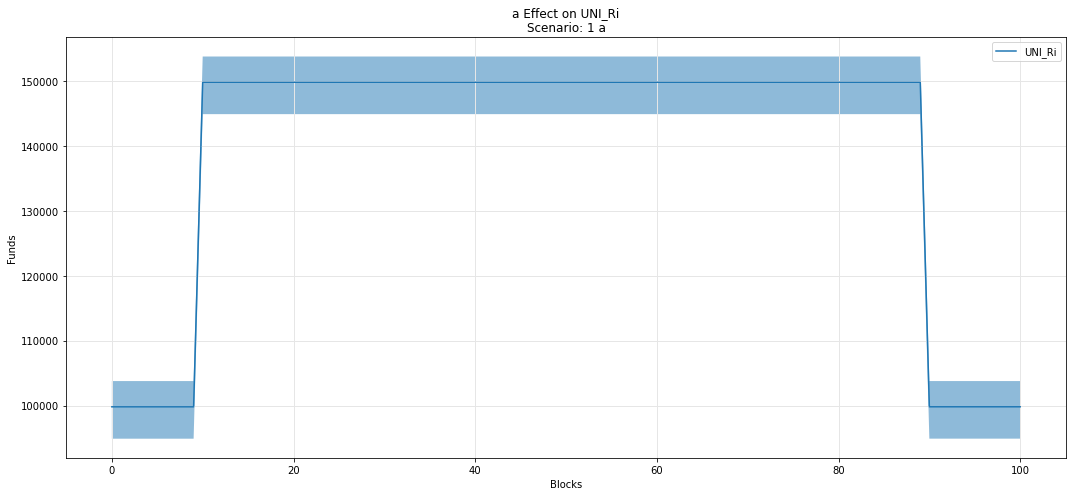

In [36]:
param_fan_plot3(experiments, config_ids, 'a','UNI_Ri')

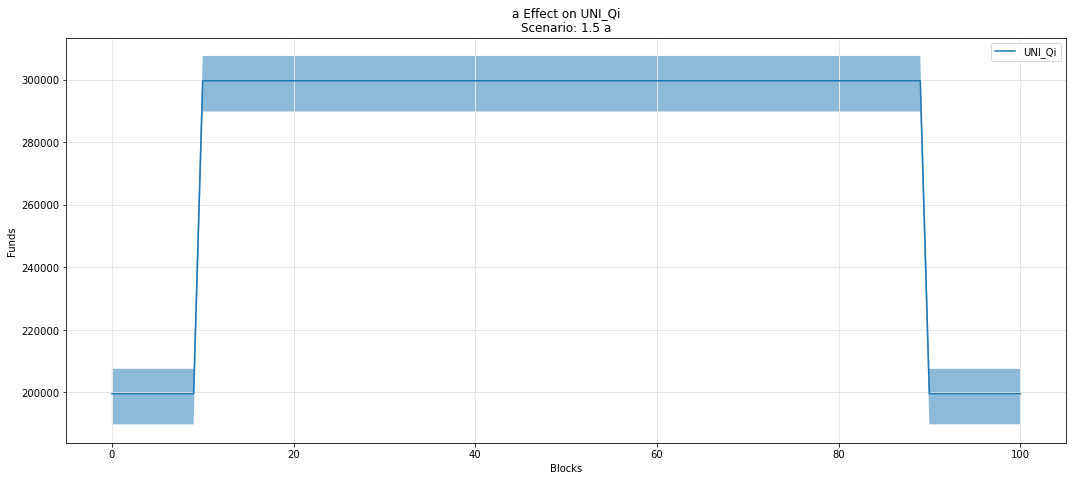

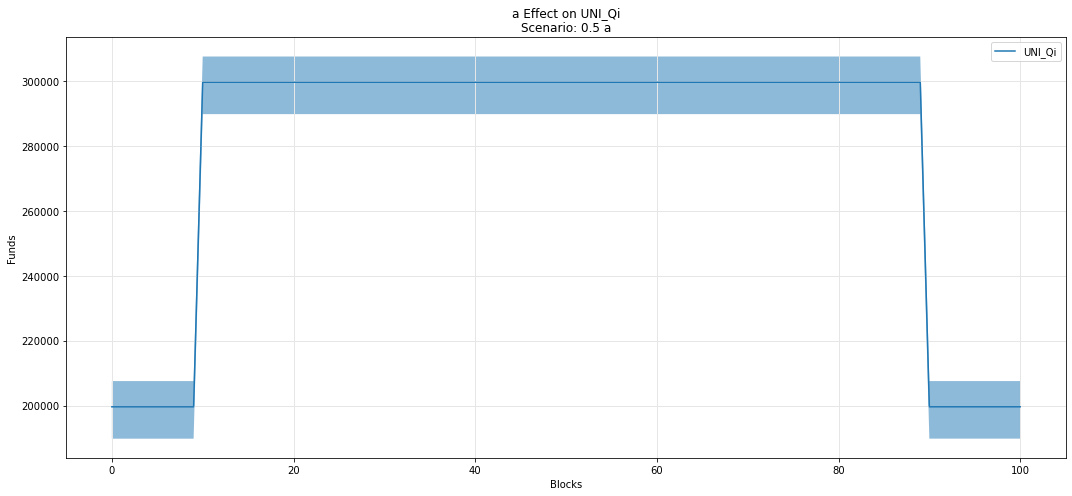

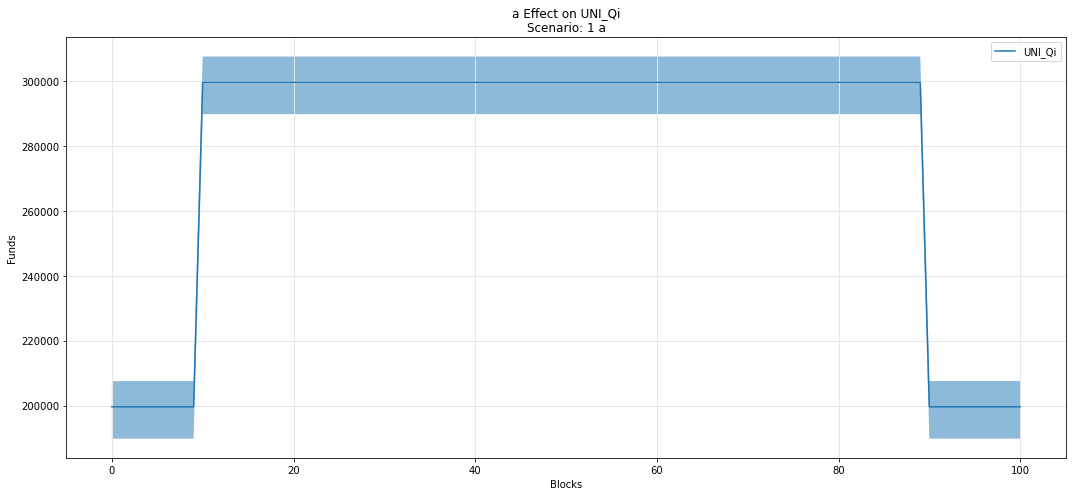

In [37]:
param_fan_plot3(experiments, config_ids, 'a','UNI_Qi')

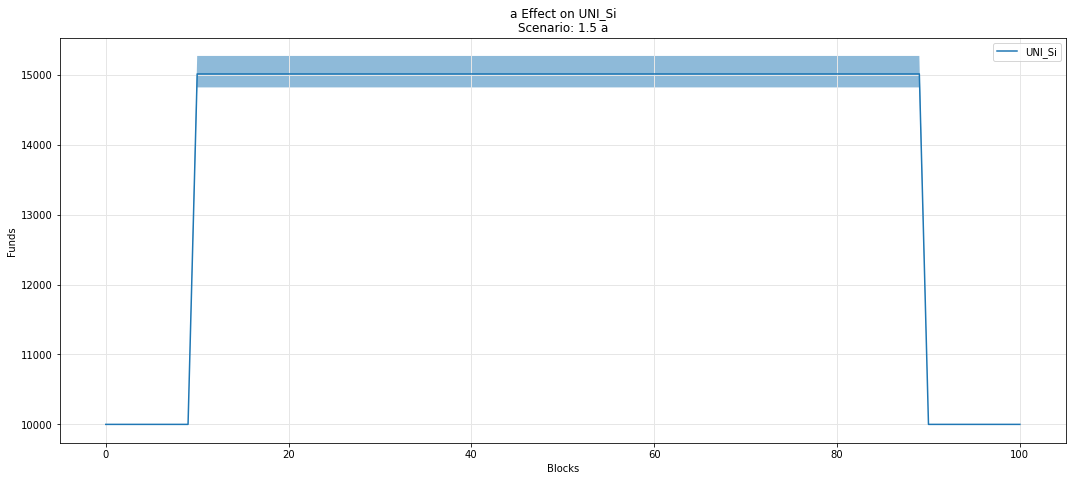

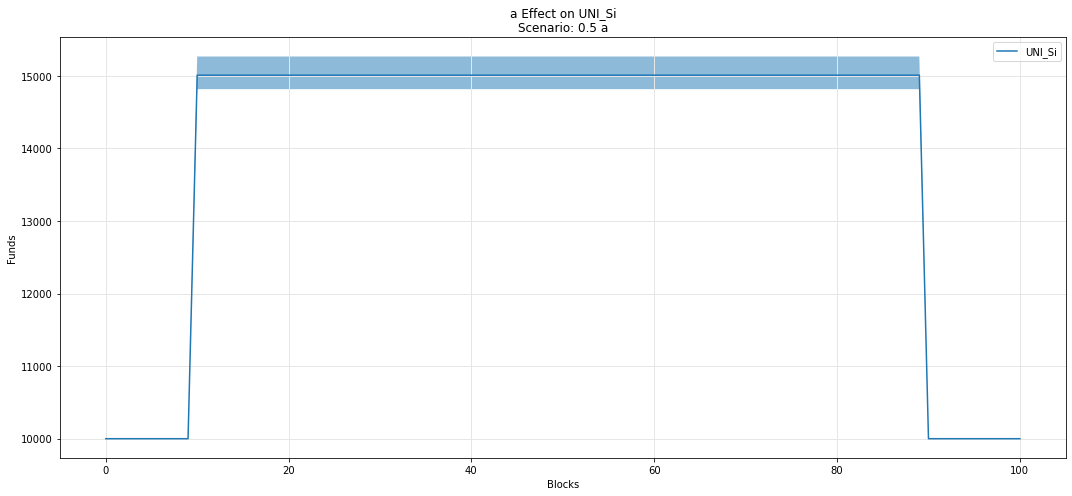

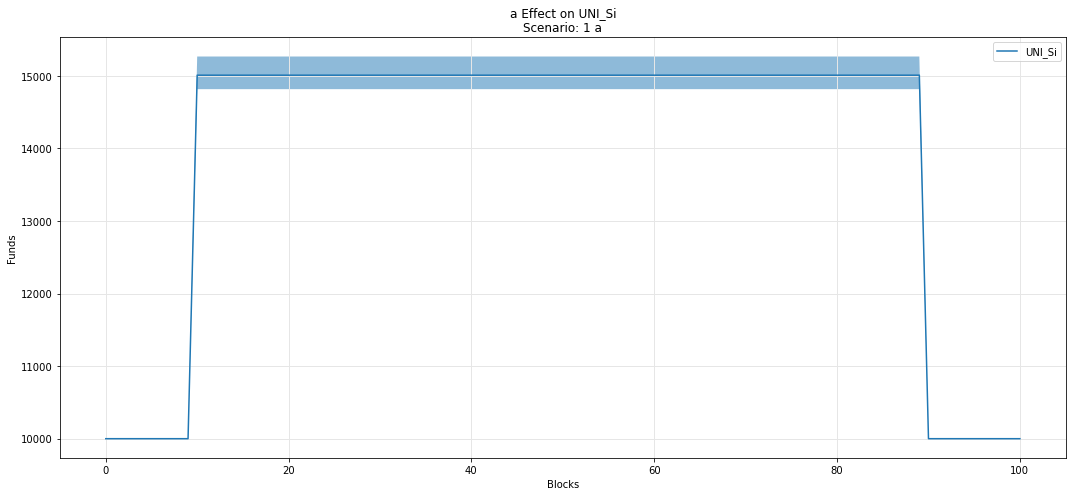

In [38]:
param_fan_plot3(experiments, config_ids, 'a','UNI_Si')

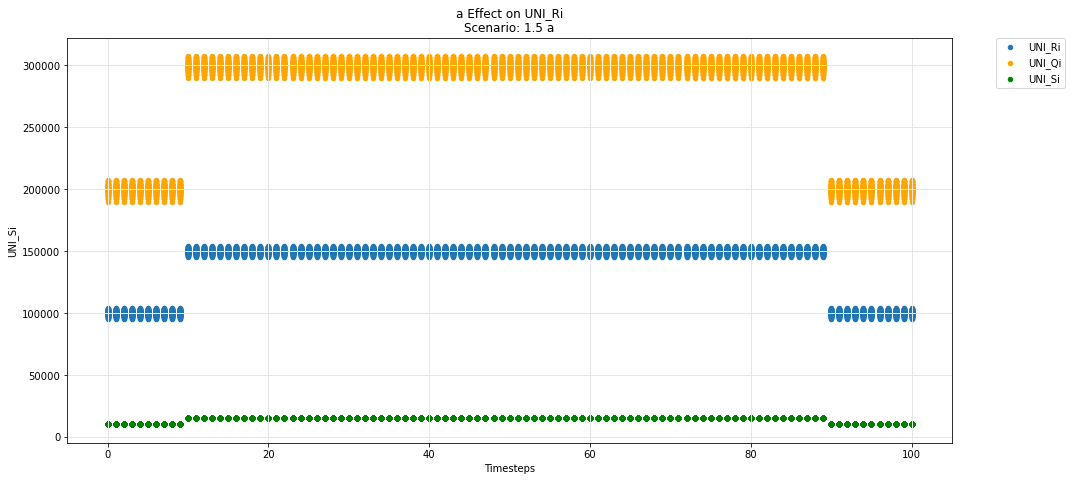

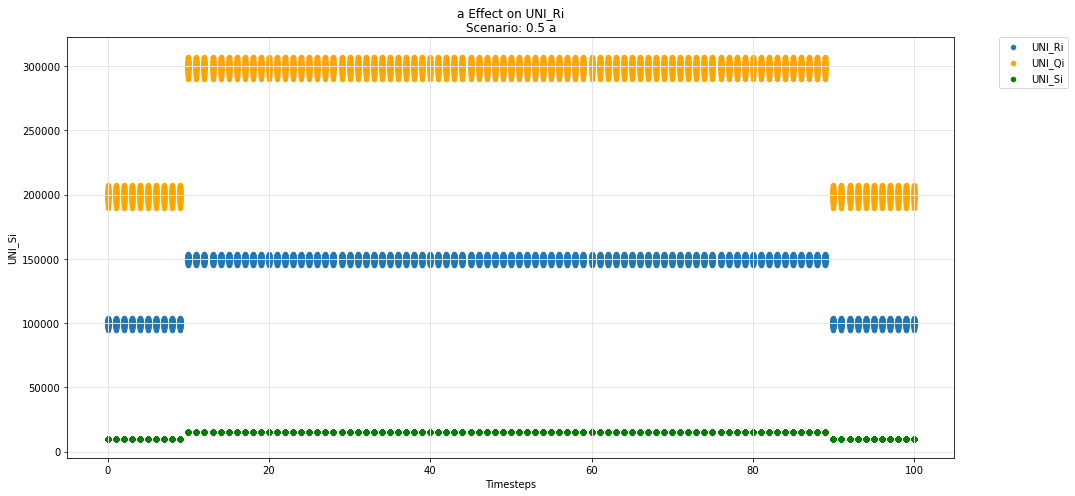

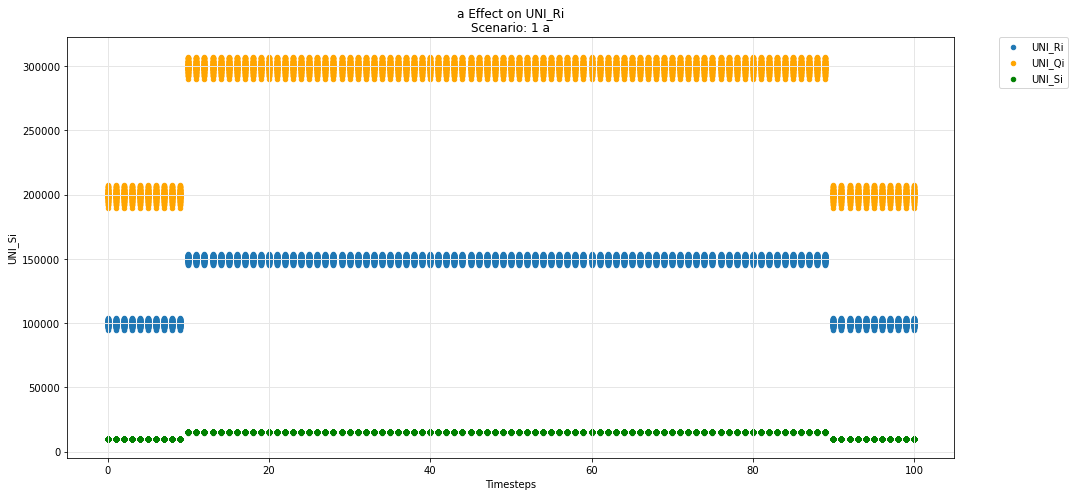

In [39]:
param_test_plot(experiments, config_ids, 'a', 'UNI_Ri', 'UNI_Qi', 'UNI_Si')

## Uniswap -- Rj-Q instance

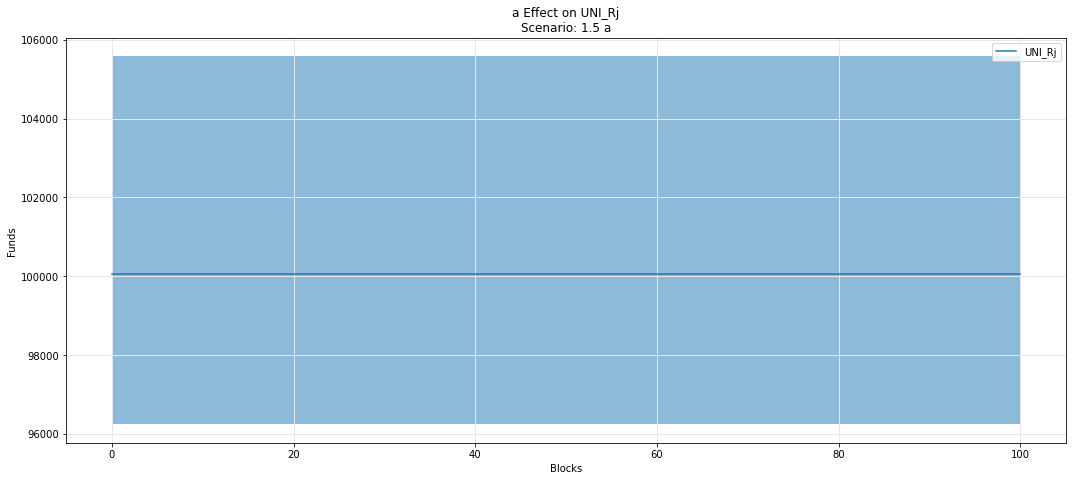

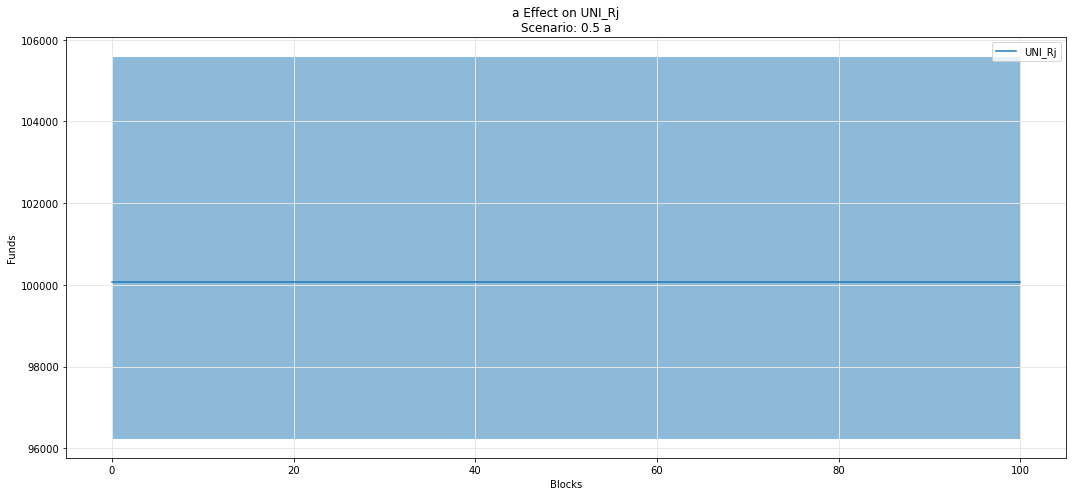

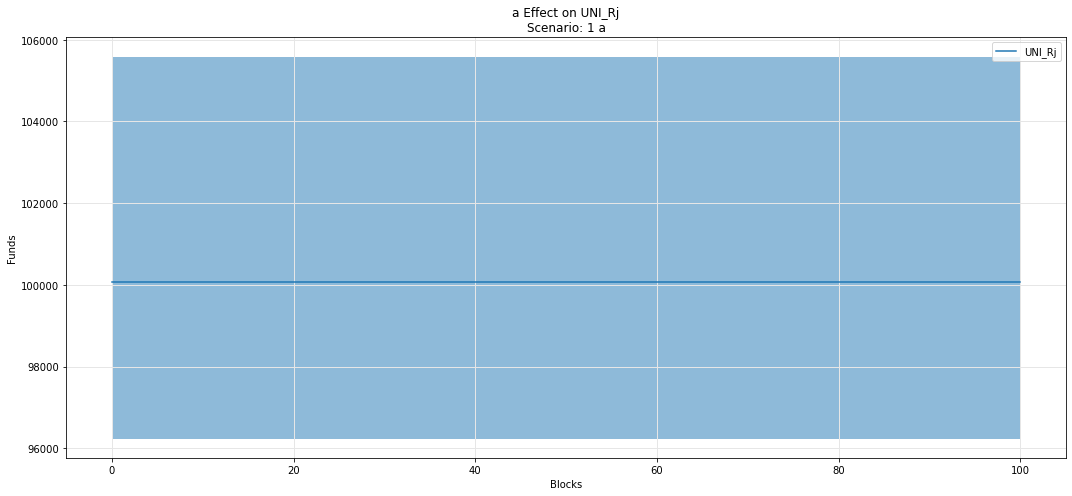

In [40]:
param_fan_plot3(experiments, config_ids, 'a','UNI_Rj')

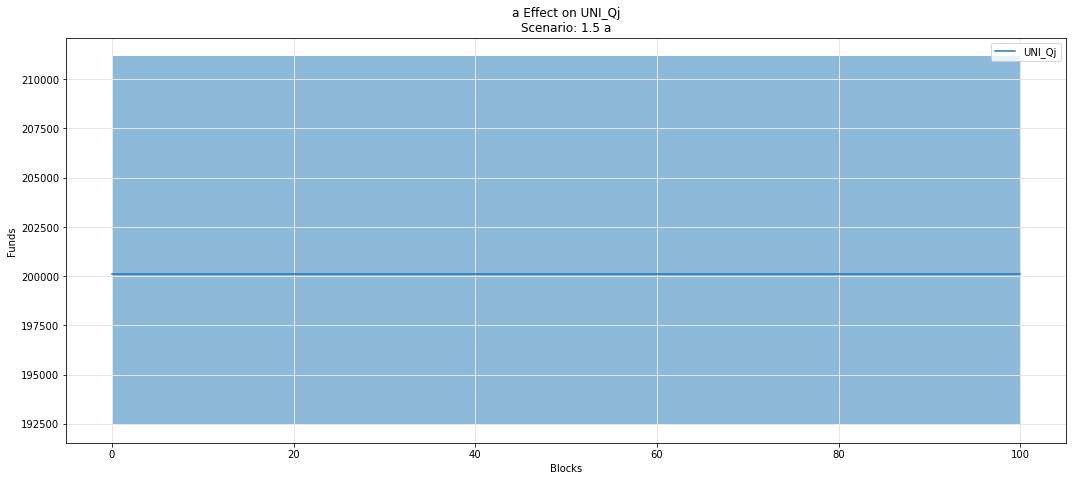

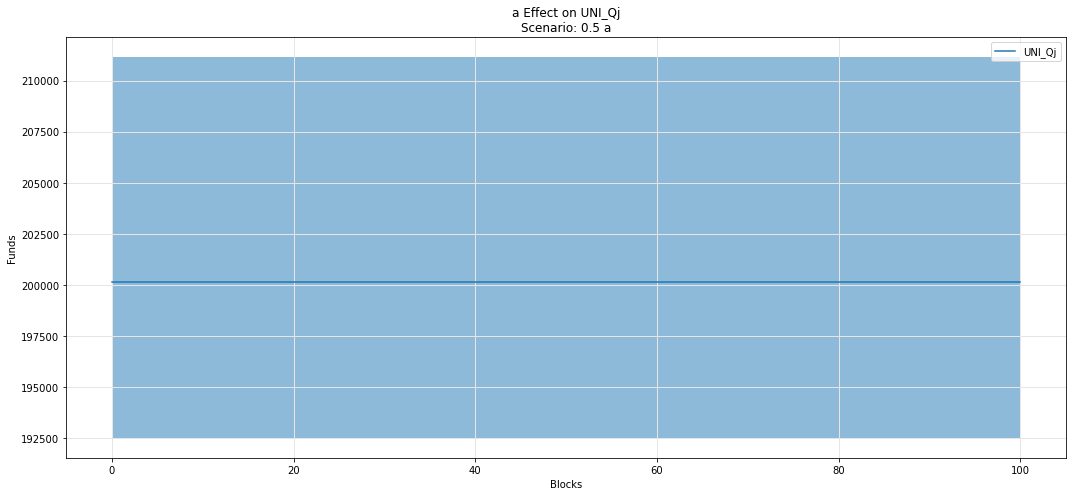

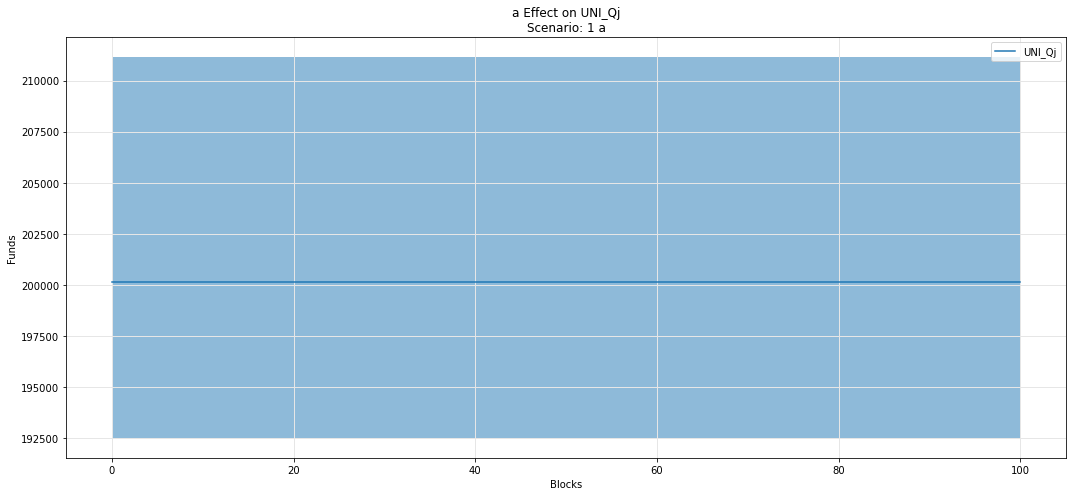

In [41]:
param_fan_plot3(experiments, config_ids, 'a','UNI_Qj')

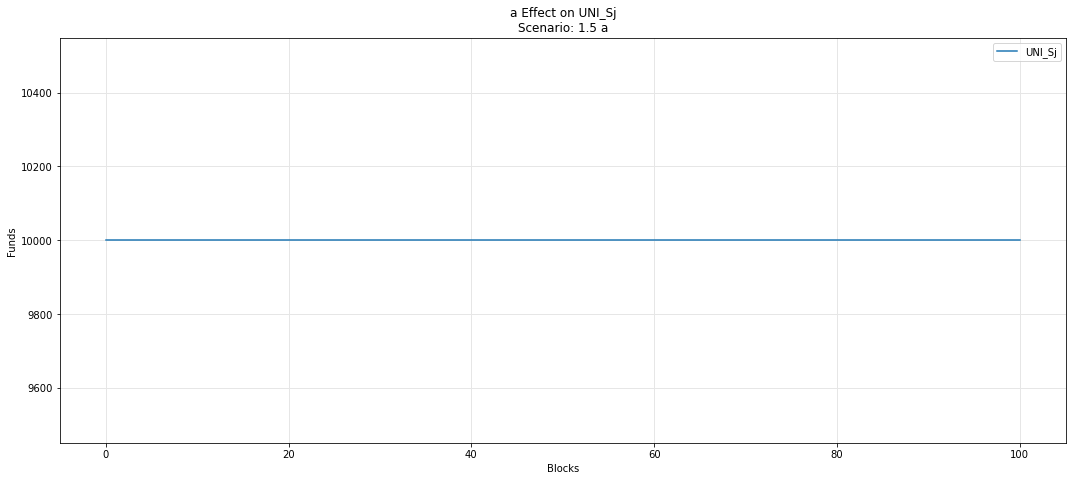

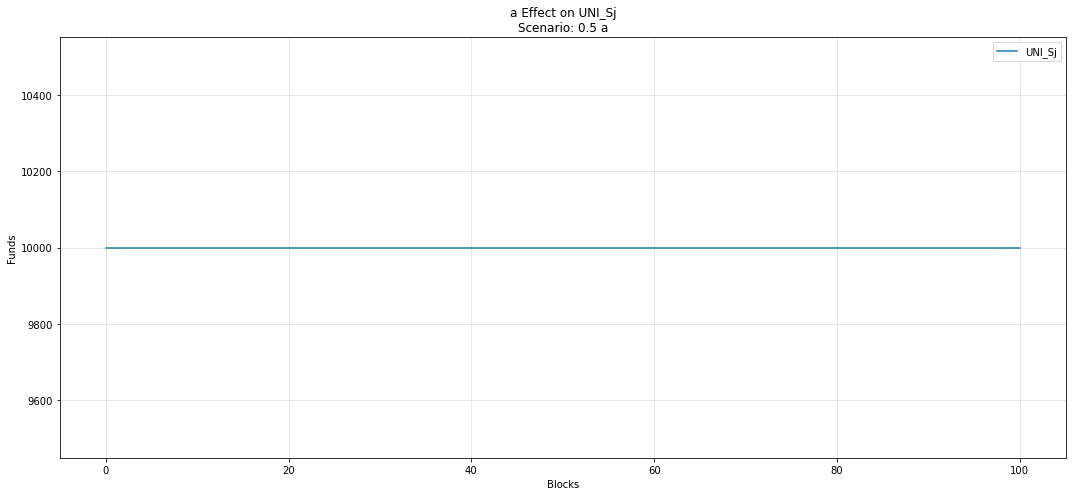

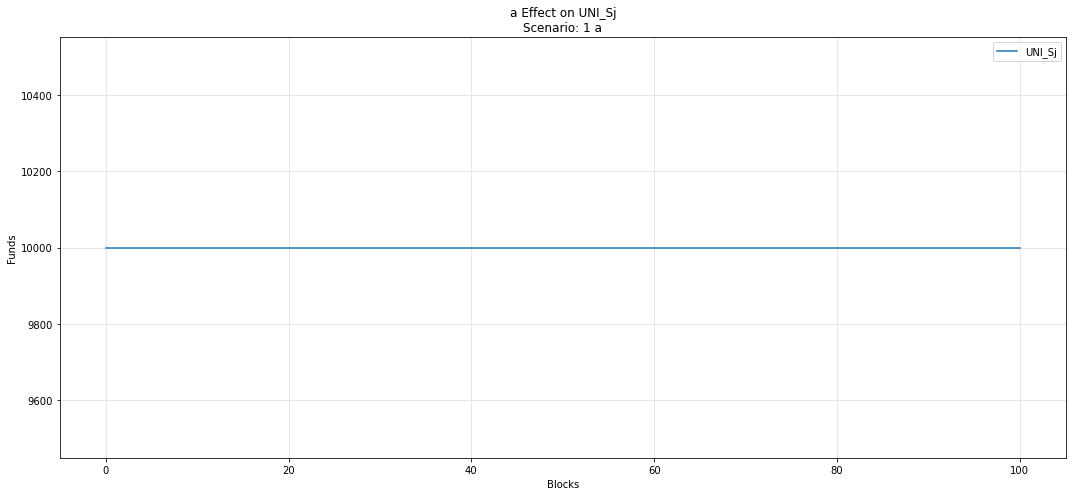

In [42]:
param_fan_plot3(experiments, config_ids, 'a','UNI_Sj')

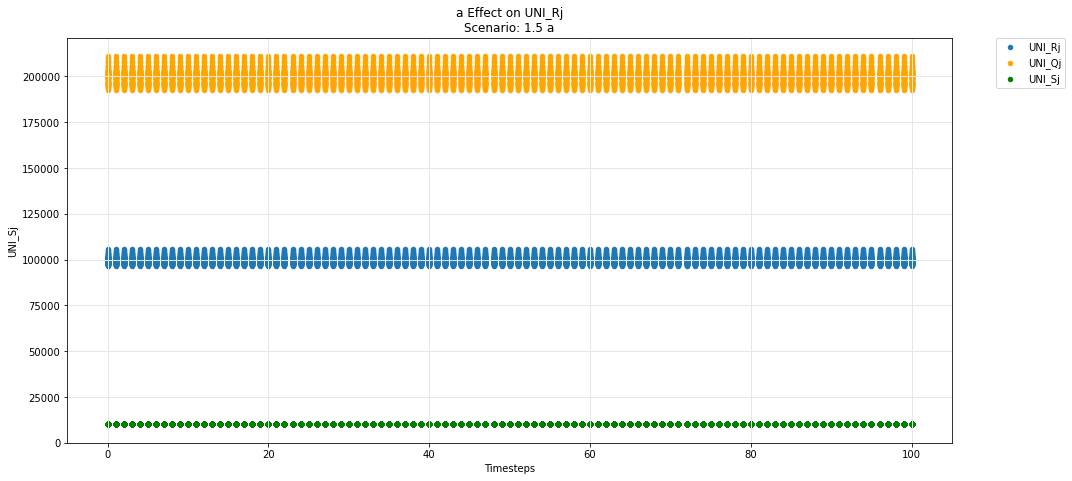

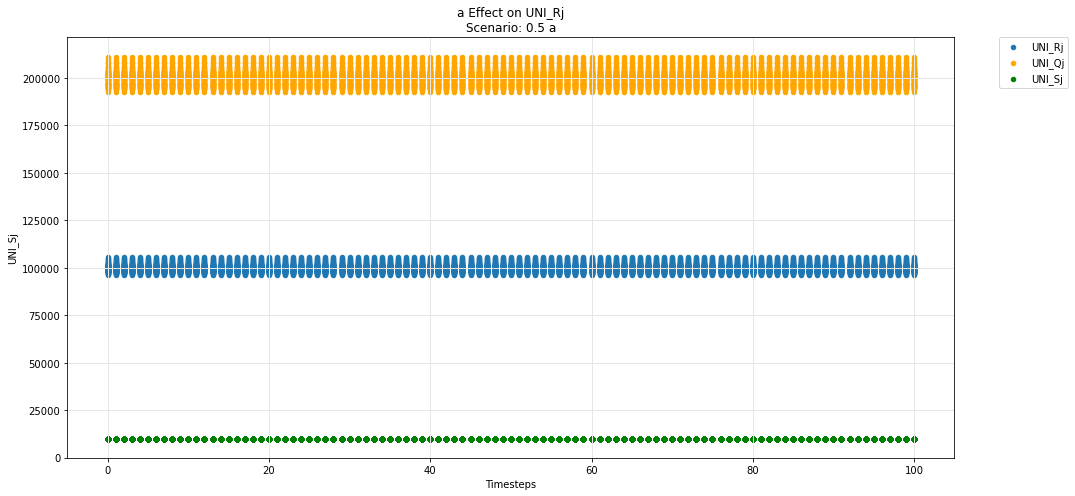

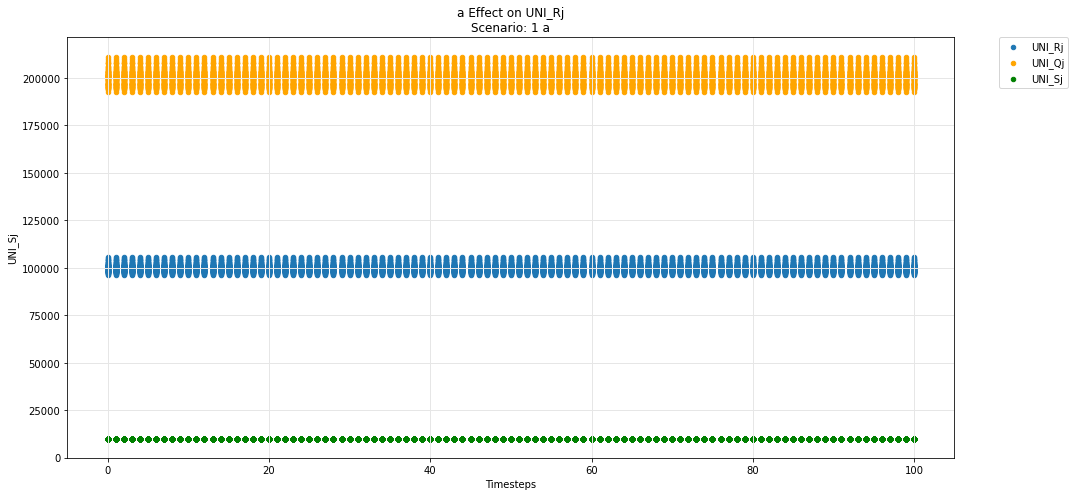

In [43]:
param_test_plot(experiments, config_ids, 'a', 'UNI_Rj', 'UNI_Qj', 'UNI_Sj')

## Uniswap -- ij-Q instance

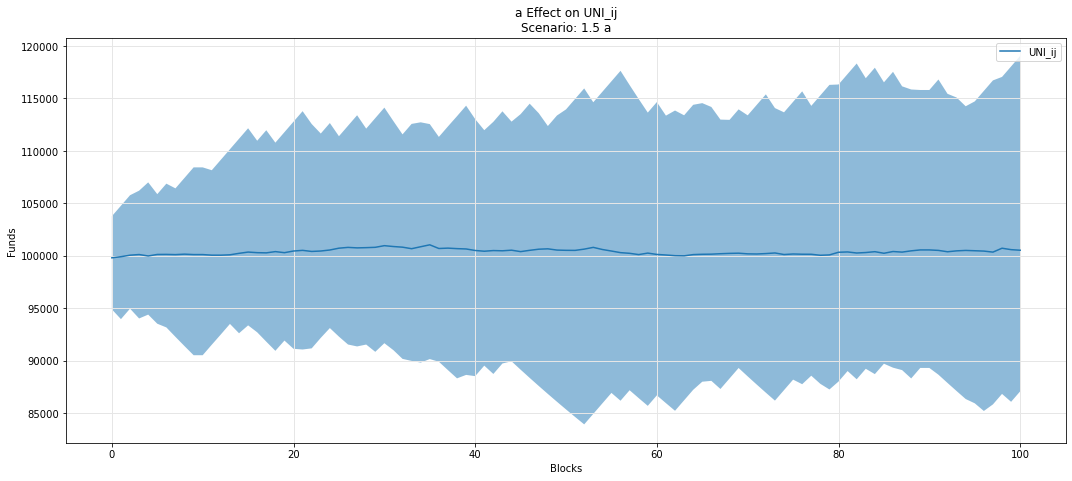

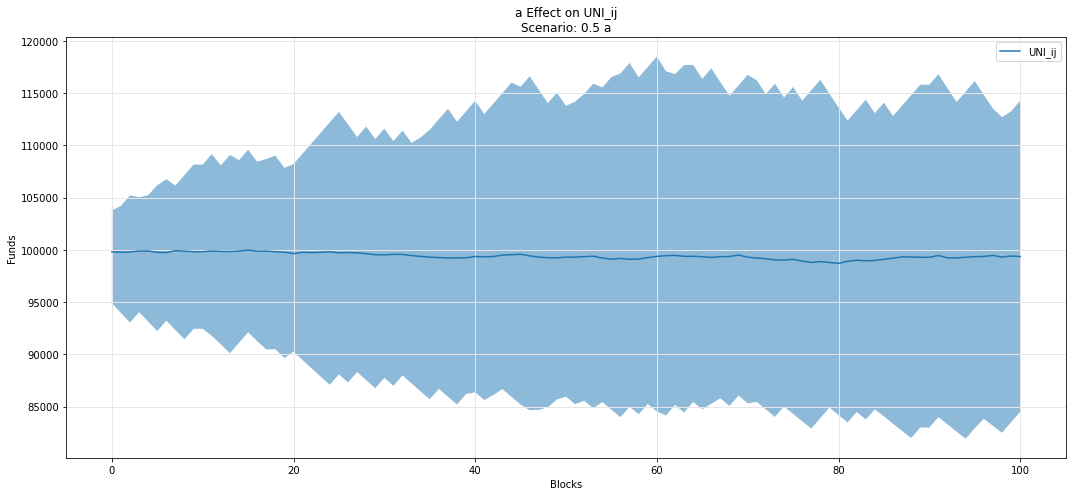

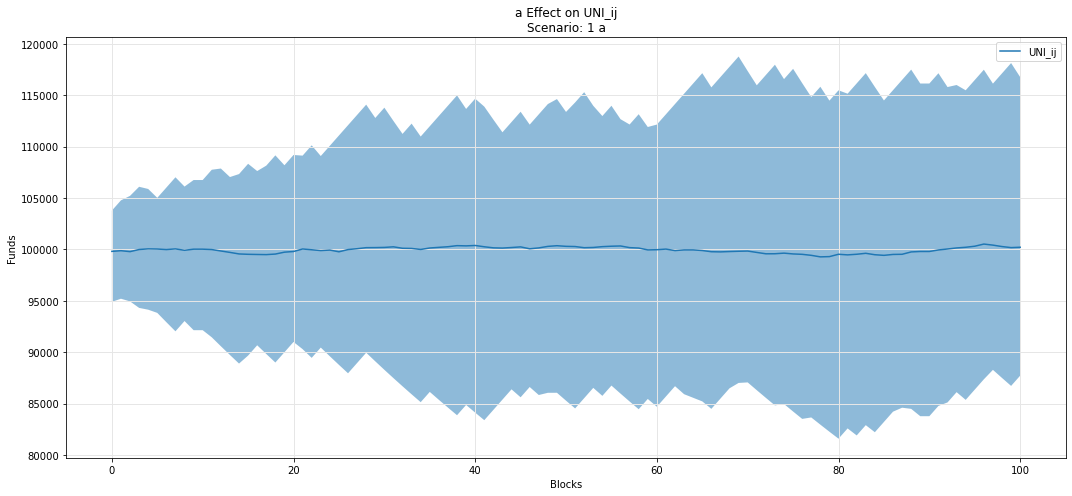

In [44]:
param_fan_plot3(experiments, config_ids, 'a','UNI_ij')

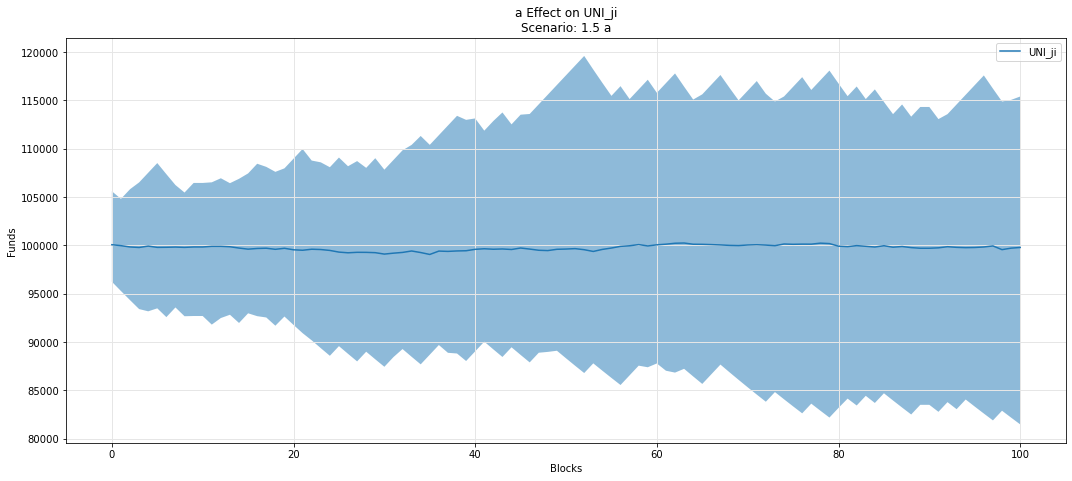

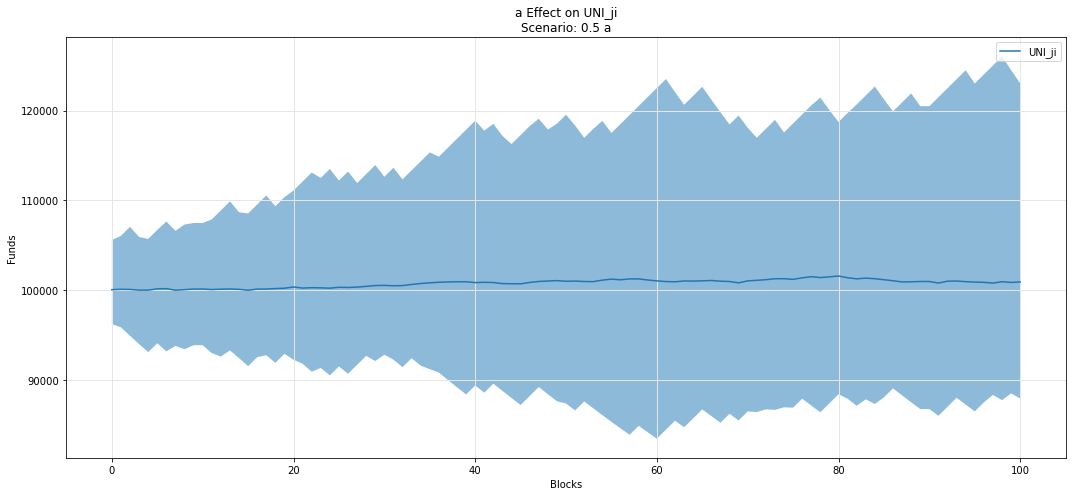

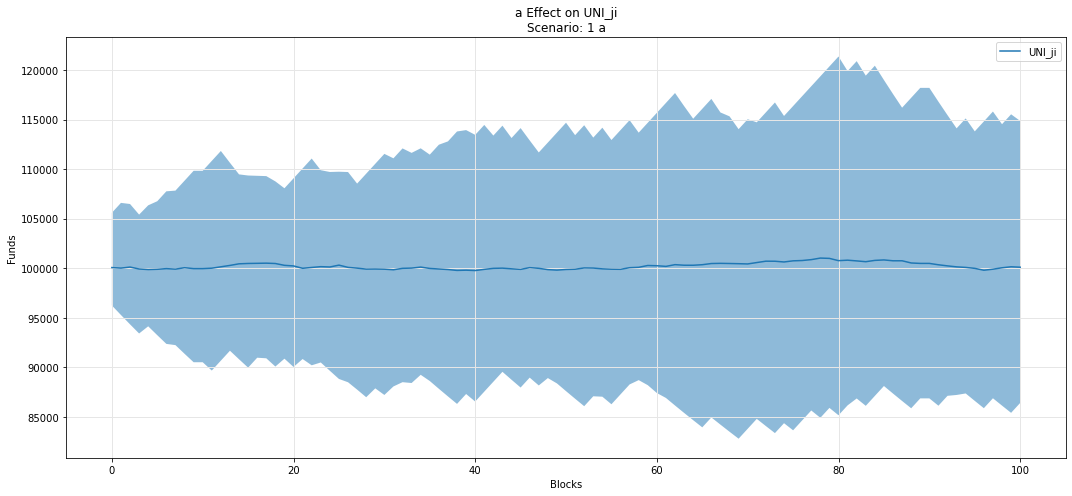

In [45]:
param_fan_plot3(experiments, config_ids, 'a','UNI_ji')

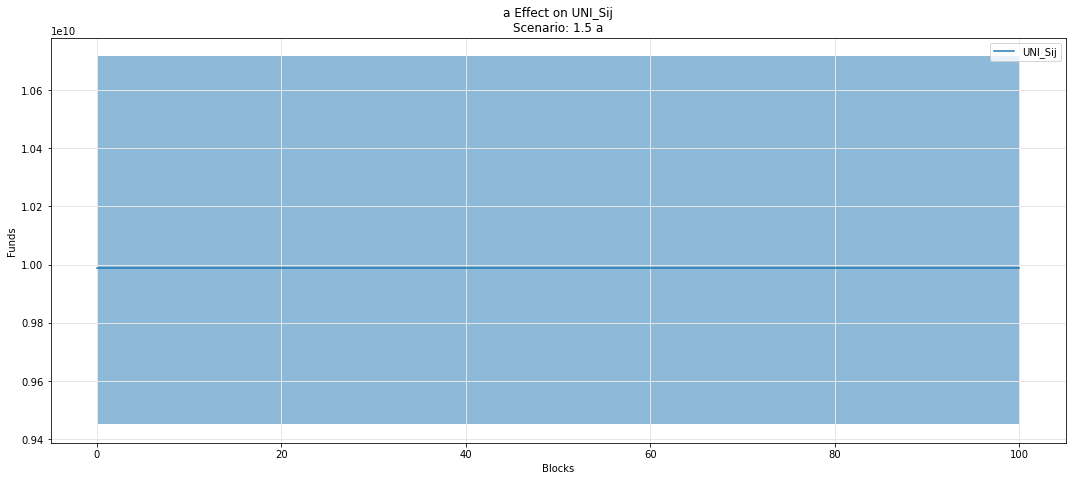

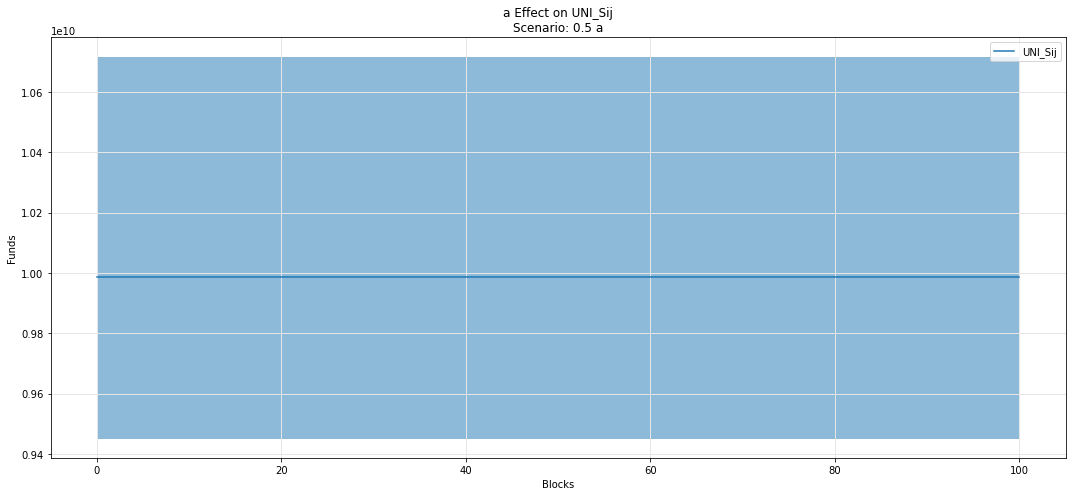

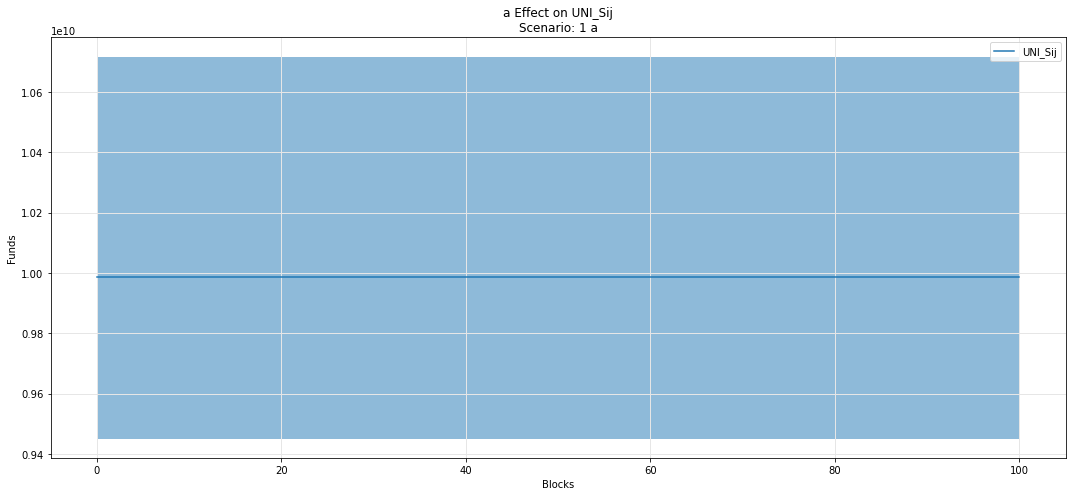

In [46]:
param_fan_plot3(experiments, config_ids, 'a','UNI_Sij')

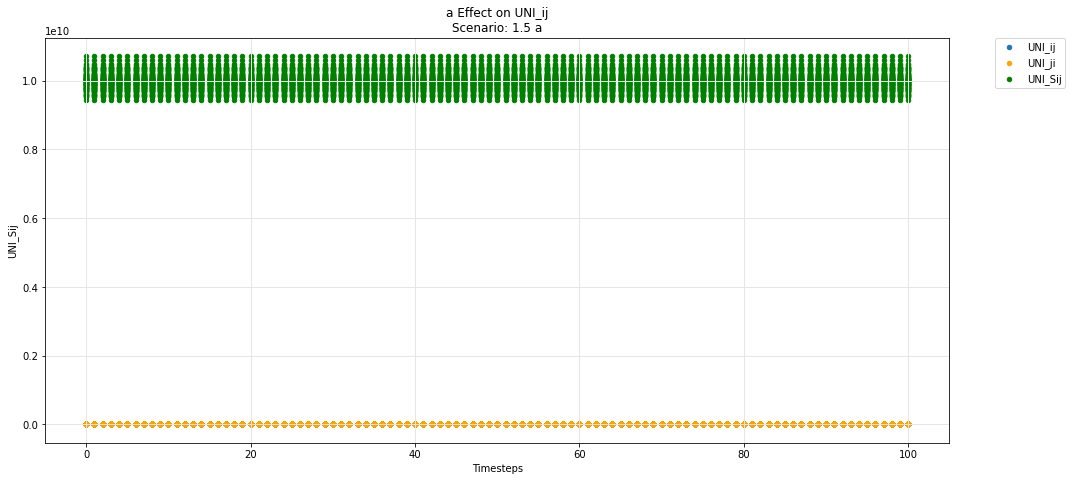

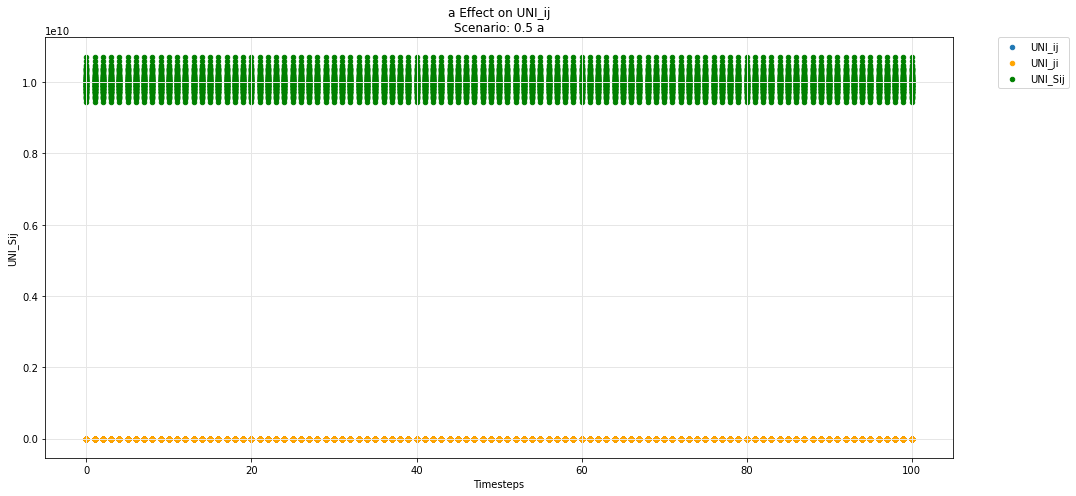

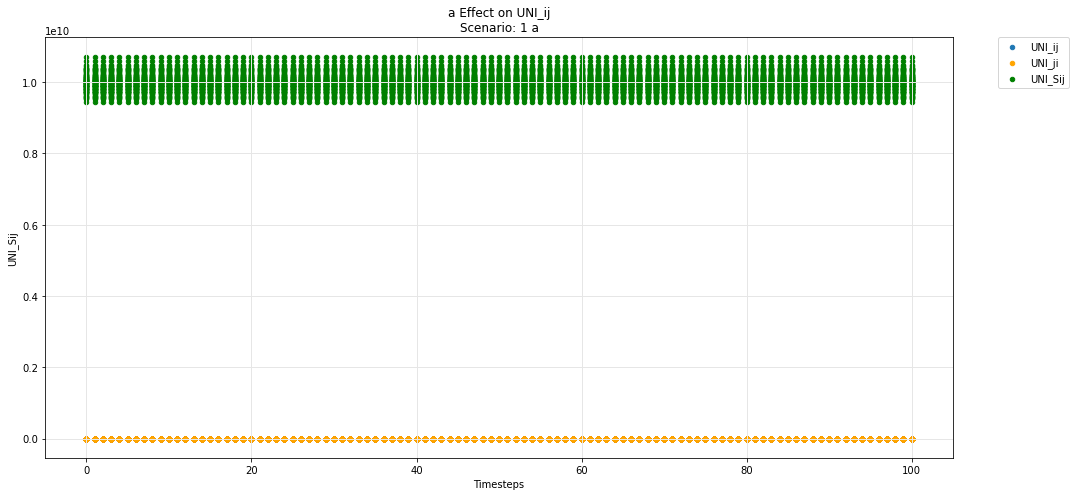

In [47]:
param_test_plot(experiments, config_ids, 'a', 'UNI_ij', 'UNI_ji', 'UNI_Sij')

## Hydra -- base

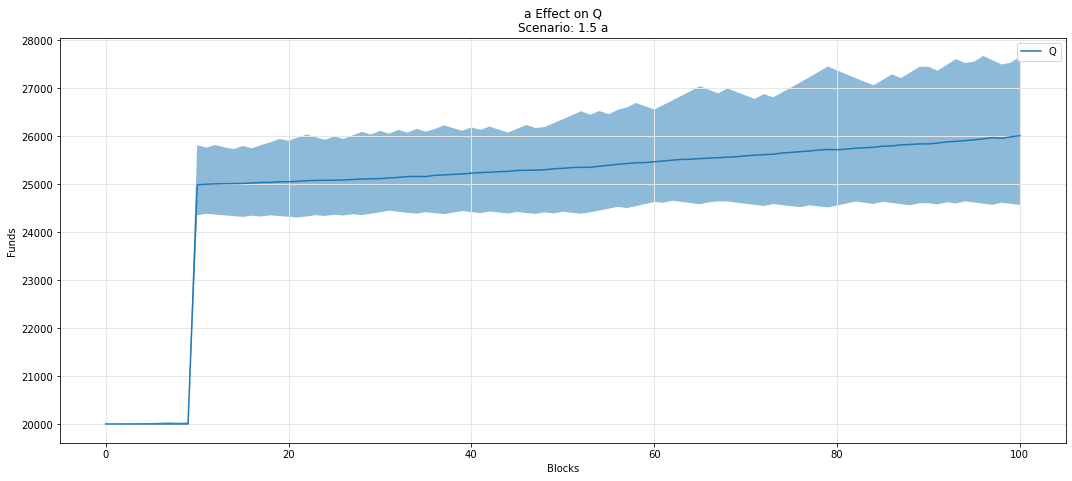

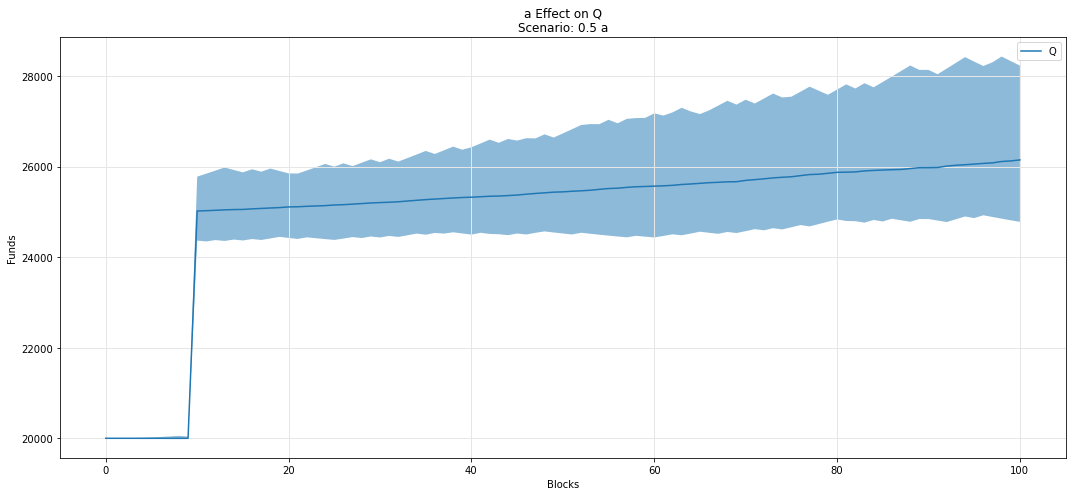

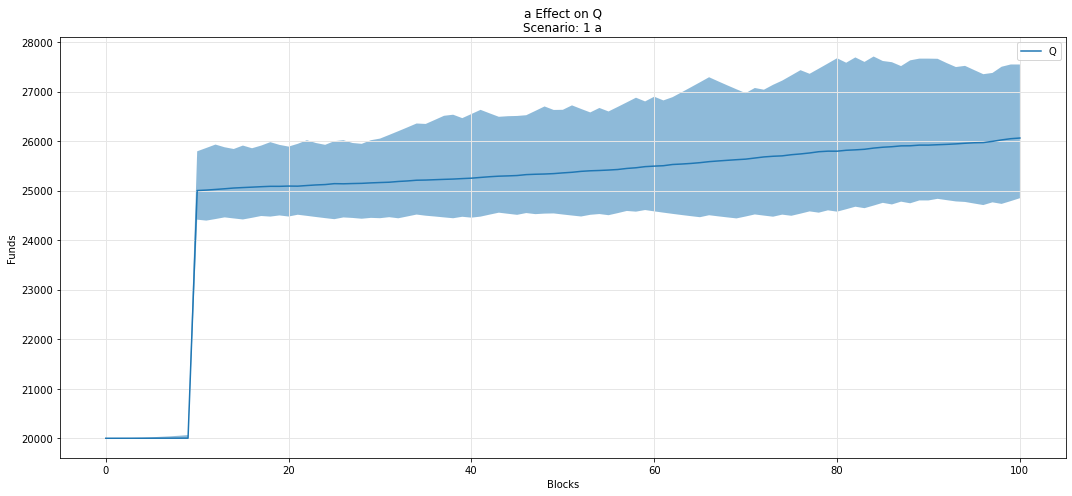

In [48]:
param_fan_plot3(experiments, config_ids, 'a','Q')

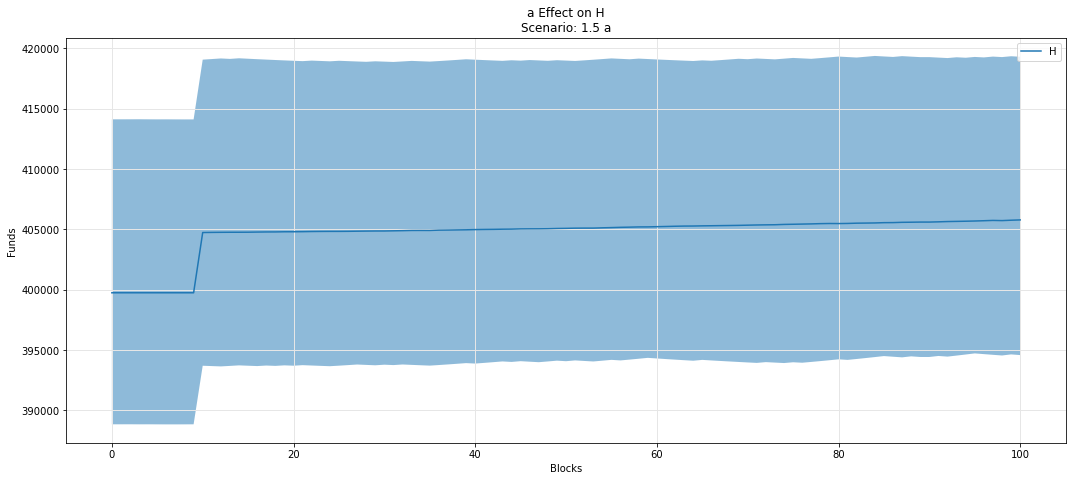

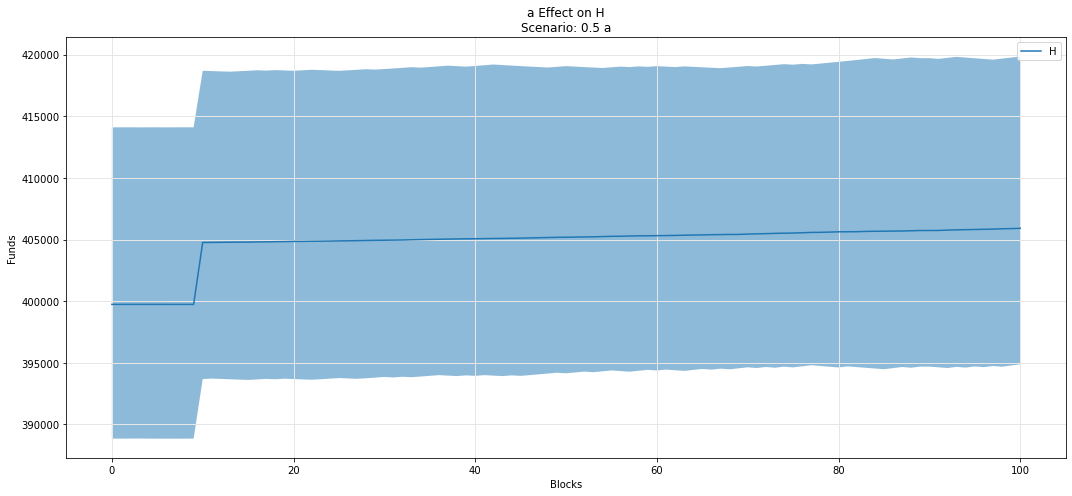

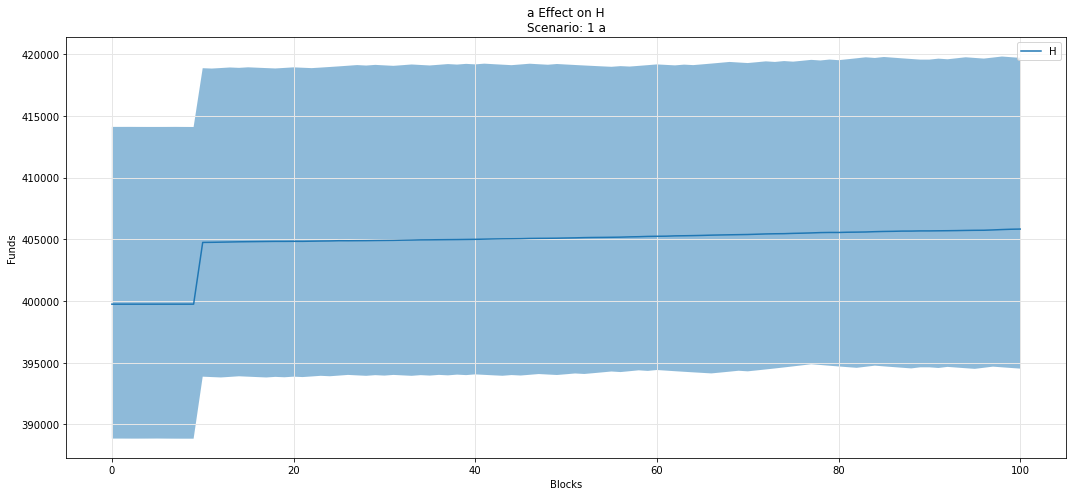

In [49]:
param_fan_plot3(experiments, config_ids, 'a','H')

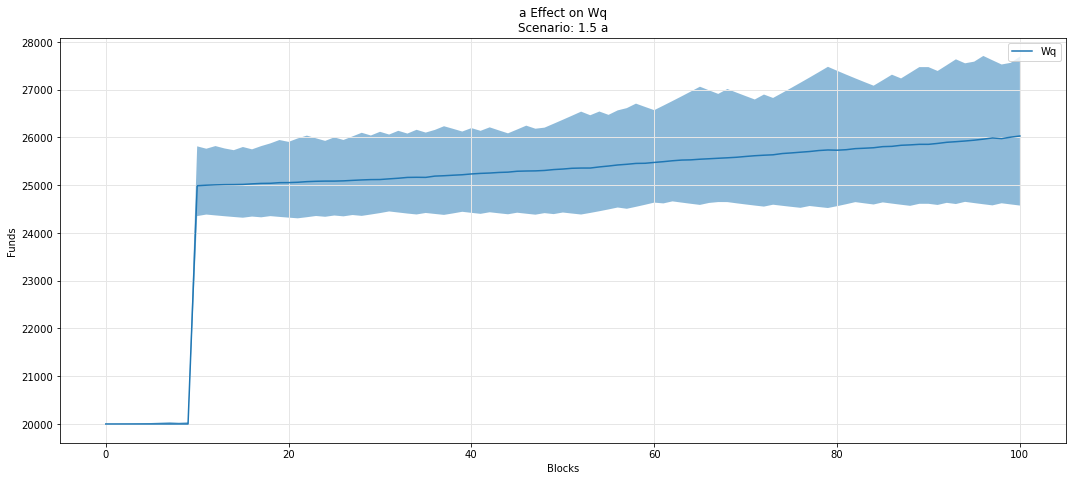

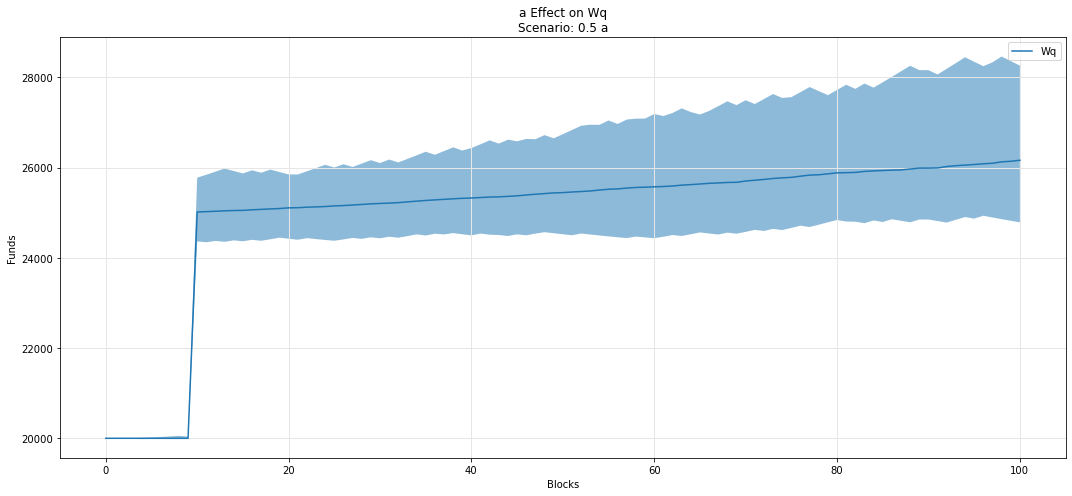

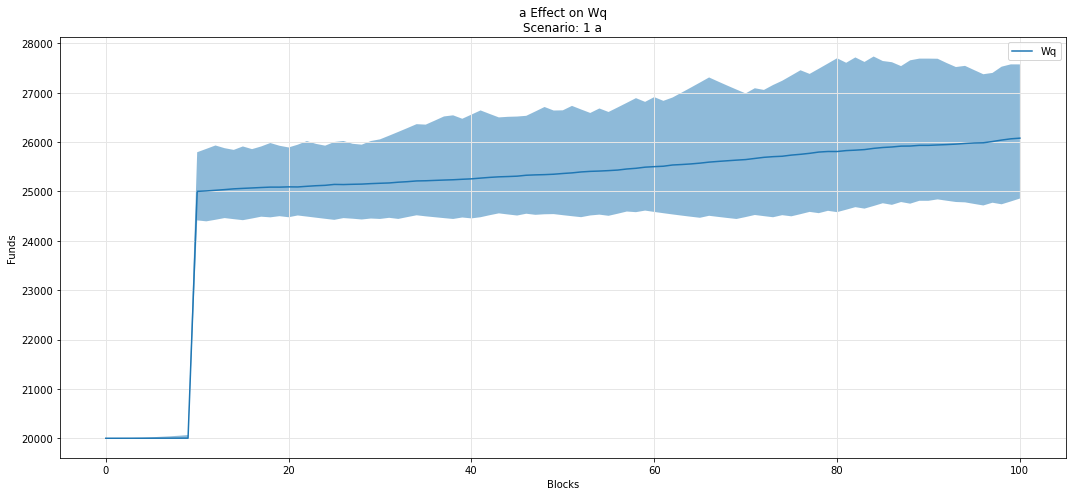

In [50]:
param_fan_plot3(experiments, config_ids, 'a','Wq')

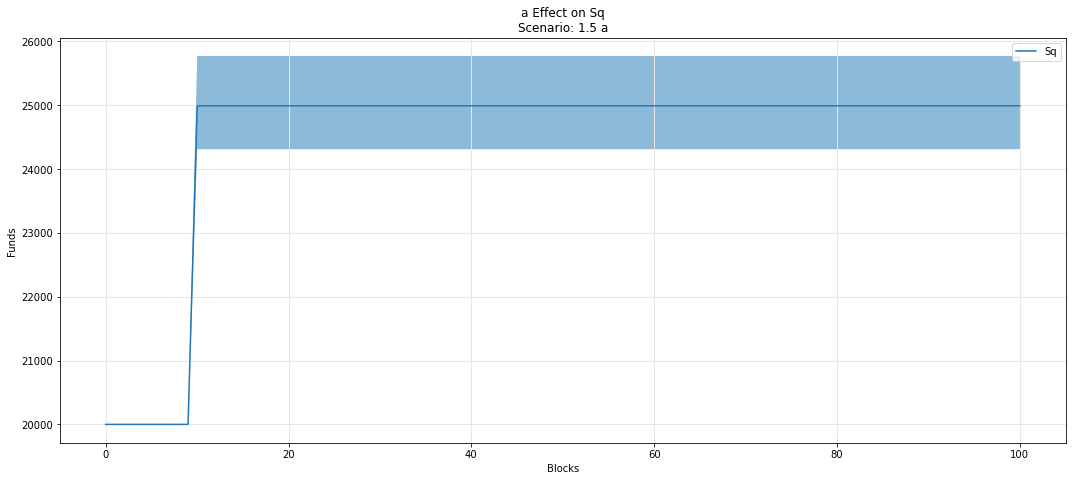

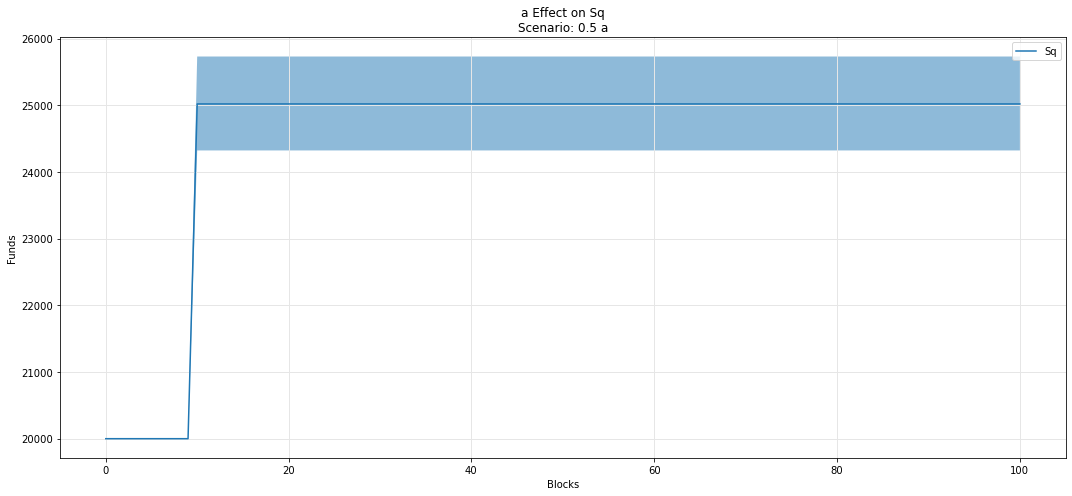

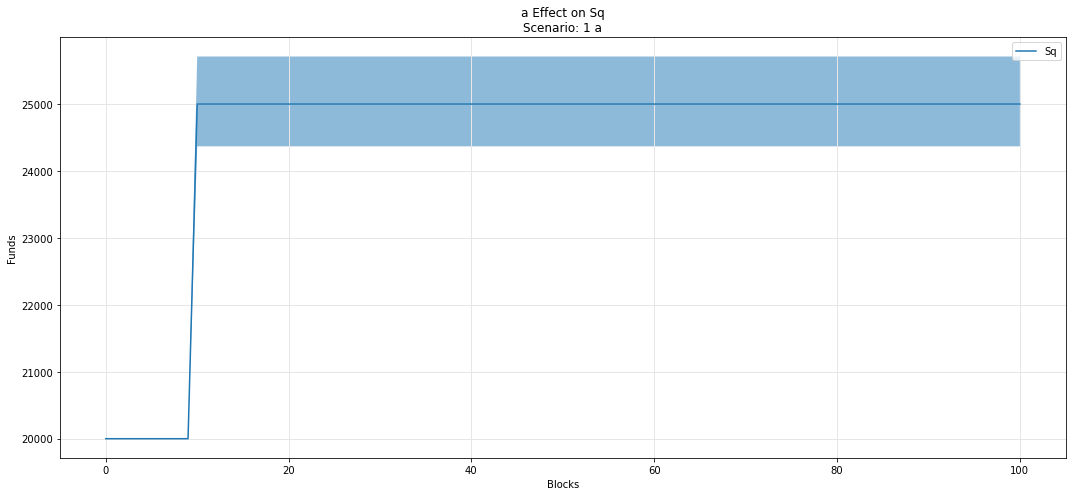

In [51]:
param_fan_plot3(experiments, config_ids, 'a','Sq')

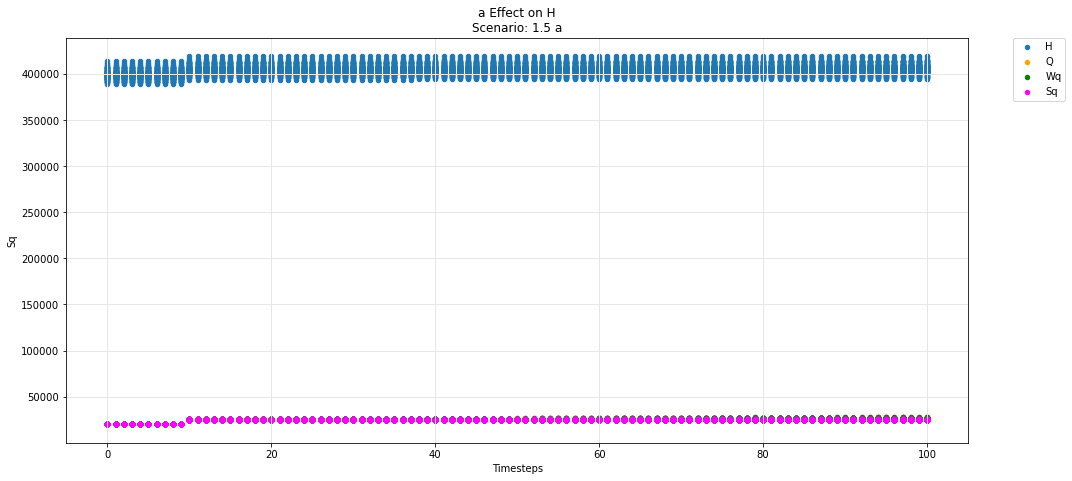

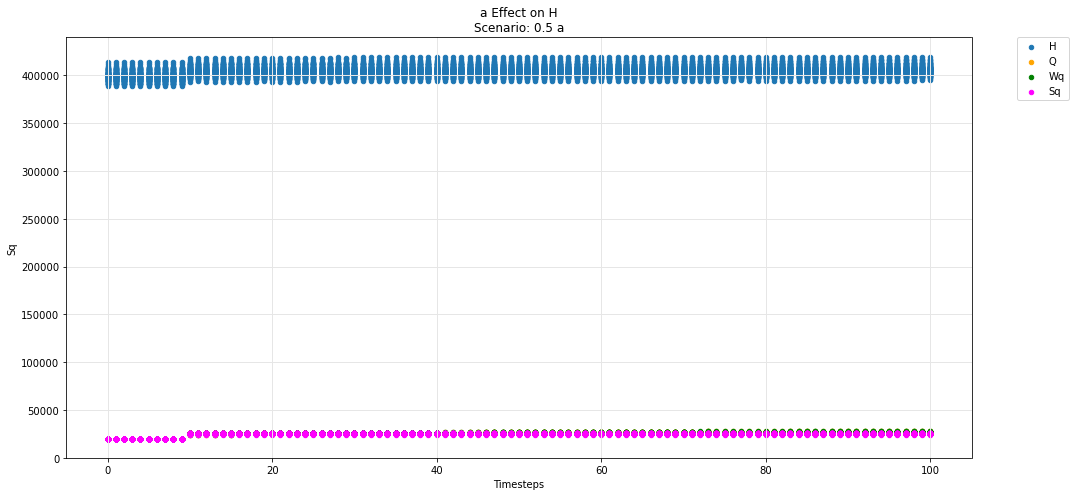

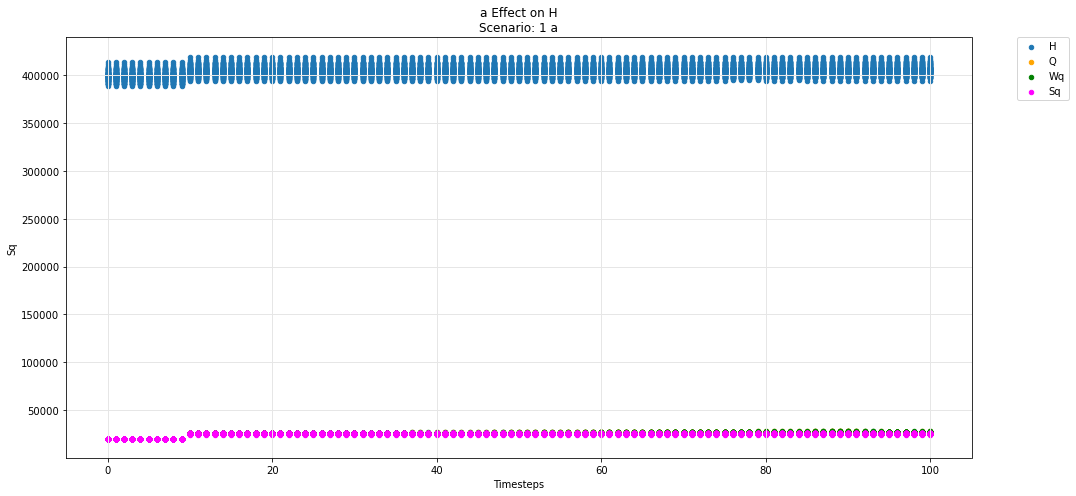

In [52]:
param_test_plot(experiments, config_ids, 'a', 'H', 'Q', 'Wq', 'Sq')

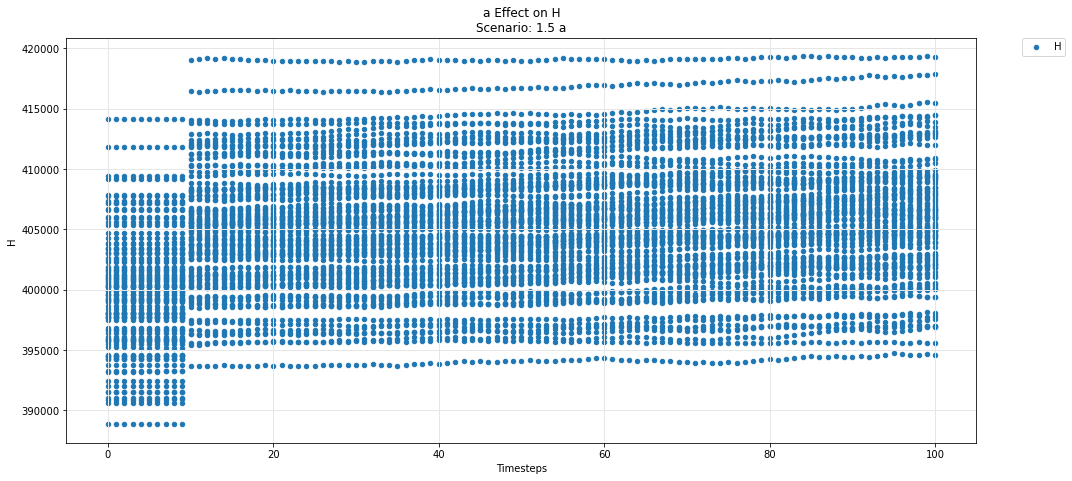

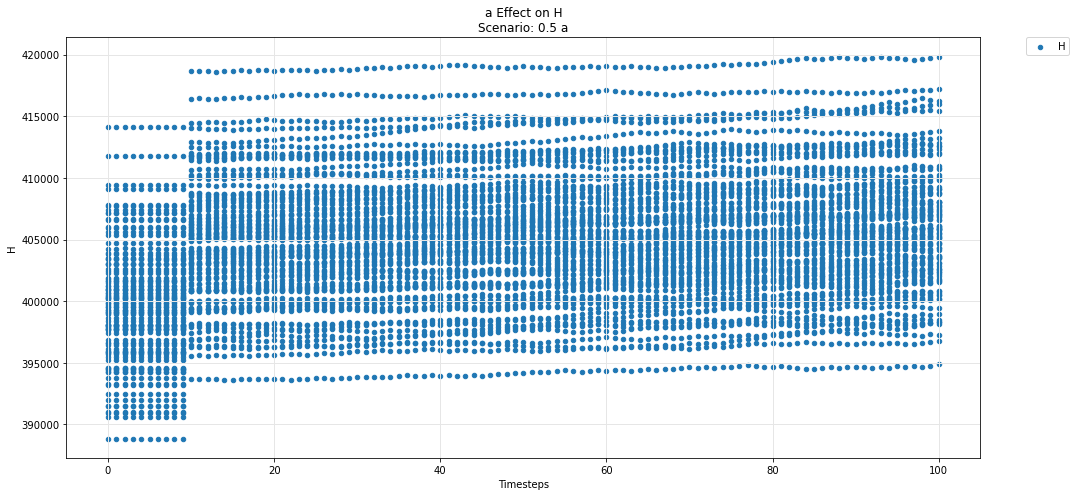

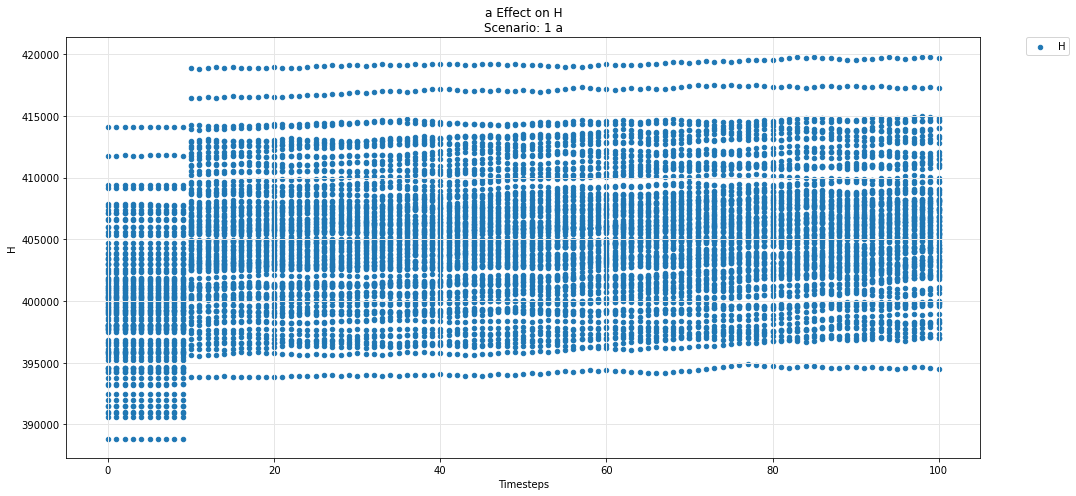

In [53]:
param_test_plot(experiments, config_ids, 'a', 'H')

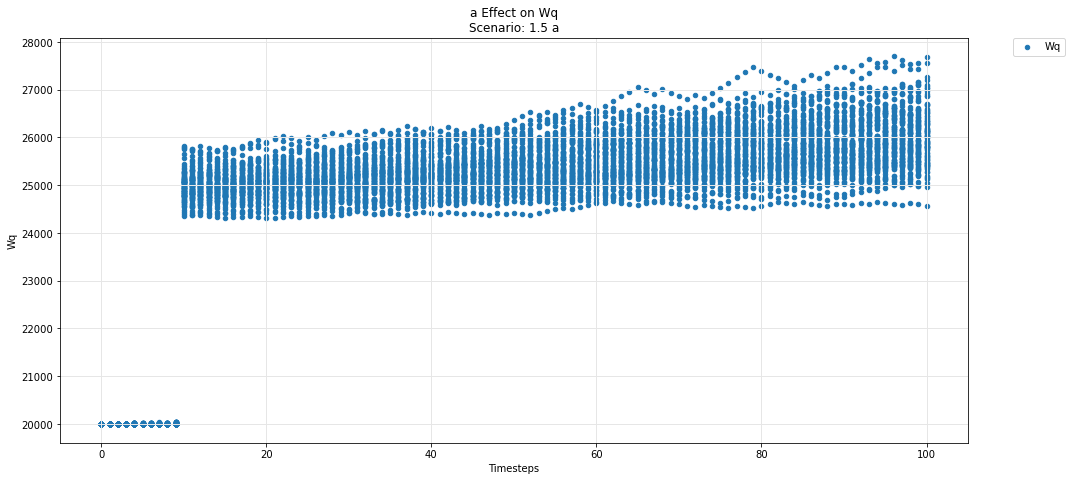

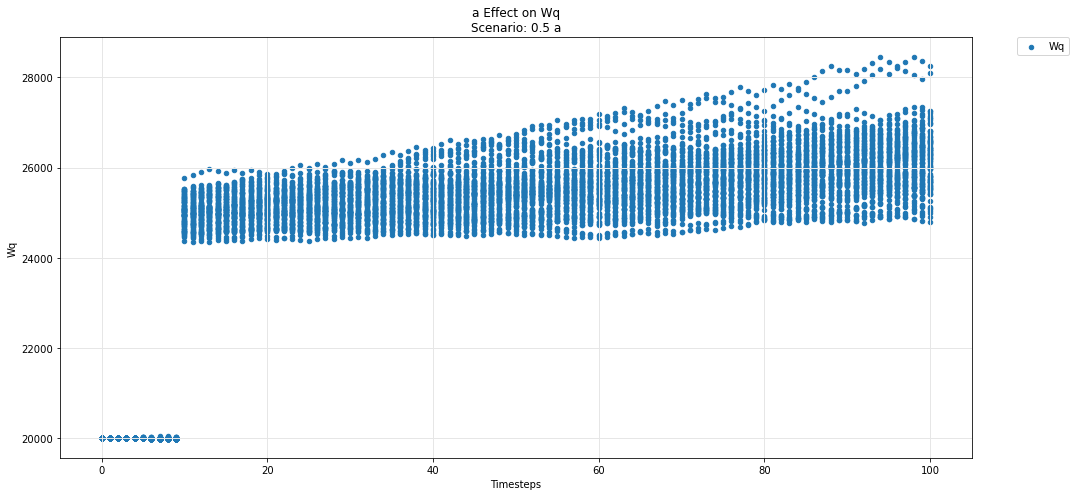

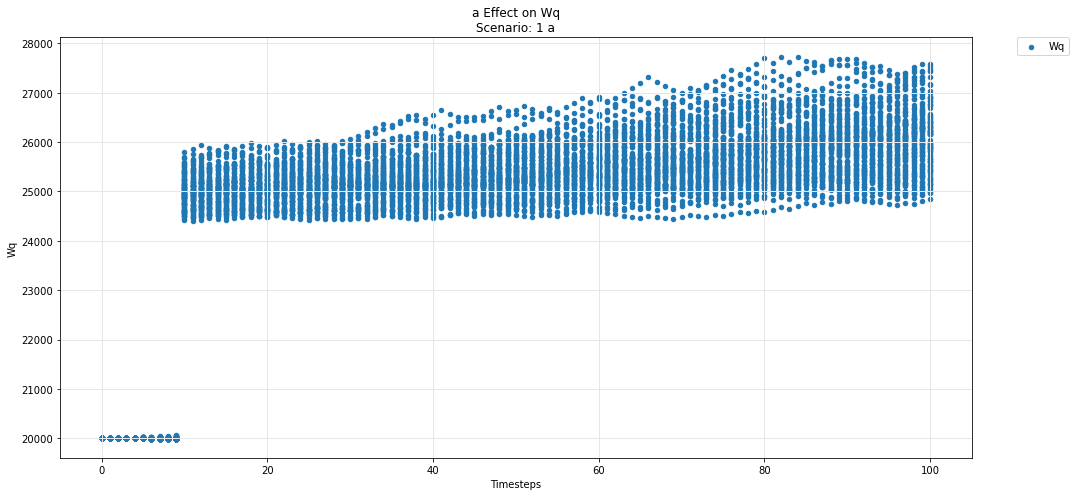

In [54]:
param_test_plot(experiments, config_ids, 'a', 'Wq')

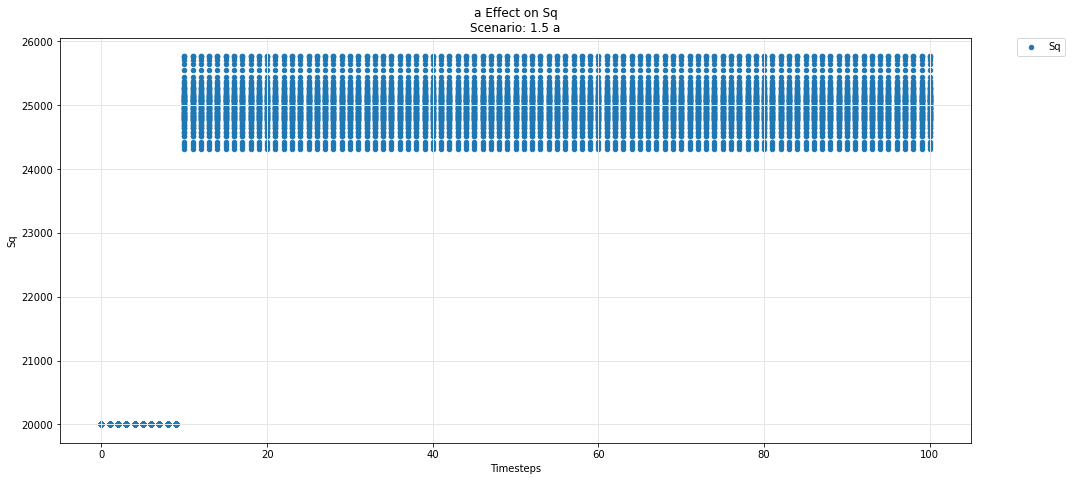

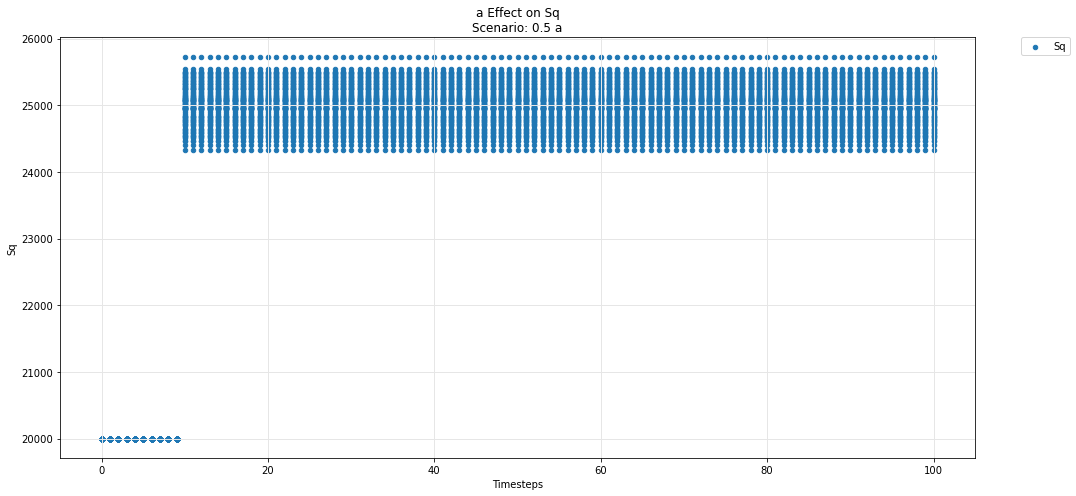

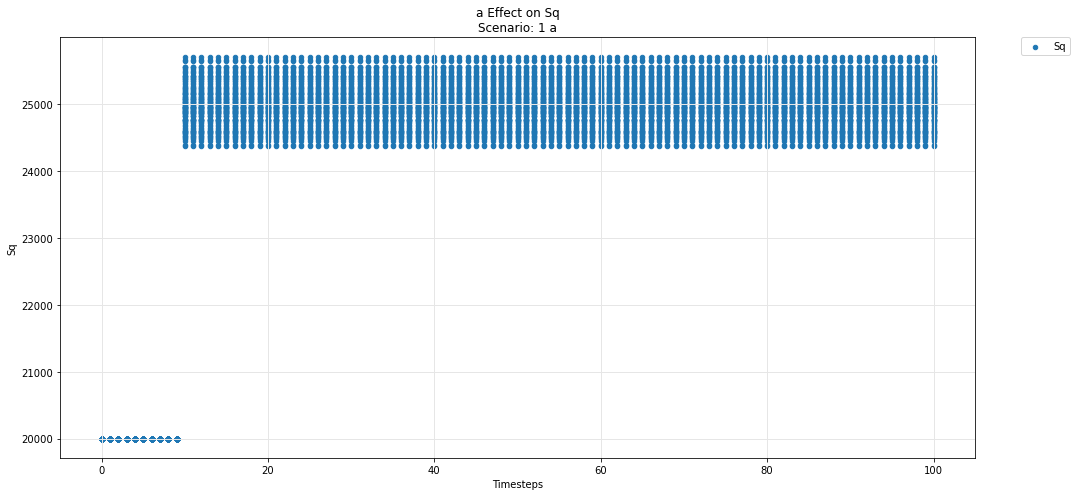

In [55]:
param_test_plot(experiments, config_ids, 'a', 'Sq')

## Hydra -- pool

Movement of the Omnipool variables
- Asset i
- Asset j
- Asset k

over the course of the simulation

In [56]:
def param_pool_simulation_plot(experiments, config_ids, swept_variable, asset_id, y_variable, *args):
    """
    experiments is the simulation result dataframe.
    config_ids is the list configs executed upon in the simulation.
    swept_variable is the key (string) in config_ids that was being tested against.
    asset_id is the asset identifier in the pool (string) e.g i,j,k 
    y_variable is the state_variable (string) to be plotted against default timestep.

    *args for plotting more state_variables (string).
    """
    experiments = experiments.sort_values(by =['subset']).reset_index(drop=True)
    cols = 1
    rows = 1
    cc_idx = 0
    while cc_idx<len(experiments):
        cc = experiments.iloc[cc_idx]['subset']

        cc_label = experiments.iloc[cc_idx]['subset']

        secondary_label = [item['M'][swept_variable] for item in config_ids if  item["subset_id"]== cc_label]
        sub_experiments = experiments[experiments['subset']==cc]
        cc_idx += len(sub_experiments)
        fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))

        df = sub_experiments.copy()

        df_label = y_variable + asset_id
        df[df_label] = df.pool.apply(lambda x: np.array(x.pool[asset_id][y_variable]))
        colors = ['orange', 'g', 'magenta', 'r', 'k' ]
        df = df.groupby('timestep').agg({df_label: ['min', 'mean', 'max']}).reset_index()
        ax = axs
        title = swept_variable + ' Effect on Pool Asset ' + asset_id + '\n' + 'Scenario: ' + str(secondary_label[0]) + ' ' + swept_variable
        # + 'Scenario: ' + str(cc_label)  + ' rules_price'
        ax.set_title(title)
        ax.set_ylabel('Funds')

        df.plot(x='timestep', y=(df_label,'mean'), label=df_label, ax=ax, legend=True, kind ='scatter')
        ax.fill_between(df.timestep, df[(df_label,'min')], df[(df_label,'max')], alpha=0.3)    
        for count, arg in enumerate(args):
            df = sub_experiments.copy()
            
            df_arg_label = arg + asset_id
            df[df_arg_label] = df.pool.apply(lambda x: np.array(x.pool[asset_id][arg]))
            df = df.groupby('timestep').agg({df_arg_label: ['min', 'mean', 'max']}).reset_index()

            df.plot(x='timestep', y=(df_arg_label,'mean'), label=df_arg_label, ax=ax, legend=True, color = colors[count], kind ='scatter')
            ax.fill_between(df.timestep, df[(df_arg_label,'min')], df[(df_arg_label,'max')], alpha=0.3)    

        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
            
    fig.tight_layout(rect=[0, 0, 1, .97])
    fig.patch.set_alpha(1)
    plt.close()
    return display(fig)

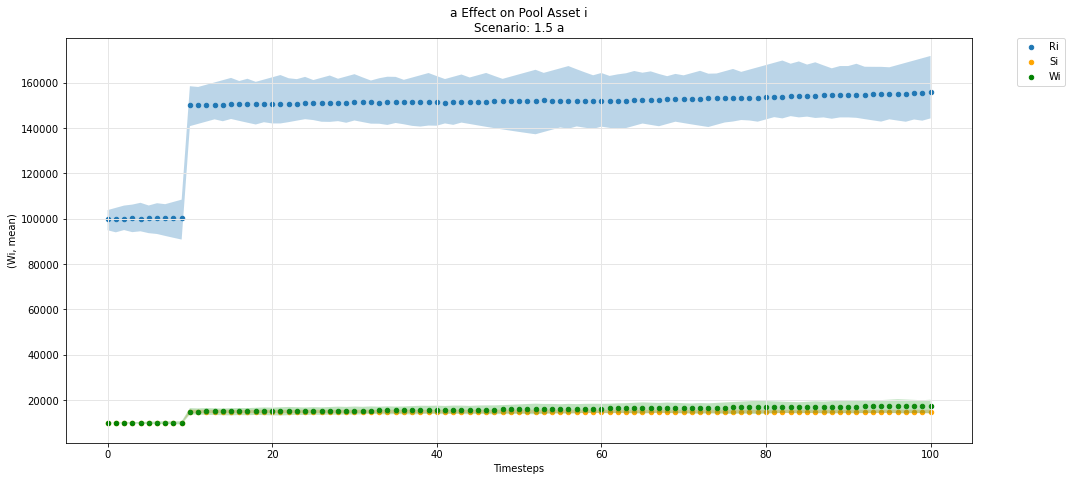

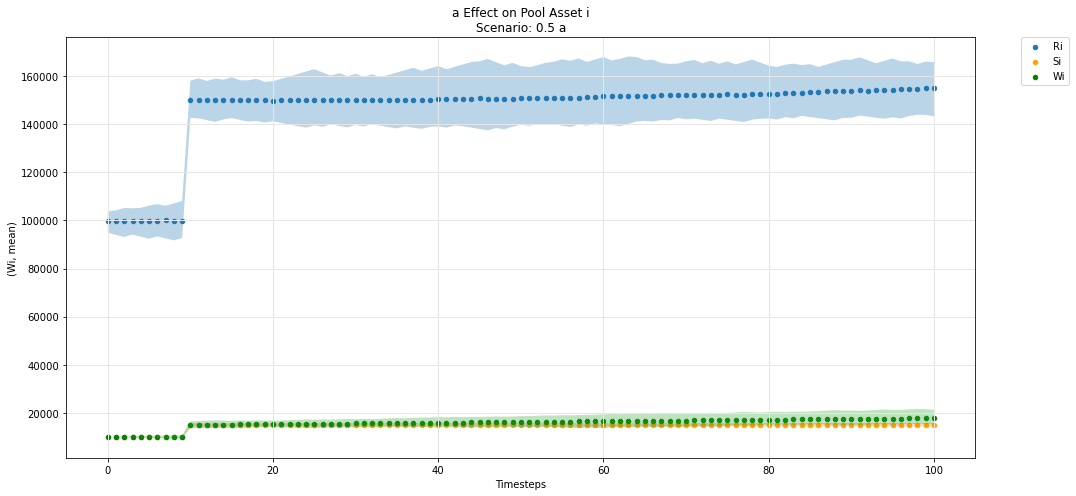

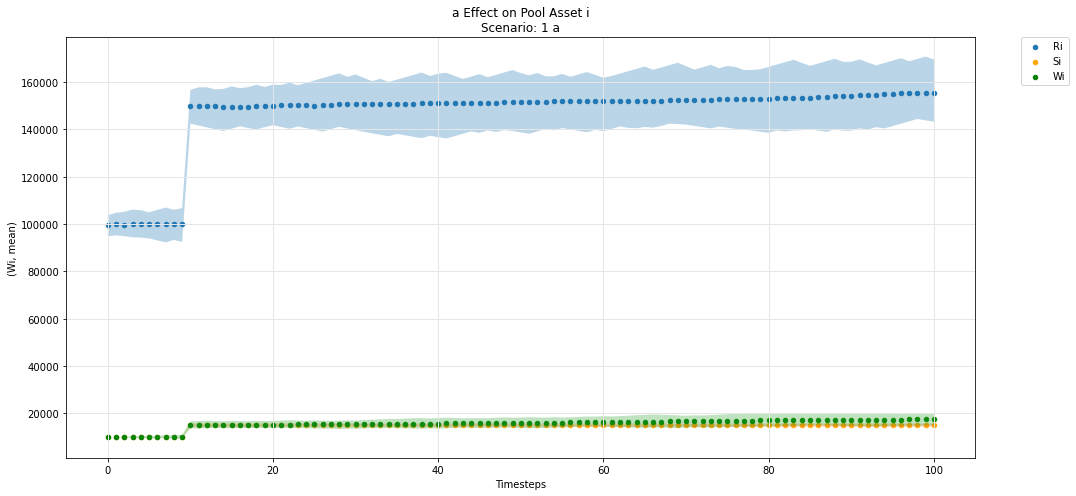

In [57]:
param_pool_simulation_plot(experiments, config_ids, 'a','i', 'R', 'S', 'W')

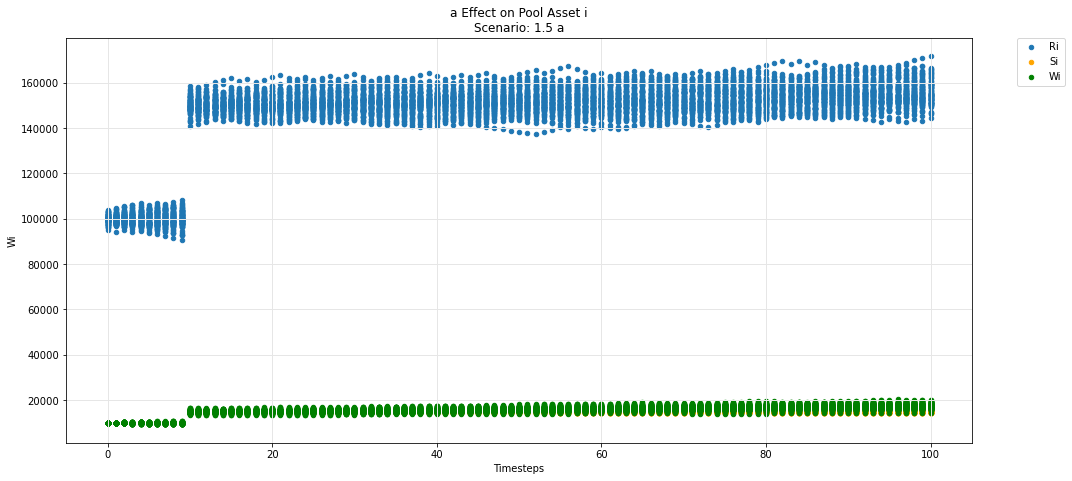

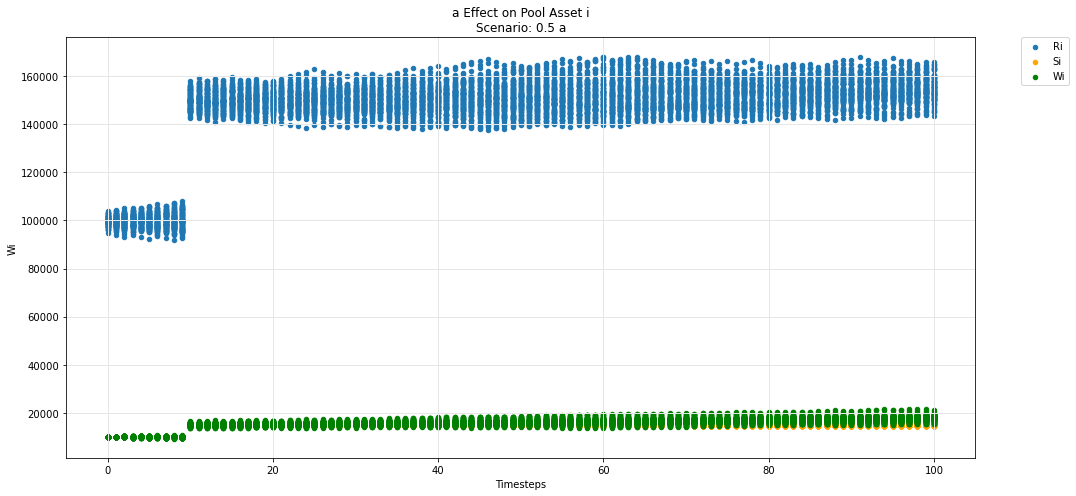

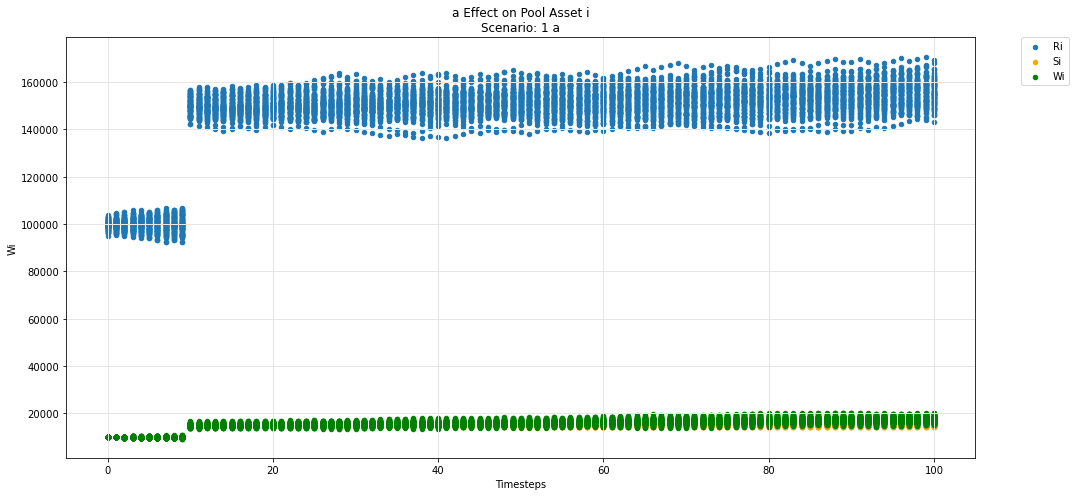

In [58]:
param_pool_plot(experiments, config_ids, 'a','i', 'R', 'S', 'W')

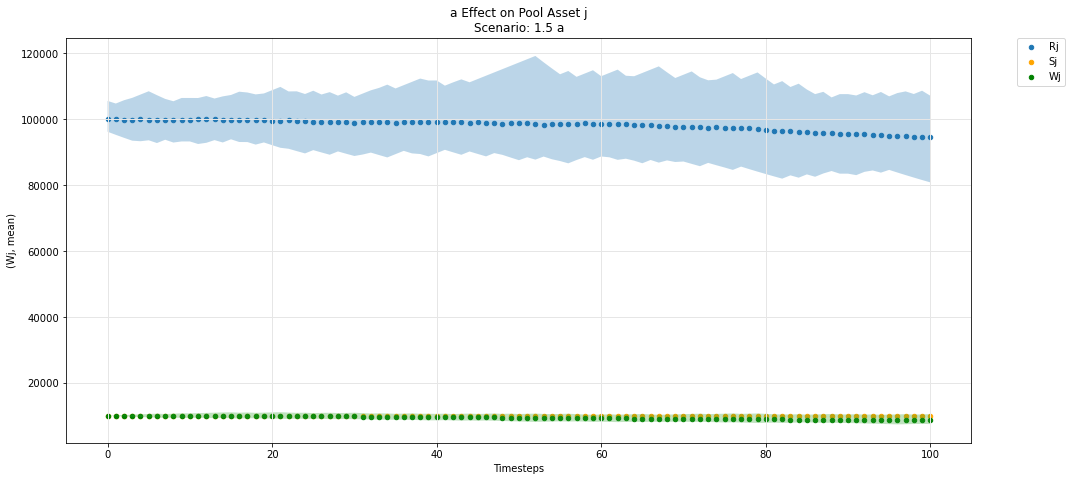

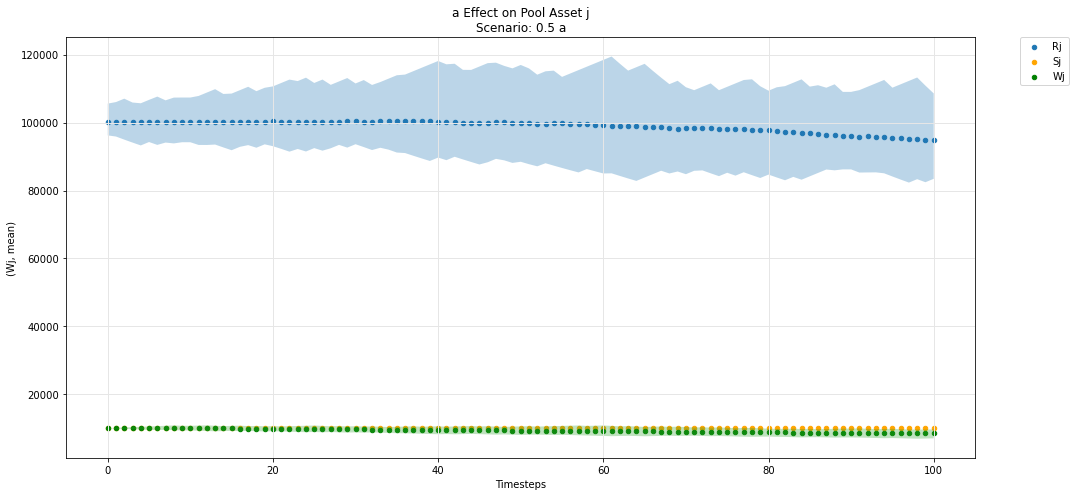

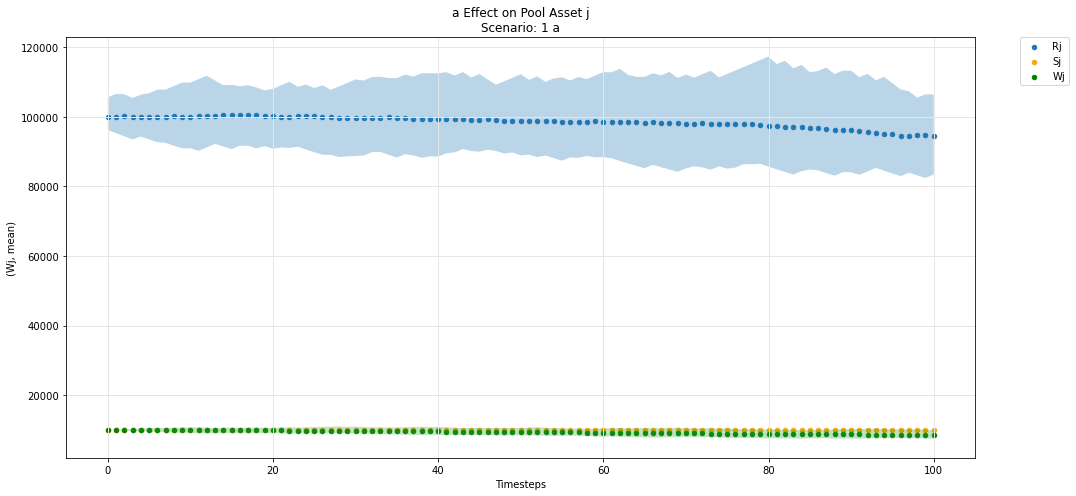

In [59]:
param_pool_simulation_plot(experiments, config_ids, 'a','j', 'R', 'S', 'W')

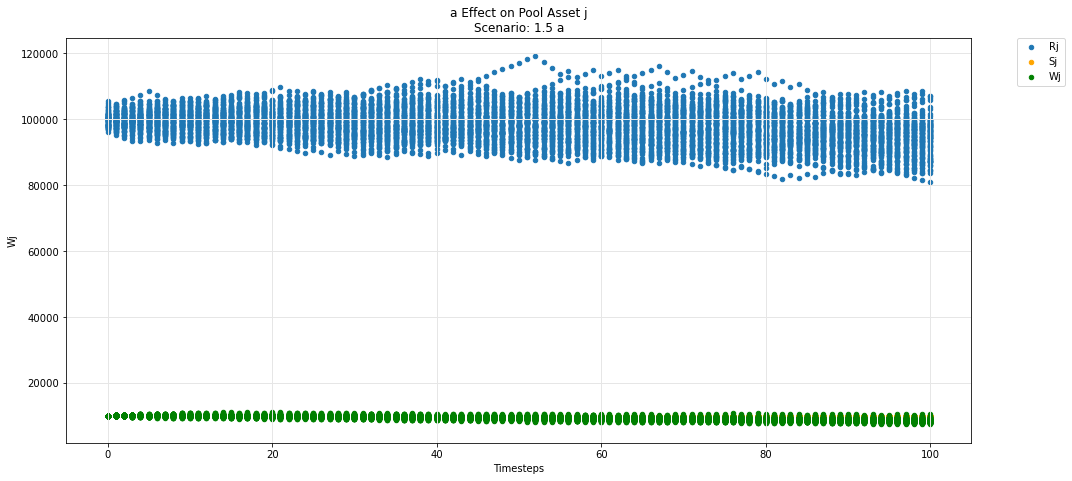

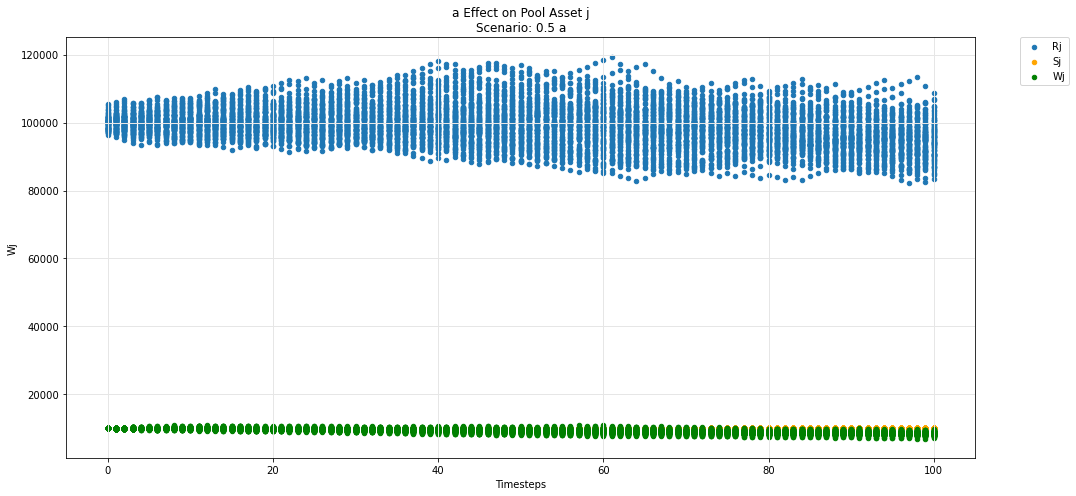

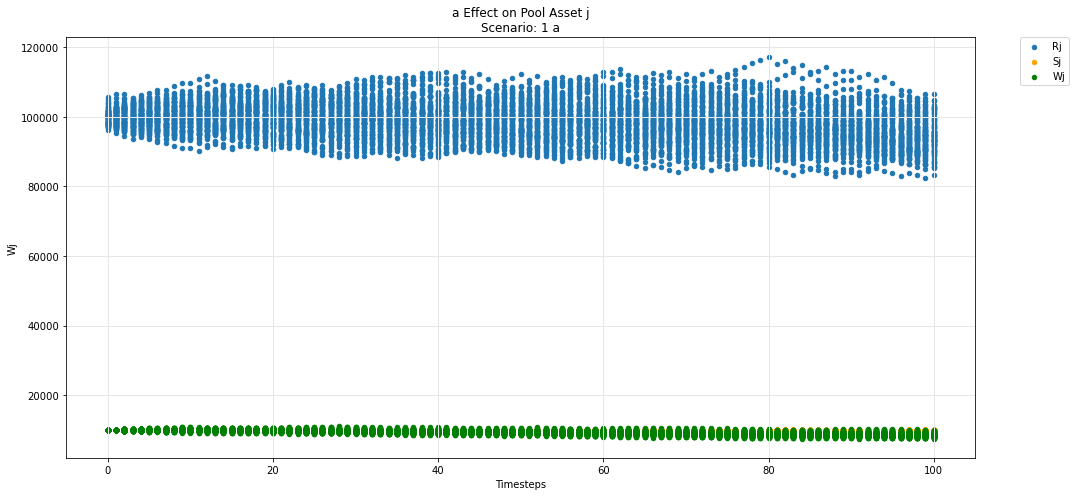

In [60]:
param_pool_plot(experiments, config_ids, 'a','j', 'R', 'S', 'W')

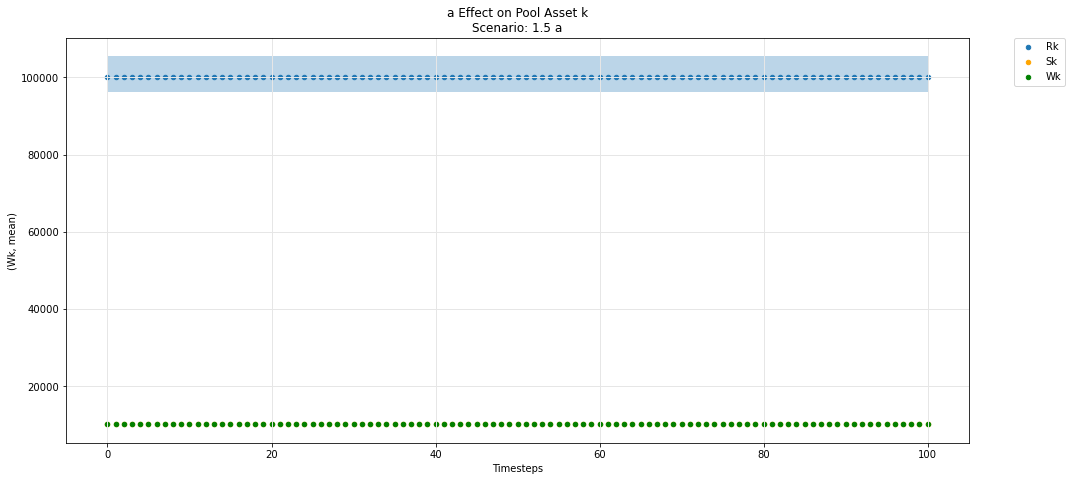

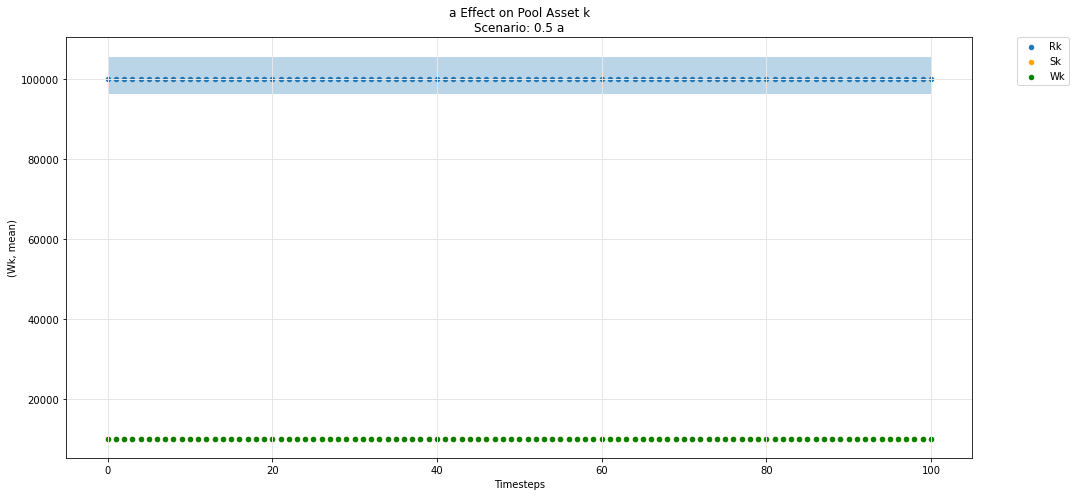

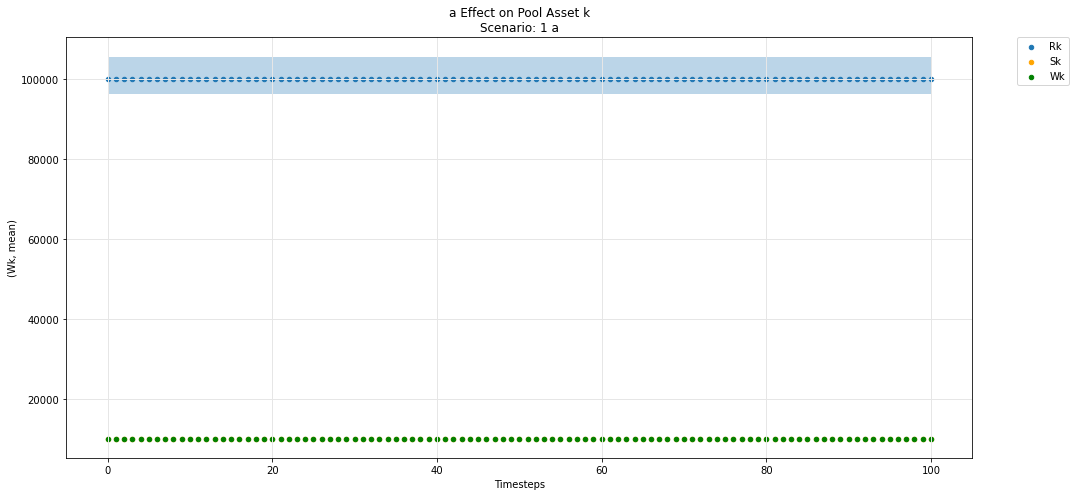

In [61]:
param_pool_simulation_plot(experiments, config_ids, 'a','k', 'R', 'S', 'W')

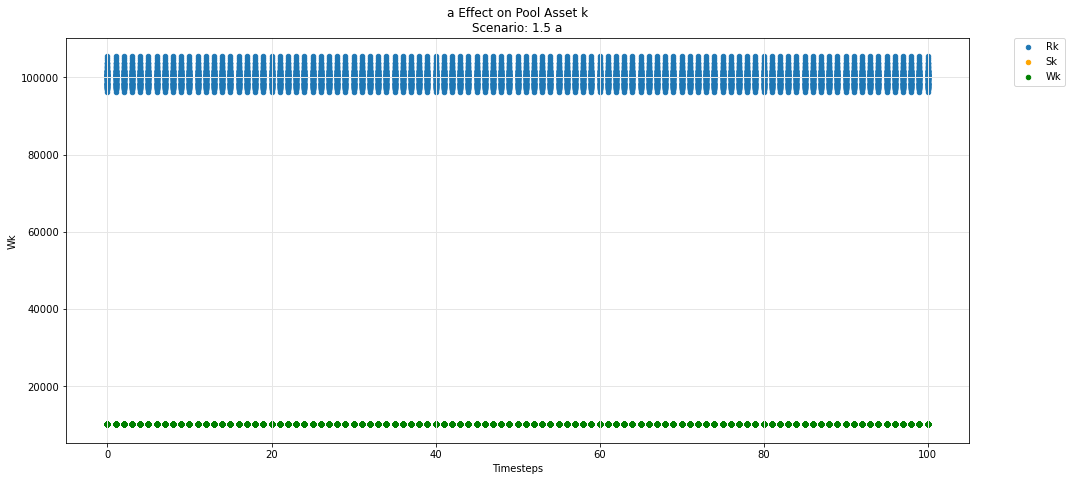

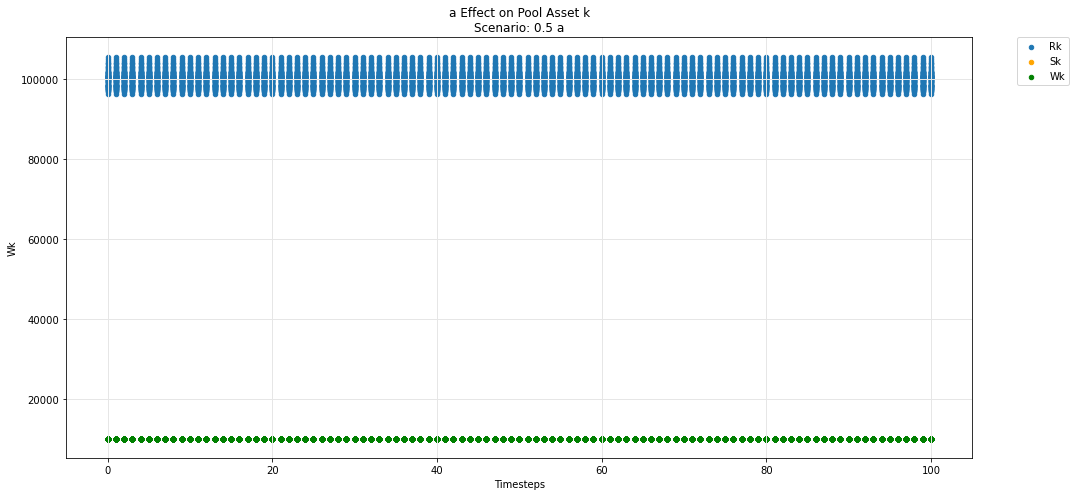

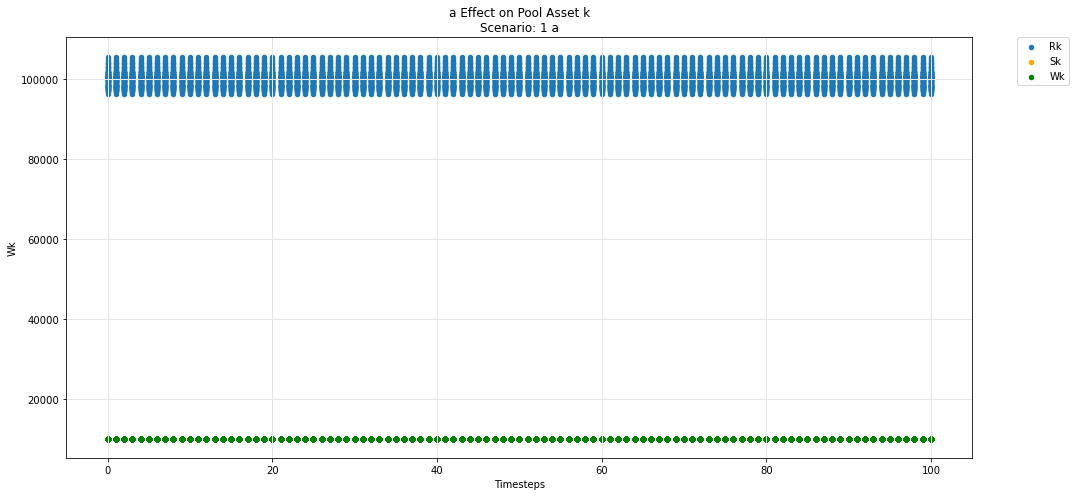

In [62]:
param_pool_plot(experiments, config_ids, 'a','k', 'R', 'S', 'W')

In [63]:
def param_pool_plot(experiments, config_ids, swept_variable, asset_id, y_variable, *args):
    """
    experiments is the simulation result dataframe.
    config_ids is the list configs executed upon in the simulation.
    swept_variable is the key (string) in config_ids that was being tested against.
    asset_id is the asset identifier in the pool (string) e.g i,j,k 
    y_variable is the state_variable (string) to be plotted against default timestep.

    *args for plotting more state_variables (string).
    """
    experiments = experiments.sort_values(by =['subset']).reset_index(drop=True)
    cols = 1
    rows = 1
    cc_idx = 0
    while cc_idx<len(experiments):
        cc = experiments.iloc[cc_idx]['subset']

        cc_label = experiments.iloc[cc_idx]['subset']

        secondary_label = [item['M'][swept_variable] for item in config_ids if  item["subset_id"]== cc_label]
        sub_experiments = experiments[experiments['subset']==cc]
        cc_idx += len(sub_experiments)
        fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))

        df = sub_experiments.copy()

        df_label = y_variable + asset_id
        df[df_label] = df.pool.apply(lambda x: np.array(x.pool[asset_id][y_variable]))
        colors = ['orange', 'g', 'magenta', 'r', 'k' ]
        
        ax = axs
        title = swept_variable + ' Effect on Pool Asset ' + asset_id + '\n' + 'Scenario: ' + str(secondary_label[0]) + ' ' + swept_variable
        # + 'Scenario: ' + str(cc_label)  + ' rules_price'
        ax.set_title(title)
        ax.set_ylabel('Funds')

        df.plot(x='timestep', y=df_label, label=df_label, ax=ax, legend=True, kind ='scatter')

        for count, arg in enumerate(args):
            df_arg_label = arg + asset_id
            df[df_arg_label] = df.pool.apply(lambda x: np.array(x.pool[asset_id][arg]))

            df.plot(x='timestep', y=df_arg_label, label=df_arg_label, ax=ax, legend=True, color = colors[count], kind ='scatter')

        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
            
    fig.tight_layout(rect=[0, 0, 1, .97])
    fig.patch.set_alpha(1)
    plt.close()
    return display(fig)

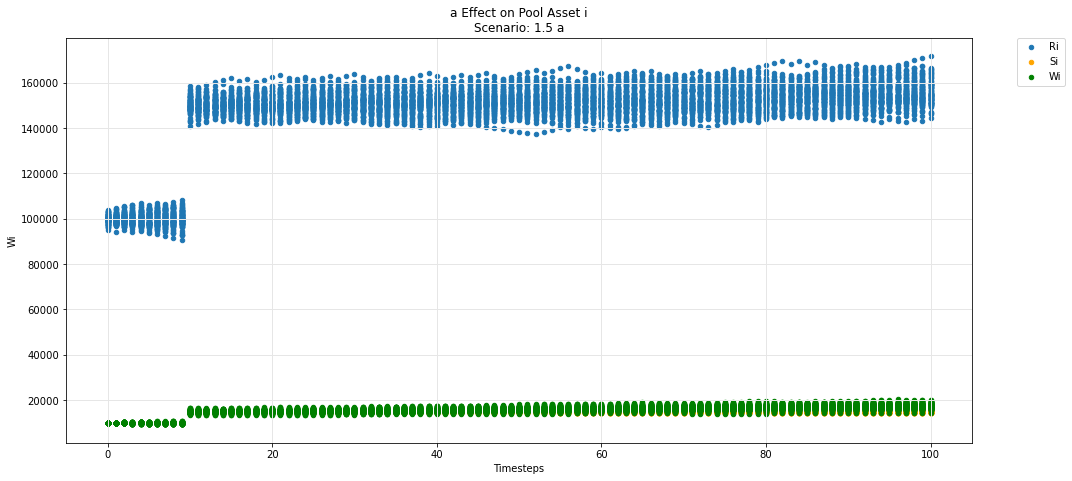

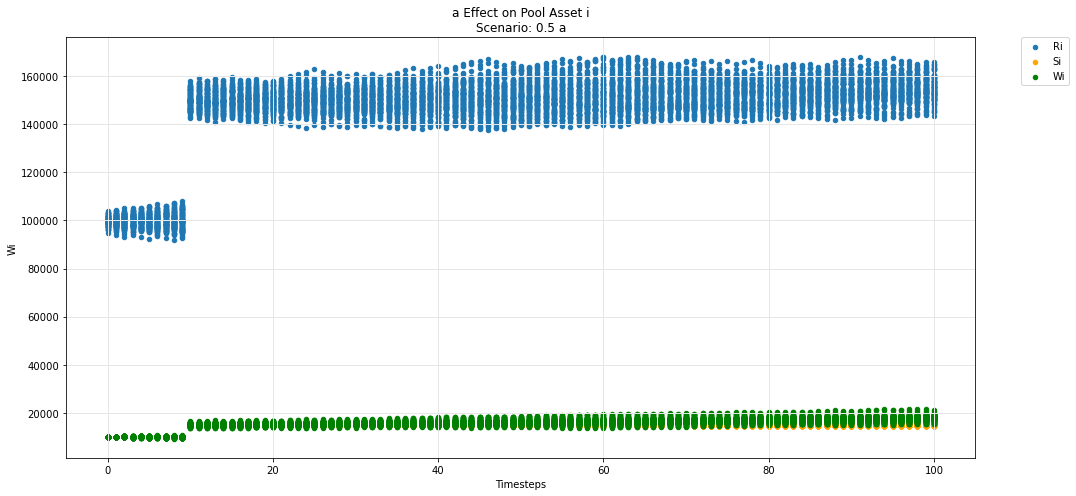

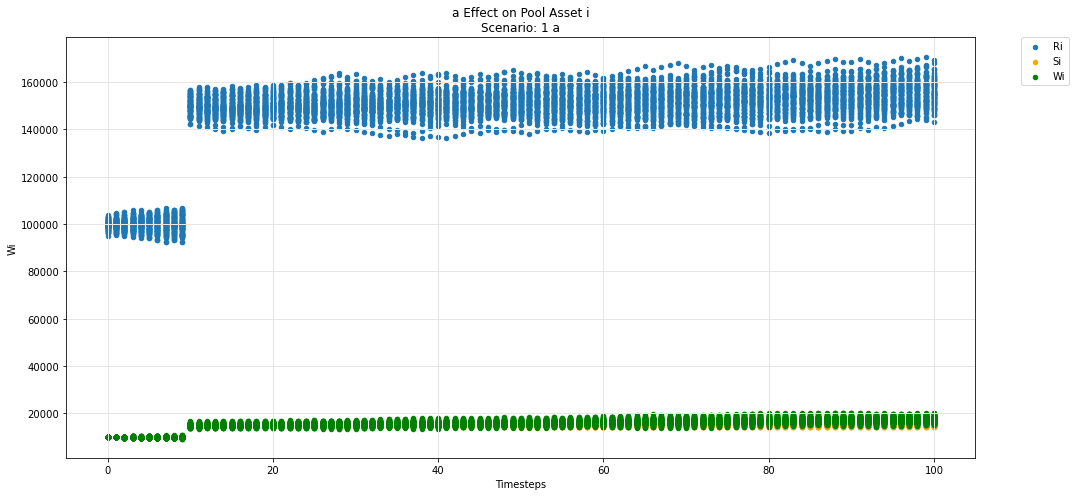

In [64]:
param_pool_plot(experiments, config_ids, 'a','i', 'R', 'S', 'W')

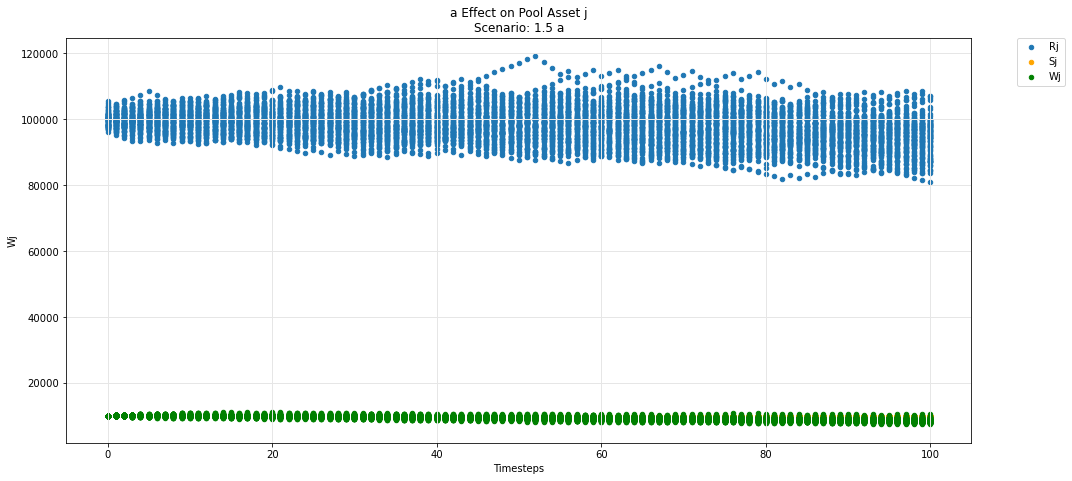

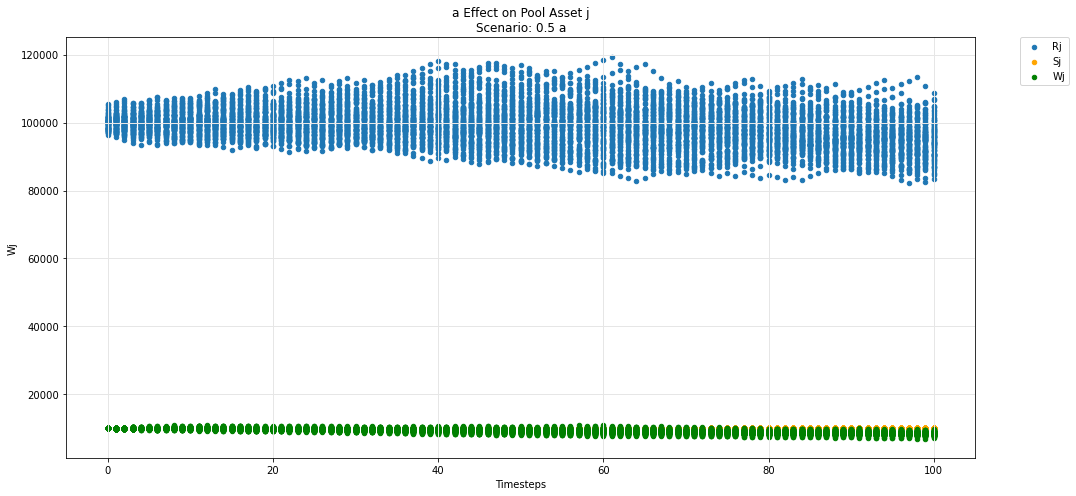

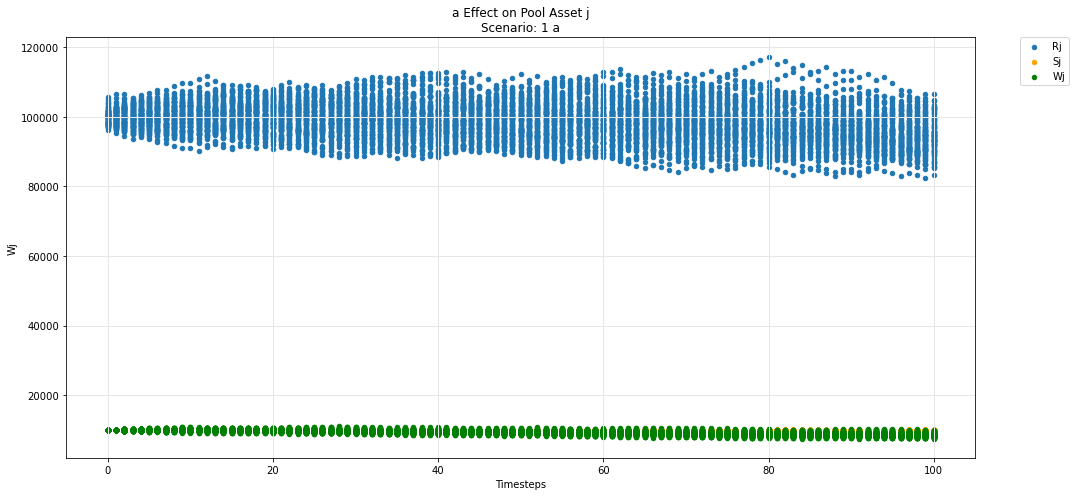

In [65]:
param_pool_plot(experiments, config_ids, 'a','j', 'R', 'S', 'W')

In [66]:
def param_pool_simulation_plot(experiments, config_ids, swept_variable, asset_id, y_variable, *args):
    """
    experiments is the simulation result dataframe.
    config_ids is the list configs executed upon in the simulation.
    swept_variable is the key (string) in config_ids that was being tested against.
    asset_id is the asset identifier in the pool (string) e.g i,j,k 
    y_variable is the state_variable (string) to be plotted against default timestep.

    *args for plotting more state_variables (string).
    """
    experiments = experiments.sort_values(by =['subset']).reset_index(drop=True)
    cols = 1
    rows = 1
    cc_idx = 0
    while cc_idx<len(experiments):
        cc = experiments.iloc[cc_idx]['subset']

        cc_label = experiments.iloc[cc_idx]['subset']

        secondary_label = [item['M'][swept_variable] for item in config_ids if  item["subset_id"]== cc_label]
        sub_experiments = experiments[experiments['subset']==cc]
        cc_idx += len(sub_experiments)
        fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))

        df = sub_experiments.copy()

        df_label = y_variable + asset_id
        df[df_label] = df.pool.apply(lambda x: np.array(x.pool[asset_id][y_variable]))
        colors = ['orange', 'g', 'magenta', 'r', 'k' ]
        df = df.groupby('timestep').agg({df_label: ['min', 'mean', 'max']}).reset_index()
        ax = axs
        title = swept_variable + ' Effect on Pool Asset ' + asset_id + '\n' + 'Scenario: ' + str(secondary_label[0]) + ' ' + swept_variable
        # + 'Scenario: ' + str(cc_label)  + ' rules_price'
        ax.set_title(title)
        ax.set_ylabel('Funds')

        df.plot(x='timestep', y=(df_label,'mean'), label=df_label, ax=ax, legend=True, kind ='scatter')
        ax.fill_between(df.timestep, df[(df_label,'min')], df[(df_label,'max')], alpha=0.3)    
        for count, arg in enumerate(args):
            df = sub_experiments.copy()
            
            df_arg_label = arg + asset_id
            df[df_arg_label] = df.pool.apply(lambda x: np.array(x.pool[asset_id][arg]))
            df = df.groupby('timestep').agg({df_arg_label: ['min', 'mean', 'max']}).reset_index()

            df.plot(x='timestep', y=(df_arg_label,'mean'), label=df_arg_label, ax=ax, legend=True, color = colors[count], kind ='scatter')
            ax.fill_between(df.timestep, df[(df_arg_label,'min')], df[(df_arg_label,'max')], alpha=0.3)    

        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
            
    fig.tight_layout(rect=[0, 0, 1, .97])
    fig.patch.set_alpha(1)
    plt.close()
    return display(fig)

# Prices

## Uniswap

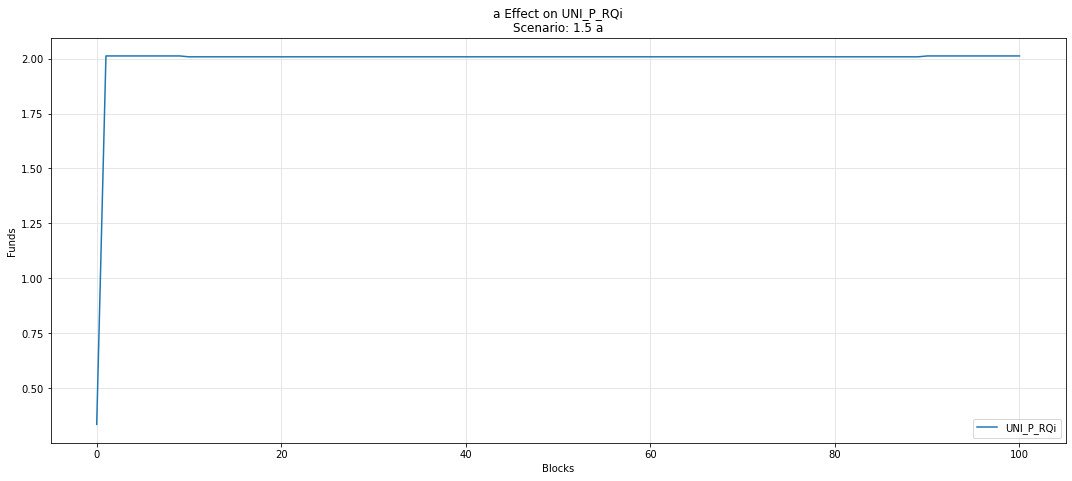

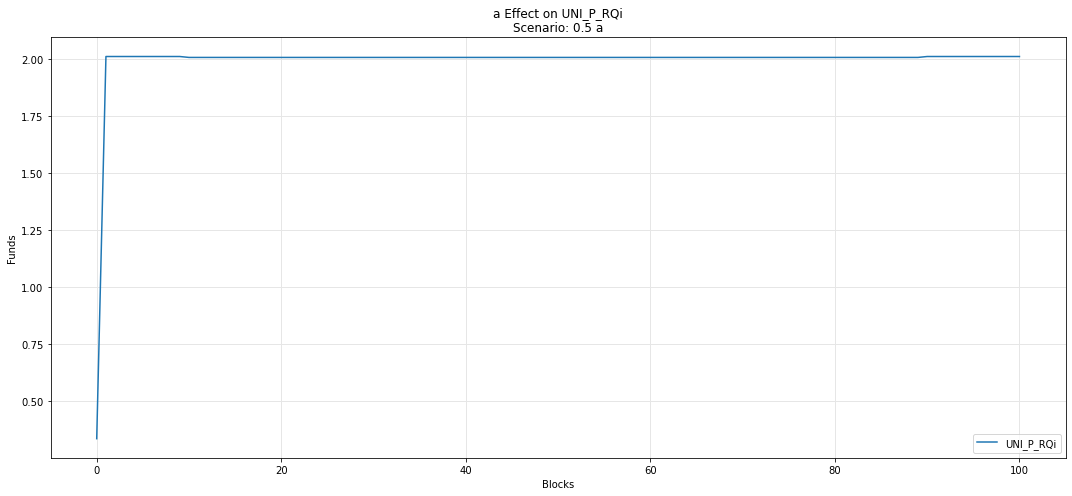

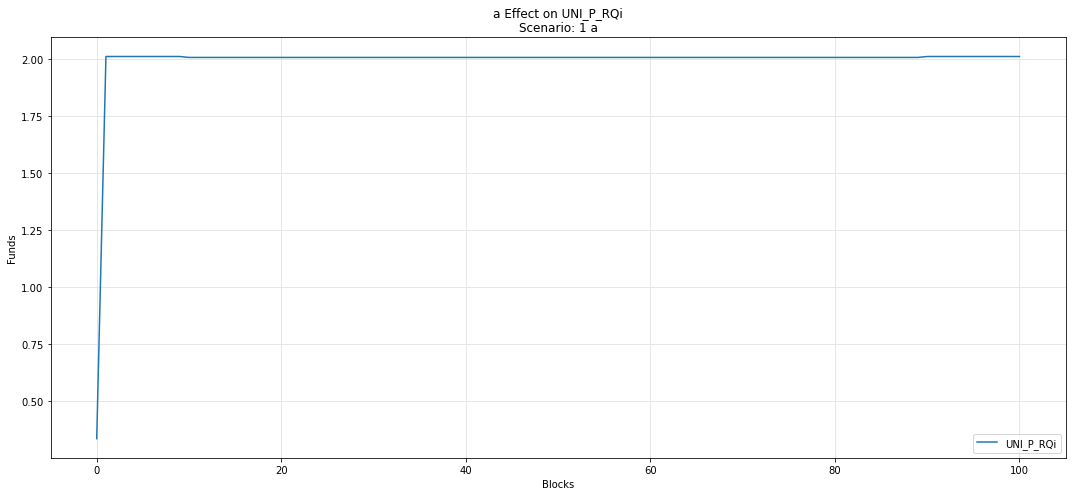

In [67]:
param_fan_plot3(experiments, config_ids, 'a', 'UNI_P_RQi')

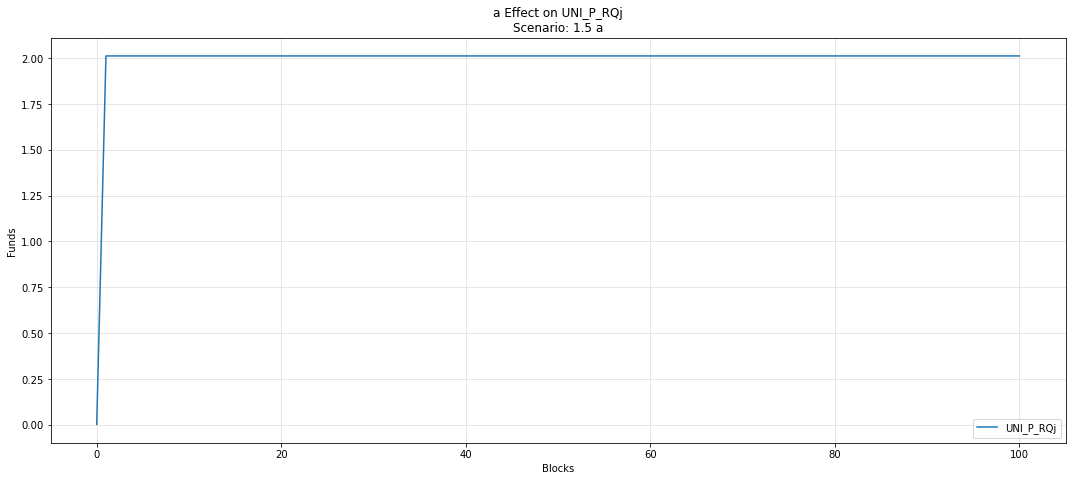

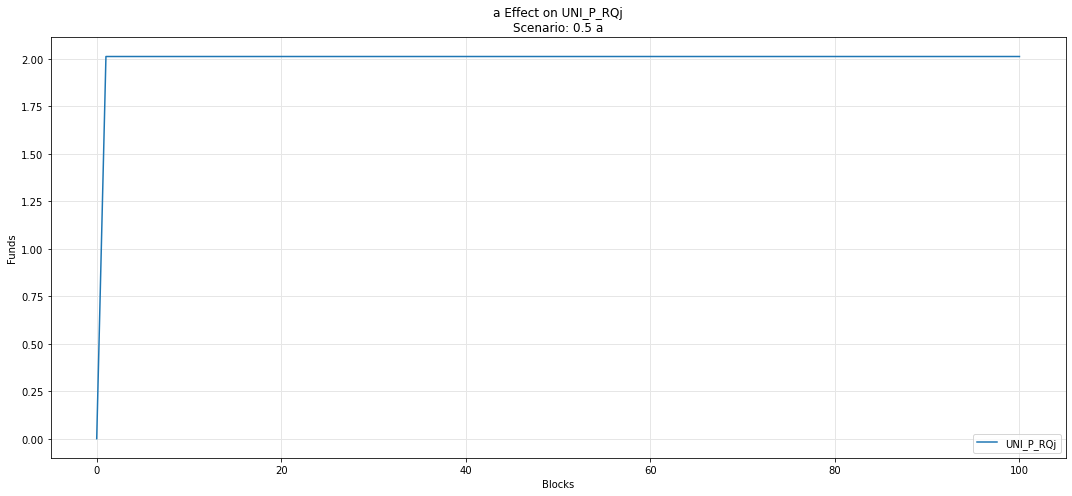

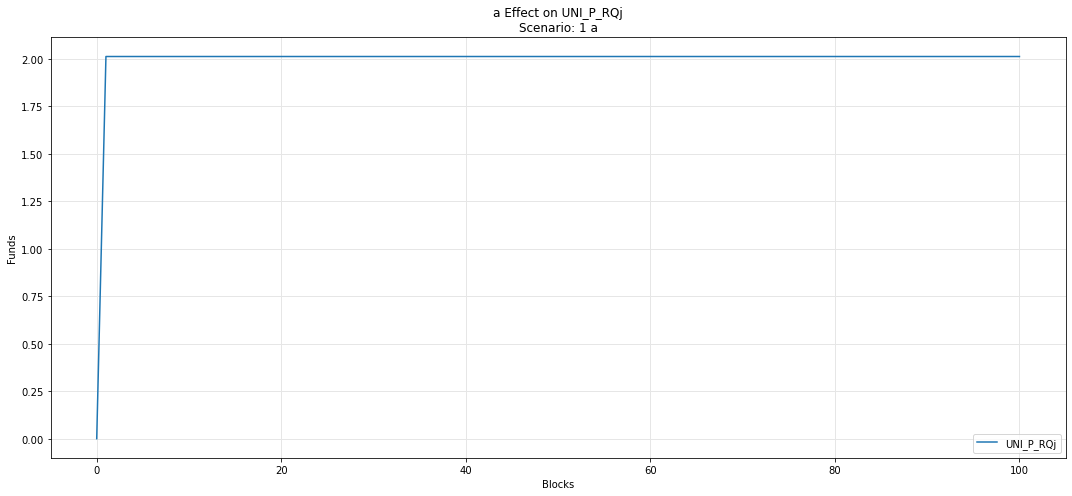

In [68]:
param_fan_plot3(experiments, config_ids, 'a', 'UNI_P_RQj')

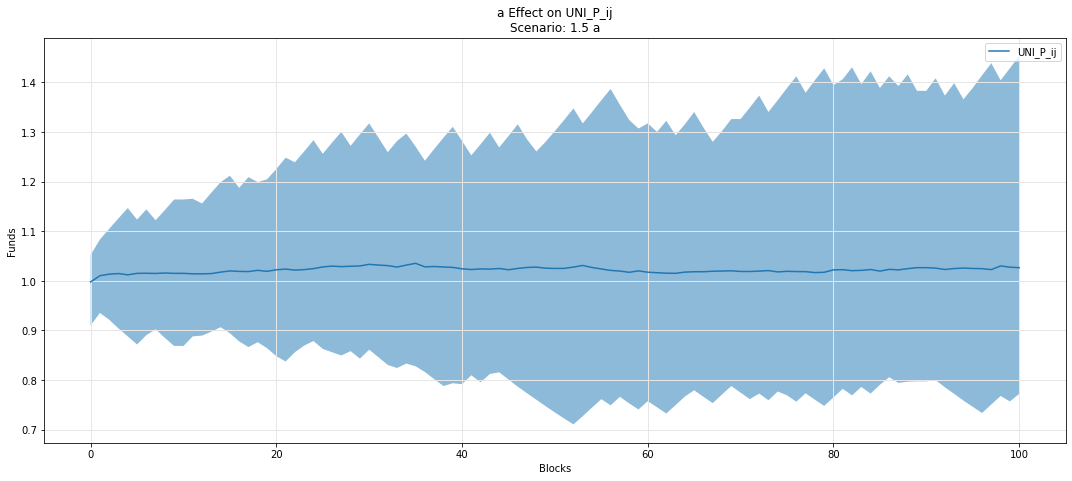

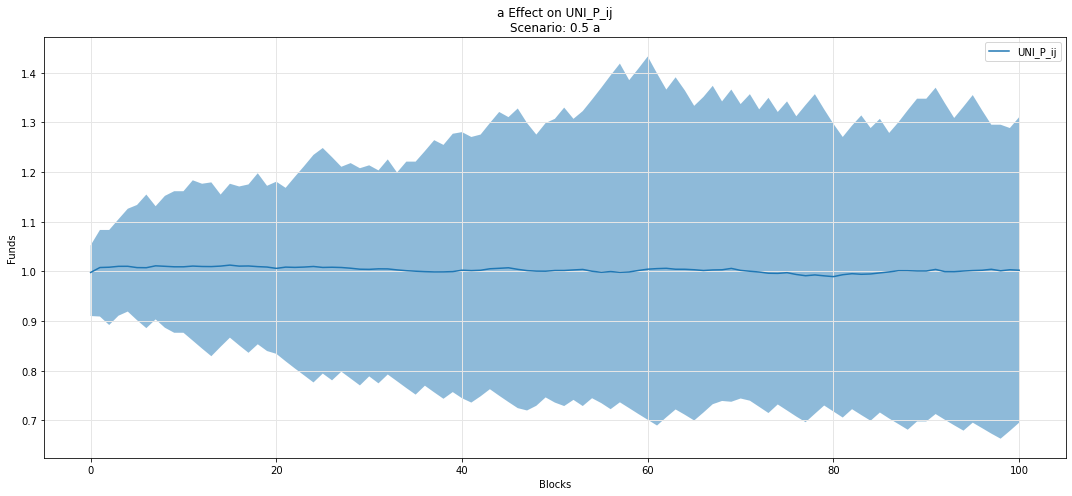

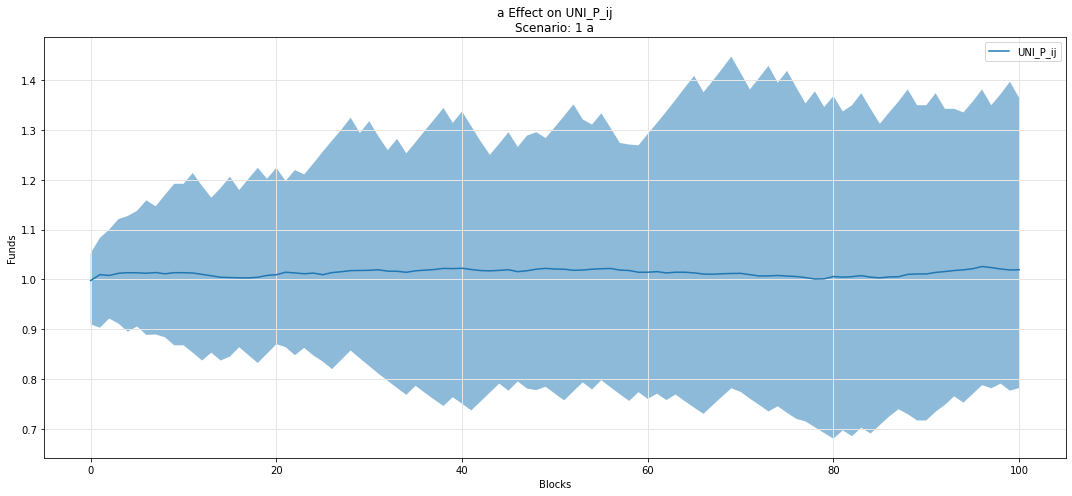

In [69]:
param_fan_plot3(experiments, config_ids, 'a', 'UNI_P_ij')

## Omnipool

## Asset i

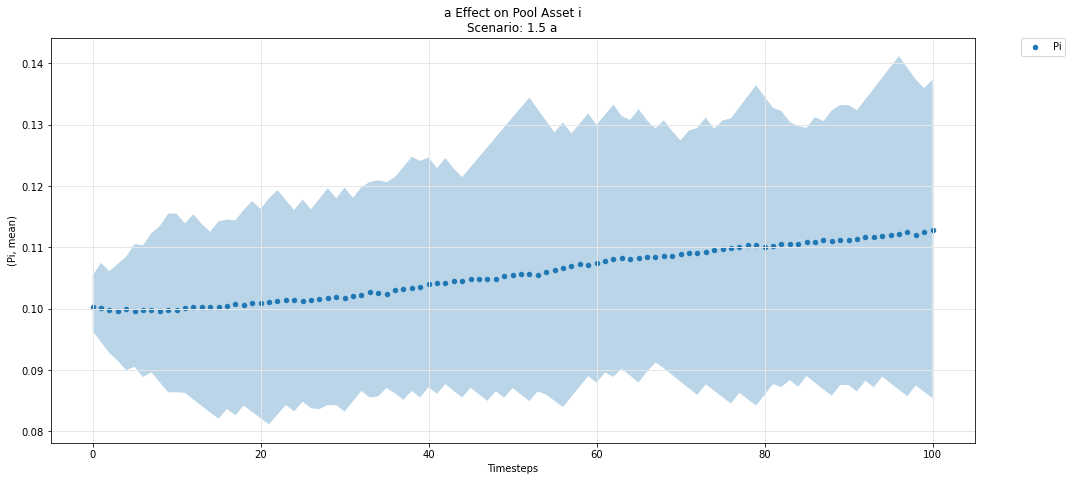

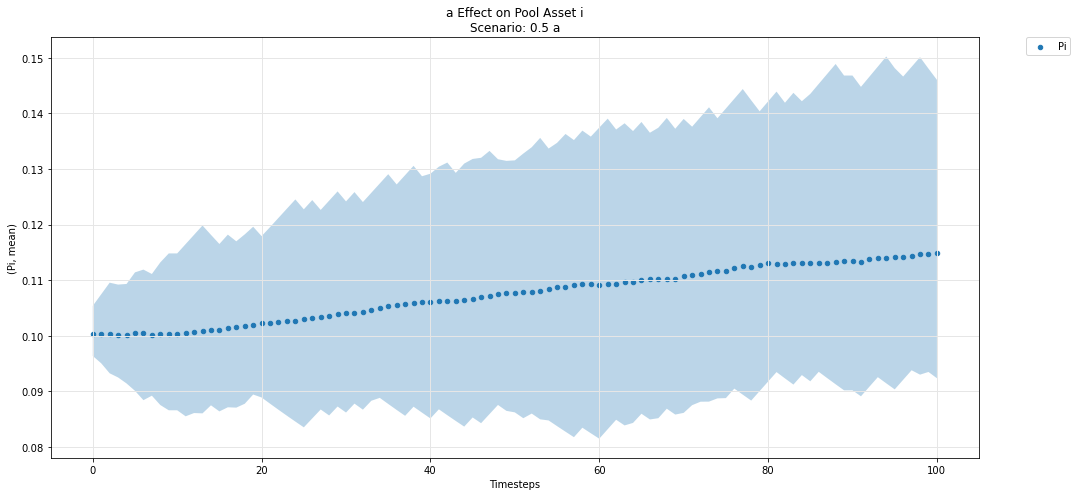

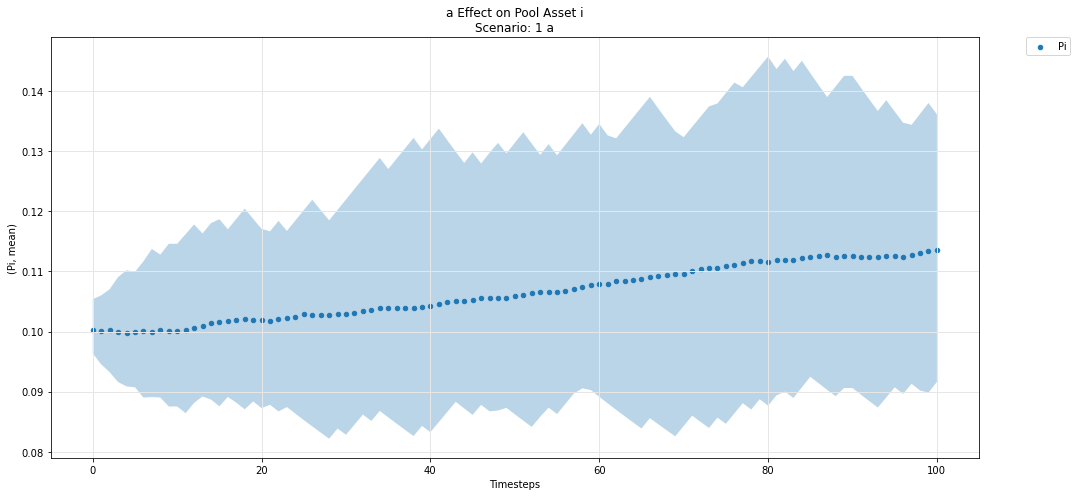

In [70]:
param_pool_simulation_plot(experiments, config_ids, 'a','i','P')

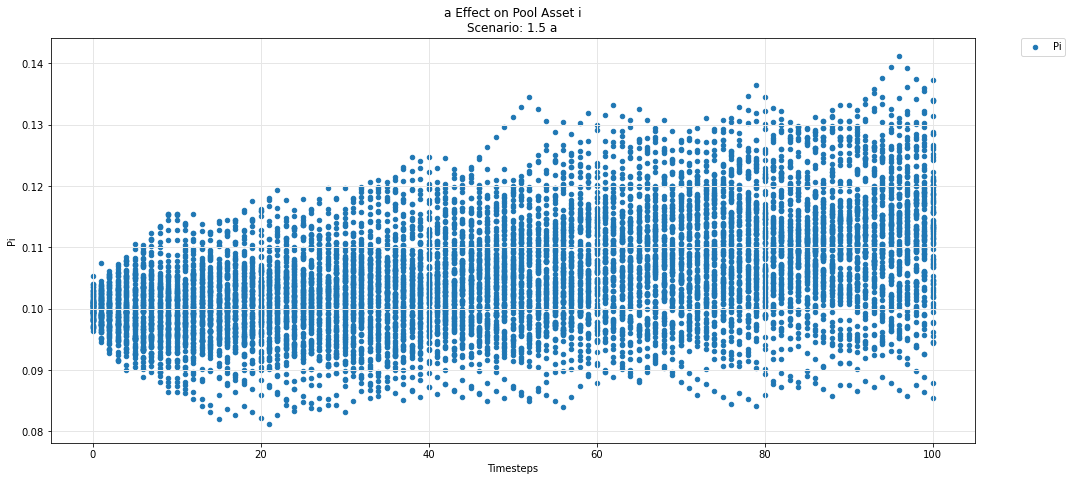

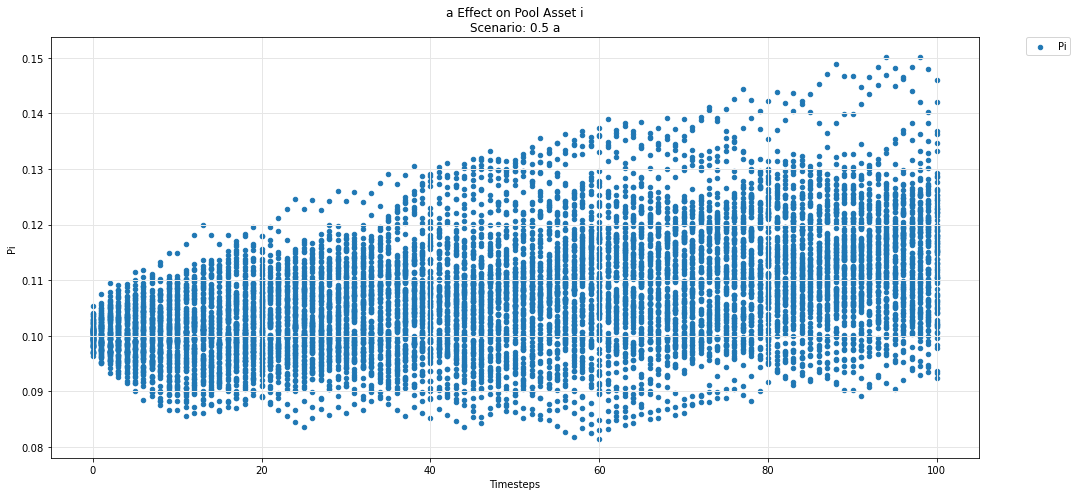

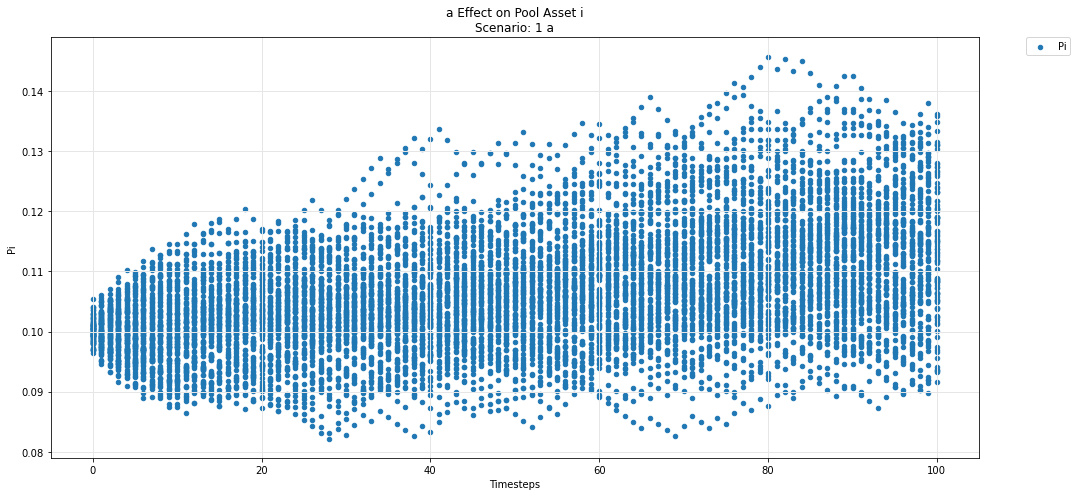

In [71]:
param_pool_plot(experiments, config_ids, 'a','i','P')

## Asset j

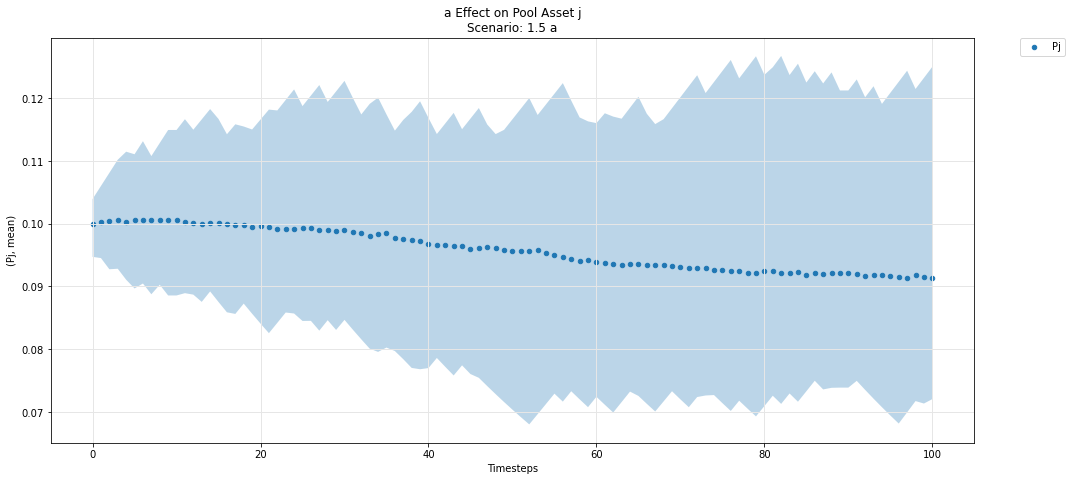

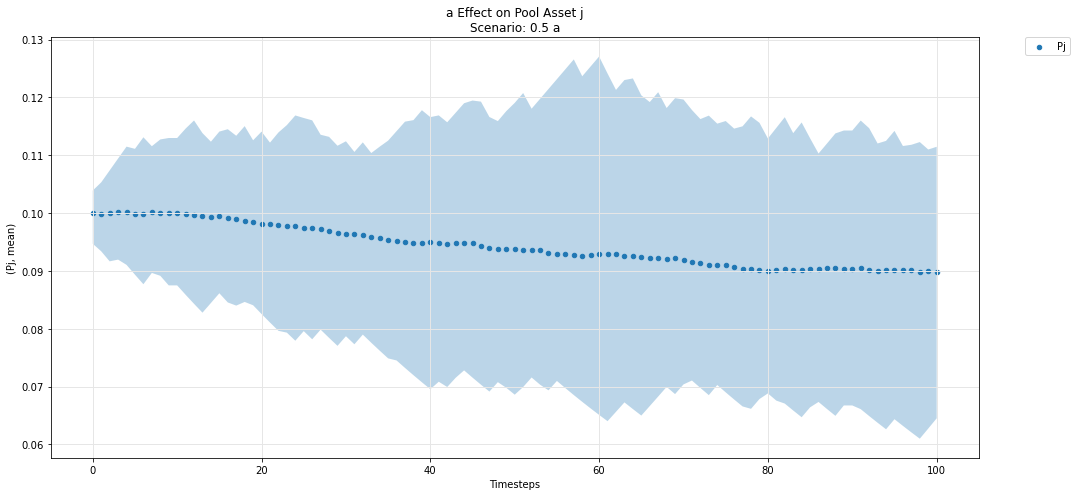

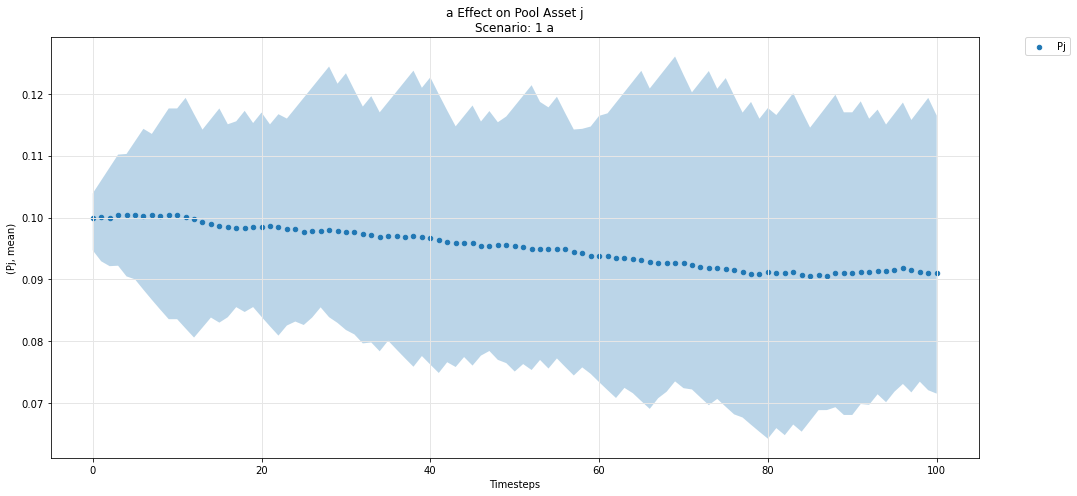

In [72]:
param_pool_simulation_plot(experiments, config_ids, 'a','j','P')

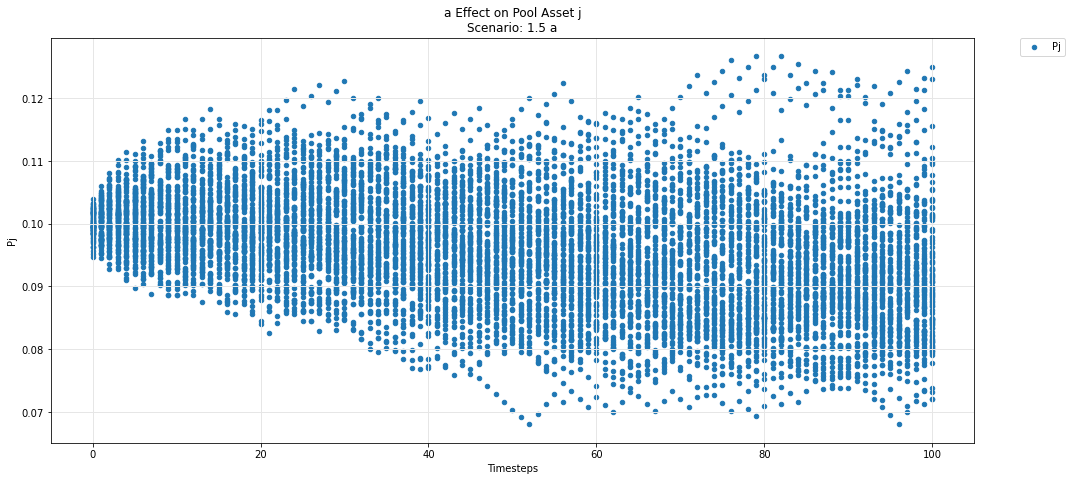

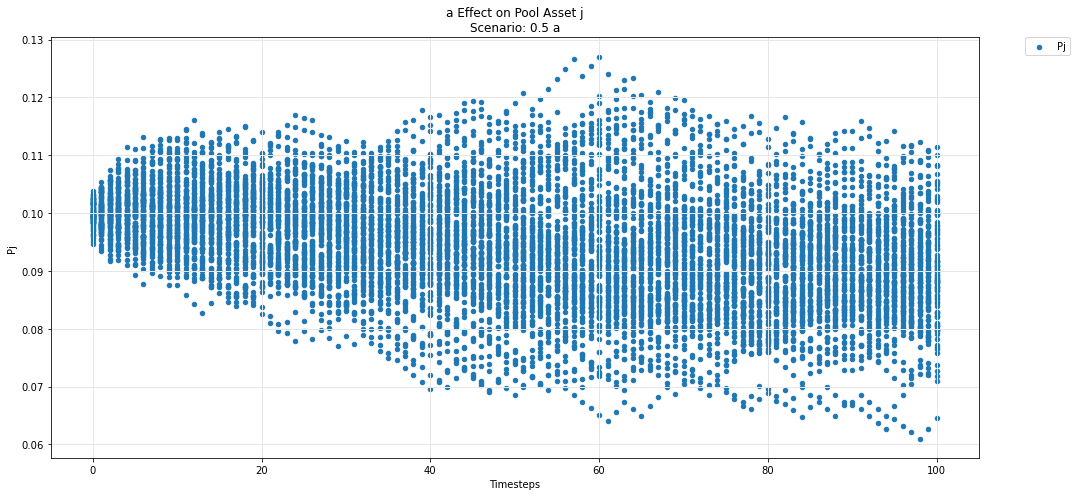

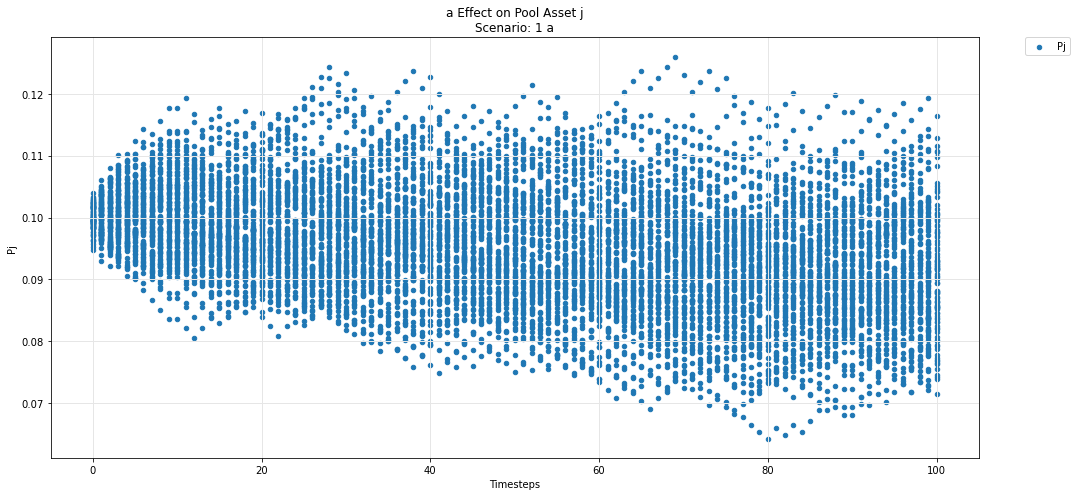

In [73]:
param_pool_plot(experiments, config_ids, 'a','j','P')

## Asset k

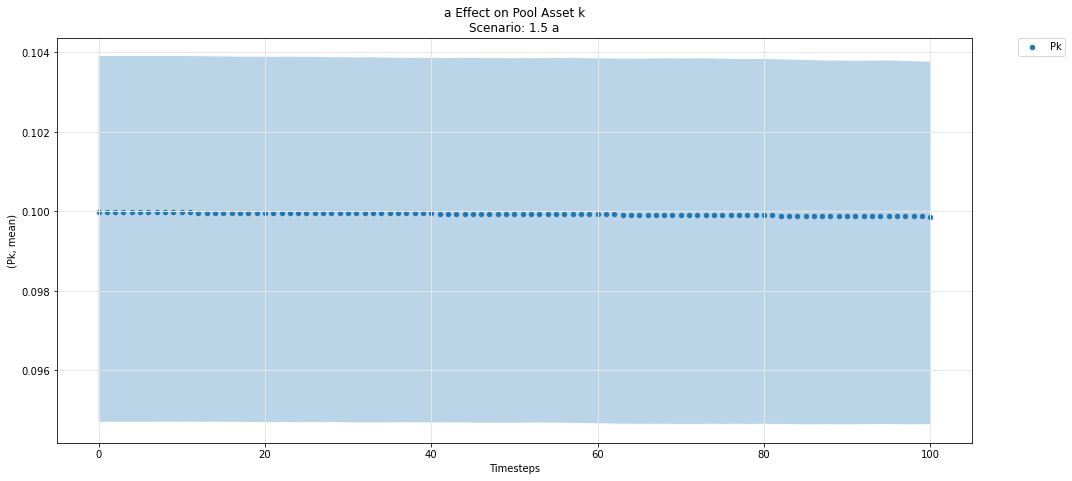

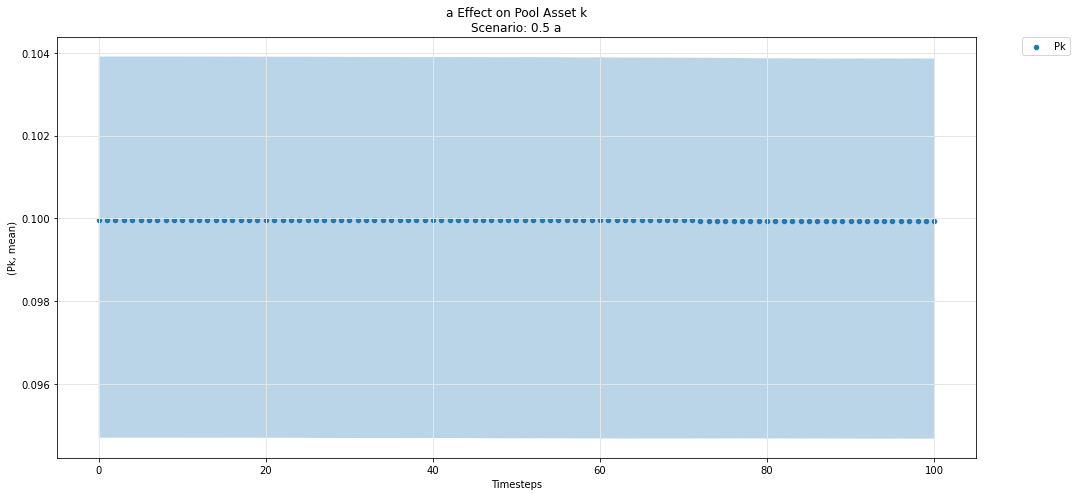

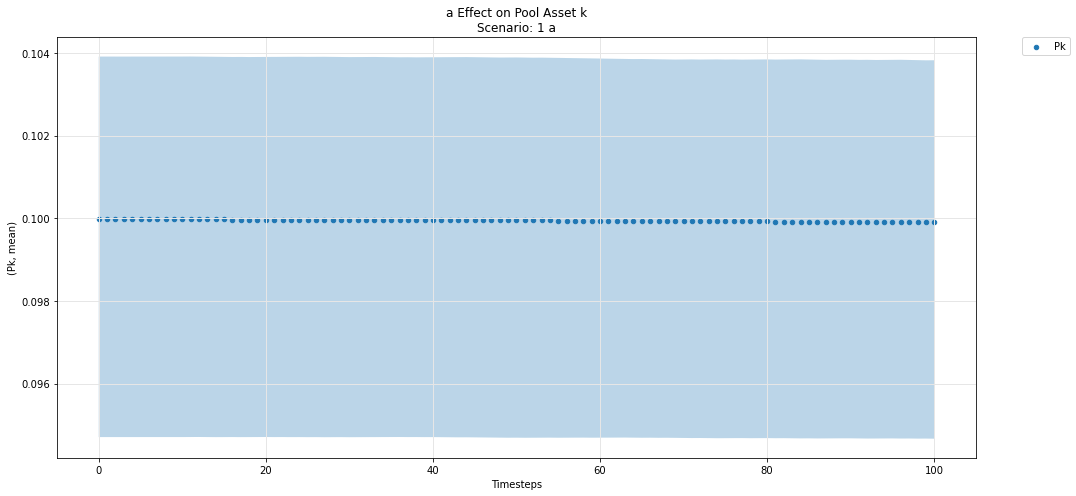

In [74]:
param_pool_simulation_plot(experiments, config_ids, 'a','k','P')

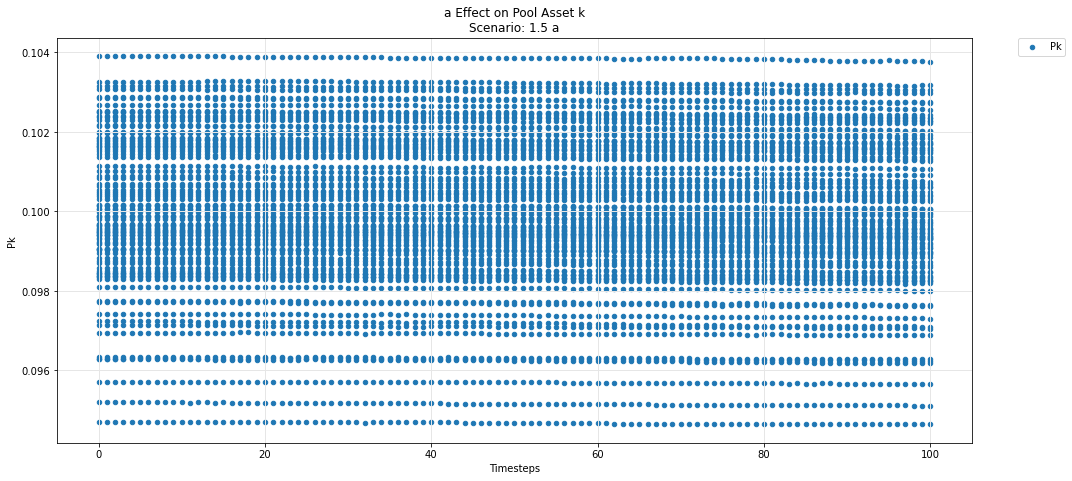

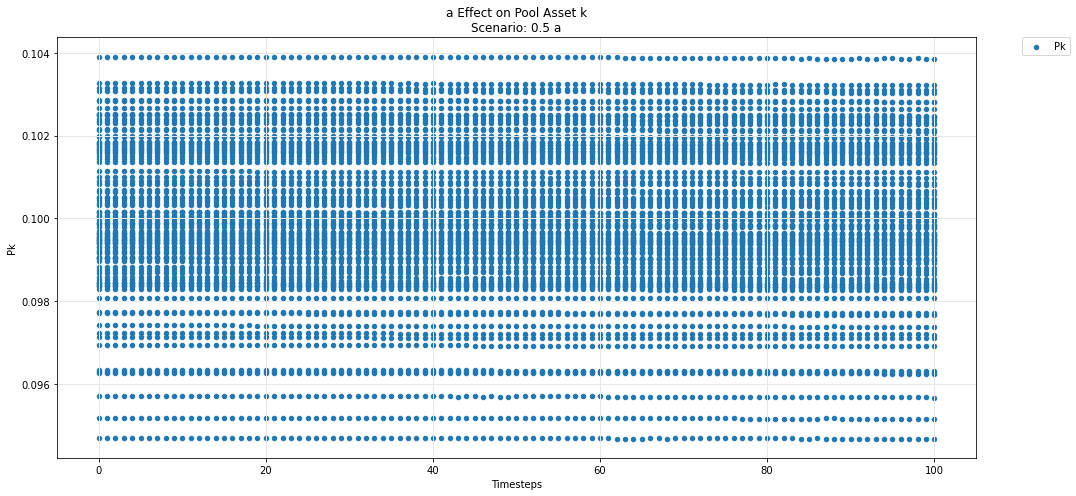

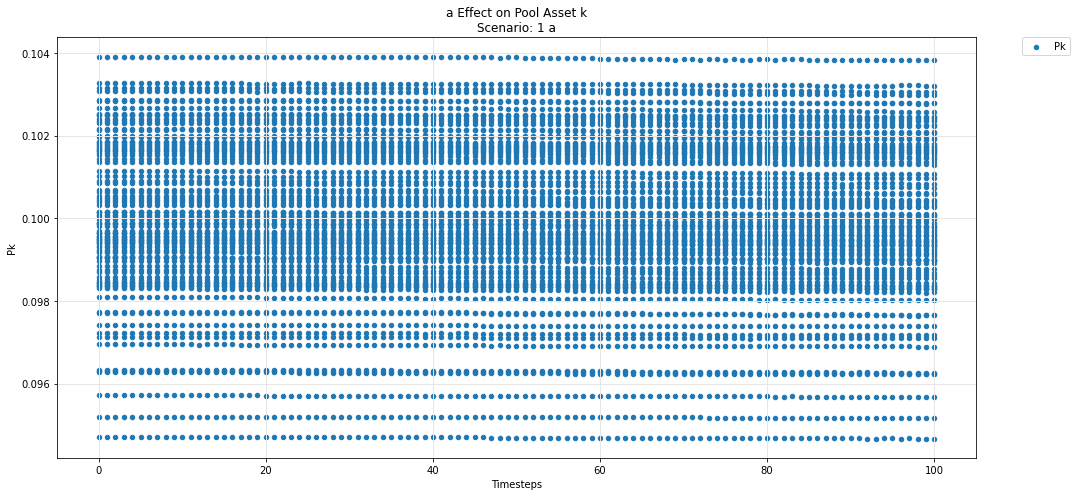

In [75]:
param_pool_plot(experiments, config_ids, 'a','k','P')